**------------------------Questions Covered-----------------------------**

***1	Array	https://www.codechef.com/JAN18/problems/KCON/	Pep_JavaIP_1Arrays_1Kcon	Kadanes																							
1	Array	https://www.geeksforgeeks.org/find-subarray-with-given-sum/	Pep_JavaIP_1Arrays_2TarSub	2 Pointer method	https://www.geeksforgeeks.org/minimum-length-subarray-sum-greater-given-value/																						
1	Array	https://www.geeksforgeeks.org/equilibrium-index-of-an-array/	Pep_JavaIP_1Arrays_3Equilibrium_point	LeftRightTraversal																							
1	Array	https://www.geeksforgeeks.org/dynamic-programming-set-14-maximum-sum-increasing-subsequence/	Pep_JavaIP_1Arrays_4Max_sum_increasing_subsequence	LIS																							
1	Array	https://www.geeksforgeeks.org/convert-array-into-zig-zag-fashion/	Pep_JavaIP_1Arrays_5Zigzag_array	Solve the Spot																							
1	Array	https://www.geeksforgeeks.org/find-a-pair-with-the-given-difference/	Pep_JavaIP_1Arrays_6findpair	2 Pointer method																							
1	Array	https://www.geeksforgeeks.org/chocolate-distribution-problem/	Pep_JavaIP_1Arrays_7Chocolate	Sliding Window																							
1	Array	https://www.geeksforgeeks.org/minimum-number-platforms-required-railwaybus-station/	Pep_JavaIP_1Arrays_8platforms	MergeSort																							
1	Array	https://www.geeksforgeeks.org/trapping-rain-water/	Pep_JavaIP_1Arrays_9Trappingrainwater	LeftRightTraversal																							
1	Array	https://www.geeksforgeeks.org/stock-buy-sell/	Pep_JavaIP_1Arrays_10StockBuySell	2 Pointer method																							
1	Array	https://www.geeksforgeeks.org/inplace-rotate-square-matrix-by-90-degrees/	Pep_JavaIP_1Arrays_11rotatearray90	MatrixRotation																							
1	Array	https://www.geeksforgeeks.org/find-k-pairs-smallest-sums-two-arrays/	Pep_JavaIP_1Arrays_12kpairsmallest	Miscellanous																						
1	Array	https://www.geeksforgeeks.org/search-an-element-in-a-sorted-and-pivoted-array/	Pep_JavaIP_1Arrays_14searchInSortedAndRotated	BinarySearch																							
1	Array	https://www.geeksforgeeks.org/given-a-sorted-and-rotated-array-find-if-there-is-a-pair-with-a-given-sum/	Pep_JavaIP_1Arrays_15PairSumInSortedAndRotated	BinarySearch																							
1	Array	https://www.geeksforgeeks.org/maximum-sum-iarri-among-rotations-given-array/	Pep_JavaIP_1Arrays_16MaxsumIArrIForRotationsOfArray***

In [1]:
import java.util.*;
import java.io.*;
import java.util.Arrays;
String[] args =new String[0];

## **1. K-Concatenation**
https://www.codechef.com/JAN18/problems/KCON/

In [2]:
/*
You are given an array A with size N (indexed from 0) and an integer K. 
Let's define another array B with size N · K as the array that's formed by concatenating K copies of array A.

For example, 
if A = {1, 2} and K = 3, 
then B = {1, 2, 1, 2, 1, 2}.

You have to find the maximum subarray sum of the array B. 
Fomally, you should compute the maximum value of Bi + Bi+1 + Bi+2 + ... + Bj, where 0 ≤ i ≤ j < N · K.
*/

In [3]:
/*
The problem is to find the maximum sub array of concatenatedarr.
Maximum SubArray of an array A is a continuous SubArray within the array A that has the largest Sum.
The best method for finding Maximum SubArray is Kadanae's algorithm.

Here you have to find the Maximum SubArray for an array concatenated_arr which is a k-times repetitive array of A. 
For e.g.. if A is {3, 2, -1} and K is 3 then B will be {3, 2, -1, 3, 2, -1, 3, 2, -1}. 

Method:
The maximum SubArray of concatenated_arr can be the sum of all its elements.
For e.g.. if A is {3, 2, -1} and K is 3, then B will be {3, 2, -1, 3, 2, -1, 3, 2, -1}.
The sum of all the elements in concatenated_arr will give us 12. To find this one we don't need to create the array concatenated_arr.
We can simply find the sum of all the elements in array A and we can mutilply it with K.
But wait, we can omit the last term in it so that the sum will become 13.
For this one we can use prefix and suffix calculations.
Eg:
A is repeated k times in concatenatedarr.
Consider the first repetition of A is A1, second is A2 and so on. 
So now our B array(if K=8) will be {A1, A2, A3, A4, A5, A6, A7, A8}. 
If you omit the first two elements in A1 and the last two elements in A8, you might also get the maxsub array.
So here we can check whether it is possible to omit some initial elements in A1 and some Final elements in A8. 
We use prefix and suffix variables for that to calculate the sum of A1 and A10 specifically and he adds the remaining elements 
i.e answer = {prefix + sum_of_elements(A2) + sum_of_elements(A3) + sum_of_elements(A4) + sum_of_elements(A5) + sum_of_elements(A6) + sum_of_elements(A7) + suffix} , 
which in simplified form becomes {prefix + sum_of_elements(A)*(k-2) + suffix}.
*/

In [4]:
int mod  = (int) Math.pow(10,9)+7;
public int kConcatenationMaxSum(int[] ar, int k) {
    long kadanes= kadanesAlgo(ar);
    if(k==1){
        return (int)kadanes;
    }
    long prefixSum= prefixSum(ar);
    long suffixSum=suffixSum(ar);
    long sum=0;
    for (int i1 : ar) {
        sum += i1;
    }
    if(sum>0){
        return (int)(Math.max(((sum*(k-2))%mod+suffixSum%mod+prefixSum%mod)%mod,kadanes%mod));
    }
    else{
        return (int)(Math.max((prefixSum%mod+suffixSum%mod)%mod,kadanes%mod));
    }

}
public  long kadanesAlgo(int[] ar){

    long currentSum=0;
    long maxSum=Integer.MIN_VALUE;
    for(int i=0;i<ar.length;i++){
        currentSum=currentSum>0?(currentSum+ar[i])%mod:ar[i];
        maxSum=Math.max(currentSum,maxSum);
    }
    return maxSum<0?0:maxSum%mod;

}


public  long prefixSum(int[] ar){

    long currentSum=0;
    long maxSum=Integer.MIN_VALUE;
    for(int i=0;i<ar.length;i++){
        currentSum= (currentSum+ar[i])%mod;
        maxSum=Math.max(maxSum,currentSum);
    }
    return maxSum;


}

public  long suffixSum(int[] ar){


    long currentSum=0;
    long maxSum=Integer.MIN_VALUE;
    for(int i=ar.length-1;i>=0;i--){
        currentSum=(currentSum+ar[i])%mod;
        maxSum=Math.max(currentSum,maxSum);
    }
    return maxSum;

}

In [5]:
int[] arr = {3,2,-1};
System.out.println(kConcatenationMaxSum(arr,3))

13


In [6]:
class Solution {
    static final long M=(long)Math.pow(10,9)+7;
    public static int kConcatenationMaxSum(int[] arr, int k) {
        int n=arr.length;
        long res=0;
        long last=0;
        long sum=0;
        long sumMax=0;
    
        // ordinary maximum subarray sum problem to find maximum
        for(int j=0;j<n;++j){
            long r = Math.max((long)arr[j],arr[j]+last);
            res=Math.max(res,r);
            last=r;
            sum+=arr[j];
            if(sumMax<sum){
                sumMax=sum;
            }
        }
        
        // if there were more repeatations, we recaucluate the res
        if(k>1 && sumMax>0){
            if(sum>0){
                res = Math.max(res, last+(k-2)*sum+sumMax);
            }else{
                res =Math.max(res,last+sumMax);
            }
        }
        return (int)(res%M);
    }
}
int[] arr = {3,2,-1};
System.out.println(Solution.kConcatenationMaxSum(arr,3))

13


## **2. Find subarray with given sum | Set 1 (Nonnegative Numbers)**
https://www.geeksforgeeks.org/find-subarray-with-given-sum/

In [7]:
/*
Given an unsorted array of nonnegative integers, find a continuous subarray which adds to a given number.
Examples :

Input: arr[] = {1, 4, 20, 3, 10, 5}, sum = 33
Ouptut: Sum found between indexes 2 and 4



Input: arr[] = {1, 4, 0, 0, 3, 10, 5}, sum = 7
Ouptut: Sum found between indexes 1 and 4

Input: arr[] = {1, 4}, sum = 0
Output: No subarray found

There may be more than one subarrays with sum as the given sum. The following solutions print first such subarray.
*/

In [8]:
/*
Initialize a variable curr_sum as the first element. 
curr_sum indicates the sum of the current subarray. 
Start from the second element and add all elements one by one to the curr_sum. 
If curr_sum becomes equal to the sum, then print the solution. 
If curr_sum exceeds the sum, then remove trailing elements while curr_sum is greater than the sum.

Following is the implementation of the above approach.
*/

In [9]:
int subArraySum(int arr[], int n, int sum)  
    { 
        int curr_sum = arr[0], start = 0, i; 
  
        // Pick a starting point 
        for (i = 1; i <= n; i++)  
        { 
            // If curr_sum exceeds the sum, then remove the starting elements 
            while (curr_sum > sum && start < i-1) 
            { 
                curr_sum = curr_sum - arr[start]; 
                start++; 
            } 
              
            // If curr_sum becomes equal to sum, then return true 
            if (curr_sum == sum)  
            { 
                int p = i-1; 
                System.out.println("Sum found between indexes " + start 
                        + " and " + p); 
                return 1; 
            } 
              
            // Add this element to curr_sum 
            if (i < n) 
            curr_sum = curr_sum + arr[i]; 
              
        } 
  
        System.out.println("No subarray found"); 
        return 0; 
    }

In [10]:
int arr[] = {15, 2, 4, 8, 9, 5, 10, 23}; 
int n = arr.length; 
int sum = 23; 
subArraySum(arr, n, sum); 

Sum found between indexes 1 and 4


1

## **3. Equilibrium index of an array**
https://www.geeksforgeeks.org/equilibrium-index-of-an-array/

In [11]:
/*
Equilibrium index of an array is an index such that the sum of elements at lower indexes is equal to the sum of elements at higher indexes. For example, in an array A:

Example :

Input: A[] = {-7, 1, 5, 2, -4, 3, 0}
Output: 3
3 is an equilibrium index, because:
A[0] + A[1] + A[2] = A[4] + A[5] + A[6]



Input: A[] = {1, 2, 3}
Output: -1

Write a function int equilibrium(int[] arr, int n); that given a sequence arr[] of size n, returns an equilibrium index (if any) or -1 if no equilibrium indexes exist.
*/

In [12]:
/*
The idea is to get the total sum of the array first. 
Then Iterate through the array and keep updating the left sum which is initialized as zero. 
In the loop, we can get the right sum by subtracting the elements one by one. 

1) Initialize leftsum  as 0
2) Get the total sum of the array as sum
3) Iterate through the array and for each index i, do following.
    a)  Update sum to get the right sum.  
           sum = sum - arr[i] 
       // sum is now right sum
    b) If leftsum is equal to sum, then return current index. 
       // update leftsum for next iteration.
    c) leftsum = leftsum + arr[i]
4) return -1 
// If we come out of loop without returning then
// there is no equilibrium index
The image below shows the dry run of the above approach:
*/

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190620123235/Equilibrium-index-of-an-array1.png" alt="IMG 3 Preview" title="IMG 3" style="width:500px;height:600px"/>

In [13]:
int equilibrium(int arr[], int n) 
    { 
        int sum = 0; // initialize sum of whole array 
        int leftsum = 0; // initialize leftsum 
  
        /* Find sum of the whole array */
        for (int i = 0; i < n; ++i) 
            sum += arr[i]; 
  
        for (int i = 0; i < n; ++i) { 
            sum -= arr[i]; // sum is now right sum for index i 
  
            if (leftsum == sum) 
                return i; 
  
            leftsum += arr[i]; 
        } 
  
        /* If no equilibrium index found, then return 0 */
        return -1; 
    } 

In [14]:
int arr[] = { -7, 1, 5, 2, -4, 3, 0 }; 
        int arr_size = arr.length; 
        System.out.println("First equilibrium index is " +  
                          equilibrium(arr, arr_size));

First equilibrium index is 3


## **4. Maximum Sum Increasing Subsequence | DP-14**
https://www.geeksforgeeks.org/maximum-sum-increasing-subsequence-dp-14/

In [15]:
/*
Given an array of n positive integers. Write a program to find the sum of maximum sum subsequence of the given array such that the integers in the subsequence are sorted in increasing order. 
For example, 
if input is {1, 101, 2, 3, 100, 4, 5}, 
then output should be 106 (1 + 2 + 3 + 100), 
if the input array is {3, 4, 5, 10}, 
then output should be 22 (3 + 4 + 5 + 10) 
and if the input array is {10, 5, 4, 3}, 
then output should be 10
*/

In [16]:
/*
This problem is a variation of standard Longest Increasing Subsequence (LIS) problem. 
We need a slight change in the Dynamic Programming solution of LIS problem. 
All we need to change is to use sum as a criteria instead of length of increasing subsequence.

Following are the Dynamic Programming solution to the problem :
*/

In [17]:
static int maxSumIS(int arr[], int n) 
    { 
        int i, j, max = 0; 
        int msis[] = new int[n]; 
  
        /* Initialize msis values  
           for all indexes */
        for (i = 0; i < n; i++) 
            msis[i] = arr[i]; 
  
        /* Compute maximum sum values 
           in bottom up manner */
        for (i = 1; i < n; i++) 
            for (j = 0; j < i; j++) 
                if (arr[i] > arr[j] && 
                    msis[i] < msis[j] + arr[i]) 
                    msis[i] = msis[j] + arr[i]; 
  
        /* Pick maximum of all 
           msis values */
        for (i = 0; i < n; i++) 
            if (max < msis[i]) 
                max = msis[i]; 
  
        return max; 
    } 

In [18]:
int arr[] = new int[]{1, 101, 2, 3, 100, 4, 5}; 
int n = arr.length; 
System.out.println("Sum of maximum sum "+ 
                            "increasing subsequence is "+ 
                              maxSumIS(arr, n)); 

Sum of maximum sum increasing subsequence is 106


## **5. Convert array into Zig-Zag fashion**
https://www.geeksforgeeks.org/convert-array-into-zig-zag-fashion/

In [19]:
/*
Given an array of DISTINCT elements, rearrange the elements of array in zig-zag fashion in O(n) time. 
The converted array should be in form a < b > c < d > e < f.
Example:

Input: arr[] = {4, 3, 7, 8, 6, 2, 1}
Output: arr[] = {3, 7, 4, 8, 2, 6, 1}



Input: arr[] = {1, 4, 3, 2}
Output: arr[] = {1, 4, 2, 3}
*/

In [20]:
/*
A Simple Solution is to first sort the array. 
After sorting, exclude the first element, swap the remaining elements in pairs. 
(i.e. keep arr[0] as it is, swap arr[1] and arr[2], swap arr[3] and arr[4], and so on).

Time complexity: O(N log N) since we need to sort the array first.

We can convert in O(n) time using an efficient approach. The idea is to use a modified one pass of bubble sort.

Maintain a flag for representing which order(i.e. < or >) currently we need.
If the current two elements are not in that order then swap those elements otherwise not.
Let us see the main logic using three consecutive elements A, B, C.

Suppose we are processing B and C currently and the current relation is ‘<', but we have B > C. 
Since current relation is ‘<' previous relation must be '>‘ i.e., A must be greater than B. 
So, the relation is A > B and B > C. We can deduce A > C. 
So if we swap B and C then the relation is A > C and C < B. 
Finally we get the desired order A C B

Refer this for more explanation.

Below image is a dry run of the above approach:
*/

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190620131651/Convert-array-into-Zig-Zag-fashion.png" alt="IMG 4 Preview" title="IMG 4" style="width:700px;height:900px"/>

In [21]:
// Java program to sort an array in Zig-Zag form 
import java.util.Arrays; 

class Test 
{ 
	static int arr[] = new int[]{4, 3, 7, 8, 6, 2, 1}; 
	
	// Method for zig-zag conversion of array 
	static void zigZag() 
	{ 
		// Flag true indicates relation "<" is expected, 
		// else ">" is expected. The first expected relation 
		// is "<" 
		boolean flag = true; 
		
		int temp =0; 
	
		for (int i=0; i<=arr.length-2; i++) 
		{ 
			if (flag) /* "<" relation expected */
			{ 
				/* If we have a situation like A > B > C, 
				we get A > B < C by swapping B and C */
				if (arr[i] > arr[i+1]) 
				{ 
					// swap 
					temp = arr[i]; 
					arr[i] = arr[i+1]; 
					arr[i+1] = temp; 
				} 
				
			} 
			else /* ">" relation expected */
			{ 
				/* If we have a situation like A < B < C, 
				we get A < C > B by swapping B and C */
				if (arr[i] < arr[i+1]) 
				{ 
					// swap 
					temp = arr[i]; 
					arr[i] = arr[i+1]; 
					arr[i+1] = temp; 
				} 
			} 
			flag = !flag; /* flip flag */
		} 
	} 
	
	// Driver method to test the above function 
	public static void main() 
	{ 
		zigZag(); 
		System.out.println(Arrays.toString(arr)); 
	} 
} 


In [22]:
Test.main()

[3, 7, 4, 8, 2, 6, 1]


In [23]:
static int arr[] = new int[]{4, 3, 7, 8, 6, 2, 1}; 

In [24]:
// Method for zig-zag conversion of array 
static void zigZag() 
{ 
	// Flag true indicates relation "<" is expected, 
	// else ">" is expected. The first expected relation 
	// is "<" 
	boolean flag = true; 
	
	int temp =0; 

	for (int i=0; i<=arr.length-2; i++) 
	{ 
		if (flag) /* "<" relation expected */
		{ 
			/* If we have a situation like A > B > C, 
			we get A > B < C by swapping B and C */
			if (arr[i] > arr[i+1]) 
			{ 
                // swap 
				temp = arr[i]; 
				arr[i] = arr[i+1]; 
				arr[i+1] = temp; 
			} 
			
		} 
		else /* ">" relation expected */
		{ 
			/* If we have a situation like A < B < C, 
			we get A < C > B by swapping B and C */
			if (arr[i] < arr[i+1]) 
			{ 
				// swap 
				temp = arr[i]; 
				arr[i] = arr[i+1]; 
				arr[i+1] = temp; 
			} 
		} 
		flag = !flag; /* flip flag */
	} 
} 

In [25]:
zigZag(); 
System.out.println(Arrays.toString(arr)); 

[3, 7, 4, 8, 2, 6, 1]


## **6. Find a pair with the given difference**
https://www.geeksforgeeks.org/find-a-pair-with-the-given-difference/

In [26]:
/*
Given an unsorted array and a number n, find if there exists a pair of elements in the array whose difference is n.
Examples:

Input: arr[] = {5, 20, 3, 2, 50, 80}, n = 78
Output: Pair Found: (2, 80)

Input: arr[] = {90, 70, 20, 80, 50}, n = 45
Output: No Such Pair
*/

In [27]:
/*The simplest method is to run two loops, 
the outer loop picks the first element (smaller element) and the inner loop looks for the element picked by outer loop plus n. 
Time complexity of this method is O(n^2).

We can use sorting and Binary Search to improve time complexity to O(nLogn). 
The first step is to sort the array in ascending order. 
Once the array is sorted, traverse the array from left to right, and for each element arr[i], binary search for arr[i] + n in arr[i+1..n-1]. 
If the element is found, return the pair.
Both first and second steps take O(nLogn). So overall complexity is O(nLogn).

The second step of the above algorithm can be improved to O(n). 
The first step remain same. The idea for second step is take two index variables i and j, initialize them as 0 and 1 respectively. 
Now run a linear loop. If arr[j] – arr[i] is smaller than n, we need to look for greater arr[j], so increment j. 
If arr[j] – arr[i] is greater than n, we need to look for greater arr[i], so increment i.
The following code is only for the second step of the algorithm, it assumes that the array is already sorted.
*/

In [28]:
static boolean findPair(int arr[],int n) 
    { 
        int size = arr.length; 
  
        // Initialize positions of two elements 
        int i = 0, j = 1; 
  
        // Search for a pair 
        while (i < size && j < size) 
        { 
            if (i != j && arr[j]-arr[i] == n) 
            { 
                System.out.print("Pair Found: "+ 
                                 "( "+arr[i]+", "+ arr[j]+" )"); 
                return true; 
            } 
            else if (arr[j] - arr[i] < n) 
                j++; 
            else
                i++; 
        } 
  
        System.out.print("No such pair"); 
        return false; 
    } 

In [29]:
int arr[] = {1, 8, 30, 40, 100}; 
int n = 60; 
findPair(arr,n);

Pair Found: ( 40, 100 )

true

## **7. Chocolate Distribution Problem**
https://www.geeksforgeeks.org/chocolate-distribution-problem/

In [30]:
/*
Given an array of n integers where each value represents number of chocolates in a packet. 
Each packet can have variable number of chocolates. 
There are m students, the task is to distribute chocolate packets such that:

Each student gets one packet.
The difference between the number of chocolates in packet with maximum chocolates and packet with minimum chocolates given to the students is minimum.
Examples:

Input : arr[] = {7, 3, 2, 4, 9, 12, 56}
m = 3
Output: Minimum Difference is 2
We have seven packets of chocolates and
we need to pick three packets for 3 students
If we pick 2, 3 and 4, we get the minimum
difference between maximum and minimum packet
sizes.



Input : arr[] = {3, 4, 1, 9, 56, 7, 9, 12}
m = 5
Output: Minimum Difference is 6
The set goes like 3,4,7,9,9 and the output
is 9-3 = 6

Input : arr[] = {12, 4, 7, 9, 2, 23, 25, 41,
30, 40, 28, 42, 30, 44, 48,
43, 50}
m = 7
Output: Minimum Difference is 10
We need to pick 7 packets. We pick 40, 41,
42, 44, 48, 43 and 50 to minimize difference
between maximum and minimum.
*/

In [31]:
/*
A simple solution is to generate all subsets of size m of arr[0..n-1]. 
For every subset, find the difference between the maximum and minimum elements in it. Finally, return the minimum difference.

An efficient solution is based on the observation that to minimize the difference, we must choose consecutive elements from a sorted packet. 
We first sort the array arr[0..n-1], then find the subarray of size m with the minimum difference between last and first elements.

Below image is a dry run of the above approach:
*/

<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190620132657/Chocolate-Distribution-Problem.png" alt="IMG 7 Preview" title="IMG 7" style="width:750px;height:900px"/>

In [32]:
// arr[0..n-1] represents sizes of packets. m is number of students. 
// Returns minimum difference between maximum and minimum values of distribution. 
    static int findMinDiff(int arr[], int n, int m) 
    { 
        // if there are no chocolates or number of students is 0 
        if (m == 0 || n == 0) 
            return 0; 
       
        // Sort the given packets 
        Arrays.sort(arr); 
       
        // Number of students cannot be more than number of packets 
        if (n < m) 
           return -1; 
       
        // Largest number of chocolates 
        int min_diff = Integer.MAX_VALUE; 
       
        // Find the subarray of size m such that difference between last 
        // (maximum in case of sorted) and first (minimum in case of sorted) 
        // elements of subarray is minimum. 
        int first = 0, last = 0; 
        for (int i = 0; i + m - 1 < n; i++) 
        { 
            int diff = arr[i+m-1] - arr[i]; 
            if (diff < min_diff) 
            { 
                min_diff = diff; 
                first = i; 
                last = i + m - 1; 
            } 
        } 
        return (arr[last] - arr[first]); 
    } 

In [33]:
int arr[] = {12, 4, 7, 9, 2, 23, 
            25, 41, 30, 40, 28, 
            42, 30, 44, 48, 43, 50}; 
                     
int m = 7;  // Number of students 
          
int n = arr.length; 
System.out.println("Minimum difference is "
                + findMinDiff(arr, n, m));

Minimum difference is 10


## **8. Minimum Number of Platforms Required for a Railway/Bus Station**
https://www.geeksforgeeks.org/minimum-number-platforms-required-railwaybus-station/

In [34]:
/*
Given arrival and departure times of all trains that reach a railway station, the task is to find the minimum number of platforms required for the railway station so that no train waits.
We are given two arrays which represent arrival and departure times of trains that stop

Examples:

Input: arr[] = {9:00, 9:40, 9:50, 11:00, 15:00, 18:00}
dep[] = {9:10, 12:00, 11:20, 11:30, 19:00, 20:00}
Output: 3
There are at-most three trains at a time (time between 11:00 to 11:20)
*/

In [35]:
/*
We need to find the maximum number of trains that are there on the given railway station at a time. 
A Simple Solution is to take every interval one by one and find the number of intervals that overlap with it. 
Keep track of maximum number of intervals that overlap with an interval. Finally return the maximum value. 
Time Complexity of this solution is O(n2).

We can solve the above problem in O(N Log N) time. The idea is to consider all events in sorted order. 
Once we have all events in sorted order, we can trace the number of trains at any time keeping track of trains that have arrived, but not departed.

For example consider the above example.

    arr[]  = {9:00,  9:40, 9:50,  11:00, 15:00, 18:00}
    dep[]  = {9:10, 12:00, 11:20, 11:30, 19:00, 20:00}

All events sorted by time.
Total platforms at any time can be obtained by subtracting total 
departures from total arrivals by that time.
 Time     Event Type     Total Platforms Needed at this Time                               
 9:00       Arrival                  1
 9:10       Departure                0
 9:40       Arrival                  1
 9:50       Arrival                  2
 11:00      Arrival                  3 
 11:20      Departure                2
 11:30      Departure                1
 12:00      Departure                0
 15:00      Arrival                  1
 18:00      Arrival                  2 
 19:00      Departure                1
 20:00      Departure                0

Minimum Platforms needed on railway station = Maximum platforms needed at any time 
                                           = 3  
Below is the implementation of the above approach. 
Note that the implementation doesn’t create a single sorted list of all events, 
rather it individually sorts arr[] and dep[] arrays, and then uses merge process of merge sort to process them together as a single sorted array.

Note : This approach assumes that trains are arriving and departing on same date.
*/

In [36]:
// Returns minimum number of platforms reqquired 
static int findPlatform(int arr[], int dep[], int n) 
{ 
   // Sort arrival and departure arrays 
   Arrays.sort(arr); 
   Arrays.sort(dep); 
   
   // plat_needed indicates number of platforms 
   // needed at a time 
   int plat_needed = 1, result = 1; 
   int i = 1, j = 0; 
   
   // Similar to merge in merge sort to process  
   // all events in sorted order 
   while (i < n && j < n) 
   { 
      // If next event in sorted order is arrival,  
      // increment count of platforms needed 
      if (arr[i] <= dep[j]) 
      { 
          plat_needed++; 
          i++; 
   
          // Update result if needed  
          if (plat_needed > result)  
              result = plat_needed; 
      } 
   
      // Else decrement count of platforms needed 
      else
      { 
          plat_needed--; 
          j++; 
      } 
   } 
   
   return result; 
} 

In [37]:
public static void main() 
{ 
    int arr[] = {900, 940, 950, 1100, 1500, 1800}; 
    int dep[] = {910, 1200, 1120, 1130, 1900, 2000}; 
    int n = arr.length; 
    System.out.println("Minimum Number of Platforms Required = "
                        + findPlatform(arr, dep, n)); 
} 
main();

Minimum Number of Platforms Required = 3


## **9. Trapping Rain Water**
https://www.geeksforgeeks.org/trapping-rain-water/

In [38]:
/*
Given n non-negative integers representing an elevation map where the width of each bar is 1, 
compute how much water it is able to trap after raining.
Examples:

Input: arr[]   = {2, 0, 2}
Output: 2
Structure is like below
| |
|_|
We can trap 2 units of water in the middle gap.

Input: arr[]   = {3, 0, 0, 2, 0, 4}
Output: 10
Structure is like below
     |
|    |
|  | |
|__|_| 
We can trap "3*2 units" of water between 3 an 2,
"1 unit" on top of bar 2 and "3 units" between 2 
and 4.  See below diagram also.

Input: arr[] = [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]
Output: 6
       | 
   |   || |
_|_||_||||||
Trap "1 unit" between first 1 and 2, "4 units" between
first 2 and 3 and "1 unit" between second last 1 and last 2 
*/


<img src="https://www.geeksforgeeks.org/wp-content/uploads/watertrap.png"/>


In [39]:
/*
An element of the array can store water if there are higher bars on left and right. 
We can find the amount of water to be stored in every element by finding the heights of bars on left and right sides. 
The idea is to compute the amount of water that can be stored in every element of array. 
For example, consider the array {3, 0, 0, 2, 0, 4}, 
we can store three units of water at indexes 1 and 2, 
and one unit of water at index 3, 
and three units of water at index 4.

An Efficient Solution is to pre-compute highest bar on left and right of every bar in O(n) time. 
Then use these pre-computed values to find the amount of water in every array element.

Below is the implementation of this solution.
*/

In [40]:
static int arr[] = new int[] { 0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1 }; 

// Method for maximum amount of water 
static int findWater(int n) 
{ 
    // left[i] contains height of tallest bar to the 
    // left of i'th bar including itself 
    int left[] = new int[n]; 

    // Right [i] contains height of tallest bar to 
    // the right of ith bar including itself 
    int right[] = new int[n]; 

    // Initialize result 
    int water = 0; 

    // Fill left array 
    left[0] = arr[0]; 
    for (int i = 1; i < n; i++) 
        left[i] = Math.max(left[i - 1], arr[i]); 

    // Fill right array 
    right[n - 1] = arr[n - 1]; 
    for (int i = n - 2; i >= 0; i--) 
        right[i] = Math.max(right[i + 1], arr[i]); 

    // Calculate the accumulated water element by element 
    // consider the amount of water on i'th bar, the 
    // amount of water accumulated on this particular 
    // bar will be equal to min(left[i], right[i]) - arr[i] . 
    for (int i = 0; i < n; i++) 
        water += Math.min(left[i], right[i]) - arr[i]; 

    return water; 
} 

In [41]:
System.out.println("Maximum water that can be accumulated is " + findWater(arr.length)); 

Maximum water that can be accumulated is 6


## **10. Stock Buy Sell to Maximize Profit**
https://www.geeksforgeeks.org/stock-buy-sell/

In [42]:
/*
The cost of a stock on each day is given in an array, 
find the max profit that you can make by buying and selling in those days. 
For example, if the given array is {100, 180, 260, 310, 40, 535, 695}, 
the maximum profit can earned by buying on day 0, selling on day 3. Again buy on day 4 and sell on day 6. 
If the given array of prices is sorted in decreasing order, then profit cannot be earned at all.
*/

In [43]:
/*
Naive approach: 
A simple approach is to try buying the stocks and selling them on every single day 
when profitable and keep updating the maximum profit so far.
*/

In [44]:
static int maxProfit(int price[], int start, int end) 
{ 
  
    // If the stocks can't be bought 
    if (end <= start) 
        return 0; 
  
    // Initialise the profit 
    int profit = 0; 
  
    // The day at which the stock 
    // must be bought 
    for (int i = start; i < end; i++)  
    { 
  
        // The day at which the 
        // stock must be sold 
        for (int j = i + 1; j <= end; j++) 
        { 
  
            // If byuing the stock at ith day and 
            // selling it at jth day is profitable 
            if (price[j] > price[i])  
            { 
  
                // Update the current profit 
                int curr_profit = price[j] - price[i] 
                                + maxProfit(price, start, i - 1) 
                                + maxProfit(price, j + 1, end); 
  
                // Update the maximum profit so far 
                profit = Math.max(profit, curr_profit); 
            } 
        } 
    } 
    return profit; 
} 

In [45]:
int price[] = { 100, 180, 260, 310, 
                40, 535, 695 }; 
int n = price.length; 

System.out.print(maxProfit(price, 0, n - 1)); 

865

In [46]:
/*
Efficient approach: If we are allowed to buy and sell only once, then we can use following algorithm. 
Maximum difference between two elements. Here we are allowed to buy and sell multiple times.
Following is algorithm for this problem.

Find the local minima and store it as starting index. If not exists, return.
Find the local maxima. and store it as ending index. If we reach the end, set the end as ending index.
Update the solution (Increment count of buy sell pairs)
Repeat the above steps if end is not reached.
*/

In [47]:
class Interval { 
    int buy, sell; 
} 
  
class StockBuySell { 
    // This function finds the buy sell schedule for maximum profit 
    void stockBuySell(int price[], int n) 
    { 
        // Prices must be given for at least two days 
        if (n == 1) 
            return; 
  
        int count = 0; 
  
        // solution array 
        ArrayList<Interval> sol = new ArrayList<Interval>(); 
  
        // Traverse through given price array 
        int i = 0; 
        while (i < n - 1) { 
            // Find Local Minima. Note that the limit is (n-2) as we are 
            // comparing present element to the next element. 
            while ((i < n - 1) && (price[i + 1] <= price[i])) 
                i++; 
  
            // If we reached the end, break as no further solution possible 
            if (i == n - 1) 
                break; 
  
            Interval e = new Interval(); 
            e.buy = i++; 
            // Store the index of minima 
  
            // Find Local Maxima.  Note that the limit is (n-1) as we are 
            // comparing to previous element 
            while ((i < n) && (price[i] >= price[i - 1])) 
                i++; 
  
            // Store the index of maxima 
            e.sell = i - 1; 
            sol.add(e); 
  
            // Increment number of buy/sell 
            count++; 
        } 
  
        // print solution 
        if (count == 0) 
            System.out.println("There is no day when buying the stock "
                               + "will make profit"); 
        else
            for (int j = 0; j < count; j++) 
                System.out.println("Buy on day: " + sol.get(j).buy 
                                   + "        "
                                   + "Sell on day : " + sol.get(j).sell); 
  
        return; 
    } 
}

In [48]:
StockBuySell stock = new StockBuySell(); 
  
// stock prices on consecutive days 
int price[] = { 100, 180, 260, 310, 40, 535, 695 }; 
int n = price.length; 

// fucntion call 
stock.stockBuySell(price, n); 

Buy on day: 0        Sell on day : 3
Buy on day: 4        Sell on day : 6


## **11. Rotate a matrix by 90 degree without using any extra space | Set 2**
https://www.geeksforgeeks.org/rotate-matrix-90-degree-without-using-extra-space-set-2/

In [49]:
/*
Given a square matrix, turn it by 90 degrees in anti-clockwise direction without using any extra space.

Examples:

Input
 1  2  3
 4  5  6
 7  8  9
Output:
 3  6  9 
 2  5  8 
 1  4  7 

Input:
 1  2  3  4 
 5  6  7  8 
 9 10 11 12 
13 14 15 16 
Output:
 4  8 12 16 
 3  7 11 15 
 2  6 10 14 
 1  5  9 13
*/

In [50]:
/*
There are two steps :

- Find transpose of matrix.
- Reverse columns of the transpose.

Illustration of above steps :

Let the given matrix be
1  2  3  4
5  6  7  8
9  10 11 12
13 14 15 16

First we find transpose.
1 5 9 13
2 6 10 14
3 7 11 15
4 8 12 16

Then we reverse elements of every column.
4 8 12 16
3 7 11 15
2 6 10 14
1 5  9 13
*/

In [51]:
class GFG { 
  
    // After transpose we swap elements of 
    // column one by one for finding left 
    // rotation of matrix by 90 degree 
    static void reverseColumns(int arr[][]) 
    { 
        for (int i = 0; i < arr[0].length; i++) 
            for (int j = 0, k = arr[0].length - 1; j < k; j++, k--) { 
                int temp = arr[j][i]; 
                arr[j][i] = arr[k][i]; 
                arr[k][i] = temp; 
            } 
    } 
  
    // Function for do transpose of matrix 
    static void transpose(int arr[][]) 
    { 
        for (int i = 0; i < arr.length; i++) 
            for (int j = i; j < arr[0].length; j++) { 
                int temp = arr[j][i]; 
                arr[j][i] = arr[i][j]; 
                arr[i][j] = temp; 
            } 
    } 
  
    // Function for print matrix 
    static void printMatrix(int arr[][]) 
    { 
        for (int i = 0; i < arr.length; i++) { 
            for (int j = 0; j < arr[0].length; j++) 
                System.out.print(arr[i][j] + " "); 
            System.out.println(""); 
        } 
    } 
  
    // Function to anticlockwise rotate 
    // matrix by 90 degree 
    static void rotate90(int arr[][]) 
    { 
        transpose(arr); 
        reverseColumns(arr); 
    } 
}

In [52]:
int arr[][] = { { 1, 2, 3, 4 }, 
                { 5, 6, 7, 8 }, 
                { 9, 10, 11, 12 }, 
                { 13, 14, 15, 16 } }; 

GFG.rotate90(arr); 
GFG.printMatrix(arr);

4 8 12 16 
3 7 11 15 
2 6 10 14 
1 5 9 13 


## **12. Find k pairs with smallest sums in two arrays**
https://www.geeksforgeeks.org/find-k-pairs-smallest-sums-two-arrays/

In [53]:
/*
Given two integer arrays arr1[] and arr2[] sorted in ascending order and an integer k.
Find k pairs with smallest sums such that one element of a pair belongs to arr1[] and other element belongs to arr2[]

Examples:

Input :  arr1[] = {1, 7, 11}
         arr2[] = {2, 4, 6}
         k = 3
Output : [1, 2],
         [1, 4],
         [1, 6]
Explanation: The first 3 pairs are returned 
from the sequence [1, 2], [1, 4], [1, 6], 
[7, 2], [7, 4], [11, 2], [7, 6], [11, 4], 
[11, 6]
*/

In [54]:
/*
We one by one find k smallest sum pairs, starting from least sum pair. 
The idea is to keep track of all elements of arr2[] which have been already considered for every element arr1[i1] so that in an iteration we only consider next element. 
For this purpose, we use an index array index2[] to track the indexes of next elements in the other array. 
It simply means that which element of second array to be added with the element of first array in each and every iteration. 
We increment value in index array for the element that forms next minimum value pair.
*/

In [55]:
class KSmallestPair 
{ 
    // Function to find k pairs with least sum such 
    // that one elemennt of a pair is from arr1[] and 
    // other element is from arr2[] 
    static void kSmallestPair(int arr1[], int n1, int arr2[], 
                                            int n2, int k) 
    { 
        if (k > n1*n2) 
        { 
            System.out.print("k pairs don't exist"); 
            return ; 
        } 
       
        // Stores current index in arr2[] for 
        // every element of arr1[]. Initially 
        // all values are considered 0. 
        // Here current index is the index before 
        // which all elements are considered as 
        // part of output. 
        int index2[] = new int[n1]; 
       
        while (k > 0) 
        { 
            // Initialize current pair sum as infinite 
            int min_sum = Integer.MAX_VALUE; 
            int min_index = 0; 
       
            // To pick next pair, traverse for all  
            // elements of arr1[], for every element, find  
            // corresponding current element in arr2[] and 
            // pick minimum of all formed pairs. 
            for (int i1 = 0; i1 < n1; i1++) 
            { 
                // Check if current element of arr1[] plus 
                // element of array2 to be used gives  
                // minimum sum 
                if (index2[i1] < n2 &&  
                    arr1[i1] + arr2[index2[i1]] < min_sum) 
                { 
                    // Update index that gives minimum 
                    min_index = i1; 
       
                    // update minimum sum 
                    min_sum = arr1[i1] + arr2[index2[i1]]; 
                } 
            } 
       
            System.out.print("(" + arr1[min_index] + ", " + 
                            arr2[index2[min_index]]+ ") "); 
       
            index2[min_index]++; 
            k--; 
        } 
    } 
}

In [56]:
int arr1[] = {1, 3, 11}; 
int n1 = arr1.length; 

int arr2[] = {2, 4, 8}; 
int n2 = arr2.length; 

int k = 4; 
KSmallestPair kp = new KSmallestPair();
kp.kSmallestPair( arr1, n1, arr2, n2, k); 

(1, 2) (1, 4) (3, 2) (3, 4) 

## **13. Search an element in a sorted and rotated array**
https://www.geeksforgeeks.org/search-an-element-in-a-sorted-and-pivoted-array/

In [57]:
/*
An element in a sorted array can be found in O(log n) time via binary search. 
But suppose we rotate an ascending order sorted array at some pivot unknown to you beforehand. 
So for instance, 1 2 3 4 5 might become 3 4 5 1 2. 
Devise a way to find an element in the rotated array in O(log n) time.
*/

<img src="https://www.geeksforgeeks.org/wp-content/uploads/2009/08/sortedPivotedArray.gif"/>

In [58]:
/*
Input  : arr[] = {5, 6, 7, 8, 9, 10, 1, 2, 3};
         key = 3
Output : Found at index 8

Input  : arr[] = {5, 6, 7, 8, 9, 10, 1, 2, 3};
         key = 30
Output : Not found

Input : arr[] = {30, 40, 50, 10, 20}
        key = 10   
Output : Found at index 3
*/

In [59]:
/*
The idea is to find the pivot point, divide the array in two sub-arrays and call binary search.
The main idea for finding pivot is – for a sorted (in increasing order) and pivoted array, pivot element is the only element for which next element to it is smaller than it.
Using above criteria and binary search methodology we can get pivot element in O(logn) time

Input arr[] = {3, 4, 5, 1, 2}
Element to Search = 1
  1) Find out pivot point and divide the array in two
      sub-arrays. (pivot = 2) //Index of 5
  2) Now call binary search for one of the two sub-arrays.
      (a) If element is greater than 0th element then
             search in left array
      (b) Else Search in right array
          (1 will go in else as 1 < 0th element(3))
  3) If element is found in selected sub-array then return index
     Else return -1.
*/

In [60]:
/*
Improved Solution:
We can search an element in one pass of Binary Search. The idea is to search

1) Find middle point mid = (l + h)/2
2) If key is present at middle point, return mid.
3) Else If arr[l..mid] is sorted
    a) If key to be searched lies in range from arr[l]
       to arr[mid], recur for arr[l..mid].
    b) Else recur for arr[mid+1..h]
4) Else (arr[mid+1..h] must be sorted)
    a) If key to be searched lies in range from arr[mid+1]
       to arr[h], recur for arr[mid+1..h].
    b) Else recur for arr[l..mid] 
Below is the implementation of above idea :
*/

In [61]:
// Returns index of key in arr[l..h]  
// if key is present, otherwise returns -1 
static int search(int arr[], int l, int h, int key) 
{ 
    if (l > h)  
        return -1; 

    int mid = (l+h)/2; 
    if (arr[mid] == key) 
        return mid; 

    /* If arr[l...mid] first subarray is sorted */
    if (arr[l] <= arr[mid]) 
    { 
        /* As this subarray is sorted, we  
           can quickly check if key lies in  
           half or other half */
        if (key >= arr[l] && key <= arr[mid]) 
           return search(arr, l, mid-1, key); 
        /*If key not lies in first half subarray,  
       Divide other half  into two subarrays, 
       such that we can quickly check if key lies  
       in other half */
        return search(arr, mid+1, h, key); 
    } 

    /* If arr[l..mid] first subarray is not sorted,  
       then arr[mid... h] must be sorted subarry*/
    if (key >= arr[mid] && key <= arr[h]) 
        return search(arr, mid+1, h, key); 

    return search(arr, l, mid-1, key); 
} 

In [62]:
int arr[] = {4, 5, 6, 7, 8, 9, 1, 2, 3}; 
int n = arr.length; 
int key = 6; 
int i = search(arr, 0, n-1, key); 
if (i != -1)  
    System.out.println("Index: " + i); 
else
    System.out.println("Key not found"); 

Index: 2


## **14. Given a sorted and rotated array, find if there is a pair with a given sum**
https://www.geeksforgeeks.org/given-a-sorted-and-rotated-array-find-if-there-is-a-pair-with-a-given-sum/

In [63]:
/*
Given an array that is sorted and then rotated around an unknown point. 
Find if the array has a pair with a given sum ‘x’. It may be assumed that all elements in the array are distinct.
Examples :

Input: arr[] = {11, 15, 6, 8, 9, 10}, x = 16
Output: true
There is a pair (6, 10) with sum 16

Input: arr[] = {11, 15, 26, 38, 9, 10}, x = 35
Output: true
There is a pair (26, 9) with sum 35

Input: arr[] = {11, 15, 26, 38, 9, 10}, x = 45
Output: false
There is no pair with sum 45.
*/

In [64]:
/*
The idea is to first find the largest element in array which is the pivot point also and the element just after largest is the smallest element. 
Once we have indexes largest and smallest elements, we use similar meet in middle algorithm (as discussed here in method 1) to find if there is a pair. 
The only thing new here is indexes are incremented and decremented in rotational manner using modular arithmetic.
*/

In [65]:
/*
METHOD 1 (Use Sorting)

Algorithm :

hasArrayTwoCandidates (A[], ar_size, sum)
1) Sort the array in non-decreasing order.
2) Initialize two index variables to find the candidate 
   elements in the sorted array.
       (a) Initialize first to the leftmost index: l = 0
       (b) Initialize second  the rightmost index:  r = ar_size-1
3) Loop while l < r.
       (a) If (A[l] + A[r] == sum)  then return 1
       (b) Else if( A[l] + A[r] <  sum )  then l++
       (c) Else r--    
4) No candidates in whole array - return 0
*/

In [66]:
/*
How to count all pairs having sum x?
The stepwise algo is:

1. Find the pivot element of the sorted and the rotated array. The pivot element is the largest element in the array. The smallest element will be adjacent to it.
2. Use two pointers (say left and right) with the left pointer pointing to the smallest element and the right pointer pointing to largest element.
3. Find the sum of the elements pointed by both the pointers.
4. If the sum is equal to x, then increment the count. If the sum is less than x, then to increase sum move the left pointer to next position by incrementing it in a rotational manner. 
   If the sum is greater than x, then to decrease sum move the right pointer to next position by decrementing it in rotational manner.
5. Repeat step 3 and 4 until the left pointer is not equal to the right pointer or until the left pointer is not equal to right pointer – 1.
6. Print final count.
*/

In [67]:
static int pairsInSortedRotated(int arr[],  
                                int n, int x) 
{ 
    // Find the pivot element.  
    // Pivot element is largest  
    // element of array. 
    int i; 
    for (i = 0; i < n - 1; i++) 
        if (arr[i] > arr[i + 1]) 
            break; 
      
    // l is index of 
    // smallest element. 
    int l = (i + 1) % n;  
      
    // r is index of  
    // largest element. 
    int r = i; 
      
    // Variable to store 
    // count of number 
    // of pairs. 
    int cnt = 0; 
  
    // Find sum of pair  
    // formed by arr[l]  
    // and arr[r] and  
    // update l, r and  
    // cnt accordingly. 
    while (l != r) 
    { 
        // If we find a pair with  
        // sum x, then increment  
        // cnt, move l and r to  
        // next element. 
        if (arr[l] + arr[r] == x) 
        { 
            cnt++; 
              
            // This condition is required  
            // to be checked, otherwise  
            // l and r will cross each  
            // other and loop will never  
            // terminate. 
            if(l == (r - 1 + n) % n) 
            { 
                return cnt; 
            } 
              
            l = (l + 1) % n; 
            r = (r - 1 + n) % n; 
        } 
  
        // If current pair sum  
        // is less, move to  
        // the higher sum side. 
        else if (arr[l] + arr[r] < x) 
            l = (l + 1) % n; 
          
        // If current pair sum  
        // is greater, move  
        // to the lower sum side. 
        else
            r = (n + r - 1) % n; 
    } 
      
    return cnt; 
} 

In [68]:
public static void main (String[] args)  
{ 
    int arr[] = {11, 15, 6, 7, 9, 10}; 
    int sum = 16; 
    int n = arr.length; 
  
    System.out.println( 
            pairsInSortedRotated(arr, n, sum)); 
} 

main(args)

2


## **15. Maximum sum of i*arr[i] among all rotations of a given array**
https://www.geeksforgeeks.org/maximum-sum-iarri-among-rotations-given-array/

In [69]:
/*
Given an array arr[] of n integers, find the maximum that maximizes the sum of the value of i*arr[i] where i varies from 0 to n-1.

Examples :

Input : arr[] = {8, 3, 1, 2}
Output : 29
Explanation : Let us see all rotations
{8, 3, 1, 2} = 8*0 + 3*1 + 1*2 + 2*3 = 11
{3, 1, 2, 8} = 3*0 + 1*1 + 2*2 + 8*3 = 29
{1, 2, 8, 3} = 1*0 + 2*1 + 8*2 + 3*3 = 27
{2, 8, 3, 1} = 2*0 + 8*1 + 3*2 + 1*1 = 17

Input : arr[] = {3, 2, 1}
Output : 7
*/

In [70]:
/*
Method 1 (Naive Solution : O(n2) )
A simple solution is to try all possible rotations. Compute sum of i*arr[i] for every rotation and return maximum sum. 
*/

In [71]:
/*
Method 2 (Efficient Solution : O(n) )
The idea is to compute value of a rotation using value of previous rotation. 
When we rotate an array by one, following changes happen in sum of i*arr[i].
1) Multiplier of arr[i-1] changes from 0 to n-1, i.e., arr[i-1] * (n-1) is added to current value.
2) Multipliers of other terms is decremented by 1. i.e., (cum_sum – arr[i-1]) is subtracted from current value where cum_sum is sum of all numbers.

next_val = curr_val - (cum_sum - arr[i-1]) + arr[i-1] * (n-1);

next_val = Value of &Sum;i*arr[i] after one rotation.
curr_val = Current value of &Sum;i*arr[i] 
cum_sum = Sum of all array elements, i.e., &Sum;arr[i].

Lets take example {1, 2, 3}. Current value is 1*0+2*1+3*2
= 8. Shifting it by one will make it {2, 3, 1} and next value
will be 8 - (6 - 1) + 1*2 = 5 which is same as 2*0 + 3*1 + 1*2
*/

In [72]:
static int maxSum(int arr[], int n) 
{ 
    // Compute sum of all array elements 
    int cum_sum = 0; 
    for (int i = 0; i < n; i++) 
        cum_sum += arr[i]; 

    // Compute sum of i*arr[i] for  
    // initial configuration. 
    int curr_val = 0; 
    for (int i = 0; i < n; i++) 
        curr_val += i * arr[i]; 

    // Initialize result 
    int res = curr_val; 

    // Compute values for other iterations 
    for (int i = 1; i < n; i++) 
    { 
        // Compute next value using previous 
        // value in O(1) time 
        int next_val = curr_val - (cum_sum - 
                      arr[i-1]) + arr[i-1] * 
                      (n-1); 

        // Update current value 
        curr_val = next_val; 

        // Update result if required 
        res = Math.max(res, next_val); 
    } 

    return res; 
}
public static void main(String[] args) 
{ 
    int arr[] = {8, 3, 1, 2}; 
    int n = arr.length; 
    System.out.println(maxSum(arr, n)); 
} 
main(args)
    

29


In [73]:
/*
Method 3 (Using pivot: O(n) ):

The pivot method can be used if the array is a sorted array or a rotated sorted array.
For example: {1, 2, 3, 4} or {2, 3, 4, 1}, {3, 4, 1, 2} etc.

Below is the implementation using pivot.
*/

In [74]:
class Problem_15
{ 
  
    // function definition  
    static int maxSum(int arr[], int n)  
    { 
        int sum = 0; 
        int i; 
        int pivot = findPivot(arr, n); 

        // difference in pivot and index of 
        // last element of array 
        int diff = n - 1 - pivot;  
        for(i = 0; i < n; i++) 
        {  
            sum= sum + ((i + diff) % n) * arr[i]; 
        } 
        return sum; 
    } 

    // function to find pivot 
    static int findPivot(int arr[], int n) 
    { 
        int i; 
        for(i = 0; i < n; i++) 
        { 
            if(arr[i] > arr[(i + 1) % n]) 
                return i; 
        } 
        return 0; 
    } 

    // Driver code 
    public static void main(String args[]) 
    { 
        // rotated input array 
        int arr[] = {8, 3, 1, 2};  
        int n = arr.length; 
        int max = maxSum(arr,n);  
        System.out.println(max); 

    } 
} 
Problem_15.main(args)

29


**------------------------Questions Covered-----------------------------**

***1	Array	https://www.geeksforgeeks.org/rearrange-positive-and-negative-numbers-publish/	Pep_JavaIP_1Arrays_17RearrangePositiveNegative	3WayPartition																							
1	Array	https://www.geeksforgeeks.org/three-way-partitioning-of-an-array-around-a-given-range/	Pep_JavaIP_1Arrays_18ThreeWayPartitioning	3WayPartition																							
1	Array	https://www.geeksforgeeks.org/maximum-length-bitonic-subarray/	Pep_JavaIP_1Arrays_19LongestBitonicSubarray	2 Pointer Method																							
1	Array	https://www.geeksforgeeks.org/largest-subarray-with-equal-number-of-0s-and-1s/	Pep_JavaIP_1Arrays_20LongestSubarrayWithEqual0sAnd1s	Sliding Window																							
1	Array	https://www.geeksforgeeks.org/maximum-product-subarray/	Pep_JavaIP_1Arrays_21MaxProductSubarray	Kadanes																							
1	Array	https://www.geeksforgeeks.org/counting-inversions/	Pep_JavaIP_1Arrays_22CountingInversions	MergeSort																							
1	Array	https://www.geeksforgeeks.org/segregate-0s-and-1s-in-an-array-by-traversing-array-once/	Pep_JavaIP_1Arrays_23Sort01	3WayPartition																							
1	Array	https://www.geeksforgeeks.org/sort-an-array-of-0s-1s-and-2s/	Pep_JavaIP_1Arrays_24Sort012	3WayPartition																							
1	Array	https://www.geeksforgeeks.org/merging-intervals/	Pep_JavaIP_1Arrays_25MergingIntervals	Miscellanous																						
1	Array	https://www.geeksforgeeks.org/maximum-profit-by-buying-and-selling-a-share-at-most-twice/	Pep_JavaIP_1Arrays_26StockBuySell2times	LeftRightTraversal																							
1	Array	https://www.geeksforgeeks.org/maximum-profit-by-buying-and-selling-a-share-at-most-k-times/	Pep_JavaIP_1Arrays_27StockBuySellktimes	DP																							
1	Array	https://www.geeksforgeeks.org/maximum-difference-between-two-elements/	Pep_JavaIP_1Arrays_28StockBuySell1time	Kadanes																							
1	Array	https://www.geeksforgeeks.org/minimize-the-maximum-difference-between-the-heights/	Pep_JavaIP_1Arrays_28MinimizeTheMaximumDifference	Greedy																						
1	Array	https://www.geeksforgeeks.org/move-zeroes-end-array/	Pep_JavaIP_1Arrays_29MoveZeroesToEnd	3WayPartition	https://www.geeksforgeeks.org/move-zeroes-end-array-set-2-using-single-traversal/																						
1	Array	https://www.geeksforgeeks.org/minimum-swaps-required-bring-elements-less-equal-k-together/	Pep_JavaIP_1Arrays_30BringLessThanKTogetherInMinSwaps***

In [8]:
import java.util.*;
import java.io.*;
import java.util.Arrays;
String[] args =new String[0];

## **16. Rearrange positive and negative numbers in O(n) time and O(1) extra space**
https://www.geeksforgeeks.org/rearrange-positive-and-negative-numbers-publish/

In [9]:
/*
An array contains both positive and negative numbers in random order. 
Rearrange the array elements so that positive and negative numbers are placed alternatively. 
Number of positive and negative numbers need not be equal. 
If there are more positive numbers they appear at the end of the array. 
If there are more negative numbers, they too appear in the end of the array.

For example, 
if the input array is [-1, 2, -3, 4, 5, 6, -7, 8, 9], 
then the output should be [9, -7, 8, -3, 5, -1, 2, 4, 6]
*/

In [10]:
//ORDER NOT MAINTAINED
/*
The solution is to first separate positive and negative numbers using partition process of QuickSort. 
In the partition process, consider 0 as value of pivot element so that all negative numbers are placed before positive numbers. 
Once negative and positive numbers are separated, we start from the first negative number and first positive number, 
and swap every alternate negative number with next positive number.
*/

In [11]:
class Alternate { 
  
    // The main function that rearranges elements of given 
    // array.  It puts positive elements at even indexes (0, 
    // 2, ..) and negative numbers at odd indexes (1, 3, ..). 
    static void rearrange(int arr[], int n) 
    { 
        // The following few lines are similar to partition 
        // process of QuickSort.  The idea is to consider 0 
        // as pivot and divide the array around it. 
        int i = -1, temp = 0; 
        for (int j = 0; j < n; j++) 
        { 
            if (arr[j] < 0) 
            { 
                i++; 
                temp = arr[i]; 
                arr[i] = arr[j]; 
                arr[j] = temp; 
            } 
        } 
  
        // Now all positive numbers are at end and negative numbers at 
        // the beginning of array. Initialize indexes for starting point 
        // of positive and negative numbers to be swapped 
        int pos = i+1, neg = 0; 
  
        // Increment the negative index by 2 and positive index by 1, i.e., 
        // swap every alternate negative number with next positive number 
        while (pos < n && neg < pos && arr[neg] < 0) 
        { 
            temp = arr[neg]; 
            arr[neg] = arr[pos]; 
            arr[pos] = temp; 
            pos++; 
            neg += 2; 
        } 
    } 
  
    // A utility function to print an array 
    static void printArray(int arr[], int n) 
    { 
        for (int i = 0; i < n; i++) 
            System.out.print(arr[i] + "   "); 
    } 
  
    /*Driver function to check for above functions*/
    public static void main (String[] args) 
    { 
        int arr[] = {-1, 2, -3, 4, 5, 6, -7, 8, 9}; 
        int n = arr.length; 
        rearrange(arr,n); 
        System.out.println("Array after rearranging: "); 
        printArray(arr,n); 
    } 
} 
Alternate.main(args)

Array after rearranging: 
4   -3   5   -1   6   -7   2   8   9   

In [12]:
//ORDER MAINTAINED
/*
The above problem can be easily solved if O(n) extra space is allowed. 
It becomes interesting due to the limitations that O(1) extra space and order of appearances.
The idea is to process array from left to right. 
While processing, find the first out of place element in the remaining unprocessed array. 
An element is out of place if it is negative and at odd index, or it is positive and at even index. 
Once we find an out of place element, we find the first element after it with opposite sign. 
We right rotate the subarray between these two elements (including these two).
*/

In [13]:
class RearrangeArray  
{ 
    // Utility function to right rotate all elements  
    // between [outofplace, cur] 
    void rightrotate(int arr[], int n, int outofplace, int cur)  
    { 
        int tmp = arr[cur]; 
        for (int i = cur; i > outofplace; i--) 
            arr[i] = arr[i - 1]; 
        arr[outofplace] = tmp; 
    } 
  
    void rearrange(int arr[], int n)  
    { 
        int outofplace = -1; 
  
        for (int index = 0; index < n; index++)  
        { 
            if (outofplace >= 0)  
            { 
                // find the item which must be moved into the out-of-place 
                // entry if out-of-place entry is positive and current 
                // entry is negative OR if out-of-place entry is negative 
                // and current entry is negative then right rotate 
                // 
                // [...-3, -4, -5, 6...] -->   [...6, -3, -4, -5...] 
                //      ^                          ^ 
                //      |                          | 
                //     outofplace      -->      outofplace 
                // 
                if (((arr[index] >= 0) && (arr[outofplace] < 0)) 
                        || ((arr[index] < 0) && (arr[outofplace] >= 0)))  
                { 
                    rightrotate(arr, n, outofplace, index); 
  
                    // the new out-of-place entry is now 2 steps ahead 
                    if (index - outofplace > 2)  
                        outofplace = outofplace + 2; 
                    else
                        outofplace = -1; 
                } 
            } 
  
            // if no entry has been flagged out-of-place 
            if (outofplace == -1)  
            { 
                // check if current entry is out-of-place 
                if (((arr[index] >= 0) && ((index & 0x01)==0)) 
                        || ((arr[index] < 0) && (index & 0x01)==1)) 
                    outofplace = index; 
            } 
        } 
    } 
   
    // A utility function to print an array 'arr[]' of size 'n' 
    void printArray(int arr[], int n)  
    { 
        for (int i = 0; i < n; i++) 
            System.out.print(arr[i] + " "); 
        System.out.println(""); 
    } 
  
} 

In [14]:
public static void main(String[] args)  
{ 
    RearrangeArray rearrange = new RearrangeArray(); 
    //int arr[n] = {-5, 3, 4, 5, -6, -2, 8, 9, -1, -4}; 
    //int arr[] = {-5, -3, -4, -5, -6, 2 , 8, 9, 1 , 4}; 
    //int arr[] = {5, 3, 4, 2, 1, -2 , -8, -9, -1 , -4}; 
    //int arr[] = {-5, 3, -4, -7, -1, -2 , -8, -9, 1 , -4}; 
    int arr[] = {-5, -2, 5, 2, 4, 7, 1, 8, 0, -8}; 
    int n = arr.length; 

    System.out.println("Given array is "); 
    rearrange.printArray(arr, n); 

    rearrange.rearrange(arr, n); 

    System.out.println("RearrangeD array is "); 
    rearrange.printArray(arr, n); 
} 
main(args)

Given array is 
-5 -2 5 2 4 7 1 8 0 -8 
RearrangeD array is 
-5 5 -2 2 -8 4 7 1 8 0 


## **17. Three way partitioning of an array around a given range**
https://www.geeksforgeeks.org/three-way-partitioning-of-an-array-around-a-given-range/

In [15]:
/*
Given an array and a range [lowVal, highVal], partition the array around the range such that array is divided in three parts.
1) All elements smaller than lowVal come first.
2) All elements in range lowVal to highVVal come next.
3) All elements greater than highVVal appear in the end.
The individual elements of three sets can appear in any order.

Examples:

Input: arr[] = {1, 14, 5, 20, 4, 2, 54, 20, 87, 98, 3, 1, 32}  
        lowVal = 14, highVal = 20
Output: arr[] = {1, 5, 4, 2, 1, 3, 14, 20, 20, 98, 87, 32, 54}

Input: arr[] = {1, 14, 5, 20, 4, 2, 54, 20, 87, 98, 3, 1, 32}  
       lowVal = 20, highVal = 20       
Output: arr[] = {1, 14, 5, 4, 2, 1, 3, 20, 20, 98, 87, 32, 54} 
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/Threewaypartitioning.png"/>

In [16]:
/*
A simple solution is to sort the array. This solution does a lot of extra rearrangements and requires O(n Log n) time.
*/

In [17]:
/*
An efficient solution is based on Dutch National Flag based QuickSort (https://www.geeksforgeeks.org/3-way-quicksort-dutch-national-flag/). 
We traverse given array elements from left. 
We keep track of two pointers, first (called start in below code) to store next position of smaller element (smaller than range) from beginning; 
and second (called end in below code) to store next position of greater element from end.
Time Complexity: O(n)
Auxiliary Space: O(1)
*/

In [18]:
// Partitions arr[0..n-1] around [lowVal..highVal] 
public static void threeWayPartition(int[] arr, int lowVal, int highVal) 
{ 

    int  n = arr.length; 

    // Initialize ext available positions for 
    // smaller (than range) and greater lements 
    int start = 0, end = n-1; 

     // Traverse elements from left 
    for(int i = 0; i <= end;) 
    { 

        // If current element is smaller than 
        // range, put it on next available smaller 
        // position. 

        if(arr[i] < lowVal) 
        { 

            int temp = arr[start]; 
            arr[start] = arr[i]; 
            arr[i] = temp; 
            start++; 
            i++; 

        } 

        // If current element is greater than 
        // range, put it on next available greater 
        // position. 
        else if(arr[i] > highVal) 
        { 

            int temp = arr[end]; 
            arr[end] = arr[i]; 
            arr[i] = temp; 
            end--; 

        } 

        else
           i++; 
    } 

}

In [19]:
int arr[] = {1, 14, 5, 20, 4, 2, 54, 20, 87, 98, 3, 1, 32}; 

threeWayPartition(arr, 10, 20); 

System.out.println("Modified array "); 
for (int i=0; i < arr.length; i++) 
{ 
    System.out.print(arr[i] + " "); 

}  

Modified array 
1 5 4 2 1 3 14 20 20 98 87 32 54 

## **18. Maximum Length Bitonic Subarray | Set 1 (O(n) time and O(n) space)**
https://www.geeksforgeeks.org/maximum-length-bitonic-subarray/

In [20]:
/*
Given an array A[0 … n-1] containing n positive integers, 
a subarray A[i … j] is bitonic 
if there is a k with i <= k <= j 
such that A[i] <= A[i + 1] … = A[k + 1] >= .. A[j – 1] > = A[j]. 
Write a function that takes an array as argument and returns the length of the maximum length bitonic subarray.
Expected time complexity of the solution is O(n).
*/

In [21]:
/*
Simple Examples
1) A[] = {12, 4, 78, 90, 45, 23}, the maximum length bitonic subarray is {4, 78, 90, 45, 23} which is of length 5.
2) A[] = {20, 4, 1, 2, 3, 4, 2, 10}, the maximum length bitonic subarray is {1, 2, 3, 4, 2} which is of length 5.

Extreme Examples
1) A[] = {10}, the single element is bitnoic, so output is 1.
2) A[] = {10, 20, 30, 40}, the complete array itself is bitonic, so output is 4.
3) A[] = {40, 30, 20, 10}, the complete array itself is bitonic, so output is 4.
*/

In [22]:
/*
Let us consider the array {12, 4, 78, 90, 45, 23} to understand the soultion.
1) Construct an auxiliary array inc[] from left to right such that inc[i] contains length of the nondecreaing subarray ending at arr[i].
For A[] = {12, 4, 78, 90, 45, 23}, inc[] is {1, 1, 2, 3, 1, 1}

2) Construct another array dec[] from right to left such that dec[i] contains length of nonincreasing subarray starting at arr[i].
For A[] = {12, 4, 78, 90, 45, 23}, dec[] is {2, 1, 1, 3, 2, 1}.

3) Once we have the inc[] and dec[] arrays, all we need to do is find the maximum value of (inc[i] + dec[i] – 1).
For {12, 4, 78, 90, 45, 23}, the max value of (inc[i] + dec[i] – 1) is 5 for i = 3.

Time Complexity : O(n)
Auxiliary Space : O(n)
*/

In [23]:
static int bitonic(int arr[], int n) 
{ 
    int[] inc = new int[n]; // Length of increasing subarray ending  
                            // at all indexes 
    int[] dec = new int[n]; // Length of decreasing subarray starting 
                            // at all indexes 
    int max; 

    // Length of increasing sequence ending at first index is 1 
    inc[0] = 1; 

    // Length of increasing sequence starting at first index is 1 
    dec[n-1] = 1; 

    // Step 1) Construct increasing sequence array 
    for (int i = 1; i < n; i++) 
       inc[i] = (arr[i] >= arr[i-1])? inc[i-1] + 1: 1; 

    // Step 2) Construct decreasing sequence array 
    for (int i = n-2; i >= 0; i--) 
        dec[i] = (arr[i] >= arr[i+1])? dec[i+1] + 1: 1; 

    // Step 3) Find the length of maximum length bitonic sequence 
    max = inc[0] + dec[0] - 1; 
    for (int i = 1; i < n; i++) 
        if (inc[i] + dec[i] - 1 > max) 
            max = inc[i] + dec[i] - 1; 

    return max; 
} 

In [24]:
int arr[] = {12, 4, 78, 90, 45, 23}; 
int n = arr.length; 
System.out.println("Length of max length Bitnoic Subarray is "
                    + bitonic(arr, n)); 

Length of max length Bitnoic Subarray is 5


In [25]:
/*
The idea is to check longest bitonic subarray starting at A[i]. 
From A[i], first we will check for end of ascent and then end of descent.
Overlapping of bitonic subarrays is taken into account by recording a nextStart position when it finds two equal values when going down the slope of the current subarray. 
If length of this subarray is greater than max_len, we will update max_len. 
We continue this process till end of array is reached.
(O(n) time and O(1) Space)
*/

In [26]:
// Method to find length of longest bitonic  
// subarray 
static int maxLenBitonic(int[] A,int n) 
{ 
    // if A is empty 
    if (n == 0) 
        return 0; 

    // initializing max_len 
    int maxLen=1; 

    int start=0; 
    int nextStart=0; 

    int j =0; 
    while (j < n-1) 
    {  
        // look for end of ascent        
        while (j<n-1 && A[j]<=A[j+1]) 
            j++; 

        // look for end of descent        
        while (j<n-1 && A[j]>=A[j+1]){ 

            // adjusting nextStart; 
            // this will be necessarily executed at least once, 
            // when we detect the start of the descent 
            if (j<n-1 && A[j]>A[j+1]) 
                nextStart=j+1; 

            j++; 
        } 

        // updating maxLen, if required 
        maxLen = Math.max(maxLen,j-(start-1)); 

        start=nextStart; 
    } 

    return maxLen; 
} 

In [27]:
int A[] = {12, 4, 78, 90, 45, 23}; 
System.out.println("Length of maximal length bitonic " + 
                    "subarray is " + maxLenBitonic(A,A.length));

Length of maximal length bitonic subarray is 5


## **19. Largest subarray with equal number of 0s and 1s**
https://www.geeksforgeeks.org/largest-subarray-with-equal-number-of-0s-and-1s/

In [28]:
/*
Given an array containing only 0s and 1s, 
find the largest subarray which contain equal no of 0s and 1s. 
Expected time complexity is O(n).
Examples:

Input: arr[] = {1, 0, 1, 1, 1, 0, 0}
Output: 1 to 6 (Starting and Ending indexes of output subarray)

Input: arr[] = {1, 1, 1, 1}
Output: No such subarray

Input: arr[] = {0, 0, 1, 1, 0}
Output: 0 to 3 Or 1 to 4
*/

In [29]:
/*
Method 1 (Simple)
A simple method is to use two nested loops. 
    The outer loop picks a starting point i. 
    The inner loop considers all subarrays starting from i. 
If size of a subarray is greater than maximum size so far, then update the maximum size.

In the below code, 0s are considered as -1 and sum of all values from i to j is calculated. 
If sum becomes 0, then size of this subarray is compared with largest size so far.

Time Complexity: O(n^2)
Auxiliary Space: O(1)
*/

In [30]:
class LargestSubArray 
{ 

	// This function Prints the starting and ending 
	// indexes of the largest subarray with equal 
	// number of 0s and 1s. Also returns the size 
	// of such subarray. 

	int findSubArray(int arr[], int n) 
	{ 
		int sum = 0; 
		int maxsize = -1, startindex = 0; 
		int endindex = 0; 

		// Pick a starting point as i 

		for (int i = 0; i < n - 1; i++) 
		{ 
			sum = (arr[i] == 0) ? -1 : 1; 

			// Consider all subarrays starting from i 

			for (int j = i + 1; j < n; j++) 
			{ 
				if(arr[j] == 0) 
					sum += -1; 
				else
					sum += 1; 

				// If this is a 0 sum subarray, then 
				// compare it with maximum size subarray 
				// calculated so far 

				if (sum == 0 && maxsize < j - i + 1) 
				{ 
					maxsize = j - i + 1; 
					startindex = i; 
				} 
			} 
		} 
		endindex = startindex+maxsize-1; 
		if (maxsize == -1) 
			System.out.println("No such subarray"); 
		else
			System.out.println(startindex+" to "+endindex); 

		return maxsize; 
	} 

	/* Driver program to test the above functions */

	public static void main(String[] args) 
	{ 
		LargestSubArray sub; 
		sub = new LargestSubArray(); 
		int arr[] = {1, 0, 0, 1, 0, 1, 1}; 
		int size = arr.length; 

		sub.findSubArray(arr, size); 
	} 
} 
LargestSubArray.main(args)

0 to 5


In [31]:
/*
Method 2 (Tricky)
Following is a solution that uses O(n) extra space and solves the problem in O(n) time complexity.
Let input array be arr[] of size n and maxsize be the size of output subarray.
1) Consider all 0 values as -1. The problem now reduces to find out the maximum length subarray with sum = 0.
2) Create a temporary array sumleft[] of size n. 
   Store the sum of all elements from arr[0] to arr[i] in sumleft[i]. 
   This can be done in O(n) time.
3) There are two cases, 
   the output subarray may start from 0th index or may start from some other index. 
   We will return the max of the values obtained by two cases.
4) To find the maximum length subarray starting from 0th index, scan the sumleft[] and find the maximum i where sumleft[i] = 0.
5) Now, we need to find the subarray where subarray sum is 0 and start index is not 0. 
   This problem is equivalent to finding two indexes i & j in sumleft[] such that sumleft[i] = sumleft[j] and j-i is maximum. 
   To solve this, we can create a hash table with size = max-min+1 
      where min is the minimum value in the sumleft[] and max is the maximum value in the sumleft[]. 
   The idea is to hash the leftmost occurrences of all different values in sumleft[]. 
   The size of hash is chosen as max-min+1 because there can be these many different possible values in sumleft[]. 
   Initialize all values in hash as -1
6) To fill and use hash[], traverse sumleft[] from 0 to n-1. 
   If a value is not present in hash[], then store its index in hash. 
   If the value is present, then calculate the difference of current index of sumleft[] and previously stored value in hash[]. 
   If this difference is more than maxsize, then update the maxsize.
7) To handle corner cases (all 1s and all 0s), we initialize maxsize as -1. 
   If the maxsize remains -1, then print there is no such subarray.
   
Time Complexity: O(n)
Auxiliary Space: O(n)
*/

In [32]:
// Returns largest subarray with equal number of 0s and 1s 

int maxLen(int arr[], int n)  
{ 
    // Creates an empty hashMap hM 

    HashMap<Integer, Integer> hM = new HashMap<Integer, Integer>(); 

    int sum = 0;     // Initialize sum of elements 
    int max_len = 0; // Initialize result 
    int ending_index = -1; 
    int start_index = 0; 

    for (int i = 0; i < n; i++)  
    { 
        arr[i] = (arr[i] == 0) ? -1 : 1; 
    } 

    // Traverse through the given array 

    for (int i = 0; i < n; i++)  
    { 
        // Add current element to sum 

        sum += arr[i]; 

        // To handle sum=0 at last index 

        if (sum == 0)  
        { 
            max_len = i + 1; 
            ending_index = i; 
        } 

        // If this sum is seen before, then update max_len 
        // if required 

        if (hM.containsKey(sum + n))  
        { 
            if (max_len < i - hM.get(sum + n))  
            { 
                max_len = i - hM.get(sum + n); 
                ending_index = i; 
            } 
        }  
        else // Else put this sum in hash table 
            hM.put(sum + n, i); 
    } 

    for (int i = 0; i < n; i++)  
    { 
        arr[i] = (arr[i] == -1) ? 0 : 1; 
    } 

    int end = ending_index - max_len + 1; 
    System.out.println(end + " to " + ending_index); 

    return max_len; 
} 

In [33]:
int arr[] = {1, 0, 0, 1, 0, 1, 1}; 
int n = arr.length; 

maxLen(arr, n); 

0 to 5


6

## **20. Maximum Product Subarray**
https://www.geeksforgeeks.org/maximum-product-subarray/

In [34]:
/*
Given an array that contains both positive and negative integers, 
find the product of the maximum product subarray. Expected Time complexity is O(n) and only O(1) extra space can be used.
Examples:

Input: arr[] = {6, -3, -10, 0, 2}
Output:   180  // The subarray is {6, -3, -10}

Input: arr[] = {-1, -3, -10, 0, 60}
Output:   60  // The subarray is {60}

Input: arr[] = {-2, -3, 0, -2, -40}
Output:   80  // The subarray is {-2, -40}
*/

In [35]:
/*
The following solution assumes that the given input array always has a positive output. 
The solution works for all cases mentioned above. 
It doesn’t work for arrays like {0, 0, -20, 0}, {0, 0, 0}.. etc. 
The solution can be easily modified to handle this case.

It is similar to Largest Sum Contiguous Subarray problem. 
The only thing to note here is, 
   maximum product can also be obtained by minimum (negative) product ending with the previous element multiplied by this element. 
   For example, in array {12, 2, -3, -5, -6, -2}, 
      when we are at element -2, the maximum product is multiplication of, minimum product ending with -6 and -2.
      
Time Complexity: O(n)
Auxiliary Space: O(1)
*/

In [36]:
static int maxSubarrayProduct(int arr[]) 
{ 
    int n = arr.length; 
    // max positive product ending at the current position 
    int max_ending_here = 1; 

    // min negative product ending at the current position 
    int min_ending_here = 1; 

    // Initialize overall max product 
    int max_so_far = 1; 
    int flag = 0; 

    /* Traverse through the array. Following 
    values are maintained after the ith iteration: 
    max_ending_here is always 1 or some positive product 
                    ending with arr[i] 
    min_ending_here is always 1 or some negative product 
                    ending with arr[i] */
    for (int i = 0; i < n; i++) { 
        /* If this element is positive, update max_ending_here. 
            Update min_ending_here only if min_ending_here is 
            negative */
        if (arr[i] > 0) { 
            max_ending_here = max_ending_here * arr[i]; 
            min_ending_here = Math.min(min_ending_here * arr[i], 1); 
            flag = 1; 
        } 

        /* If this element is 0, then the maximum product cannot 
        end here, make both max_ending_here and min_ending 
        _here 0 
        Assumption: Output is alway greater than or equal to 1. */
        else if (arr[i] == 0) { 
            max_ending_here = 1; 
            min_ending_here = 1; 
        } 

        /* If element is negative. This is tricky 
        max_ending_here can either be 1 or positive. 
        min_ending_here can either be 1 or negative. 
        next min_ending_here will always be prev. 
        max_ending_here * arr[i] 
        next max_ending_here will be 1 if prev 
        min_ending_here is 1, otherwise 
        next max_ending_here will be  
                    prev min_ending_here * arr[i] */
        else { 
            int temp = max_ending_here; 
            max_ending_here = Math.max(min_ending_here * arr[i], 1); 
            min_ending_here = temp * arr[i]; 
        } 

        // update max_so_far, if needed 
        if (max_so_far < max_ending_here) 
            max_so_far = max_ending_here; 
    } 

    if (flag == 0 && max_so_far == 1) 
        return 0; 
    return max_so_far; 
} 

In [37]:
int arr[] = { 1, -2, -3, 0, 7, -8, -2 }; 
System.out.println("Maximum Sub array product is "
                   + maxSubarrayProduct(arr));

Maximum Sub array product is 112


## **21. Count Inversions in an array | Set 1 (Using Merge Sort)**
https://www.geeksforgeeks.org/counting-inversions/

In [38]:
/*
Inversion Count for an array indicates – how far (or close) the array is from being sorted. 
If array is already sorted then inversion count is 0. 
If array is sorted in reverse order that inversion count is the maximum.
Formally speaking, two elements a[i] and a[j] form an inversion if a[i] > a[j] and i < j

Example:
The sequence 2, 4, 1, 3, 5 has three inversions (2, 1), (4, 1), (4, 3).

Time Complexity: O(n^2)
*/

In [39]:
// Java program to count 
// inversions in an array 
class Test { 
	static int arr[] = new int[] { 1, 20, 6, 4, 5 }; 

	static int getInvCount(int n) 
	{ 
		int inv_count = 0; 
		for (int i = 0; i < n - 1; i++) 
			for (int j = i + 1; j < n; j++) 
				if (arr[i] > arr[j]) 
					inv_count++; 

		return inv_count; 
	} 

	// Driver method to test the above function 
	public static void main(String[] args) 
	{ 
		System.out.println("Number of inversions are "
						+ getInvCount(arr.length)); 
	} 
} 
Test.main(args)

Number of inversions are 5


In [40]:
/*
METHOD 2(Enhance Merge Sort)
Suppose we know the number of inversions in the left half and right half of the array (let be inv1 and inv2), 
what kinds of inversions are not accounted for in Inv1 + Inv2? 
The answer is – the inversions we have to count during the merge step. 
Therefore, to get number of inversions, we need to add number of inversions in left subarray, right subarray and merge().
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/count1.jpg"/>

In [41]:
/*
How to get number of inversions in merge()?
In merge process, 
    let i is used for indexing left sub-array and j for right sub-array. 
    At any step in merge(), 
        if a[i] is greater than a[j], 
        then there are (mid – i) inversions. 
        because left and right subarrays are sorted, 
        so all the remaining elements in left-subarray (a[i+1], a[i+2] … a[mid]) will be greater than a[j]
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/count2.jpg"/>

**The complete picture:**

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/count3.jpg"/>

In [42]:
/*
Time Complexity: O(N log N)
Algorithmic Paradigm: Divide and Conquer
*/

In [43]:
// Function to count the number of inversions 
// during the merge process 
private static int mergeAndCount(int[] arr, int l, int m, int r) 
{ 

    // Left subarray 
    int[] left = Arrays.copyOfRange(arr, l, m + 1); 

    // Right subarray 
    int[] right = Arrays.copyOfRange(arr, m + 1, r + 1); 

    int i = 0, j = 0, k = l, swaps = 0; 

    while (i < left.length && j < right.length) { 
        if (left[i] <= right[j]) 
            arr[k++] = left[i++]; 
        else { 
            arr[k++] = right[j++]; 
            swaps += (m + 1) - (l + i); 
        } 
    } 

    // Fill from the rest of the left subarray 
    while (i < left.length) 
        arr[k++] = left[i++]; 

    // Fill from the rest of the right subarray 
    while (j < right.length) 
        arr[k++] = right[j++]; 

    return swaps; 
} 

In [44]:
// Merge sort function 
private static int mergeSortAndCount(int[] arr, int l, int r) 
{ 

    // Keeps track of the inversion count at a 
    // particular node of the recursion tree 
    int count = 0; 

    if (l < r) { 
        int m = (l + r) / 2; 

        // Total inversion count = left subarray count 
        // + right subarray count + merge count 

        // Left subarray count 
        count += mergeSortAndCount(arr, l, m); 

        // Right subarray count 
        count += mergeSortAndCount(arr, m + 1, r); 

        // Merge count 
        count += mergeAndCount(arr, l, m, r); 
    } 

    return count; 
} 

In [45]:
public static void main(String[] args) 
{ 
    int[] arr = { 1, 20, 6, 4, 5 }; 

    System.out.println(mergeSortAndCount(arr, 0, arr.length - 1)); 
} 
main(args)

5


## **22. Segregate 0s and 1s in an array**
https://www.geeksforgeeks.org/segregate-0s-and-1s-in-an-array-by-traversing-array-once/

In [46]:
/*
You are given an array of 0s and 1s in random order. 
Segregate 0s on left side and 1s on right side of the array. 
Traverse array only once.
Input array   =  [0, 1, 0, 1, 0, 0, 1, 1, 1, 0] 
Output array =  [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
*/

In [47]:
/*
Method 1 (Count 0s or 1s)
Thanks to Naveen for suggesting this method.
1) Count the number of 0s. Let count be C.
2) Once we have count, we can put C 0s at the beginning and 1s at the remaining n – C positions in array.

Time Complexity : O(n)
*/

In [48]:
// Java code to Segregate 0s and 1s in an array 
class P22_i { 
      
    // function to segregate 0s and 1s 
    static void segregate0and1(int arr[], int n) 
    { 
        int count = 0; // counts the no of zeros in arr 
      
        for (int i = 0; i < n; i++) { 
            if (arr[i] == 0) 
                count++; 
        } 
  
        // loop fills the arr with 0 until count 
        for (int i = 0; i < count; i++) 
            arr[i] = 0; 
  
        // loop fills remaining arr space with 1 
        for (int i = count; i < n; i++) 
            arr[i] = 1; 
    } 
      
    // function to print segregated array 
    static void print(int arr[], int n) 
    { 
        System.out.print("Array after segregation is "); 
        for (int i = 0; i < n; i++) 
            System.out.print(arr[i] + " ");     
    } 
      
    // driver function 
    public static void main(String[] args) 
    { 
        int arr[] = new int[]{ 0, 1, 0, 1, 1, 1 }; 
        int n = arr.length; 
  
        segregate0and1(arr, n); 
        print(arr, n); 
          
    } 
} 
P22_i.main(args)

Array after segregation is 0 0 1 1 1 1 

In [49]:
/*
The method 1 traverses the array two times. Method 2 does the same in a single pass.

Method 2 (Use two indexes to traverse)
Maintain two indexes. Initialize first index left as 0 and second index right as n-1.

Do following while left < right
a) Keep incrementing index left while there are 0s at it
b) Keep decrementing index right while there are 1s at it
c) If left < right then exchange arr[left] and arr[right]
*/

In [50]:
/*Function to put all 0s on left and all 1s on right*/
void segregate0and1(int arr[], int size)  
{ 
    /* Initialize left and right indexes */
    int left = 0, right = size - 1; 

    while (left < right)  
    { 
        /* Increment left index while we see 0 at left */
        while (arr[left] == 0 && left < right) 
           left++; 

        /* Decrement right index while we see 1 at right */
        while (arr[right] == 1 && left < right) 
            right--; 

        /* If left is smaller than right then there is a 1 at left 
           and a 0 at right.  Exchange arr[left] and arr[right]*/
        if (left < right)  
        { 
            arr[left] = 0; 
            arr[right] = 1; 
            left++; 
            right--; 
        } 
    } 
} 

In [51]:
int arr[] = new int[]{0, 1, 0, 1, 1, 1}; 
int i, arr_size = arr.length; 

segregate0and1(arr, arr_size); 

System.out.print("Array after segregation is "); 
for (i = 0; i < 6; i++) 
    System.out.print(arr[i] + " "); 

Array after segregation is 0 0 1 1 1 1 

## **23. Sort an array of 0s, 1s and 2s**
https://www.geeksforgeeks.org/sort-an-array-of-0s-1s-and-2s/

In [52]:
/*
Given an array A[] consisting 0s, 1s and 2s. 
The task is to write a function that sorts the given array. 
The functions should put all 0s first, then all 1s and all 2s in last.

Examples:
Input: {0, 1, 2, 0, 1, 2}
Output: {0, 0, 1, 1, 2, 2}

Input: {0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1}
Output: {0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2}
*/

In [53]:
/*
The problem is similar to our old post Segregate 0s and 1s in an array, (22.)
and both of these problems are variation of famous Dutch national flag problem.

The problem was posed with three colours, here `0′, `1′ and `2′. The array is divided into four sections:

1. a[1..Lo-1] zeroes (red)
2. a[Lo..Mid-1] ones (white)
3. a[Mid..Hi] unknown
4. a[Hi+1..N] twos (blue)
The unknown region is shrunk while maintaining these conditions

1. Lo := 1; Mid := 1; Hi := N;
2. while Mid <= Hi do
    1. Invariant: a[1..Lo-1]=0 and a[Lo..Mid-1]=1 and a[Hi+1..N]=2; a[Mid..Hi] are unknown.
    2. case a[Mid] in
        - 0: swap a[Lo] and a[Mid]; Lo++; Mid++
        - 1: Mid++
        - 2: swap a[Mid] and a[Hi]; Hi–
*/

In [54]:
/*
Part way through the process, 
some red, white and blue elements are known and are in the “right” place. 
The section of unknown elements, a[Mid..Hi], is shrunk by examining a[Mid]:

Time Complexity: O(n)
*/

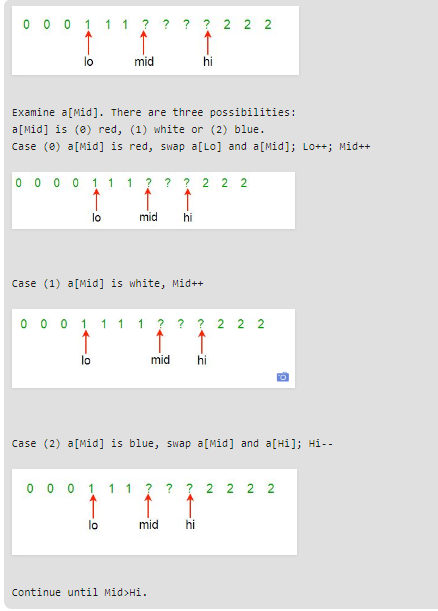

In [55]:
// Sort the input array, the array is assumed to 
// have values in {0, 1, 2} 
static void sort012(int a[], int arr_size) 
{ 
    int lo = 0; 
    int hi = arr_size - 1; 
    int mid = 0, temp = 0; 
    while (mid <= hi) { 
        switch (a[mid]) { 
        case 0: { 
            temp = a[lo]; 
            a[lo] = a[mid]; 
            a[mid] = temp; 
            lo++; 
            mid++; 
            break; 
        } 
        case 1: 
            mid++; 
            break; 
        case 2: { 
            temp = a[mid]; 
            a[mid] = a[hi]; 
            a[hi] = temp; 
            hi--; 
            break; 
        } 
        } 
    } 
} 

In [56]:
/* Utility function to print array arr[] */
static void printArray(int arr[], int arr_size) 
{ 
    int i; 
    for (i = 0; i < arr_size; i++) 
        System.out.print(arr[i] + " "); 
    System.out.println(""); 
} 

In [57]:
int arr[] = { 0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1 }; 
int arr_size = arr.length; 
sort012(arr, arr_size); 
System.out.println("Array after seggregation "); 
printArray(arr, arr_size);

Array after seggregation 
0 0 0 0 0 1 1 1 1 1 2 2 


## **24. Merge Overlapping Intervals**
https://www.geeksforgeeks.org/merging-intervals/

In [58]:
/*
Given a set of time intervals in any order, 
merge all overlapping intervals into one and output the result which should have only mutually exclusive intervals. 
Let the intervals be represented as pairs of integers for simplicity.
For example, 
let the given set of intervals be {{1,3}, {2,4}, {5,7}, {6,8} }. 
The intervals {1,3} and {2,4} overlap with each other, so they should be merged and become {1, 4}. 
Similarly {5, 7} and {6, 8} should be merged and become {5, 8}
*/

In [59]:
/*
A simple approach is to start from the first interval and compare it with all other intervals for overlapping, 
if it overlaps with any other interval, then remove the other interval from list and merge the other into the first interval. 
Repeat the same steps for remaining intervals after first. 
This approach cannot be implemented in better than O(n^2) time.
*/

In [60]:
/*
An efficient approach is to first sort the intervals according to starting time. 
Once we have the sorted intervals, we can combine all intervals in a linear traversal. 
The idea is, in sorted array of intervals, 
if interval[i] doesn’t overlap with interval[i-1], 
then interval[i+1] cannot overlap with interval[i-1] 
because starting time of interval[i+1] must be greater than or equal to interval[i]. 
Following is the detailed step by step algorithm.
Time complexity of the method is O(nLogn) which is for sorting. 
Once the array of intervals is sorted, merging takes linear time.
*/

In [61]:
/*
1. Sort the intervals based on increasing order of 
    starting time.
2. Push the first interval on to a stack.
3. For each interval do the following
   a. If the current interval does not overlap with the stack 
       top, push it.
   b. If the current interval overlaps with stack top and ending
       time of current interval is more than that of stack top, 
       update stack top with the ending  time of current interval.
4. At the end stack contains the merged intervals. 
*/

In [62]:
class Interval 
{ 
    int start,end; 
    Interval(int start, int end) 
    { 
        this.start=start; 
        this.end=end; 
    } 
} 

In [63]:
public void mergeIntervals(Interval arr[])  
{  
    // Test if the given set has at least one interval  
    if (arr.length <= 0)  
        return;  

    // Create an empty stack of intervals  
    Stack<Interval> stack=new Stack<>(); 

    // sort the intervals in increasing order of start time  
    Arrays.sort(arr,new Comparator<Interval>(){ 
        public int compare(Interval i1,Interval i2) 
        { 
            return i1.start-i2.start; 
        } 
    }); 

    // push the first interval to stack  
    stack.push(arr[0]);  

    // Start from the next interval and merge if necessary  
    for (int i = 1 ; i < arr.length; i++)  
    {  
        // get interval from stack top  
        Interval top = stack.peek();  

        // if current interval is not overlapping with stack top,  
        // push it to the stack  
        if (top.end < arr[i].start)  
            stack.push(arr[i]);  

        // Otherwise update the ending time of top if ending of current  
        // interval is more  
        else if (top.end < arr[i].end)  
        {  
            top.end = arr[i].end;  
            stack.pop();  
            stack.push(top);  
        }  
    }  

    // Print contents of stack  
    System.out.print("The Merged Intervals are: "); 
    while (!stack.isEmpty())  
    {  
        Interval t = stack.pop();  
        System.out.print("["+t.start+","+t.end+"] "); 
    }   
}   

In [64]:
Interval arr[]=new Interval[4]; 
arr[0]=new Interval(6,8); 
arr[1]=new Interval(1,9); 
arr[2]=new Interval(2,4); 
arr[3]=new Interval(4,7); 
mergeIntervals(arr);

The Merged Intervals are: [1,9] 

In [65]:
/*
A O(n Log n) and O(1) Extra Space Solution
The above solution requires O(n) extra space for stack. 
We can avoid use of extra space by doing merge operations in-place. Below are detailed steps.

1) Sort all intervals in decreasing order of start time.
2) Traverse sorted intervals starting from first interval, 
   do following for every interval.
      a) If current interval is not first interval and it 
         overlaps with previous interval, then merge it with
         previous interval. Keep doing it while the interval
         overlaps with the previous one.         
      b) Else add current interval to output list of intervals.
Note that if intervals are sorted by decreasing order of start times, 
we can quickly check if intervals overlap or not by comparing start time of previous interval with end time of current interval.
*/

https://youtu.be/WdgAKCnWnwA

In [66]:
public static void mergeIntervals(Interval arr[])  
{  
    // Sort Intervals in decreasing order of  
    // start time  
    Arrays.sort(arr,new Comparator<Interval>(){ 
        public int compare(Interval i1,Interval i2) 
        { 
            return i2.start - i1.start; 
        } 
    }); 

    int index = 0; // Stores index of last element  
    // in output array (modified arr[])  

    // Traverse all input Intervals  
    for (int i=1; i<arr.length; i++)  
    {  
        // If this is not first Interval and overlaps  
        // with the previous one  
        if (arr[index].end >=  arr[i].start)  
        {  
               // Merge previous and current Intervals  
            arr[index].end = Math.max(arr[index].end, arr[i].end);  
            arr[index].start = Math.min(arr[index].start, arr[i].start);  
        }  
        else { 
            arr[index] = arr[i];  
            index++; 
        }     
    } 

    // Now arr[0..index-1] stores the merged Intervals  
    System.out.print("The Merged Intervals are: "); 
    for (int i = 0; i <= index; i++)  
    { 
        System.out.print("[" + arr[i].start + "," 
                                    + arr[i].end + "]");  
    } 
} 

In [67]:
Interval arr[]=new Interval[4]; 
arr[0]=new Interval(6,8); 
arr[1]=new Interval(1,9); 
arr[2]=new Interval(2,4); 
arr[3]=new Interval(4,7); 
mergeIntervals(arr);

The Merged Intervals are: [1,9]

## **25. Maximum profit by buying and selling a share at most twice**
https://www.geeksforgeeks.org/maximum-profit-by-buying-and-selling-a-share-at-most-twice/

In [68]:
/*
In a daily share trading, a buyer buys shares in the morning and sells it on the same day. 
If the trader is allowed to make at most 2 transactions in a day, 
whereas the second transaction can only start after the first one is complete (Sell->buy->sell->buy). 
Given stock prices throughout the day, find out the maximum profit that a share trader could have made.
*/

In [69]:
/*
Examples:

Input:   price[] = {10, 22, 5, 75, 65, 80}
Output:  87
Trader earns 87 as sum of 12 and 75
Buy at price 10, sell at 22, buy at 5 and sell at 80

Input:   price[] = {2, 30, 15, 10, 8, 25, 80}
Output:  100
Trader earns 100 as sum of 28 and 72
Buy at price 2, sell at 30, buy at 8 and sell at 80

Input:   price[] = {100, 30, 15, 10, 8, 25, 80};
Output:  72
Buy at price 8 and sell at 80.

Input:   price[] = {90, 80, 70, 60, 50}
Output:  0
Not possible to earn.
*/

In [70]:
/*
A Simple Solution is to consider every index ‘i’ and do following
Max profit with at most two transactions =
       MAX {max profit with one transaction and subarray price[0..i] +
            max profit with one transaction and aubarray price[i+1..n-1]  }
i varies from 0 to n-1. 
Maximum possible using one transaction can be calculated using the following O(n) algorithm (P 27.)
Time complexity of above simple solution is O(n2).
*/

In [71]:
/*
We can do this O(n) using following Efficient Solution. 
The idea is to store the maximum possible profit of every subarray and solve the problem in the following two phases.

1) Create a table profit[0..n-1] and initialize all values in it 0.
2) Traverse price[] from right to left and update profit[i] such that profit[i] stores maximum profit achievable from one transaction in subarray price[i..n-1]
3) Traverse price[] from left to right and update profit[i] such that profit[i] stores maximum profit such that profit[i] contains maximum achievable profit from two transactions in subarray price[0..i].
4) Return profit[n-1]

To do step 2, we need to keep track of the maximum price from right to left side 
and to do step 3, we need to keep track of the minimum price from left to right. 
Why we traverse in reverse directions? 
The idea is to save space, 
in the third step, we use the same array for both purposes, maximum with 1 transaction and maximum with 2 transactions. 
After iteration i, the array profit[0..i] contains the maximum profit with 2 transactions and profit[i+1..n-1] contains profit with two transactions.

Below are implementations of the above idea.
*/

In [72]:
// Returns maximum profit with two transactions on a given 
// list of stock prices, price[0..n-1] 
static int maxProfit(int price[], int n) 
{ 
    // Create profit array and initialize it as 0 
    int profit[] = new int[n]; 
    for (int i=0; i<n; i++) 
        profit[i] = 0; 

    /* Get the maximum profit with only one transaction 
       allowed. After this loop, profit[i] contains maximum 
       profit from price[i..n-1] using at most one trans. */
    int max_price = price[n-1]; 
    for (int i=n-2;i>=0;i--) 
    { 
        // max_price has maximum of price[i..n-1] 
        if (price[i] > max_price) 
            max_price = price[i]; 

        // we can get profit[i] by taking maximum of: 
        // a) previous maximum, i.e., profit[i+1] 
        // b) profit by buying at price[i] and selling at 
        //    max_price 
        profit[i] = Math.max(profit[i+1], max_price-price[i]); 
    } 

    /* Get the maximum profit with two transactions allowed 
       After this loop, profit[n-1] contains the result */
    int min_price = price[0]; 
    for (int i=1; i<n; i++) 
    { 
        // min_price is minimum price in price[0..i] 
        if (price[i] < min_price) 
            min_price = price[i]; 

        // Maximum profit is maximum of: 
        // a) previous maximum, i.e., profit[i-1] 
        // b) (Buy, Sell) at (min_price, price[i]) and add 
        //    profit of other trans. stored in profit[i] 
        profit[i] = Math.max(profit[i-1], profit[i] + 
                                    (price[i]-min_price) ); 
    } 
    int result = profit[n-1]; 
    return result; 
} 

In [73]:
int price[] = {2, 30, 15, 10, 8, 25, 80}; 
int n = price.length; 
System.out.println("Maximum Profit = "+ maxProfit(price, n)); 

Maximum Profit = 100


## **26. Maximum profit by buying and selling a share at most k times**
https://www.geeksforgeeks.org/maximum-profit-by-buying-and-selling-a-share-at-most-k-times/

In [74]:
/*
In share trading, a buyer buys shares and sells on a future date. 
Given the stock price of n days, the trader is allowed to make at most k transactions, 
where a new transaction can only start after the previous transaction is complete, 
find out the maximum profit that a share trader could have made.
*/

In [75]:
/*
Examples:

Input:  
Price = [10, 22, 5, 75, 65, 80]
    K = 2
Output:  87
Trader earns 87 as sum of 12 and 75
Buy at price 10, sell at 22, buy at 
5 and sell at 80

Input:  
Price = [12, 14, 17, 10, 14, 13, 12, 15]
    K = 3
Output:  12
Trader earns 12 as the sum of 5, 4 and 3
Buy at price 12, sell at 17, buy at 10 
and sell at 14 and buy at 12 and sell
at 15
 
Input:  
Price = [100, 30, 15, 10, 8, 25, 80]
    K = 3
Output:  72
Only one transaction. Buy at price 8 
and sell at 80.

Input:  
Price = [90, 80, 70, 60, 50]
    K = 1
Output:  0
Not possible to earn. 
*/

In [76]:
/*
The problem can be solved by using dynamic programming.
*/

In [77]:
/*
Let profit[t][i] represent maximum profit using at most t transactions up to day i (including day i). 
Then the relation is:
    profit[t][i] = max(profit[t][i-1], max(price[i] – price[j] + profit[t-1][j]))
          for all j in range [0, i-1]

profit[t][i] will be maximum of –
    1. profit[t][i-1] which represents not doing any transaction on the ith day.
    2. Maximum profit gained by selling on ith day. 
       In order to sell shares on ith day, we need to purchase it on any one of [0, i – 1] days. 
       If we buy shares on jth day and sell it on ith day, max profit will be price[i] – price[j] + profit[t-1][j] where j varies from 0 to i-1. 
       Here profit[t-1][j] is best we could have done with one less transaction till jth day.
Below is Dynamic Programming based implementation.
time complexity of O(k.n2)
*/

In [78]:
// Function to find out  
// maximum profit by  
// buying & selling a  
// share atmost k times 
// given stock price of n days 
static int maxProfit(int[] price,  
                     int n,  
                     int k) 
{ 

    // table to store results 
    // of subproblems 
    // profit[t][i] stores  
    // maximum profit using  
    // atmost t transactions up 
    // to day i (including day i) 
    int[][] profit = new int[k + 1][n + 1]; 

    // For day 0, you can't  
    // earn money irrespective 
    // of how many times you trade 
    for (int i = 0; i <= k; i++) 
        profit[i][0] = 0; 

    // profit is 0 if we don't 
    // do any transation 
    // (i.e. k =0) 
    for (int j = 0; j <= n; j++) 
        profit[0][j] = 0; 

    // fill the table in  
    // bottom-up fashion 
    for (int i = 1; i <= k; i++)  
    { 
        for (int j = 1; j < n; j++) 
        { 
            int max_so_far = 0; 

            for (int m = 0; m < j; m++) 
            max_so_far = Math.max(max_so_far, price[j] - 
                         price[m] + profit[i - 1][m]); 

            profit[i][j] = Math.max(profit[i] [j - 1],  
                                          max_so_far); 
        } 
    } 

    return profit[k][n - 1]; 
}

public static void main(String []args) 
{ 
    int k = 2;
    
    int[] price = { 10, 22, 5, 75, 65, 80 }; 
    int n = price.length; 
    System.out.println("Maximum profit is: " +  
                        maxProfit(price, n, k)); 
} 
main(args)
    

Maximum profit is: 87


In [79]:
/*
The above solution has time complexity of O(k.n2). 
It can be reduced if we are able to calculate the maximum profit gained by selling shares on the ith day in constant time.

profit[t][i] = max(profit [t][i-1], max(price[i] – price[j] + profit[t-1][j]))
                            for all j in range [0, i-1]

If we carefully notice,
    max(price[i] – price[j] + profit[t-1][j])
    for all j in range [0, i-1]
can be rewritten as,
    = price[i] + max(profit[t-1][j] – price[j])
      for all j in range [0, i-1]
    = price[i] + max(prevDiff, profit[t-1][i-1] – price[i-1])

where prevDiff is max(profit[t-1][j] – price[j])
                    for all j in range [0, i-2]
                    
                    
So, if we have already calculated max(profit[t-1][j] – price[j]) for all j in range [0, i-2], 
we can calculate it for j = i – 1 in constant time. 
In other words, we don’t have to look back in the range [0, i-1] anymore to find out best day to buy. 
We can determine that in constant time using below revised relation.

profit[t][i] = max(profit[t][i-1], price[i] + max(prevDiff, profit [t-1][i-1] – price[i-1])
where prevDiff is max(profit[t-1][j] – price[j]) for all j in range [0, i-2]

Below is its optimized implementation –
*/

In [80]:
// Function to find out maximum profit by 
// buying & selling/ a share atmost k times  
// given stock price of n days 
static int maxProfit(int price[],  
                     int n, int k) 
{ 

    // table to store results of subproblems 
    // profit[t][i] stores maximum profit 
    // using atmost t transactions up to day 
    // i (including day i) 
    int profit[][] = new int[k + 1][ n + 1]; 

    // For day 0, you can't earn money 
    // irrespective of how many times you trade 
    for (int i = 0; i <= k; i++) 
        profit[i][0] = 0; 

    // profit is 0 if we don't do any  
    // transation (i.e. k =0) 
    for (int j = 0; j <= n; j++) 
        profit[0][j] = 0; 

    // fill the table in bottom-up fashion 
    for (int i = 1; i <= k; i++)  
    { 
        int prevDiff = Integer.MIN_VALUE; 
        for (int j = 1; j < n; j++)  
        { 
            prevDiff = Math.max(prevDiff,  
                       profit[i - 1][j - 1] -  
                       price[j - 1]); 
            profit[i][j] = Math.max(profit[i][j - 1],  
                           price[j] + prevDiff); 
        } 
    } 

    return profit[k][n - 1]; 
} 

// Driver code 
public static void main (String[] args)  
{ 
    int k = 3; 
    int price[] = {12, 14, 17, 10, 14, 13, 12, 15}; 

    int n = price.length; 

    System.out.println("Maximum profit is: " +  
                        maxProfit(price, n, k)); 
} 
main(args)

Maximum profit is: 12


In [81]:
/*
The time complexity of the above solution is O(kn) and space complexity is O(nk). 
Space complexity can further be reduced to O(n) as we use the result from the last transaction.
*/

## **27. Maximum difference between two elements such that larger element appears after the smaller number**
https://www.geeksforgeeks.org/maximum-difference-between-two-elements/

https://youtu.be/SO0bwMziLlU

In [82]:
/*
Given an array arr[] of integers, 
find out the maximum difference between any two elements such that larger element appears after the smaller number.

Examples :

Input : arr = {2, 3, 10, 6, 4, 8, 1}
Output : 8
Explanation : The maximum difference is between 10 and 2.

Input : arr = {7, 9, 5, 6, 3, 2}
Output : 2
Explanation : The maximum difference is between 9 and 7.
*/

In [83]:
/*
Method 1 (Simple)
Use two loops. 
In the outer loop, pick elements one by one 
and in the inner loop calculate the difference of the picked element with every other element in the array 
and compare the difference with the maximum difference calculated so far. 
Below is the implementation of the above approach :
Time Complexity : O(n^2)
Auxiliary Space : O(1)
*/

In [84]:
/* The function assumes that there are at least two 
   elements in array. 
   The function returns a negative value if the array is 
   sorted in decreasing order.  
   Returns 0 if elements are equal */
int maxDiff(int arr[], int arr_size)  
{ 
    int max_diff = arr[1] - arr[0]; 
    int i, j; 
    for (i = 0; i < arr_size; i++)  
    { 
        for (j = i + 1; j < arr_size; j++)  
        { 
            if (arr[j] - arr[i] > max_diff) 
                max_diff = arr[j] - arr[i]; 
        } 
    } 
    return max_diff; 
} 

int arr[] = {1, 2, 90, 10, 110}; 
System.out.println("Maximum differnce is " +  
                        maxDiff(arr, 5)); 

Maximum differnce is 109


In [85]:
/*
Method 2 (Tricky and Efficient)
In this method, instead of taking difference of the picked element with every other element, 
we take the difference with the minimum element found so far. So we need to keep track of 2 things:
1) Maximum difference found so far (max_diff).
2) Minimum number visited so far (min_element).

Time Complexity : O(n)
Auxiliary Space : O(1)
*/

In [86]:
int maxDiff(int arr[], int arr_size)  
{ 
    int max_diff = arr[1] - arr[0]; 
    int min_element = arr[0]; 
    int i; 
    for (i = 1; i < arr_size; i++)  
    { 
        if (arr[i] - min_element > max_diff) 
            max_diff = arr[i] - min_element; 
        if (arr[i] < min_element) 
            min_element = arr[i]; 
    } 
    return max_diff; 
} 

int arr[] = {1, 2, 90, 10, 110}; 
int size = arr.length; 
System.out.println("MaximumDifference is " +  
                        maxDiff(arr, size)); 

MaximumDifference is 109


## **28. Minimize the maximum difference between the heights**
https://www.geeksforgeeks.org/minimize-the-maximum-difference-between-the-heights/

In [4]:
/*
Given heights of n towers and a value k. 
We need to either increase or decrease height of every tower by k (only once) where k > 0. 
The task is to minimize the difference between the heights of the longest and the shortest tower after modifications, and output this difference.
*/

In [88]:
/*
Examples:

Input  : arr[] = {1, 15, 10}, k = 6
Output :  Maximum difference is 5.
Explanation : We change 1 to 6, 15 to 
9 and 10 to 4. Maximum difference is 5
(between 4 and 9). We can't get a lower
difference.

Input : arr[] = {1, 5, 15, 10} 
        k = 3   
Output : Maximum difference is 8
arr[] = {4, 8, 12, 7}

Input : arr[] = {4, 6} 
        k = 10
Output : Maximum difference is 2
arr[] = {14, 16} OR {-6, -4}

Input : arr[] = {6, 10} 
        k = 3
Output : Maximum difference is 2
arr[] = {9, 7} 

Input : arr[] = {1, 10, 14, 14, 14, 15}
        k = 6 
Output: Maximum difference is 5
arr[] = {7, 4, 8, 8, 8, 9} 

Input : arr[] = {1, 2, 3}
        k = 2 
Output: Maximum difference is 2
arr[] = {3, 4, 5} 
*/

In [89]:
/*
The idea is to sort all elements increasing order. 
And for all elements check if subtract(element-k) and add(element+k) makes any changes or not.

Time Complexity: O(n Log n)
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190710125831/MinimizeTheMaximumDifference-1024x805.png"/>

In [90]:
// Modifies the array by subtracting/adding 
// k to every element such that the difference 
// between maximum and minimum is minimized 
static int getMinDiff(int arr[], int n, int k) 
{ 
    if (n == 1) 
    return 0; 

    // Sort all elements 
    Arrays.sort(arr); 

    // Initialize result 
    int ans = arr[n-1] - arr[0]; 

    // Handle corner elements 
    int small = arr[0] + k; 
    int big = arr[n-1] - k; 
    int temp = 0; 

    if (small > big) 
    { 
        temp = small; 
        small = big; 
        big = temp; 
    } 

    // Traverse middle elements 
    for (int i = 1; i < n-1; i ++) 
    { 
        int subtract = arr[i] - k; 
        int add = arr[i] + k; 

        // If both subtraction and addition 
        // do not change diff 
        if (subtract >= small || add <= big) 
            continue; 

        // Either subtraction causes a smaller 
        // number or addition causes a greater 
        // number. Update small or big using 
        // greedy approach (If big - subtract 
        // causes smaller diff, update small 
        // Else update big) 
        if (big - subtract <= add - small) 
            small = subtract; 
        else
            big = add; 
    } 

    return Math.min(ans, big - small); 
} 

// Driver function to test the above function 
public static void main(String[] args) 
{ 
    int arr[] = {4, 6}; 
    int n = arr.length; 
    int k = 10; 
    System.out.println("Maximum difference is "+ 
                        getMinDiff(arr, n, k)); 
} 
main(args)

Maximum difference is 2


## **29. Move all zeroes to end of array**
https://www.geeksforgeeks.org/move-zeroes-end-array/

https://youtu.be/0jXTju134Hw

In [91]:
/*
Given an array of random numbers, 
Push all the zero’s of a given array to the end of the array. 
For example, 
    if the given arrays is {1, 9, 8, 4, 0, 0, 2, 7, 0, 6, 0}, 
    it should be changed to {1, 9, 8, 4, 2, 7, 6, 0, 0, 0, 0}. 
The order of all other elements should be same. 
Expected time complexity is O(n) and extra space is O(1).
*/

In [92]:
/*
Traverse the given array ‘arr’ from left to right. 
While traversing, maintain count of non-zero elements in array. 
Let the count be ‘count’. 
For every non-zero element arr[i], put the element at ‘arr[count]’ and increment ‘count’. 
After complete traversal, all non-zero elements have already been shifted to front end and ‘count’ is set as index of first 0. 
Now all we need to do is that run a loop which makes all elements zero from ‘count’ till end of the array.
*/

In [93]:
// Function which pushes all zeros to end of an array. 
static void pushZerosToEnd(int arr[], int n) 
{ 
    int count = 0;  // Count of non-zero elements 

    // Traverse the array. If element encountered is 
    // non-zero, then replace the element at index 'count' 
    // with this element 
    for (int i = 0; i < n; i++) 
        if (arr[i] != 0) 
            arr[count++] = arr[i]; // here count is 
                                   // incremented 

    // Now all non-zero elements have been shifted to 
    // front and 'count' is set as index of first 0. 
    // Make all elements 0 from count to end. 
    while (count < n) 
        arr[count++] = 0; 
} 

In [94]:
int arr[] = {1, 9, 8, 4, 0, 0, 2, 7, 0, 6, 0, 9}; 
int n = arr.length; 
pushZerosToEnd(arr, n); 
System.out.println("Array after pushing zeros to the back: "); 
for (int i=0; i<n; i++) 
    System.out.print(arr[i]+" ");

Array after pushing zeros to the back: 
1 9 8 4 2 7 6 9 0 0 0 0 

## **30. Minimum swaps required to bring all elements less than or equal to k together**
https://www.geeksforgeeks.org/minimum-swaps-required-bring-elements-less-equal-k-together/

In [95]:
/*
Given an array of n positive integers and a number k. 
Find the minimum number of swaps required to bring all the numbers less than or equal to k together.
*/

In [96]:
/*
Input:  arr[] = {2, 1, 5, 6, 3}, k = 3
Output: 1

Explanation: 
To bring elements 2, 1, 3 together, swap 
element '5' with '3' such that final array
will be-
arr[] = {2, 1, 3, 6, 5}

Input:  arr[] = {2, 7, 9, 5, 8, 7, 4}, k = 5
Output: 2
*/

In [97]:
/*
A simple solution is to first count all elements less than or equals to k(say ‘good’). 
Now traverse for every sub-array and swap those elements whose value is greater than k. 
Time complexity of this approach is O(n2)
*/

In [98]:
/*
A simple approach is to use two pointer technique and sliding window.

Find count of all elements which are less than or equals to ‘k’. Let’s say the count is ‘cnt’
Using two pointer technique for window of length ‘cnt’, each time keep track of how many elements in this range are greater than ‘k’. Let’s say the total count is ‘bad’.
Repeat step 2, for every window of length ‘cnt’ and take minimum of count ‘bad’ among them. This will be the final answer.
*/

In [99]:
// Utility function to find minimum swaps 
// required to club all elements less than 
// or equals to k together 
static int minSwap(int arr[], int n, int k) { 
  
    // Find count of elements which are 
    // less than equals to k 
    int count = 0; 
    for (int i = 0; i < n; ++i) 
    if (arr[i] <= k) 
        ++count; 
  
    // Find unwanted elements in current 
    // window of size 'count' 
    int bad = 0; 
    for (int i = 0; i < count; ++i) 
    if (arr[i] > k) 
        ++bad; 
  
    // Initialize answer with 'bad' value of 
    // current window 
    int ans = bad; 
    for (int i = 0, j = count; j < n; ++i, ++j) { 
  
    // Decrement count of previous window 
    if (arr[i] > k) 
        --bad; 
  
    // Increment count of current window 
    if (arr[j] > k) 
        ++bad; 
  
    // Update ans if count of 'bad' 
    // is less in current window 
    ans = Math.min(ans, bad); 
    } 
    return ans; 
} 

In [100]:
int arr[] = {2, 1, 5, 6, 3}; 
int n = arr.length; 
int k = 3; 
System.out.print(minSwap(arr, n, k) + "\n"); 

int arr1[] = {2, 7, 9, 5, 8, 7, 4}; 
n = arr1.length; 
k = 5; 
System.out.print(minSwap(arr1, n, k)); 

1
2

**------------------------Questions Covered-----------------------------**

***1	Array	https://www.geeksforgeeks.org/largest-sum-subarray-least-k-numbers/	Pep_JavaIP_1Arrays_31LargestSubarraySumwithAtleastK	
Sliding Window, Kadanes
1	Array	https://www.geeksforgeeks.org/form-minimum-number-from-given-sequence/	Pep_JavaIP_1Arrays_32MinimumNumberDISequence	Miscellanous																						
1	Array	https://www.geeksforgeeks.org/find-smallest-value-represented-sum-subset-given-array/	Pep_JavaIP_1Arrays_33SmalestPossiblePositiveNumber	Maths																							
1	Array	https://www.geeksforgeeks.org/generate-all-possible-sorted-arrays-from-alternate-elements-of-two-given-arrays/	Pep_JavaIP_1Arrays_34GenerateAllPossibleSortedArrays	RecursionInArrays																							
1	Array	https://leetcode.com/problems/next-permutation/description/	Pep_JavaIP_1Arrays_35NextPermutation	Miscellanous																						
1	Array	https://www.geeksforgeeks.org/given-an-array-arr-find-the-maximum-j-i-such-that-arrj-arri/	Pep_JavaIP_1Arrays_36Maximumjminusi	LeftRightTraversal																						
1	Array	https://leetcode.com/problems/maximum-sum-of-3-non-overlapping-subarrays/description/	Pep_JavaIP_37MaximumSumof3NonOverlappingSubarrays	LeftRightTraversal																							
1	Array	https://www.geeksforgeeks.org/number-subarrays-maximum-value-given-range/	Pep_JavaIP_1Arrays_38CountSAsWithMaxInRange	Maths																							
1	Array	https://www.geeksforgeeks.org/print-all-possible-combinations-of-r-elements-in-a-given-array-of-size-n/	Pep_JavaIP_1Arrays_39NCRCombinations	RecursionInArrays																							
1	Array	https://www.geeksforgeeks.org/longest-subarray-sum-divisible-k/	Pep_JavaIP_1Arrays_40LongestSubArrayDivisibleByK	Sliding Window																							
1	Array	https://www.geeksforgeeks.org/find-minimum-number-of-merge-operations-to-make-an-array-palindrome/	Pep_JavaIP_1Arrays_41MinimumMergeOpsRequiredToCreatePalindrome	2 Pointer Method																							
1	Array	https://www.geeksforgeeks.org/reorder-a-array-according-to-given-indexes/	Pep_JavaIP_1Arrays_42ReorderArrayIndexwise	ReorderArray																							
1	Array	https://www.codechef.com/JAN18/problems/MAXSC/	Pep_JavaIP_1Arrays_43MaxSCCodeChef	Miscellanous																							
1	Array	https://www.geeksforgeeks.org/rearrange-array-maximum-minimum-form-set-2-o1-extra-space/	Pep_JavaIP_1Arrays_44RearrangeMaximumMinimumForm	2InfoOnSameIndex																						
1	Array	https://www.geeksforgeeks.org/given-an-array-of-numbers-arrange-the-numbers-to-form-the-biggest-number/	Pep_JavaIP_45RearrangePrintBiggestNumber***

In [4]:
import java.util.*;
import java.io.*;
import java.util.Arrays;
String[] args =new String[0];

## **31. Largest sum subarray with at-least k numbers**
https://www.geeksforgeeks.org/largest-sum-subarray-least-k-numbers/

In [5]:
/*
Given an array, find the subarray (containing at least k numbers) which has the largest sum.

Examples:

Input : arr[] = {-4, -2, 1, -3} 
            k = 2
Output : -1
The sub array is {-2, 1}

Input : arr[] = {1, 1, 1, 1, 1, 1} 
            k = 2
Output : 6 
The sub array is {1, 1, 1, 1, 1, 1}
*/

In [6]:
/*
This problem is an extension of Largest Sum Subarray Problem. (https://www.geeksforgeeks.org/largest-sum-contiguous-subarray/)
1) We first compute maximum sum till every index and store it in an array maxSum[].
2) After filling the array, we use the sliding window concept of size k. 
   Keep track of sum of current k elements. 
   To compute sum of current window, remove first element of previous window and add current element. 
   After getting the sum of current window, we add the maxSum of the previous window, 
   if it is greater than current max, then update it else not.

Below is the implementation of above approach:
Time Complexity: O(n)
*/

In [7]:
// Returns maximum sum of a subarray with at-least 
// k elements. 
static int maxSumWithK(int a[], int n, int k) 
{ 
    // maxSum[i] is going to store maximum sum 
    // till index i such that a[i] is part of the 
    // sum. 
    int maxSum[] = new int [n]; 
    maxSum[0] = a[0]; 

    // We use Kadane's algorithm to fill maxSum[] 
    // Below code is taken from method 3 of 
    // https://www.geeksforgeeks.org/largest-sum-contiguous-subarray/ 
    int curr_max = a[0]; 
    for (int i = 1; i < n; i++) 
    { 
        curr_max = Math.max(a[i], curr_max+a[i]); 
        maxSum[i] = curr_max; 
    } 

    // Sum of first k elements 
    int sum = 0; 
    for (int i = 0; i < k; i++) 
        sum += a[i]; 

    // Use the concept of sliding window 
    int result = sum; 
    for (int i = k; i < n; i++) 
    { 
        // Compute sum of k elements ending 
        // with a[i]. 
        sum = sum + a[i] - a[i-k]; 

        // Update result if required 
        result = Math.max(result, sum); 

        // Include maximum sum till [i-k] also 
        // if it increases overall max. 
        result = Math.max(result, sum + maxSum[i-k]); 
    } 
    return result; 
} 

In [8]:
int arr[] = {1, 2, 3, -10, -3}; 
int k = 4; 
System.out.println(maxSumWithK(arr, arr.length, k));

-4


## **32. Form minimum number from given sequence**
https://www.geeksforgeeks.org/form-minimum-number-from-given-sequence/

In [9]:
/*
Given a pattern containing only I’s and D’s. 
I for increasing and D for decreasing. Devise an algorithm to print the minimum number following that pattern. 
Digits from 1-9 and digits can’t repeat.

Examples:

   Input: D        Output: 21
   Input: I        Output: 12
   Input: DD       Output: 321
   Input: II       Output: 123
   Input: DIDI     Output: 21435
   Input: IIDDD    Output: 126543
   Input: DDIDDIID Output: 321654798 
*/

In [10]:
/*
Method 4 (Using two pointers)
Observation

1. Since we have to find minimum number without repeating digits, maximum length of output can be 9 (using each 1-9 digits once)
2. Length of the output will be exactly one greater than input length.
3. The idea is to iterate over the string and do the following if current character is ‘I’ or string is ended.
        i.Assign count in increasing order to each element from current-1 to the next left index of ‘I’ (or starting index is reached).
        ii.Increase the count by 1.

Time Complexity : O(N)
Auxiliary Space : O(1)
*/

In [11]:
/*
Input  :  IDID
Output : 13254

Input  :  I
Output : 12

Input  :  DD
Output : 321

Input  :  II
Output : 123

Input  :  DIDI
Output : 21435

Input  :  IIDDD
Output : 126543

Input  :  DDIDDIID
Output : 321654798
*/

In [12]:
// Returns minimum number made from given sequence without repeating digits 
static String getMinNumberForPattern(String seq) 
{ 
    int n = seq.length(); 

    if (n >= 9) 
        return "-1"; 

    char result[] = new char[n + 1]; 

    int count = 1; 

    // The loop runs for each input character as well as  
    // one additional time for assigning rank to each remaining characters 
    for (int i = 0; i <= n; i++) 
    { 
        if (i == n || seq.charAt(i) == 'I') 
        { 
            for (int j = i - 1; j >= -1; j--) 
            { 
                result[j + 1] = (char) ((int) '0' + count++); 
                if (j >= 0 && seq.charAt(j) == 'I') 
                    break; 
            } 
        } 
    } 
    return new String(result); 
} 

In [13]:
String inputs[] = { "IDID", "I", "DD", "II", "DIDI", "IIDDD", "DDIDDIID" }; 

for(String input : inputs) 
{ 
    System.out.println(getMinNumberForPattern(input)); 
} 

13254
12
321
123
21435
126543
321654798


## **33. Find the smallest positive integer value that cannot be represented as sum of any subset of a given array**
https://www.geeksforgeeks.org/find-smallest-value-represented-sum-subset-given-array/

In [14]:
/*
Given a sorted array (sorted in non-decreasing order) of positive numbers, 
find the smallest positive integer value that cannot be represented as sum of elements of any subset of given set.
Expected time complexity is O(n).
*/

In [15]:
/*
Examples:

Input:  arr[] = {1, 3, 6, 10, 11, 15};
Output: 2

Input:  arr[] = {1, 1, 1, 1};
Output: 5

Input:  arr[] = {1, 1, 3, 4};
Output: 10

Input:  arr[] = {1, 2, 5, 10, 20, 40};
Output: 4

Input:  arr[] = {1, 2, 3, 4, 5, 6};
Output: 22
*/

In [16]:
/*
A Simple Solution is to start from value 1 and check all values one by one if they can sum to values in the given array. 
This solution is very inefficient as it reduces to subset sum problem which is a well known NP Complete Problem.
*/

In [17]:
/*
We can solve this problem in O(n) time using a simple loop. 
Let the input array be arr[0..n-1]. 
We initialize the result as 1 (smallest possible outcome) and traverse the given array. 
Let the smallest element that cannot be represented by elements at indexes from 0 to (i-1) be ‘res’, 
there are following two possibilities when we consider element at index i:

1) We decide that ‘res’ is the final result: 
    If arr[i] is greater than ‘res’, 
    then we found the gap which is ‘res’ because the elements after arr[i] are also going to be greater than ‘res’.

2) The value of ‘res’ is incremented after considering arr[i]: 
    The value of ‘res’ is incremented by arr[i] 
    (why? If elements from 0 to (i-1) can represent 1 to ‘res-1’, 
          then elements from 0 to i can represent from 1 to ‘res + arr[i] – 1’ be adding ‘arr[i]’ to all subsets that represent 1 to ‘res’)
*/

In [18]:
// Returns the smallest number that cannot be represented as sum 
// of subset of elements from set represented by sorted array arr[0..n-1] 
int findSmallest(int arr[], int n)  
{ 
    int res = 1; // Initialize result 

    // Traverse the array and increment 'res' if arr[i] is 
    // smaller than or equal to 'res'. 
    for (int i = 0; i < n && arr[i] <= res; i++) 
        res = res + arr[i]; 

    return res; 
} 

In [19]:
int arr1[] = {1, 3, 4, 5}; 
int n1 = arr1.length; 
System.out.println(findSmallest(arr1, n1)); 

int arr2[] = {1, 2, 6, 10, 11, 15}; 
int n2 = arr2.length; 
System.out.println(findSmallest(arr2, n2)); 

int arr3[] = {1, 1, 1, 1}; 
int n3 = arr3.length; 
System.out.println(findSmallest(arr3, n3)); 

int arr4[] = {1, 1, 3, 4}; 
int n4 = arr4.length; 
System.out.println(findSmallest(arr4, n4)); 

2
4
5
10


## **34. Generate all possible sorted arrays from alternate elements of two given sorted arrays**
https://www.geeksforgeeks.org/generate-all-possible-sorted-arrays-from-alternate-elements-of-two-given-arrays/

In [20]:
/*
Given two sorted arrays A and B, 
generate all possible arrays such that first element is taken from A then from B then from A and so on in increasing order till the arrays exhausted. 
The generated arrays should end with an element from B.
*/

In [21]:
/*
For Example
 
A = {10, 15, 25}
B = {1, 5, 20, 30}

The resulting arrays are:
  10 20
  10 20 25 30
  10 30
  15 20
  15 20 25 30
  15 30
  25 30
*/

In [22]:
/*
The idea is to use recursion. 
In the recursive function, a flag is passed to indicate whether current element in output should be taken from ‘A’ or ‘B’.
*/

In [23]:
/* Function to generates and prints all sorted arrays from alternate 
   elements of 'A[i..m-1]' and 'B[j..n-1]' 
   If 'flag' is true, then current element is to be included from A  
   otherwise from B. 
   'len' is the index in output array C[]. We print output array   
   each time before including a character from A only if length of  
   output array is greater than 0. We try than all possible  
   combinations */
void generateUtil(int A[], int B[], int C[], int i, int j, int m, int n, 
        int len, boolean flag)  
{ 
    if (flag) // Include valid element from A 
    { 
        // Print output if there is at least one 'B' in output array 'C' 
        if (len != 0)  
            printArr(C, len + 1); 

        // Recur for all elements of A after current index 
        for (int k = i; k < m; k++)  
        { 
            if (len == 0)  
            { 
                /* this block works for the very first call to include 
                the first element in the output array */
                C[len] = A[k]; 

                // don't increment lem as B is included yet 
                generateUtil(A, B, C, k + 1, j, m, n, len, !flag); 
            }  

            /* include valid element from A and recur */
            else if (A[k] > C[len])  
            { 
                    C[len + 1] = A[k]; 
                    generateUtil(A, B, C, k + 1, j, m, n, len + 1, !flag); 
            } 
        } 
    }  

    /* Include valid element from B and recur */
    else
    { 
        for (int l = j; l < n; l++)  
        { 
            if (B[l] > C[len])  
            { 
                C[len + 1] = B[l]; 
                generateUtil(A, B, C, i, l + 1, m, n, len + 1, !flag); 
            } 
        } 
    } 
} 

In [24]:
/* Wrapper function */
void generate(int A[], int B[], int m, int n)  
{ 
    int C[] = new int[m + n]; 

    /* output array */
    generateUtil(A, B, C, 0, 0, m, n, 0, true); 
} 

// A utility function to print an array 
void printArr(int arr[], int n)  
{ 
    for (int i = 0; i < n; i++) 
        System.out.print(arr[i] + " "); 
    System.out.println(""); 
} 

public static void main(String[] args)  
{  
    int A[] = {10, 15, 25}; 
    int B[] = {5, 20, 30}; 
    int n = A.length; 
    int m = B.length; 
    generate(A, B, n, m); 
} 
main(args)

10 20 
10 20 25 30 
10 30 
15 20 
15 20 25 30 
15 30 
25 30 


## **35. Next Permutation**
https://leetcode.com/problems/next-permutation/description/

In [25]:
/*
Implement next permutation, which rearranges numbers into the lexicographically next greater permutation of numbers.
If such arrangement is not possible, it must rearrange it as the lowest possible order (ie, sorted in ascending order).
The replacement must be in-place and use only constant extra memory.
Here are some examples. Inputs are in the left-hand column and its corresponding outputs are in the right-hand column.

1,2,3 → 1,3,2
3,2,1 → 1,2,3
1,1,5 → 1,5,1
*/

https://leetcode.com/problems/next-permutation/solution/

<img src = "https://leetcode.com/media/original_images/31_Next_Permutation.gif"/>

In [26]:
/*
Algorithm

First, we observe that for any given sequence that is in descending order, no next larger permutation is possible. 
For example, no next permutation is possible for the following array:
[9, 5, 4, 3, 1]

We need to find the first pair of two successive numbers a[i] and a[i−1], from the right, which satisfy a[i] > a[i-1]. 
Now, no rearrangements to the right of a[i-1]a[i−1] can create a larger permutation since that subarray consists of numbers in descending order. 
Thus, we need to rearrange the numbers to the right of a[i-1]a[i−1] including itself.

Now, what kind of rearrangement will produce the next larger number? 
We want to create the permutation just larger than the current one. 
Therefore, we need to replace the number a[i-1]a[i−1] with the number which is just larger than itself among the numbers lying to its right section, say a[j]a[j].


We swap the numbers a[i-1]a[i−1] and a[j]a[j]. 
We now have the correct number at index i-1i−1. 
But still the current permutation isn't the permutation that we are looking for.
We need the smallest permutation that can be formed by using the numbers only to the right of a[i-1]a[i−1]. 
Therefore, we need to place those numbers in ascending order to get their smallest permutation.

But, recall that while scanning the numbers from the right, we simply kept decrementing the index until we found the pair a[i]a[i] and a[i-1]a[i−1] where, a[i] > a[i-1]a[i]>a[i−1]. 
Thus, all numbers to the right of a[i-1]a[i−1] were already sorted in descending order. 
Furthermore, swapping a[i-1]a[i−1] and a[j]a[j] didn't change that order. 
Therefore, we simply need to reverse the numbers following a[i-1]a[i−1] to get the next smallest lexicographic permutation.
*/

<img src = "https://leetcode.com/media/original_images/31_nums_graph.png"/>

In [27]:
public class Solution {
    public static void nextPermutation(int[] nums) {
        int i = nums.length - 2;
        while (i >= 0 && nums[i + 1] <= nums[i]) {
            i--;
        }
        if (i >= 0) {
            int j = nums.length - 1;
            while (j >= 0 && nums[j] <= nums[i]) {
                j--;
            }
            swap(nums, i, j);
        }
        reverse(nums, i + 1);
    }

    private static void reverse(int[] nums, int start) {
        int i = start, j = nums.length - 1;
        while (i < j) {
            swap(nums, i, j);
            i++;
            j--;
        }
    }

    private static void swap(int[] nums, int i, int j) {
        int temp = nums[i];
        nums[i] = nums[j];
        nums[j] = temp;
    }
}


void printArr(int[] arr){
    for(int val:arr){
        System.out.print(val+" ");
    }
    System.out.println();
}

In [28]:
int[] arr1 = {1,2,3};
int[] arr2 = {3,2,1};
int[] arr3 = {1,1,5};
Solution.nextPermutation(arr1);
Solution.nextPermutation(arr2);
Solution.nextPermutation(arr3);
printArr(arr1);
printArr(arr2);
printArr(arr3);

1 3 2 
1 2 3 
1 5 1 


## **36. Given an array arr[], find the maximum j – i such that arr[j] > arr[i]**
https://www.geeksforgeeks.org/given-an-array-arr-find-the-maximum-j-i-such-that-arrj-arri/

In [29]:
/*
Given an array arr[], find the maximum j – i such that arr[j] > arr[i].
Examples :

  Input: {34, 8, 10, 3, 2, 80, 30, 33, 1}
  Output: 6  (j = 7, i = 1)

  Input: {9, 2, 3, 4, 5, 6, 7, 8, 18, 0}
  Output: 8 ( j = 8, i = 0)

  Input:  {1, 2, 3, 4, 5, 6}
  Output: 5  (j = 5, i = 0)

  Input:  {6, 5, 4, 3, 2, 1}
  Output: -1 
*/

In [30]:
/*
Method 1 (Simple but Inefficient)
Run two loops. 
In the outer loop, pick elements one by one from left. 
In the inner loop, compare the picked element with the elements starting from right side. 
Stop the inner loop when you see an element greater than the picked element and keep updating the maximum j-i so far.

Time Complexity : O(n^2)
*/

In [31]:
/* For a given array arr[], returns the maximum j-i such that 
   arr[j] > arr[i] */
int maxIndexDiff(int arr[], int n)  
{ 
    int maxDiff = -1; 
    int i, j; 

    for (i = 0; i < n; ++i)  
    { 
        for (j = n - 1; j > i; --j)  
        { 
            if (arr[j] > arr[i] && maxDiff < (j - i)) 
                maxDiff = j - i; 
        } 
    } 

    return maxDiff; 
}

In [32]:
int arr[] = {9, 2, 3, 4, 5, 6, 7, 8, 18, 0}; 
int n = arr.length; 
int maxDiff = maxIndexDiff(arr, n); 
System.out.println(maxDiff); 

8


In [33]:
/*
Method 3 (Efficient)
To solve this problem, 
we need to get two optimum indexes of arr[]: left index i and right index j. 
For an element arr[i], we do not need to consider arr[i] for left index if there is an element smaller than arr[i] on left side of arr[i]. 
Similarly, if there is a greater element on right side of arr[j] then we do not need to consider this j for right index. 
So we construct two auxiliary arrays LMin[] and RMax[] 
such that LMin[i] holds the smallest element on left side of arr[i] including arr[i], 
and RMax[j] holds the greatest element on right side of arr[j] including arr[j]. 
After constructing these two auxiliary arrays, we traverse both of these arrays from left to right. 
While traversing LMin[] and RMa[] if we see that LMin[i] is greater than RMax[j], 
then we must move ahead in LMin[] (or do i++) because all elements on left of LMin[i] are greater than or equal to LMin[i]. 
Otherwise we must move ahead in RMax[j] to look for a greater j – i value.
*/

In [34]:
/* For a given array arr[], returns the maximum j-i such that 
   arr[j] > arr[i] */
int maxIndexDiff(int arr[], int n)  
{ 
    int maxDiff; 
    int i, j; 

    int RMax[] = new int[n]; 
    int LMin[] = new int[n]; 

    /* Construct LMin[] such that LMin[i] stores the minimum value 
       from (arr[0], arr[1], ... arr[i]) */
    LMin[0] = arr[0]; 
    for (i = 1; i < n; ++i) 
        LMin[i] = Math.min(arr[i], LMin[i - 1]); 

    /* Construct RMax[] such that RMax[j] stores the maximum value 
       from (arr[j], arr[j+1], ..arr[n-1]) */
    RMax[n - 1] = arr[n - 1]; 
    for (j = n - 2; j >= 0; --j) 
        RMax[j] = Math.max(arr[j], RMax[j + 1]); 

    /* Traverse both arrays from left to right to find optimum j - i 
       This process is similar to merge() of MergeSort */
    i = 0; j = 0; maxDiff = -1; 
    while (j < n && i < n)  
    { 
        if (LMin[i] < RMax[j])  
        { 
            maxDiff = Math.max(maxDiff, j - i); 
            j = j + 1; 
        }  
        else 
            i = i + 1; 
    } 

    return maxDiff; 
} 

In [35]:
int arr[] = {9, 2, 3, 4, 5, 6, 7, 8, 18, 0}; 
int n = arr.length; 
int maxDiff = maxIndexDiff(arr, n); 
System.out.println(maxDiff); 

8


## **37. Maximum Sum of 3 Non-Overlapping Subarrays**
https://leetcode.com/problems/maximum-sum-of-3-non-overlapping-subarrays/description/

In [36]:
/*
In a given array nums of positive integers, find three non-overlapping subarrays with maximum sum.

Each subarray will be of size k, and we want to maximize the sum of all 3*k entries.

Return the result as a list of indices representing the starting position of each interval (0-indexed). 
If there are multiple answers, return the lexicographically smallest one.
*/

In [37]:
/*
Example:

Input: [1,2,1,2,6,7,5,1], 2
Output: [0, 3, 5]
Explanation: Subarrays [1, 2], [2, 6], [7, 5] correspond to the starting indices [0, 3, 5].
We could have also taken [2, 1], but an answer of [1, 3, 5] would be lexicographically larger.
*/

In [38]:
/*
Approach #1: Ad-Hoc [Accepted]

Intuition
It is natural to consider an array W of each interval's sum, 
where each interval is the given length K. 
To create W, we can either use prefix sums, or manage the sum of the interval as a window slides along the array.

From there, we approach the reduced problem: 
    Given some array W and an integer K, what is the lexicographically smallest tuple of indices (i, j, k) with i + K <= j and j + K <= k that maximizes W[i] + W[j] + W[k]?
*/

In [39]:
/*
Algorithm

Suppose we fixed j. We would like to know on the intervals i∈[0,j−K] and k∈[j+K,len(W)−1], 
where the largest value of W[i]W[i] (and respectively W[k]W[k]) occurs first. (Here, first means the smaller index.)

We can solve these problems with dynamic programming. 
For example, 
if we know that i is where the largest value of W[i]W[i] occurs first on [0,5], then on [0,6] the first occurrence of the largest W[i]W[i] must be either i or 6. 
If say, 6 is better, then we set best = 6.

At the end, 
left[z] will be the first occurrence of the largest value of W[i] on the interval i∈[0,z], 
and right[z] will be the same but on the interval i∈[z,len(W)−1]. 
This means that for some choice j, the candidate answer must be (left[j-K], j, right[j+K]). 
We take the candidate that produces the maximum W[i] + W[j] + W[k].
*/

In [40]:
class Solution {
    public static int[] maxSumOfThreeSubarrays(int[] nums, int K) {
        //W is an array of sums of windows
        int[] W = new int[nums.length - K + 1];
        int sum = 0;
        for (int i = 0; i < nums.length; i++) {
            sum += nums[i];
            if (i >= K) sum -= nums[i-K];
            if (i >= K-1) W[i-K+1] = sum;
        }

        int[] left = new int[W.length];
        int best = 0;
        for (int i = 0; i < W.length; i++) {
            if (W[i] > W[best]) best = i;
            left[i] = best;
        }

        int[] right = new int[W.length];
        best = W.length - 1;
        for (int i = W.length - 1; i >= 0; i--) {
            if (W[i] >= W[best]) best = i;
            right[i] = best;
        }

        int[] ans = new int[]{-1, -1, -1};
        for (int j = K; j < W.length - K; j++) {
            int i = left[j - K], k = right[j + K];
            if (ans[0] == -1 || W[i] + W[j] + W[k] >
                    W[ans[0]] + W[ans[1]] + W[ans[2]]) {

                ans[0] = i;
                ans[1] = j;
                ans[2] = k;
            }
        }
        return ans;
    }
}

In [41]:
int[] arr = {1,2,1,2,6,7,5,1};
int[] res = Solution.maxSumOfThreeSubarrays(arr,2);
for(int val:res){
    System.out.print(val+" ");
}

0 3 5 

## **38. Number of subarrays with maximum values in given range**
https://www.geeksforgeeks.org/number-subarrays-maximum-value-given-range/

In [42]:
/*
Given an array of N elements and L and R, 
print the number of sub-arrays such that the value of the maximum array element in that subarray is at least L and at most R.

Examples:

Input : arr[] = {2, 0, 11, 3, 0}
          L = 1, R = 10
Output : 4 
Explanation: the sub-arrays {2}, {2, 0}, {3} 
and {3, 0} have maximum in range 1-10.

Input : arr[] = {3, 4, 1}
          L = 2, R = 4 
Output : 5
Explanation: the sub-arrays are {3}, {4}, 
{3, 4}, {4, 1} and {3, 4, 1} 
*/

In [43]:
/*
A naive approach will be to iterate for every sub-array 
and find the number of sub-arrays with maximum in range L-R. 
Time complexity of this solution is O(n*n)
*/

In [44]:
/*
An efficient approach is based on below facts :

Any element > R is never included in any subarray.
Any number of elements smaller than L can be included in subarray as long as there is at least one single element between L and R inclusive.
The number of all possible subarrays of an array of size N is N * (N + 1)/2. Let countSubarrays(N) = N * (N + 1)/2
We keep track of two counts in current subarray.
    1) Count of all elements smaller than or equal to R. We call it inc.
    2) Count of all elements smaller than L. We call it exc.

Our answer for current subarray is countSubarrays(inc) – countSubarrays(exc). 
We basically remove all those subarrays which are formed by only elements smaller than L.

Time Complexity: O(n)
*/

In [45]:
// function to calculate N*(N+1)/2 
static long countSubarrys(long n)  
{ 
    return n * (n + 1) / 2; 
} 
  
// function to count the number of  
// sub-arrays with maximum greater 
// then L and less then R. 
static long countSubarrays(int a[], int n, 
                             int L, int R)  
{ 
    long res = 0; 
  
    // exc is going to store count of elements 
    // smaller than L in current valid subarray. 
    // inc is going to store count of elements 
    // smaller than or equal to R. 
    long exc = 0, inc = 0; 
  
    // traverse through all elements of the array 
    for (int i = 0; i < n; i++) { 
  
    // If the element is greater than R, 
    // add current value to result and reset 
    // values of exc and inc. 
    if (a[i] > R) { 
        res += (countSubarrys(inc) - countSubarrys(exc)); 
        inc = 0; 
        exc = 0; 
    } 
  
    // if it is less than L, then it is included 
    // in the sub-arrays 
    else if (a[i] < L) { 
        exc++; 
        inc++; 
    } 
  
    // if >= L and <= R, then count of 
    // subarrays formed by previous chunk 
    // of elements formed by only smaller 
    // elements is reduced from result. 
    else { 
        res -= countSubarrys(exc); 
        exc = 0; 
        inc++; 
    } 
    } 
  
    // Update result. 
    res += (countSubarrys(inc) - countSubarrys(exc)); 
  
    // returns the count of sub-arrays 
    return res; 
} 

In [46]:
// Driver code 
public static void main(String arg[])  
{ 
    int a[] = {2, 0, 11, 3, 0}; 
    int n = a.length; 
    int l = 1, r = 10; 
    System.out.print(countSubarrays(a, n, l, r)); 
} 
main(args)

4

## **39. Print all possible combinations of r elements in a given array of size n**
https://www.geeksforgeeks.org/print-all-possible-combinations-of-r-elements-in-a-given-array-of-size-n/

In [47]:
/*
Given an array of size n, generate and print all possible combinations of r elements in array. 
For example, 
if input array is {1, 2, 3, 4} and r is 2, 
then output should be {1, 2}, {1, 3}, {1, 4}, {2, 3}, {2, 4} and {3, 4}.
*/

In [48]:
/*
Method 1 (Fix Elements and Recur)
We create a temporary array ‘data[]’ which stores all outputs one by one. 
The idea is to start from first index (index = 0) in data[], 
one by one fix elements at this index and recur for remaining indexes. 
Let the input array be {1, 2, 3, 4, 5} and r be 3. 
We first fix 1 at index 0 in data[], 
then recur for remaining indexes, 
then we fix 2 at index 0 and recur. 
Finally, we fix 3 and recur for remaining indexes. 
When number of elements in data[] becomes equal to r (size of a combination), we print data[].

Following diagram shows recursion tree for same input.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/tree12345.png"/>

In [49]:
/* arr[]  ---> Input Array 
data[] ---> Temporary array to store current combination 
start & end ---> Staring and Ending indexes in arr[] 
index  ---> Current index in data[] 
r ---> Size of a combination to be printed */
static void combinationUtil(int arr[], int data[], int start, 
                            int end, int index, int r) 
{ 
    // Current combination is ready to be printed, print it 
    if (index == r) 
    { 
        for (int j=0; j<r; j++) 
            System.out.print(data[j]+" "); 
        System.out.println(""); 
        return; 
    } 

    // replace index with all possible elements. The condition 
    // "end-i+1 >= r-index" makes sure that including one element 
    // at index will make a combination with remaining elements 
    // at remaining positions 
    for (int i=start; i<=end && end-i+1 >= r-index; i++) 
    { 
        data[index] = arr[i]; 
        combinationUtil(arr, data, i+1, end, index+1, r); 
    } 
} 

// The main function that prints all combinations of size r 
// in arr[] of size n. This function mainly uses combinationUtil() 
static void printCombination(int arr[], int n, int r) 
{ 
    // A temporary array to store all combination one by one 
    int data[]=new int[r]; 

    // Print all combination using temprary array 'data[]' 
    combinationUtil(arr, data, 0, n-1, 0, r); 
} 

In [50]:
/*Driver function to check for above function*/
public static void main (String[] args) { 
    int arr[] = {1, 2, 3, 4, 5}; 
    int r = 3; 
    int n = arr.length; 
    printCombination(arr, n, r); 
} 
main(args)

1 2 3 
1 2 4 
1 2 5 
1 3 4 
1 3 5 
1 4 5 
2 3 4 
2 3 5 
2 4 5 
3 4 5 


In [51]:
/*
Method 2 (Include and Exclude every element)
Like the above method, We create a temporary array data[]. 
The idea here is similar to Subset Sum Problem. (https://www.geeksforgeeks.org/subset-sum-problem-dp-25/)
We one by one consider every element of input array, and recur for two cases:

1) The element is included in current combination (We put the element in data[] and increment next available index in data[])
2) The element is excluded in current combination (We do not put the element and do not change index)

When number of elements in data[] become equal to r (size of a combination), we print it.

This method is mainly based on Pascal’s Identity, i.e. ncr = n-1cr + n-1cr-1

Following is implementation of method 2.
*/

In [52]:
/*
PASCAL RULE :

In mathematics, Pascal's rule (or Pascal's formula) is a combinatorial identity about binomial coefficients. 
It states that for positive natural numbers n and k,
where right side of = is a binomial coefficient; 
one interpretation of which is the coefficient of the x^k term in the expansion of (1 + x)^n. 
There is no restriction on the relative sizes of n and k, since, 
if n < k the value of the binomial coefficient is zero and the identity remains valid.
*/


<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/50fc81ac7a665ee200b71104e64d7c31d9abcbb0"/>

In [53]:
/* arr[]  ---> Input Array 
data[] ---> Temporary array to store current combination 
start & end ---> Staring and Ending indexes in arr[] 
index  ---> Current index in data[] 
r ---> Size of a combination to be printed */
static void combinationUtil(int arr[], int n, int r, int index, 
                            int data[], int i) 
{ 
    // Current combination is ready to be printed, print it 
    if (index == r) 
    { 
        for (int j=0; j<r; j++) 
            System.out.print(data[j]+" "); 
        System.out.println(""); 
    return; 
    } 

    // When no more elements are there to put in data[] 
    if (i >= n) 
    return; 

    // current is included, put next at next location 
    data[index] = arr[i]; 
    combinationUtil(arr, n, r, index+1, data, i+1); 

    // current is excluded, replace it with next (Note that 
    // i+1 is passed, but index is not changed) 
    combinationUtil(arr, n, r, index, data, i+1); 
} 

// The main function that prints all combinations of size r 
// in arr[] of size n. This function mainly uses combinationUtil() 
static void printCombination(int arr[], int n, int r) 
{ 
    // A temporary array to store all combination one by one 
    int data[]=new int[r]; 

    // Print all combination using temprary array 'data[]' 
    combinationUtil(arr, n, r, 0, data, 0); 
} 

In [54]:
/*Driver function to check for above function*/
public static void main (String[] args) { 
    int arr[] = {1, 2, 3, 4, 5}; 
    int r = 3; 
    int n = arr.length; 
    printCombination(arr, n, r); 
}
main(args)

1 2 3 
1 2 4 
1 2 5 
1 3 4 
1 3 5 
1 4 5 
2 3 4 
2 3 5 
2 4 5 
3 4 5 


In [55]:
/*
How to handle duplicates in method 2?
Like method 1, we can following two things to handle duplicates.
1) Add code to sort the array before calling combinationUtil() in printCombination()
2) Add following lines between two recursive calls of combinationUtil() in combinationUtil()

        // Since the elements are sorted, all occurrences of an element
        // must be together
        while (arr[i] == arr[i+1])
             i++; 
*/

## **40. Longest subarray with sum divisible by k**
https://www.geeksforgeeks.org/longest-subarray-sum-divisible-k/

In [56]:
/*
Given an arr[] containing n integers and a positive integer k. 
The problem is to find the length of the longest subarray with sum of the elements divisible by the given value k.

Examples:

Input : arr[] = {2, 7, 6, 1, 4, 5}, k = 3
Output : 4
The subarray is {7, 6, 1, 4} with sum 18,
which is divisible by 3.

Input : arr[] = {-2, 2, -5, 12, -11, -1, 7}
Output : 5

*/

In [57]:
/*
Method 1 (Naive Approach): 
Consider all the subarrays and return the length of the subarray with sum divisible by k and has the longest length.
Time Complexity: O(n^2).
*/

In [58]:
/*
Method 2 (Efficient Approach): 
Create an array mod_arr[] where mod_arr[i] stores (sum(arr[0]+arr[1]..+arr[i]) % k). 
Create a hash table having tuple as (ele, idx), 
where ele represents an element of mod_arr[] and idx represents the element’s index of first occurrence in mod_arr[]. 
Now, traverse mod_arr[] from i = 0 to n 
and follow the steps given below.

If mod_arr[i] == 0, then update maxLen = (i + 1).
Else if mod_arr[i] is not present in the hash table, then create tuple (mod_arr[i], i) in the hash table.
Else, get the value associated with mod_arr[i] in the hash table. Let this be idx.
If maxLen < (i – idx), then update maxLen = (i – idx).
Finally return maxLen.

Time Complexity: O(n).
Auxiliary Space: O(n^2).
*/

In [59]:
// function to find the longest subarray 
// with sum divisible by k 
static int longSubarrWthSumDivByK(int arr[],  
                                  int n, int k) 
{ 
    // unodered map 'um' implemented as 
    // hash table 
    HashMap<Integer, Integer> um= new HashMap<Integer, Integer>(); 

    // 'mod_arr[i]' stores (sum[0..i] % k) 
    int mod_arr[]= new int[n]; 
    int max = 0; 
    int curr_sum = 0; 

    // traverse arr[] and build up the 
    // array 'mod_arr[]' 
    for (int i = 0; i < n; i++) 
    { 
        curr_sum += arr[i]; 

        // as the sum can be negative,  
        // taking modulo twice 
        mod_arr[i] = ((curr_sum % k) + k) % k;      
    }  

    for (int i = 0; i < n; i++) 
    { 
        // if true then sum(0..i) is  
        // divisible by k 
        if (mod_arr[i] == 0) 
            // update 'max' 
            max = i + 1; 

        // if value 'mod_arr[i]' not present in 'um' 
        // then store it in 'um' with index of its 
        // first occurrence      
        else if (um.containsKey(mod_arr[i]) == false) 
            um.put(mod_arr[i] , i); 

        else
            // if true, then update 'max' 
            if (max < (i - um.get(mod_arr[i]))) 
                max = i - um.get(mod_arr[i]);          
    } 

    // required length of longest subarray with 
    // sum divisible by 'k' 
    return max; 
} 

In [60]:
public static void main (String[] args)  
{ 
    int arr[] = {2, 7, 6, 1, 4, 5}; 
    int n = arr.length; 
    int k = 3; 

    System.out.println("Length = "+  
                        longSubarrWthSumDivByK(arr, n, k)); 

} 
main(args)

Length = 4


## **41. Find minimum number of merge operations to make an array palindrome**
https://www.geeksforgeeks.org/find-minimum-number-of-merge-operations-to-make-an-array-palindrome/

https://youtu.be/wBGxPHXAPM4

In [61]:
/*
Given an array of positive integers. 
We need to make the given array a ‘Palindrome’. 
Only allowed operation on array is merge. 
Merging two adjacent elements means replacing them with their sum. 
The task is to find minimum number of merge operations required to make given array a ‘Palindrome’.

To make an array a palindromic, 
we can simply apply merging operations n-1 times 
where n is the size of array (Note a single element array is alway palindrome similar to single character string). 
In that case, 
size of array will be reduced to 1. 
But in this problem we are asked to do it in minimum number of operations.

Expected time complexity is O(n).
*/

In [62]:
/*
Example :

Input : arr[] = {15, 4, 15}
Output : 0
Array is already a palindrome. So we
do not need any merge operation.

Input : arr[] = {1, 4, 5, 1}
Output : 1
We can make given array palindrome with
minimum one merging (merging 4 and 5 to
make 9)

Input : arr[] = {11, 14, 15, 99}
Output : 3
We need to merge all elements to make
a palindrome.
*/

In [63]:
/*
Let f(i, j) be minimum merging operations to make subarray arr[i..j] a palindrome. 
If i == j answer is 0. We start i from 0 and j from n-1.

If arr[i] == arr[j], then there is no need to do any merging operations at index i or index j. 
    Our answer in this case will be f(i+1, j-1).
Else, we need to do merging operations. Following cases arise.
    If arr[i] > arr[j], then we should do merging operation at index j. 
    We merge index j-1 and j, and update arr[j-1] = arr[j-1] + arr[j]. Our answer in this case will be 1 + f(i, j-1).
    
    For the case when arr[i] < arr[j], update arr[i+1] = arr[i+1] + arr[i]. Our answer in this case will be 1 + f(i+1, j).
    
Our answer will be f(0, n-1), where n is size of array arr[].

Therefore this problem can be solved iteratively using two pointers 
(first pointer pointing to start of the array and second pointer pointing to last element of the array) method and keeping count of total merging operations done till now.

Below is implementation of above idea.

Time complexity for the given program is : O(n)
*/

In [64]:
// Returns minimum number of count operations 
// required to make arr[] palindrome 
static int findMinOps(int[] arr, int n) 
{ 
    int ans = 0; // Initialize result 
    // Start from two corners 
    for (int i=0,j=n-1; i<=j;) 
    { 
        // If corner elements are same, 
        // problem reduces arr[i+1..j-1] 
        if (arr[i] == arr[j]) 
        { 
            i++; 
            j--; 
        } 
        // If left element is greater, then 
        // we merge right two elements 
        else if (arr[i] > arr[j]) 
        { 
            // need to merge from tail. 
            j--; 
            arr[j] += arr[j+1] ; 
            ans++; 
        } 

        // Else we merge left two elements 
        else
        { 
            i++; 
            arr[i] += arr[i-1]; 
            ans++; 
        } 
    } 
    return ans; 
} 

In [65]:
int arr[] = new int[]{1, 4, 5, 9, 1} ; 
System.out.println("Count of minimum operations is "+ 
                        findMinOps(arr, arr.length)); 

Count of minimum operations is 1


## **42. Reorder an array according to given indexes**
https://www.geeksforgeeks.org/reorder-a-array-according-to-given-indexes/

In [66]:
/*
Given two integer arrays of same size, “arr[]” and “index[]”, 
reorder elements in “arr[]” according to given index array. 
It is not allowed to given array arr’s length.

Expected time complexity O(n) and auxiliary space O(1)
*/

In [67]:
/*
Example:

Input:  arr[]   = [10, 11, 12];
        index[] = [1, 0, 2];
Output: arr[]   = [11, 10, 12]
        index[] = [0,  1,  2] 

Input:  arr[]   = [50, 40, 70, 60, 90]
        index[] = [3,  0,  4,  1,  2]
Output: arr[]   = [40, 60, 90, 50, 70]
        index[] = [0,  1,  2,  3,   4] 
*/

In [68]:
/*
A Simple Solution is to use an auxiliary array temp[] of same size as given arrays. 
Traverse the given array and put all elements at their correct place in temp[] using index[]. 
Finally copy temp[] to arr[] and set all values of index[i] as i.
*/

In [69]:
static int arr[] = new int[]{50, 40, 70, 60, 90}; 
static int index[] = new int[]{3,  0,  4,  1,  2}; 

// Method to reorder elements of arr[] according 
// to index[] 
static void reorder() 
{ 
    int temp[] = new int[arr.length]; 

    // arr[i] should be present at index[i] index 
    for (int i=0; i<arr.length; i++) 
        temp[index[i]] = arr[i]; 
        
    // Copy temp[] to arr[] 
    for (int i=0; i<arr.length; i++) 
    {  
       arr[i]   = temp[i]; 
       index[i] = i; 
    } 
} 

// Driver method to test the above function 
public static void main(String[] args)  
{ 
    reorder(); 
    System.out.println("Reordered array is: "); 
    System.out.println(Arrays.toString(arr)); 
    System.out.println("Modified Index array is:"); 
    System.out.println(Arrays.toString(index)); 

} 
main(args)

Reordered array is: 
[40, 60, 90, 50, 70]
Modified Index array is:
[0, 1, 2, 3, 4]


In [70]:
/*
We can solve it Without Auxiliary Array. Below is algorithm.

1) Do following for every element arr[i]
   a) While index[i] is not equal to i
       (i)  Store array and index values of the target (or 
            correct) position where arr[i] should be placed.
            The correct position for arr[i] is index[i]
       (ii) Place arr[i] at its correct position. Also
            update index value of correct position.
       (iii) Copy old values of correct position (Stored in
            step (i)) to arr[i] and index[i] as the while 
            loop continues for i.
Below is implementation of above algorithm.
*/

In [71]:
static int arr[] = new int[]{50, 40, 70, 60, 90}; 
static int index[] = new int[]{3,  0,  4,  1,  2}; 

// Method to reorder elements of arr[] according 
// to index[] 
static void reorder() 
{ 
    // Fix all elements one by one 
    for (int i=0; i<arr.length; i++) 
    { 
        // While index[i] and arr[i] are not fixed 
        while (index[i] != i) 
        { 
            // Store values of the target (or correct)  
            // position before placing arr[i] there 
            int  oldTargetI  = index[index[i]]; 
            char oldTargetE  = (char)arr[index[i]]; 

            // Place arr[i] at its target (or correct) 
            // position. Also copy corrected index for 
            // new position 
            arr[index[i]] = arr[i]; 
            index[index[i]] = index[i]; 

            // Copy old target values to arr[i] and 
            // index[i] 
            index[i] = oldTargetI; 
            arr[i]   = oldTargetE; 
        } 
    } 
}

In [72]:
public static void main(String[] args)  
{ 
    reorder(); 
    System.out.println("Reordered array is: "); 
    System.out.println(Arrays.toString(arr)); 
    System.out.println("Modified Index array is:"); 
    System.out.println(Arrays.toString(index)); 
} 
main(args)

Reordered array is: 
[40, 60, 90, 50, 70]
Modified Index array is:
[0, 1, 2, 3, 4]


## **43. Maximum Score**
https://www.codechef.com/JAN18/problems/MAXSC/

In [73]:
/*
You are given N integer sequences A1, A2, ..., AN. 
Each of these sequences contains N elements. 
You should pick N elements, one from each sequence; 
let's denote the element picked from sequence Ai by Ei. 
For each i (2 ≤ i ≤ N), Ei should be strictly greater than Ei-1.

Compute the maximum possible value of E1 + E2 + ... + EN. 
If it's impossible to pick the elements E1, E2, ..., EN, print -1 instead.
*/

In [74]:
/*
Example
Input:

1
3
1 2 3
4 5 6
7 8 9

Output:

18
Explanation
Example case 1: 
To maximise the score, 
pick 3 from the first row, 6 from the second row and 9 from the third row. 
The resulting sum is E1+E2+E3 = 3+6+9 = 18.
*/

In [75]:
public static void main(String[]args){
    Scanner sc=new Scanner(System.in);
    int t = sc.nextInt();
    while(t-->0){
        int n = sc.nextInt();
        boolean flag2=false;
        int[][] ar =new int[n][n];
        for(int i=0;i<n;i++)
            for(int j=0;j<n;j++)
                ar[i][j]=sc.nextInt();
        long sum=0;
        int max1=Integer.MAX_VALUE;
        for(int i=n-1;i>=0;i--) {
            boolean flag=false;
            int max=Integer.MIN_VALUE;
            for(int j=0;j<n;j++) {
                if(max<max1 ){
                    if(max<ar[i][j] && ar[i][j]<max1){
                        max=ar[i][j];
                        flag=true;
                    }
                    //System.out.println(max+"++"+ar[i][j]+" "+max1);
                }
            }  
            if(!flag){
                flag2=true;
                break;
            }
            //System.out.println(max+"+++"); 
            max1=max;
            sum+=max;
        } 
        if(!flag2)
            System.out.println(sum);
        else 
            System.out.println(-1);
    }
}

In [76]:
main(args)

1 3 1 2 3 4 5 6 7 8 9
18


## **44. Rearrange an array in maximum minimum form | Set 2 (O(1) extra space)**
https://www.geeksforgeeks.org/rearrange-array-maximum-minimum-form-set-2-o1-extra-space/

In [77]:
/*
Given a sorted array of positive integers, 
rearrange the array alternately 
i.e first element should be the maximum value, second minimum value, third-second max, fourth-second min and so on.
*/

In [78]:
/*
Examples:

Input: arr[] = {1, 2, 3, 4, 5, 6, 7}
Output: arr[] = {7, 1, 6, 2, 5, 3, 4}

Input: arr[] = {1, 2, 3, 4, 5, 6}
Output: arr[] = {6, 1, 5, 2, 4, 3}
*/

In [79]:
/*
A solution that requires O(n) time and O(1) extra space is discussed. 
The idea is to use multiplication and modular trick to store two elements at an index.
*/

In [80]:
/*
even index : remaining maximum element.
odd index  : remaining minimum element.
 
max_index : Index of remaining maximum element
            (Moves from right to left)
min_index : Index of remaining minimum element
            (Moves from left to right)

Initialize: max_index = 'n-1'
            min_index = 0  
            max_element = arr[max_index] + 1 //can be any element which is more than the maximum value in array

For i = 0 to n-1            
    If 'i' is even
       arr[i] += arr[max_index] % max_element * max_element 
       max_index--     
    ELSE // if 'i' is odd
       arr[i] +=  arr[min_index] % max_element * max_element
       min_index++
*/

In [81]:
/*
How does expression “arr[i] += arr[max_index] % max_element * max_element” work ?
The purpose of this expression is to store two elements at index arr[i]. 
arr[max_index] is stored as multiplier and “arr[i]” is stored as remainder. 
For example in {1 2 3 4 5 6 7 8 9},
max_element is 10 and we store 91 at index 0. With 91, 
we can get original element as 91%10 and new element as 91/10.
*/

In [84]:
// Prints max at first position, min at second 
// position second max at third position, second 
// min at fourth position and so on. 
public static void rearrange(int arr[], int n) 
{ 
    // initialize index of first minimum and first 
    // maximum element 
    int max_idx = n - 1, min_idx = 0; 

    // store maximum element of array 
    int max_elem = arr[n - 1] + 1; 

    // traverse array elements 
    for (int i = 0; i < n; i++) { 
        // at even index : we have to put 
        // maximum element 
        if (i % 2 == 0) { 
            arr[i] += (arr[max_idx] % max_elem) * max_elem; 
            max_idx--; 
        } 

        // at odd index : we have to put minimum element 
        else { 
            arr[i] += (arr[min_idx] % max_elem) * max_elem; 
            min_idx++; 
        } 
    } 

    // array elements back to it's original form 
    for (int i = 0; i < n; i++) 
        arr[i] = arr[i] / max_elem; 
} 

In [94]:
// Driver code 
public static void main(String args[]) 
{ 
    int arr[] = { 1, 2, 3, 4, 5, 6, 7, 8, 9 }; 
    int n = arr.length; 

    System.out.println("Original Array"); 
    for (int i = 0; i < n; i++) 
        System.out.print(arr[i] + " "); 

    rearrange(arr, n); 

    System.out.print("\nModified Array\n"); 
    for (int i = 0; i < n; i++) 
        System.out.print(arr[i] + " "); 
} 
main(args)

Original Array
1 2 3 4 5 6 7 8 9 
Modified Array
9 1 8 2 7 3 6 4 5 

## **45. Arrange given numbers to form the biggest number | Set 1**
https://www.geeksforgeeks.org/given-an-array-of-numbers-arrange-the-numbers-to-form-the-biggest-number/

In [87]:
/*
Given an array of numbers, 
arrange them in a way that yields the largest value. 
For example, 
if the given numbers are {54, 546, 548, 60}, 
the arrangement 6054854654 gives the largest value. 
And if the given numbers are {1, 34, 3, 98, 9, 76, 45, 4}, 
then the arrangement 998764543431 gives the largest value.
*/

In [88]:
/*
A simple solution 
that comes to our mind is to sort all numbers in descending order, 
but simply sorting doesn’t work. 
For example, 548 is greater than 60, but in output 60 comes before 548. 
As a second example, 98 is greater than 9, but 9 comes before 98 in output.
*/

In [89]:
/*
In the used sorting algorithm, 
instead of using the default comparison, write a comparison function myCompare() and use it to sort numbers.

Given two numbers X and Y,
how should myCompare() decide which number to put first – 
we compare two numbers XY (Y appended at the end of X) and YX (X appended at the end of Y). 
If XY is larger, then X should come before Y in output, 
else Y should come before. 

For example, 
let X and Y be 542 and 60. 
To compare X and Y, we compare 54260 and 60542. 
Since 60542 is greater than 54260,
we put Y first.
*/

In [91]:
// The main function that prints the  
// arrangement with the largest value. 
// The function accepts a vector of strings     
static void printLargest(Vector<String> arr){ 

    Collections.sort(arr, new Comparator<String>(){ 
        // A comparison function which is used by  
        // sort() in printLargest() 
        @Override
        public int compare(String X, String Y) { 

            // first append Y at the end of X 
            String XY=X + Y; 

            // then append X at the end of Y 
            String YX=Y + X; 

            // Now see which of the two formed numbers is greater 
            return XY.compareTo(YX) > 0 ? -1:1; 
        } 
    }); 

    Iterator it = arr.iterator(); 

    while(it.hasNext()) 
        System.out.print(it.next()); 

} 

In [93]:
// driver program 
public static void main (String[] args) { 

    Vector<String> arr; 
    arr = new Vector<>(); 

    //output should be 6054854654 
    arr.add("54"); 
    arr.add("546"); 
    arr.add("548"); 
    arr.add("60"); 
    printLargest(arr); 
} 
main(args)

6054854654

**------------------------Questions Covered-----------------------------**

***1	Array	https://www.geeksforgeeks.org/space-optimization-using-bit-manipulations/	Pep_JavaIP_1Arrays_46SpaceOptimizationUsingBits	BitManipulation																							
1	Array	https://www.geeksforgeeks.org/mos-algorithm-query-square-root-decomposition-set-1-introduction/	SQUARE ROOT DECOMPOSTION (enough said :p)																								
2	Searching & Sorting	https://www.geeksforgeeks.org/majority-element/	Pep_JavaIP_2SnS_48MajorityElement																								
2	Searching & Sorting	https://www.geeksforgeeks.org/searching-array-adjacent-differ-k/	Pep_JavaIP_2SnS_49SearchingInAnArray																								
2	Searching & Sorting	https://www.geeksforgeeks.org/find-a-repeating-and-a-missing-number/	Pep_JavaIP_2SnS_50FindRepeatingAndMissing																								
2	Searching & Sorting	https://www.geeksforgeeks.org/ceiling-in-a-sorted-array/	Pep_JavaIP_2SnS_51Ceiling																								
2	Searching & Sorting	https://www.geeksforgeeks.org/find-a-pair-with-the-given-difference/	variation of simple problem																								
2	Searching & Sorting	https://www.geeksforgeeks.org/find-four-elements-that-sum-to-a-given-value-set-2/	Pep_JavaIP_2SnS_53QuadrupletSum																								
2	Searching & Sorting	https://www.geeksforgeeks.org/median-of-two-sorted-arrays-of-different-sizes/	Pep_JavaIP_2SnS_54MedianOfTwoSortedArrays	breaker																							
2	Searching & Sorting	https://www.geeksforgeeks.org/maximum-sum-such-that-no-two-elements-are-adjacent/	inclusion- exclusion																								
2	Searching & Sorting	https://www.geeksforgeeks.org/find-common-elements-three-sorted-arrays/	variation of intersection of arrays																								
2	Searching & Sorting	https://www.geeksforgeeks.org/count-triplets-with-sum-smaller-that-a-given-value/																									
2	Searching & Sorting	https://www.geeksforgeeks.org/merge-two-sorted-arrays-o1-extra-space/	not so easy to understand	breaker																							
2	Searching & Sorting	https://www.geeksforgeeks.org/3-way-quicksort-dutch-national-flag/	Pep_JavaIP_2SnS_593WayPartition																								
2	Searching & Sorting	https://www.geeksforgeeks.org/counting-sort/	Pep_JavaIP_2SnS_60CountingSort***

In [1]:
import java.util.*;
import java.io.*;
import java.util.Arrays;
String[] args =new String[0];

## **46. Space optimization using bit manipulations**
https://www.geeksforgeeks.org/space-optimization-using-bit-manipulations/

In [2]:
/*
There are many situations where we use integer values as index in array to see presence or absence, 
we can use bit manipulations to optimize space in such problems.

Let us consider below problem as an example.

Given two numbers say a and b, 
mark the multiples of 2 and 5 between a and b using less than O(|b – a|) space and output each of the multiples.

Note : 
    We have to mark the multiples 
    i.e save (key, value) pairs in memory such that each key either have value as 1 or 0 representing as multiple of 2 or 5 or not respectively.
*/

In [3]:
/*
Examples :

Input : 2 10
Output : 2 4 5 6 8 10

Input: 60 95
Output: 60 62 64 65 66 68 70 72 74 75 76 78 
        80 82 84 85 86 88 90 92 94 95
*/

In [4]:
/*
Approach 1 (Simple):
Hash the indices in an array from a to b and mark each of the indices as 1 or 0.
Space complexity : O(max(a, b))
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/Array1.png"/>

In [5]:
/*
Approach 2 (Better than simple):
Save memory, by translating a to 0th index and b to (b-a)th index.
Space complexity : O(|b-a|).

Simply hash |b – a| positions of an array as 0 and 1.
*/

<img src ="https://media.geeksforgeeks.org/wp-content/uploads/Array_updated.png"/>

In [6]:
// Driver code 
public static void main(String[] args) 
{ 
    int a = 2, b = 10; 
    int size = Math.abs(b - a) + 1; 
    int array[] = new int[size]; 

    // Iterate through a to b, If  
    // it is a multiple of 2 or 5  
    // Mark index in array as 1 
    for (int i = a; i <= b; i++) 
        if (i % 2 == 0 || i % 5 == 0) 
            array[i - a] = 1; 

    System.out.println("MULTIPLES of 2"
                          + " and 5:"); 
    for (int i = a; i <= b; i++) 
        if (array[i - a] == 1) 
            System.out.printf(i + " "); 
} 
main(args)

MULTIPLES of 2 and 5:
2 4 5 6 8 10 

In [7]:
/*
Approach 3 (Using Bit Manipulations):

Here is a space optimized which uses bit manipulation technique 
that can be applied to problems mapping binary values in arrays.
Size of int variable in 64-bit compiler is 4 bytes. 
1 byte is represented by 8 bit positions in memory. 
So, an integer in memory is represented by 32 bit positions(4 Bytes) 
these 32 bit positions can be used instead of just one index to hash binary values.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/Array_32bit.png"/>

In [8]:
// index >> 5 corresponds to dividing index by 32  
// index & 31 corresponds to modulo operation of  
// index by 32  

// Function to check value of bit position whether  
// it is zero or one  
static boolean checkbit(int array[], int index)  
{  
        int val = array[index >> 5] & (1 << (index & 31)); 
        if (val == 0) 
            return false; 
        return true;  
}  

// Sets value of bit for corresponding index  
static void setbit(int array[], int index)  
{  
        array[index >> 5] |= (1 << (index & 31));  
} 

In [9]:
// Driver code 
public static void main(String args[]) 
{ 
    int a = 2, b = 10;  
    int size = Math.abs(b-a); 

    // Size that will be used is actual_size/32  
    // ceil is used to initialize the array with  
    // positive number 
    size = (int)Math.ceil((double)size / 32); 

    // Array is dynamically initialized as  
    // we are calculating size at run time  
    int[] array = new int[size]; 

    // Iterate through every index from a to b and  
    // call setbit() if it is a multiple of 2 or 5  
    for (int i = a; i <= b; i++)  
        if (i % 2 == 0 || i % 5 == 0)  
            setbit(array, i - a); 

    System.out.println("MULTIPLES of 2 and 5:"); 
    for (int i = a; i <= b; i++)  
        if (checkbit(array, i - a))  
            System.out.print(i + " ");  
} 
main(args)

MULTIPLES of 2 and 5:
2 4 5 6 8 10 

## **47. MO’s Algorithm (Query Square Root Decomposition) | Set 1 (Introduction)**
https://www.geeksforgeeks.org/mos-algorithm-query-square-root-decomposition-set-1-introduction/

In [10]:
/*
Let us consider the following problem to understand MO’s Algorithm.

We are given an array and a set of query ranges, we are required to find the sum of every query range.
*/

In [11]:
/*
Example:

Input:  arr[]   = {1, 1, 2, 1, 3, 4, 5, 2, 8};
        query[] = [0, 4], [1, 3] [2, 4]
Output: Sum of arr[] elements in range [0, 4] is 8
        Sum of arr[] elements in range [1, 3] is 4  
        Sum of arr[] elements in range [2, 4] is 6
*/

In [12]:
/*
A Naive Solution is to run a loop from L to R and calculate the sum of elements in given range for every query [L, R].
The time complexity of above solution is O(mn).
*/

**https://ideone.com/xelssq**

In [13]:
/*
The idea of MO’s algorithm is to pre-process all queries so that result of one query can be used in next query. 
Below are steps.
Let a[0…n-1] be input array and q[0..m-1] be array of queries.

1. Sort all queries in a way that queries with L values from 0 to √n – 1 are put together, 
    then all queries from √n to 2*√n – 1, and so on. 
    All queries within a block are sorted in increasing order of R values.
2. Process all queries one by one in a way that every query uses sum computed in the previous query.
    i.   Let ‘sum’ be sum of previous query.
    ii.  Remove extra elements of previous query. 
         For example if previous query is [0, 8] and current query is [3, 9], 
         then we subtract a[0],a[1] and a[2] from sum
    iii. Add new elements of current query. In the same example as above, we add a[9] to sum.
*/

In [14]:
/*
The great thing about this algorithm is, 
in step 2, 
index variable for R change at most O(n * √n) times throughout the run 
and same for L changes its value at most O(m * √n) times 
(See below, after the code, for details). 
All these bounds are possible only because the queries are sorted first in blocks of √n size.

The preprocessing part takes O(m Log m) time.
Processing all queries takes O(n * √n) + O(m * √n) = O((m+n) * √n) time.
*/

**https://ideone.com/vpW9Yr**

In [15]:
/*
Important Observations:

1. All queries are known beforehead so that they can be preprocessed
2. It cannot work for problems where we have update operations also mixed with sum queries.
3. MO’s algorithm can only be used for query problems where a query can be computed from results of the previous query. 
   One more such example is maximum or minimum.
*/

In [16]:
/*
How much currR is moved? 
    For each block, queries are sorted in increasing order of R. 
    So, for a block, currR moves in increasing order. 
    In worst case, before beginning of every block, currR at extreme right and current block moves it back the extreme left. 
    This means that for every block, currR moves at most O(n). 
    Since there are O(√n) blocks, total movement of currR is O(n * √n).
    
How much currL is moved? 
    Since all queries are sorted in a way that L values are grouped by blocks, 
    movement is O(√n) when we move from one query to another quert. 
    For m queries, total movement of currL is O(m * √n)
*/

***http://blog.anudeep2011.com/mos-algorithm/***

## **48. Majority Element**
https://www.geeksforgeeks.org/majority-element/

In [17]:
/*
Write a function which takes an array 
and prints the majority element (if it exists), 
otherwise prints “No Majority Element”. 
A majority element in an array A[] of size n is an element that appears more than n/2 times 
(and hence there is at most one such element).
*/

In [18]:
/*
Examples :

Input : {3, 3, 4, 2, 4, 4, 2, 4, 4}
Output : 4 

Input : {3, 3, 4, 2, 4, 4, 2, 4}
Output : No Majority Element
*/

In [19]:
/*
METHOD 1 (Basic)

The basic solution is to have two loops and keep track of maximum count for all different elements. 
If maximum count becomes greater than n/2 then break the loops and return the element having maximum count. 
If maximum count doesn’t become more than n/2 then majority element doesn’t exist.

Time Complexity : O(n*n).
Auxiliary Space : O(1).
*/

In [20]:
/*
METHOD 2 (Using Binary Search Tree)

Insert elements in BST one by one and if an element is already present then increment the count of the node. 
At any stage, if count of a node becomes more than n/2 then return.
The method works well for the cases where n/2+1 occurrences of the majority element is present in the starting of the array, 
for example {1, 1, 1, 1, 1, 2, 3, 4}.

Time Complexity : If a Binary Search Tree is used then time complexity will be O(n^2). 
                  If a self-balancing-binary-search tree is used then O(nlogn)
Auxiliary Space : O(n)
*/

In [21]:
/*
METHOD 3 (Using Moore’s Voting Algorithm)
Time Complexity: O(n)
Auxiliary Space : O(1)

This is a two step process.

NOTE :  This Method only works when we are given that majority element do exist in the array , 
        otherwise this method won’t work , 
        as in the problem definition we said that majority element may or may not exist but for applying this approach you can assume that majority element do exist in the given input array

1. The first step gives the element that may be majority element in the array. 
   If there is a majority element in an array, then this step will definitely return majority element, 
   otherwise it will return candidate for majority element.
2. Check if the element obtained from above step is majority element.
   This step is necessary as we are not always sure that element return by first step is majority element.
*/

In [22]:
/*
1. Finding a Candidate :
The algorithm for first phase that works in O(n) is known as Moore’s Voting Algorithm. 
Basic idea of the algorithm is that 
if we cancel out each occurrence of an element e with all the other elements that are different from e 
then e will exist till end if it is a majority element.

findCandidate(a[], size)
1.  Initialize index and count of majority element
     maj_index = 0, count = 1
2.  Loop for i = 1 to size – 1
    (a) If a[maj_index] == a[i]
          count++
    (b) Else
        count--;
    (c) If count == 0
          maj_index = i;
          count = 1
3.  Return a[maj_index]

Above algorithm loops through each element and maintains a count of a[maj_index]. 
If the next element is same then increment the count, 
if the next element is not same then decrement the count, 
and if the count reaches 0 then changes the maj_index to the current element and set the count again to 1. 
So, the first phase of the algorithm gives us a candidate element.
*/

In [23]:
/*
2. Check if the element obtained in step 1 is majority element or not :

printMajority (a[], size)
1.  Find the candidate for majority
2.  If candidate is majority. i.e., appears more than n/2 times.
       Print the candidate
3.  Else
       Print "No Majority Element"

In the second phase we need to check if the candidate is really a majority element. 
Second phase is simple and can be easily done in O(n). 
We just need to check if count of the candidate element is greater than n/2.
*/

In [24]:
/*
Example :
Let the array be A[] = 2, 2, 3, 5, 2, 2, 6

- Initialize maj_index = 0, count = 1
- Next element is 2, which is same as a[maj_index] => count = 2
- Next element is 3, which is different from a[maj_index] => count = 1
- Next element is 5, which is different from a[maj_index] => count = 0
- Since count = 0, change candidate for majority element to 5 => maj_index = 3, count = 1
- Next element is 2, which is different from a[maj_index] => count = 0
- Since count = 0, change candidate for majority element to 2 => maj_index = 4
- Next element is 2, which is same as a[maj_index] => count = 2
- Next element is 6, which is different from a[maj_index] => count = 1
- Finally candidate for majority element is 2.
*/

In [25]:
/* Function to print Majority Element */
void printMajority(int a[], int size)  
{ 
    /* Find the candidate for Majority*/
    int cand = findCandidate(a, size); 

    /* Print the candidate if it is Majority*/
    if (isMajority(a, size, cand)) 
        System.out.println(" " + cand + " "); 
    else 
        System.out.println("No Majority Element"); 
} 

In [26]:
/* Function to find the candidate for Majority */
int findCandidate(int a[], int size)  
{ 
    int maj_index = 0, count = 1; 
    int i; 
    for (i = 1; i < size; i++)  
    { 
        if (a[maj_index] == a[i]) 
            count++; 
        else
            count--; 
        if (count == 0) 
        { 
            maj_index = i; 
            count = 1; 
        } 
    } 
    return a[maj_index]; 
} 

In [27]:
/* Function to check if the candidate occurs more 
   than n/2 times */
boolean isMajority(int a[], int size, int cand)  
{ 
    int i, count = 0; 
    for (i = 0; i < size; i++)  
    { 
        if (a[i] == cand) 
            count++; 
    } 
    if (count > size / 2)  
        return true; 
    else
        return false; 
} 

In [28]:
/* Driver program to test the above functions */
public static void main(String[] args)  
{ 
    int a[] = new int[]{1, 3, 3, 1, 2}; 
    int size = a.length; 
    printMajority(a, size); 
} 
main(args)

No Majority Element


In [29]:
/*
METHOD 4 (Using Hashmap) :
This method is somewhat similar to Moore voting algorithm in terms of time complexity, 
but in this case there is no need of second step of Moore voting algorithm.
But as usual, here space complexity becomes O(n).
In Hashmap(key-value pair), at value,
maintain a count for each element(key) and whenever count is greater than half of array length, 
we are just returning that key(majority element).

Time Complexity : O(n)
Auxiliary Space : O(n)
*/

In [30]:
private static void findMajority(int[] arr)  
{ 
    HashMap<Integer,Integer> map = new HashMap<Integer, Integer>(); 

    for(int i = 0; i < arr.length; i++) { 
        if (map.containsKey(arr[i])) { 
                int count = map.get(arr[i]) +1; 
                if (count > arr.length /2) { 
                    System.out.println("Majority found :- " + arr[i]); 
                    return; 
                } else
                    map.put(arr[i], count); 

        } 
        else
            map.put(arr[i],1); 
        } 
        System.out.println(" No Majority element"); 
} 


/* Driver program to test the above functions */
public static void main(String[] args)  
{ 
    int a[] = new int[]{2,2,2,2,5,5,2,3,3}; 

    findMajority(a); 
} 

main(args)

Majority found :- 2


***https://youtu.be/uwogtyFiDLg***

## **49. Searching in an array where adjacent differ by at most k**
https://www.geeksforgeeks.org/searching-array-adjacent-differ-k/

In [31]:
/*
A step array is an array of integer where each element has a difference of at most k with its neighbor. 
Given a key x, we need to find the index value of x if multiple element exist return the first occurrence of the key.
*/

In [32]:
/*
Examples:

Input : arr[] = {4, 5, 6, 7, 6}
           k = 1
           x = 6
Output : 2
The first index of 6 is 2.

Input : arr[] = {20, 40, 50, 70, 70, 60}  
          k = 20
          x = 60
Output : 5
The index of 60 is 5
*/

In [33]:
/*
The above solution can be Optimized using the fact that difference between all adjacent elements is at most k. 
The idea is to start comparing from the leftmost element and find the difference between current array element and x. 
Let this difference be ‘diff’. 
From the given property of array, we always know that x must be at-least ‘diff/k’ away, 
so instead of searching one by one, we jump ‘diff/k’.
*/

In [34]:
// x is the element to be searched  
// in arr[0..n-1] such that all  
// elements differ by at-most k. 
static int search(int arr[], int n,  
                        int x, int k) 
{ 

    // Traverse the given array starting 
    // from leftmost element 
    int i = 0; 

    while (i < n) { 

        // If x is found at index i 
        if (arr[i] == x) 
            return i; 

        // Jump the difference between  
        // current array element and x 
        // divided by k We use max here 
        // to make sure that i moves  
        // at-least one step ahead. 
        i = i + Math.max(1, Math.abs(arr[i]  
                                  - x) / k); 
    } 

    System.out.println("number is " +  
                            "not present!"); 
    return -1; 
}

In [35]:
// Driver program to test above function 
public static void main(String[] args) 
{ 

    int arr[] = { 2, 4, 5, 7, 7, 6 }; 
    int x = 6; 
    int k = 2; 
    int n = arr.length; 

    System.out.println("Element " + x + 
                    " is present at index "
                    + search(arr, n, x, k)); 
} 
main(args);

Element 6 is present at index 5


## **50. Find the repeating and the missing | Added 3 new methods**
https://www.geeksforgeeks.org/find-a-repeating-and-a-missing-number/

In [36]:
/*
Given an unsorted array of size n. 
Array elements are in the range from 1 to n. 
One number from set {1, 2, …n} is missing and one number occurs twice in the array. 
Find these two numbers.
*/

In [37]:
/*
Examples:

Input: arr[] = {3, 1, 3}
Output: Missing = 2, Repeating = 3
Explanation: In the array, 
2 is missing and 3 occurs twice 

Input: arr[] = {4, 3, 6, 2, 1, 1}
Output: Missing = 5, Repeating = 1
*/

In [38]:
/*
Method 5 (Use XOR)
Time Complexity: O(n)
Approach:

Let x and y be the desired output elements.
1. Calculate XOR of all the array elements.
    xor1 = arr[0]^arr[1]^arr[2]…..arr[n-1]

2. XOR the result with all numbers from 1 to n
    xor1 = xor1^1^2^…..^n

3. In the result xor1, 
    all elements would nullify each other except x and y. 
    All the bits that are set in xor1 will be set in either x or y. 
    So if we take any set bit (We have chosen the rightmost set bit in code) of xor1 and divide the elements of the array in two sets – one set of elements with same bit set and other set with same bit not set. 
    By doing so, we will get x in one set and y in another set. 
    Now if we do XOR of all the elements in first set, we will get x, and by doing same in other set we will get y..
*/

In [39]:
static int x, y; 

static void getTwoElements(int arr[], int n) 
{ 
    /* Will hold xor of all elements 
   and numbers from 1 to n  */
    int xor1; 

    /* Will have only single set bit of xor1 */
    int set_bit_no; 

    int i; 
    x = 0; 
    y = 0; 

    xor1 = arr[0]; 

    /* Get the xor of all array elements  */
    for (i = 1; i < n; i++) 
        xor1 = xor1 ^ arr[i]; 

    /* XOR the previous result with numbers from  
   1 to n*/
    for (i = 1; i <= n; i++) 
        xor1 = xor1 ^ i; 

    /* Get the rightmost set bit in set_bit_no */
    set_bit_no = xor1 & ~(xor1 - 1); 

    /* Now divide elements into two sets by comparing 
        rightmost set bit of xor1 with the bit at the same  
        position in each element. Also, get XORs of two 
        sets. The two XORs are the output elements. The  
        following two for loops serve the purpose */
    for (i = 0; i < n; i++) { 
        if ((arr[i] & set_bit_no) != 0) 
            /* arr[i] belongs to first set */
            x = x ^ arr[i]; 

        else
            /* arr[i] belongs to second set*/
            y = y ^ arr[i]; 
    } 
    for (i = 1; i <= n; i++) { 
        if ((i & set_bit_no) != 0) 
            /* i belongs to first set */
            x = x ^ i; 

        else
            /* i belongs to second set*/
            y = y ^ i; 
    } 

    /* *x and *y hold the desired output elements */
} 

In [40]:
/* Driver program to test above function */
public static void main(String[] args) 
{ 
    int arr[] = { 1, 3, 4, 5, 1, 6, 2 }; 

    int n = arr.length; 
    getTwoElements(arr, n); 
    System.out.println(" The missing element is  "
                       + x + "and the "
                       + "repeating number is "
                       + y); 
} 
main(args)

 The missing element is  7and the repeating number is 1


## **51. Ceiling in a sorted array**
https://www.geeksforgeeks.org/ceiling-in-a-sorted-array/

In [41]:
/*
Given a sorted array and a value x, 
the ceiling of x is the smallest element in array greater than or equal to x, 
and the floor is the greatest element smaller than or equal to x. 
Assume than the array is sorted in non-decreasing order. 
Write efficient functions to find floor and ceiling of x.
*/

In [42]:
/*
Examples :

For example, let the input array be {1, 2, 8, 10, 10, 12, 19}
For x = 0:    floor doesn't exist in array,  ceil  = 1
For x = 1:    floor  = 1,  ceil  = 1
For x = 5:    floor  = 2,  ceil  = 8
For x = 20:   floor  = 19,  ceil doesn't exist in array
*/

In [43]:
/*
Method 1 (Linear Search)
Algorithm to search ceiling of x:
1) If x is smaller than or equal to the first element in array then return 0(index of first element)
2) Else Linearly search for an index i such that x lies between arr[i] and arr[i+1].
3) If we do not find an index i in step 2, then return -1
*/

In [44]:
/*
Method 2 (Binary Search)
Instead of using linear search, binary search is used here to find out the index. 
Binary search reduces time complexity to O(Logn).
*/

In [45]:
/* Function to get index of  
   ceiling of x in arr[low..high]*/
static int ceilSearch(int arr[], int low, int high, int x) 
{ 
  int mid;     

  /* If x is smaller than or equal to the  
     first element, then return the first element */
  if(x <= arr[low]) 
    return low;  

  /* If x is greater than the last  
     element, then return -1 */
  if(x > arr[high]) 
    return -1;   

  /* get the index of middle element  
     of arr[low..high]*/
  mid = (low + high)/2;  /* low + (high - low)/2 */

  /* If x is same as middle element,  
     then return mid */
  if(arr[mid] == x) 
    return mid; 

  /* If x is greater than arr[mid], then  
     either arr[mid + 1] is ceiling of x or  
     ceiling lies in arr[mid+1...high] */ 
  else if(arr[mid] < x) 
  { 
    if(mid + 1 <= high && x <= arr[mid+1]) 
      return mid + 1; 
    else
      return ceilSearch(arr, mid+1, high, x); 
  } 

  /* If x is smaller than arr[mid],  
     then either arr[mid] is ceiling of x  
     or ceiling lies in arr[mid-1...high] */   
  else
  { 
    if(mid - 1 >= low && x > arr[mid-1]) 
      return mid; 
    else    
      return ceilSearch(arr, low, mid - 1, x); 
  } 
} 

In [46]:
/* Driver program to check above functions */
public static void main (String[] args) 
{ 
   int arr[] = {1, 2, 8, 10, 10, 12, 19}; 
   int n = arr.length; 
   int x = 8; 
   int index = ceilSearch(arr, 0, n-1, x); 
   if(index == -1) 
     System.out.println("Ceiling of "+x+" doesn't exist in array"); 
   else 
     System.out.println("ceiling of "+x+" is "+arr[index]); 
}   
main(args)

ceiling of 8 is 8


***https://youtu.be/Nzm9emAkSCM***

## **52. Find a pair with the given difference**
https://www.geeksforgeeks.org/find-a-pair-with-the-given-difference/

In [47]:
/*
Given an unsorted array and a number n, 
find if there exists a pair of elements in the array whose difference is n.
*/

In [48]:
/*
Examples:

Input: arr[] = {5, 20, 3, 2, 50, 80}, n = 78
Output: Pair Found: (2, 80)

Input: arr[] = {90, 70, 20, 80, 50}, n = 45
Output: No Such Pair
*/

In [49]:
/*
The simplest method is to run two loops, 
the outer loop picks the first element (smaller element) 
and the inner loop looks for the element picked by outer loop plus n. 
Time complexity of this method is O(n^2).
*/

In [50]:
/*
We can use sorting and Binary Search to improve time complexity to O(nLogn). 
The first step is to sort the array in ascending order. 
Once the array is sorted, 
traverse the array from left to right, and for each element arr[i], binary search for arr[i] + n in arr[i+1..n-1]. 
If the element is found, return the pair.

Both first and second steps take O(nLogn). So overall complexity is O(nLogn).
*/

In [51]:
/*
The second step of the above algorithm can be improved to O(n). 
The first step remain same. 
The idea for second step is take two index variables i and j, initialize them as 0 and 1 respectively. 
Now run a linear loop. 
If arr[j] – arr[i] is smaller than n, we need to look for greater arr[j], so increment j. 
If arr[j] – arr[i] is greater than n, we need to look for greater arr[i], so increment i. 
*/

In [52]:
/*
The following code is only for the second step of the algorithm, it assumes that the array is already sorted.
*/

In [53]:
// The function assumes that the array is sorted 
static boolean findPair(int arr[],int n) 
{ 
    int size = arr.length; 

    // Initialize positions of two elements 
    int i = 0, j = 1; 

    // Search for a pair 
    while (i < size && j < size) 
    { 
        if (i != j && arr[j]-arr[i] == n) 
        { 
            System.out.print("Pair Found: "+ 
                             "( "+arr[i]+", "+ arr[j]+" )"); 
            return true; 
        } 
        else if (arr[j] - arr[i] < n) 
            j++; 
        else
            i++; 
    } 

    System.out.print("No such pair"); 
    return false; 
} 

In [54]:
// Driver program to test above function 
public static void main (String[] args) 
{ 
    int arr[] = {1, 8, 30, 40, 100}; 
    int n = 60; 
    findPair(arr,n); 
} 
main(args)

Pair Found: ( 40, 100 )

***https://youtu.be/qODOVGzk6Zc***

## **53. Find four elements that sum to a given value | Set 2 ( O(n^2Logn) Solution)**
https://www.geeksforgeeks.org/find-four-elements-that-sum-to-a-given-value-set-2/

In [55]:
/*
Given an array of integers, 
find any one combination of four elements in the array whose sum is equal to a given value X.
For example, 
    if the given array is {10, 2, 3, 4, 5, 9, 7, 8} and X = 23, 
    then your function should print “3 5 7 8” (3 + 5 + 7 + 8 = 23).
*/

In [56]:
/*
Let the input array be A[].

1. Create an auxiliary array aux[] and store sum of all possible pairs in aux[]. 
    The size of aux[] will be n*(n-1)/2 where n is the size of A[].
2. Sort the auxiliary array aux[].
3. Now the problem reduces to find two elements in aux[] with sum equal to X. 
We can use method 1 of this post to find the two elements efficiently. 

There is following important point to note though. 
An element of aux[] represents a pair from A[]. 
While picking two elements from aux[], we must check whether the two elements have an element of A[] in common. 
For example, if first element sum of A[1] and A[2], and second element is sum of A[2] and A[4], 
             then these two elements of aux[] don’t represent four distinct elements of input array A[].
*/

***https://ideone.com/oci8yN***

In [57]:
/*
Hashing Based Solution : O(n2Logn)
1. Store sums of all pairs in a hash table
2. Traverse through all pairs again and search for X – (current pair sum) in the hash table.
3. If a pair is found with the required sum, 
   then make sure that all elements are distinct array elements and an element is not considered more than once.
Below image is a dry run of the above approach:
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190702113336/FourElementsThatSumToAGivenValue1-1024x474.png"/>

In [58]:
static class pair 
{  
    int first, second;  
    public pair(int first, int second)  
    {  
        this.first = first;  
        this.second = second;  
    }  
} 

In [59]:
// The function finds four elements  
// with given sum X 
static void findFourElements(int arr[],  
                             int n, int X) 
{ 
    // Store sums of all pairs in a hash table 
    HashMap<Integer,         
            pair> mp = new HashMap<Integer, 
                                   pair>(); 
    for (int i = 0; i < n - 1; i++) 
        for (int j = i + 1; j < n; j++) 
            mp.put(arr[i] + arr[j], 
                    new pair(i, j)); 
  
    // Traverse through all pairs and search 
    // for X - (current pair sum).  
    for (int i = 0; i < n - 1; i++) 
    { 
        for (int j = i + 1; j < n; j++) 
        { 
            int sum = arr[i] + arr[j]; 
  
            // If X - sum is present in hash table,          
            if (mp.containsKey(X - sum)) 
            { 
  
                // Making sure that all elements are 
                // distinct array elements and an element 
                // is not considered more than once. 
                pair p = mp.get(X - sum); 
                if (p.first != i && p.first != j && 
                    p.second != i && p.second != j) 
                { 
                    System.out.print(arr[i] + ", " + arr[j] +  
                                              ", " + arr[p.first] +  
                                              ", " + arr[p.second]); 
                    return; 
                } 
            } 
        } 
    } 
} 

In [60]:
// Driver Code 
public static void main(String[] args)  
{ 
    int arr[] = {10, 20, 30, 40, 1, 2}; 
    int n = arr.length; 
    int X = 91; 
    findFourElements(arr, n, X); 
} 
main(args)

20, 30, 40, 1

## **54. Median of two sorted arrays of different sizes**
https://www.geeksforgeeks.org/median-of-two-sorted-arrays-of-different-sizes/

In [61]:
/*
This is an extension of median of two sorted arrays of equal size problem. 
Here we handle arrays of unequal size also.
*/

In [62]:
/*
Method 1: (Linear and Simpler Approach)
Here we need to find the median of the two sorted arrays of different sizes
so we keep two variables to point to the arrays and one used to count the no of elements read. 
We used a simple Merge based O(n) solution 
just we are not merging the array instead we are keeping track of the last element read till we reach the median
There are two cases :
    Case 1: m+n is odd
        Then we will find a clear median at (m+n)/2 index in the array obtained after merging both the arrays 
        so we just traverse both the arrays and keep the last value in m1 after the loop, 
        m1 will contain the value of the median
    Case 2: m+n is even
        Median will be average of elements at index ((m+n)/2 – 1) and (m+n)/2 in the array obtained after merging both the arrays 
        so we need to keep track of not only the last element but also the second last element (m2 is used for this) 
        so we traverse both the arrays and keep the last value in m1 and second last value in m2 after the loop, 
        (m1+m2)/2 will contain the value of the median.
*/

***https://ideone.com/UjYPXf***

In [63]:
/*
Method 2: (Effective but a little Complex Approach)
Time Complexity: O(LogM + LogN)
The approach discussed in this post is similar to method 2 of equal the size post. 
The basic idea is same, 
we find the median of two arrays and compare the medians to discard almost half of the elements in both arrays. 
Since the number of elements may differ here, there are many base cases that need to be handled separately. 
Before we proceed to complete solution, let us first talk about all base cases.

Let the two arrays be A[N] and B[M]. 
In the following explanation, it is assumed that N is smaller than or equal to M.
Base cases:
The smaller array has only one element
Case 0: N = 0, M = 2
Case 1: N = 1, M = 1.
Case 2: N = 1, M is odd
Case 3: N = 1, M is even
The smaller array has only two elements
Case 4: N = 2, M = 2
Case 5: N = 2, M is odd
Case 6: N = 2, M is even
*/

In [64]:
/*
Case 0: 
    There are no elements in first array, 
        return median of second array. 
    If second array is also empty, 
        return -1.
        
Case 1: 
    There is only one element in both arrays, 
    so output the average of A[0] and B[0].
    
Case 2: 
    N = 1, M is odd
    Let B[5] = {5, 10, 12, 15, 20}
    First find the middle element of B[], which is 12 for above array. 
    There are following 4 sub-cases.
        …2.1 If A[0] is smaller than 10, the median is average of 10 and 12.
        …2.2 If A[0] lies between 10 and 12, the median is average of A[0] and 12.
        …2.3 If A[0] lies between 12 and 15, the median is average of 12 and A[0].
        …2.4 If A[0] is greater than 15, the median is average of 12 and 15.
    In all the sub-cases, we find that 12 is fixed. 
    So, we need to find the median of B[ M / 2 – 1 ], B[ M / 2 + 1], A[ 0 ] and take its average with B[ M / 2 ].
    
Case 3: 
    N = 1, M is even
    Let B[4] = {5, 10, 12, 15}
    First find the middle items in B[], which are 10 and 12 in above example. 
    There are following 3 sub-cases.
        …3.1 If A[0] is smaller than 10, the median is 10.
        …3.2 If A[0] lies between 10 and 12, the median is A[0].
        …3.3 If A[0] is greater than 12, the median is 12.
    So, in this case, find the median of three elements 
        B[ M / 2 – 1 ], B[ M / 2] and A[ 0 ].
    
Case 4: 
    N = 2, M = 2
    There are four elements in total. So we find the median of 4 elements.
    
Case 5: 
    N = 2, M is odd
    Let B[5] = {5, 10, 12, 15, 20}
    The median is given by median of following three elements: 
        B[M/2], max(A[0], B[M/2 – 1]), min(A[1], B[M/2 + 1]).
    
Case 6: 
    N = 2, M is even
    Let B[4] = {5, 10, 12, 15}
    The median is given by median of following four elements: 
        B[M/2], B[M/2 – 1], max(A[0], B[M/2 – 2]), min(A[1], B[M/2 + 1])
        
Remaining Cases:
    Once we have handled the above base cases, following is the remaining process.
        1) Find the middle item of A[] and middle item of B[].
            …..1.1) If the middle item of A[] is greater than middle item of B[], 
                    ignore the last half of A[], let length of ignored part is idx. Also, cut down B[] by idx from the start.
            …..1.2) else, 
                    ignore the first half of A[], let length of ignored part is idx. Also, cut down B[] by idx from the last.
*/

***https://ideone.com/dZirsb***

## **55. Maximum sum such that no two elements are adjacent**
https://www.geeksforgeeks.org/maximum-sum-such-that-no-two-elements-are-adjacent/

In [65]:
/*
Given an array of positive numbers, 
find the maximum sum of a subsequence with the constraint that no 2 numbers in the sequence should be adjacent in the array. 
So,
3 2 7 10 should return 13 (sum of 3 and 10) 
or 3 2 5 10 7 should return 15 (sum of 3, 5 and 7).
Answer the question in most efficient way.
Time Complexity: O(n)
*/

In [66]:
/*
Examples :

Input : arr[] = {5, 5, 10, 100, 10, 5}
Output : 110

Input : arr[] = {1, 2, 3}
Output : 4

Input : arr[] = {1, 20, 3}
Output : 20
*/

In [67]:
/*
Algorithm:
Loop for all elements in arr[] 
and maintain two sums incl and excl 
where incl = Max sum including the previous element 
and excl = Max sum excluding the previous element.

Max sum excluding the current element will be max(incl, excl) 
and max sum including the current element will be excl + current element 
(Note that only excl is considered because elements cannot be adjacent).

At the end of the loop return max of incl and excl.
*/

In [68]:
/*
Example:

  arr[] = {5,  5, 10, 40, 50, 35}

  incl = 5 
  excl = 0

  For i = 1 (current element is 5)
  incl =  (excl + arr[i])  = 5
  excl =  max(5, 0) = 5

  For i = 2 (current element is 10)
  incl =  (excl + arr[i]) = 15
  excl =  max(5, 5) = 5

  For i = 3 (current element is 40)
  incl = (excl + arr[i]) = 45
  excl = max(5, 15) = 15

  For i = 4 (current element is 50)
  incl = (excl + arr[i]) = 65
  excl =  max(45, 15) = 45

  For i = 5 (current element is 35)
  incl =  (excl + arr[i]) = 80
  excl =  max(65, 45) = 65

And 35 is the last element. So, answer is max(incl, excl) =  80
*/

In [69]:
/*Function to return max sum such that no two elements 
  are adjacent */
int FindMaxSum(int arr[], int n) 
{ 
    int incl = arr[0]; 
    int excl = 0; 
    int excl_new; 
    int i; 

    for (i = 1; i < n; i++) 
    { 
        /* current max excluding i */
        excl_new = (incl > excl) ? incl : excl; 

        /* current max including i */
        incl = excl + arr[i]; 
        excl = excl_new; 
    } 

    /* return max of incl and excl */
    return ((incl > excl) ? incl : excl); 
} 

In [70]:
// Driver program to test above functions 
public static void main(String[] args) 
{  
    int arr[] = new int[]{5, 5, 10, 100, 10, 5}; 
    System.out.println(FindMaxSum(arr, arr.length)); 
} 
main(args);

110


***https://youtu.be/6w60Zi1NtL8***

## **56. Find common elements in three sorted arrays**
https://www.geeksforgeeks.org/find-common-elements-three-sorted-arrays/

In [71]:
/*
Given three arrays sorted in non-decreasing order, print all common elements in these arrays.
*/

In [72]:
/*
Examples:

Input:
ar1[] = {1, 5, 10, 20, 40, 80}
ar2[] = {6, 7, 20, 80, 100}
ar3[] = {3, 4, 15, 20, 30, 70, 80, 120}
Output: 20, 80

Input:
ar1[] = {1, 5, 5}
ar2[] = {3, 4, 5, 5, 10}
ar3[] = {5, 5, 10, 20}
Output: 5, 5
*/

In [73]:
/*
A simple solution is to first find intersection of two arrays (https://www.geeksforgeeks.org/union-and-intersection-of-two-sorted-arrays-2/) and store the intersection in a temporary array, 
then find the intersection of third array and temporary array.

Time complexity of this solution is O(n1 + n2 + n3) where n1, n2 and n3 are sizes of ar1[], ar2[] and ar3[] respectively.

The above solution requires extra space and two loops, 
we can find the common elements using a single loop and without extra space.
*/

In [74]:
/*
Let the current element traversed in ar1[] be x, in ar2[] be y and in ar3[] be z. 

We can have following cases inside the loop.
    If x, y and z are same, we can simply print any of them as common element and move ahead in all three arrays.
    Else If x < y, we can move ahead in ar1[] as x cannot be a common element.
    Else If x > z and y > z), we can simply move ahead in ar3[] as z cannot be a common element.
Below image is a dry run of the above approach:
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190704124815/FindCommonElementsinThreeSortedArrays.png"/>

In [75]:
// This function prints common elements in ar1 
void findCommon(int ar1[], int ar2[], int ar3[]) 
{ 
    // Initialize starting indexes for ar1[], ar2[] and ar3[] 
    int i = 0, j = 0, k = 0; 

    // Iterate through three arrays while all arrays have elements 
    while (i < ar1.length && j < ar2.length && k < ar3.length) 
    { 
         // If x = y and y = z, print any of them and move ahead 
         // in all arrays 
         if (ar1[i] == ar2[j] && ar2[j] == ar3[k]) 
         {   System.out.print(ar1[i]+" ");   i++; j++; k++; } 

         // x < y 
         else if (ar1[i] < ar2[j]) 
             i++; 

         // y < z 
         else if (ar2[j] < ar3[k]) 
             j++; 

         // We reach here when x > y and z < y, i.e., z is smallest 
         else
             k++; 
    } 
} 

In [76]:
// Driver code to test above 
public static void main(String args[]) 
{ 
    int ar1[] = {1, 5, 10, 20, 40, 80}; 
    int ar2[] = {6, 7, 20, 80, 100}; 
    int ar3[] = {3, 4, 15, 20, 30, 70, 80, 120}; 

    System.out.print("Common elements are "); 
    findCommon(ar1, ar2, ar3); 
} 
main(args)

Common elements are 20 80 

In [77]:
/*
Time complexity of the above solution is O(n1 + n2 + n3). 
In the worst case, 
    the largest sized array may have all small elements and middle-sized array has all middle elements.
*/

***https://youtu.be/ilKK8bimP24***

## **57. Count triplets with sum smaller than a given value**
https://www.geeksforgeeks.org/count-triplets-with-sum-smaller-that-a-given-value/

In [78]:
/*
Given an array of distinct integers and a sum value. 
Find count of triplets with sum smaller than given sum value. 
Expected Time Complexity is O(n^2).
*/

In [79]:
/*
Examples:

Input : arr[] = {-2, 0, 1, 3}
        sum = 2.
Output : 2
Explanation :  Below are triplets with sum less than 2
               (-2, 0, 1) and (-2, 0, 3) 

Input : arr[] = {5, 1, 3, 4, 7}
        sum = 12.
Output : 4
Explanation :  Below are triplets with sum less than 12
               (1, 3, 4), (1, 3, 5), (1, 3, 7) and 
               (1, 4, 5)
*/

In [80]:
/*
A Simple Solution is to run three loops to consider all triplets one by one. 
For every triplet, 
    compare the sums and increment count if triplet sum is smaller than given sum.
    
Time complexity is O(n^3).
*/

In [81]:
static int arr[] = new int[]{5, 1, 3, 4, 7}; 

static int countTriplets(int n, int sum) 
{ 
    // Initialize result 
    int ans = 0; 

    // Fix the first element as A[i] 
    for (int i = 0; i < n-2; i++) 
    { 
       // Fix the second element as A[j] 
       for (int j = i+1; j < n-1; j++) 
       { 
           // Now look for the third number 
           for (int k = j+1; k < n; k++) 
               if (arr[i] + arr[j] + arr[k] < sum) 
                   ans++; 
       } 
    } 

    return ans; 
} 

// Driver method to test the above function 
public static void main(String[] args)  
{ 
    int sum = 12;  
    System.out.println(countTriplets(arr.length, sum)); 
} 
main(args)

4


In [82]:
/*
An Efficient Solution can count triplets in O(n^2) by sorting the array first, 
and then using method 1 of below cell method
*/

In [83]:
/*
Given an array A[] and a number x, check for pair in A[] with sum as x

METHOD 1 (Use Sorting)

Algorithm :

hasArrayTwoCandidates (A[], ar_size, sum)
1) Sort the array in non-decreasing order.
2) Initialize two index variables to find the candidate 
   elements in the sorted array.
       (a) Initialize first to the leftmost index: l = 0
       (b) Initialize second  the rightmost index:  r = ar_size-1
3) Loop while l < r.
       (a) If (A[l] + A[r] == sum)  then return 1
       (b) Else if( A[l] + A[r] <  sum )  then l++
       (c) Else r--    
4) No candidates in whole array - return 0
*/

In [84]:
/*
1) Sort the input array in increasing order.
2) Initialize result as 0.
3) Run a loop from i = 0 to n-2.  An iteration of this loop finds all
   triplets with arr[i] as first element.
     a) Initialize other two elements as corner elements of subarray
        arr[i+1..n-1], i.e., j = i+1 and k = n-1
     b) Move j and k toward each other until they meet, i.e., while (j = sum), then do k--

            // Else for current i and j, there can (k-j) possible third elements
            // that satisfy the constraint.
            (ii) Else Do ans += (k - j) followed by j++ 
*/

In [85]:
static int arr[] = new int[]{5, 1, 3, 4, 7}; 

static int countTriplets(int n, int sum) 
{ 
    // Sort input array 
    Arrays.sort(arr); 

    // Initialize result 
    int ans = 0; 

    // Every iteration of loop counts triplet with 
    // first element as arr[i]. 
    for (int i = 0; i < n - 2; i++) 
    { 
        // Initialize other two elements as corner elements 
        // of subarray arr[j+1..k] 
        int j = i + 1, k = n - 1; 

        // Use Meet in the Middle concept 
        while (j < k) 
        { 
            // If sum of current triplet is more or equal, 
            // move right corner to look for smaller values 
            if (arr[i] + arr[j] + arr[k] >= sum) 
                k--; 

            // Else move left corner 
            else
            { 
                // This is important. For current i and j, there 
                // can be total k-j third elements. 
                ans += (k - j); 
                j++; 
            } 
        } 
    } 
    return ans; 
} 

In [86]:
// Driver method to test the above function 
public static void main(String[] args)  
{ 
    int sum = 12;  
    System.out.println(countTriplets(arr.length, sum)); 
} 
main(args)

4


***https://youtu.be/7nso5Dgc6CI***

## **58. Merge two sorted arrays with O(1) extra space**
https://www.geeksforgeeks.org/merge-two-sorted-arrays-o1-extra-space/

In [87]:
/*
We are given two sorted array. 
We need to merge these two arrays 
such that the initial numbers (after complete sorting) are in the first array 
and the remaining numbers are in the second array. 
Extra space allowed in O(1).
*/

In [88]:
/*
Example:

Input: ar1[] = {10};
       ar2[] = {2, 3};
Output: ar1[] = {2}
        ar2[] = {3, 10}  

Input: ar1[] = {1, 5, 9, 10, 15, 20};
       ar2[] = {2, 3, 8, 13};
Output: ar1[] = {1, 2, 3, 5, 8, 9}
        ar2[] = {10, 13, 15, 20} 
*/

In [89]:
/*
This task is simple and O(m+n) if we are allowed to use extra space. 
But it becomes really complicated when extra space is not allowed and doesn’t look possible in less than O(m*n) worst case time.
*/

In [90]:
/*
The idea is to begin from last element of ar2[] and search it in ar1[]. 
If there is a greater element in ar1[], then we move last element of ar1[] to ar2[]. 
To keep ar1[] and ar2[] sorted, we need to place last element of ar2[] at correct place in ar1[]. 
We can use Insertion Sort type of insertion for this. 
Below is algorithm:
*/

In [91]:
/*
1) Iterate through every element of ar2[] starting from last 
   element. Do following for every element ar2[i]
    a) Store last element of ar1[i]: last = ar1[i]
    b) Loop from last element of ar1[] while element ar1[j] is 
       smaller than ar2[i].
          ar1[j+1] = ar1[j] // Move element one position ahead
          j--
    c) If any element of ar1[] was moved or (j != m-1)
          ar1[j+1] = ar2[i] 
          ar2[i] = last  
*/

In [92]:
static int arr1[] = new int[]{1, 5, 9, 10, 15, 20}; 
static int arr2[] = new int[]{2, 3, 8, 13}; 

static void merge(int m, int n) 
{ 
    // Iterate through all elements of ar2[] starting from 
    // the last element 
    for (int i=n-1; i>=0; i--) 
    { 
        /* Find the smallest element greater than ar2[i]. Move all 
           elements one position ahead till the smallest greater 
           element is not found */
        int j, last = arr1[m-1]; 
        for (j=m-2; j >= 0 && arr1[j] > arr2[i]; j--) 
            arr1[j+1] = arr1[j]; 

        // If there was a greater element 
        if (j != m-2 || last > arr2[i]) 
        { 
            arr1[j+1] = arr2[i]; 
            arr2[i] = last; 
        } 
    } 
} 

// Driver method to test the above function 
public static void main(String[] args)  
{ 
    merge(arr1.length,arr2.length); 
    System.out.print("After Merging nFirst Array: "); 
    System.out.println(Arrays.toString(arr1)); 
    System.out.print("Second Array:  "); 
    System.out.println(Arrays.toString(arr2)); 
} 
main(args)

After Merging nFirst Array: [1, 2, 3, 5, 8, 9]
Second Array:  [10, 13, 15, 20]


In [93]:
/*
Time Complexity: The worst case time complexity of code/algorithm is O(m*n). 
The worst case occurs when all elements of ar1[] are greater than all elements of ar2[].
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/Merge-two-sorted-Arrays.png"/>

***Efficient Method***
***https://www.geeksforgeeks.org/efficiently-merging-two-sorted-arrays-with-o1-extra-space/***

## **59. 3-Way QuickSort (Dutch National Flag)**
https://www.geeksforgeeks.org/3-way-quicksort-dutch-national-flag/

In [94]:
/*
n simple QuickSort algorithm, 
we select an element as pivot, partition the array around pivot and recur for subarrays on left and right of pivot.
*/

In [95]:
/*
Consider an array which has many redundant elements. 
For example, 
    {1, 4, 2, 4, 2, 4, 1, 2, 4, 1, 2, 2, 2, 2, 4, 1, 4, 4, 4}. 
        If 4 is picked as pivot in Simple QuickSort, 
        we fix only one 4 and recursively process remaining occurrences.
*/

In [96]:
/*
The idea of 3 way QuickSort is to process all occurrences of pivot and is based on Dutch National Flag algorithm.

In 3 Way QuickSort, an array arr[l..r] is divided in 3 parts:
    a) arr[l..i] elements less than pivot.
    b) arr[i+1..j-1] elements equal to pivot.
    c) arr[j..r] elements greater than pivot.
Below is the implementation of above algorithm.
*/

***https://ideone.com/JUYB5p***

In [97]:
/*
Another Implementation using Dutch National Flag Algorithm
*/

## **60. Counting Sort**
https://www.geeksforgeeks.org/counting-sort/

In [98]:
/*
Counting sort is a sorting technique based on keys between a specific range. 
It works by counting the number of objects having distinct key values (kind of hashing). 
Then doing some arithmetic to calculate the position of each object in the output sequence.
*/

In [99]:
/*
Let us understand it with the help of an example.

For simplicity, consider the data in the range 0 to 9. 
Input data: 1, 4, 1, 2, 7, 5, 2
  1) Take a count array to store the count of each unique object.
  Index:     0  1  2  3  4  5  6  7  8  9
  Count:     0  2  2  0   1  1  0  1  0  0

  2) Modify the count array such that each element at each index 
  stores the sum of previous counts. 
  Index:     0  1  2  3  4  5  6  7  8  9
  Count:     0  2  4  4  5  6  6  7  7  7

The modified count array indicates the position of each object in 
the output sequence.
 
  3) Output each object from the input sequence followed by 
  decreasing its count by 1.
  Process the input data: 1, 4, 1, 2, 7, 5, 2. Position of 1 is 2.
  Put data 1 at index 2 in output. Decrease count by 1 to place 
  next data 1 at an index 1 smaller than this index.

Time Complexity: O(n+k) where n is the number of elements in input array and k is the range of input.
Auxiliary Space: O(n+k)
*/

In [100]:
void sort(char arr[]) 
{ 
    int n = arr.length; 

    // The output character array that will have sorted arr 
    char output[] = new char[n]; 

    // Create a count array to store count of inidividul 
    // characters and initialize count array as 0 
    int count[] = new int[256]; 
    for (int i=0; i<256; ++i) 
        count[i] = 0; 

    // store count of each character 
    for (int i=0; i<n; ++i) 
        ++count[arr[i]]; 

    // Change count[i] so that count[i] now contains actual 
    // position of this character in output array 
    for (int i=1; i<=255; ++i) 
        count[i] += count[i-1]; 

    // Build the output character array 
    // To make it stable we are operating in reverse order. 
    for (int i = n-1; i>=0; i--) 
    { 
        output[count[arr[i]]-1] = arr[i]; 
        --count[arr[i]]; 
    } 

    // Copy the output array to arr, so that arr now 
    // contains sorted characters 
    for (int i = 0; i<n; ++i) 
        arr[i] = output[i]; 
} 

In [101]:
// Driver method 
public static void main(String args[]) 
{ 
    char arr[] = {'g', 'e', 'e', 'k', 's', 'f', 'o', 
                'r', 'g', 'e', 'e', 'k', 's'
                }; 

    sort(arr); 

    System.out.print("Sorted character array is "); 
    for (int i=0; i<arr.length; ++i) 
        System.out.print(arr[i]); 
} 
main(args)

Sorted character array is eeeefggkkorss

In [102]:
/*
The problem with the previous counting sort was that we could not sort the elements if we have negative numbers in it. 
Because there are no negative array indices. 
So what we do is, we find the minimum element and we will store count of that minimum element at zero index.
*/

In [103]:
static void countSort(int[] arr)  
{ 
    int max = Arrays.stream(arr).max().getAsInt(); 
    int min = Arrays.stream(arr).min().getAsInt(); 
    int range = max - min + 1; 
    int count[] = new int[range]; 
    int output[] = new int[arr.length]; 
    for (int i = 0; i < arr.length; i++)  
    { 
        count[arr[i] - min]++; 
    } 

    for (int i = 1; i < count.length; i++)  
    { 
        count[i] += count[i - 1]; 
    } 

    for (int i = arr.length - 1; i >= 0; i--)  
    { 
        output[count[arr[i] - min] - 1] = arr[i]; 
        count[arr[i] - min]--; 
    } 

    for (int i = 0; i < arr.length; i++) 
    { 
        arr[i] = output[i]; 
    } 
} 

static void printArray(int[] arr)  
{ 
    for (int i = 0; i < arr.length; i++)  
    { 
        System.out.print(arr[i] + " "); 
    } 
    System.out.println(""); 
} 

// Driver code 
public static void main(String[] args) 
{ 
    int[] arr = {-5, -10, 0, -3, 8, 5, -1, 10}; 
    countSort(arr); 
    printArray(arr); 
} 
main(args);

-10 -5 -3 -1 0 5 8 10 


In [104]:
/*
Points to be noted:
1. Counting sort is efficient if the range of input data is not significantly greater than the number of objects to be sorted. 
   Consider the situation where the input sequence is between range 1 to 10K and the data is 10, 5, 10K, 5K.
2. It is not a comparison based sorting. It running time complexity is O(n) with space proportional to the range of data.
3. It is often used as a sub-routine to another sorting algorithm like radix sort.
4. Counting sort uses a partial hashing to count the occurrence of the data object in O(1).
5. Counting sort can be extended to work for negative inputs also.
*/

***https://youtu.be/7zuGmKfUt7s***

**------------------------Questions Covered-----------------------------**

***2	Searching & Sorting	https://www.geeksforgeeks.org/radix-sort/	Pep_JavaIP_2SnS_61RadixSort																								
2	Searching & Sorting	https://www.geeksforgeeks.org/how-to-efficiently-sort-a-big-list-dates-in-20s/	Pep_JavaIP_2SnS_62SortDates																								
2	Searching & Sorting	https://www.geeksforgeeks.org/median-of-stream-of-integers-running-integers/	Pep_JavaIP_2SnS_63MedianofStreamofIntegers																								
2	Searching & Sorting	https://www.geeksforgeeks.org/make-array-elements-equal-minimum-cost/	Pep_JavaIP_2SnS_64MinimumCostToMakeArrayElements																								
2	Searching & Sorting	https://www.geeksforgeeks.org/check-reversing-sub-array-make-array-sorted/	Pep_JavaIP_2SnS_65ReverseSorted																								
2	Searching & Sorting	https://www.geeksforgeeks.org/print-all-subarrays-with-0-sum/	Pep_JavaIP_2SnS_66PrintAllSubarraysWith0Sum																								
2	Searching & Sorting	https://www.geeksforgeeks.org/nearly-sorted-algorithm/	heap with array, good logic																								
2	Searching & Sorting	https://www.geeksforgeeks.org/a-product-array-puzzle/	Pep_JavaIP_2SnS_68ProductArrayPuzzle																								
2	Searching & Sorting	https://www.geeksforgeeks.org/find-number-pairs-xy-yx/	Pep_JavaIP_2SnS_69CountPairsXY																								
2	Searching & Sorting	https://www.geeksforgeeks.org/find-duplicates-in-on-time-and-constant-extra-space/	Pep_JavaIP_2SnS_70FindDuplicates		https://www.geeksforgeeks.org/duplicates-array-using-o1-extra-space-set-2/																						
2	Searching & Sorting	https://www.geeksforgeeks.org/insert-in-sorted-and-non-overlapping-interval-array/	Pep_JavaIP_2SnS_71InsertionAndMergingIntervals	breaker																							
2	Searching & Sorting	https://www.geeksforgeeks.org/sort-array-according-count-set-bits/	Pep_JavaIP_2SnS_72SortOnCountSetBits	breaker																							
2	Searching & Sorting	https://www.geeksforgeeks.org/minimum-swaps-to-make-two-array-identical/	Pep_JavaIP_2SnS_73MinimumSwaps																								
2	Searching & Sorting	https://www.geeksforgeeks.org/find-largest-multiple-3-array-digits-set-2-time-o1-space/	Pep_JavaIP_2SnS_74MaximumMultipleOf3	breaker																							
2	Searching & Sorting	https://www.geeksforgeeks.org/permute-two-arrays-sum-every-pair-greater-equal-k/	Pep_JavaIP_2SnS_75PermuteTwoArrays***

In [1]:
import java.util.*;
import java.io.*;
import java.util.Arrays;
String[] args =new String[0];

## **61. Radix Sort**
https://www.geeksforgeeks.org/radix-sort/

In [2]:
/*
The lower bound for Comparison based sorting algorithm (Merge Sort, Heap Sort, Quick-Sort .. etc) is Ω(nLogn), 
i.e., they cannot do better than nLogn.
Counting sort is a linear time sorting algorithm that sort in O(n+k) time when elements are in range from 1 to k.
*/

In [3]:
/*
What if the elements are in range from 1 to n^2?
    We can’t use counting sort 
    because counting sort will take O(n^2) which is worse than comparison based sorting algorithms. 

Can we sort such an array in linear time?
    Radix Sort is the answer. 
    The idea of Radix Sort is to do digit by digit sort starting from least significant digit to most significant digit. 
    Radix sort uses counting sort as a subroutine to sort.
*/

In [4]:
/*
The Radix Sort Algorithm
1) Do following for each digit i where i varies from least significant digit to the most significant digit.
………….a) Sort input array using counting sort (or any stable sort) according to the i’th digit.

Example:
Original, unsorted list:
    170, 45, 75, 90, 802, 24, 2, 66

Sorting by least significant digit (1s place) gives: 
[*Notice that we keep 802 before 2, because 802 occurred before 2 in the original list, and similarly for pairs 170 & 90 and 45 & 75.]
    170, 90, 802, 2, 24, 45, 75, 66

Sorting by next digit (10s place) gives: 
[*Notice that 802 again comes before 2 as 802 comes before 2 in the previous list.]
    802, 2, 24, 45, 66, 170, 75, 90

Sorting by most significant digit (100s place) gives:
    2, 24, 45, 66, 75, 90, 170, 802
*/

In [5]:
/*
What is the running time of Radix Sort?
    Let there be d digits in input integers. 
    Radix Sort takes O(d*(n+b)) time where b is the base for representing numbers, 
    for example, 
    for decimal system, b is 10. 
    What is the value of d? 
        If k is the maximum possible value, 
        then d would be O(logb(k)). 
        So overall time complexity is O((n+b) * logb(k)). 
        Which looks more than the time complexity of comparison based sorting algorithms for a large k. 
        Let us first limit k. Let k <= nc where c is a constant. 
        In that case, the complexity becomes O(nLogb(n)). But it still doesn’t beat comparison based sorting algorithms.
    What if we make value of b larger?. 
    What should be the value of b to make the time complexity linear? 
        If we set b as n, we get the time complexity as O(n). 
        In other words, we can sort an array of integers with range from 1 to n^c 
        if the numbers are represented in base n (or every digit takes log2(n) bits).
*/

In [6]:
/*
Is Radix Sort preferable to Comparison based sorting algorithms like Quick-Sort?
    If we have log2n bits for every digit, 
    the running time of Radix appears to be better than Quick Sort for a wide range of input numbers. 
    The constant factors hidden in asymptotic notation are higher for Radix Sort and Quick-Sort uses hardware caches more effectively. 
    Also, Radix sort uses counting sort as a subroutine and counting sort takes extra space to sort numbers.
*/

In [7]:
// A utility function to get maximum value in arr[] 
static int getMax(int arr[], int n) 
{ 
    int mx = arr[0]; 
    for (int i = 1; i < n; i++) 
        if (arr[i] > mx) 
            mx = arr[i]; 
    return mx; 
} 

In [8]:
// A function to do counting sort of arr[] according to 
// the digit represented by exp. 
static void countSort(int arr[], int n, int exp) 
{ 
    int output[] = new int[n]; // output array 
    int i; 
    int count[] = new int[10]; 
    Arrays.fill(count,0); 

    // Store count of occurrences in count[] 
    for (i = 0; i < n; i++) 
        count[ (arr[i]/exp)%10 ]++; 

    // Change count[i] so that count[i] now contains 
    // actual position of this digit in output[] 
    for (i = 1; i < 10; i++) 
        count[i] += count[i - 1]; 

    // Build the output array 
    for (i = n - 1; i >= 0; i--) 
    { 
        output[count[ (arr[i]/exp)%10 ] - 1] = arr[i]; 
        count[ (arr[i]/exp)%10 ]--; 
    } 

    // Copy the output array to arr[], so that arr[] now 
    // contains sorted numbers according to curent digit 
    for (i = 0; i < n; i++) 
        arr[i] = output[i]; 
} 

In [9]:
// The main function to that sorts arr[] of size n using 
// Radix Sort 
static void radixsort(int arr[], int n) 
{ 
    // Find the maximum number to know number of digits 
    int m = getMax(arr, n); 

    // Do counting sort for every digit. Note that instead 
    // of passing digit number, exp is passed. exp is 10^i 
    // where i is current digit number 
    for (int exp = 1; m/exp > 0; exp *= 10) 
        countSort(arr, n, exp); 
} 

In [10]:
// A utility function to print an array 
static void print(int arr[], int n) 
{ 
    for (int i=0; i<n; i++) 
        System.out.print(arr[i]+" "); 
} 


/*Driver function to check for above function*/
public static void main (String[] args) 
{ 
    int arr[] = {170, 45, 75, 90, 802, 24, 2, 66}; 
    int n = arr.length; 
    radixsort(arr, n); 
    print(arr, n); 
}
main(args);

2 24 45 66 75 90 170 802 

***https://youtu.be/nu4gDuFabIM***

## **62. How to efficiently sort a big list dates in 20’s**
https://www.geeksforgeeks.org/how-to-efficiently-sort-a-big-list-dates-in-20s/

In [11]:
/*
Given a big list of dates in 20’s, how to efficiently sort the list.
*/

In [12]:
/*
Example:

Input:
       Date arr[] = {{20,  1, 2014},
                    {25,  3, 2010},
                    { 3, 12, 2000},
                    {18, 11, 2001},
                    {19,  4, 2015},
                    { 9,  7, 2005}}

Output:
      Date arr[] = {{ 3, 12, 2000},
                    {18, 11, 2001},
                    { 9,  7, 2005},
                    {25,  3, 2010},
                    {20,  1, 2014},
                    {19,  4, 2015}}
*/

In [13]:
/*
A Simple Solution is to use a O(nLogn) algorithm like Merge Sort.

We can sort the list in O(n) time using Radix Sort. 
In a typical Radix Sort implementation, we first sort by last digit, then by second last digit, and so on. 
Here we sort in following order.
    1) First sort by day using counting sort
    2) Then sort by month using counting sort
    3) Finally sort by year using counting sort

As the number of days, months and years are fixed, all three steps take O(n) time. 
Therefore, overall time complexity is O(n).
*/

***https://ideone.com/808Pg5***

In [14]:
class Date{
    int day;
    int month;
    int year;
    Date(int day,int month,int year){
        this.day=day;
        this.month=month;
        this.year=year;
    }
    public String toString(){
        Formatter fm=new Formatter();
        String str= fm.format("%3d%3d%5d",day,month,year).toString();
        fm.close();
        return str;
    }
}

In [15]:
class MyComp implements Comparator<Date>{
    public int compare(Date d1,Date d2){
        if(d1.year<d2.year){
            return -1;
        }else if(d1.year==d2.year){
            if(d1.month<d2.month){
                return -1;
            }else if(d1.month==d2.month){
                if(d1.day<=d2.day)return -1;
                else return 1;
            }else{
                return 1;
            }
        }else{
            return 1;
        }
    }
}

In [16]:
public static void main(String[] args){
    Date[] date={
            new Date(20,  1, 2014),
            new Date(25, 3, 2010),
            new Date(3, 12, 2000),
            new Date(18, 11, 2001),
            new Date(19, 4, 2015),
            new Date(9, 7, 2005)
    };
    System.out.println("Input Dates");
    for(Date d:date){
        System.out.println(d);
    }
    Arrays.sort(date,new MyComp());
    System.out.println("\nSorted Dates");
    for(Date d:date){
        System.out.println(d);
    }
}
main(args);

Input Dates
 20  1 2014
 25  3 2010
  3 12 2000
 18 11 2001
 19  4 2015
  9  7 2005

Sorted Dates
  3 12 2000
 18 11 2001
  9  7 2005
 25  3 2010
 20  1 2014
 19  4 2015


## **63. Median in a stream of integers (running integers)**
https://www.geeksforgeeks.org/median-of-stream-of-integers-running-integers/

In [17]:
/*
Given that integers are read from a data stream. 
Find median of elements read so for in efficient way. 
For simplicity assume there are no duplicates. 

For example, let us consider the stream 5, 15, 1, 3 …

    After reading 1st element of stream - 5 -> median - 5
    After reading 2nd element of stream - 5, 15 -> median - 10
    After reading 3rd element of stream - 5, 15, 1 -> median - 5
    After reading 4th element of stream - 5, 15, 1, 3 -> median - 4, so on...
*/

In [18]:
/*
Making it clear, 
when the input size is odd, we take the middle element of sorted data. 
If the input size is even, we pick average of middle two elements in sorted stream.

Note that output is effective median of integers read from the stream so far. 
Such an algorithm is called online algorithm. 
Any algorithm that can guarantee output of i-elements after processing i-th element, is said to be online algorithm. 
Let us discuss three solutions for the above problem.
*/

In [19]:
/*
Method 1: Insertion Sort

If we can sort the data as it appears, we can easily locate median element. 
Insertion Sort is one such online algorithm that sorts the data appeared so far. 
At any instance of sorting, say after sorting i-th element, the first i elements of array are sorted. 
The insertion sort doesn’t depend on future data to sort data input till that point. 
In other words, insertion sort considers data sorted so far while inserting next element. 
This is the key part of insertion sort that makes it an online algorithm.

However, insertion sort takes O(n^2) time to sort n elements. 
Perhaps we can use binary search on insertion sort to find location of next element in O(log n) time. 
Yet, we can’t do data movement in O(log n) time. 
No matter how efficient the implementation is, it takes polynomial time in case of insertion sort.
*/

In [20]:
/*
Method 2: Augmented self balanced binary search tree (AVL, RB, etc…)

At every node of BST, maintain number of elements in the subtree rooted at that node. 
We can use a node as root of simple binary tree, 
whose left child is self balancing BST with elements less than root and right child is self balancing BST with elements greater than root. 
The root element always holds effective median.

If left and right subtrees contain same number of elements, 
    root node holds average of left and right subtree root data. 
Otherwise, root contains same data as the root of subtree which is having more elements. 
After processing an incoming element, the left and right subtrees (BST) are differed utmost by 1.

Self balancing BST is costly in managing balancing factor of BST. 
However, they provide sorted data which we don’t need. 
We need median only. The next method make use of Heaps to trace median.
*/

In [21]:
/*
Method 3: Heaps
Time Complexity: If we omit the way how stream was read, complexity of median finding is O(N log N), as we need to read the stream, and due to heap insertions/deletions.


Similar to balancing BST in Method 2 above, 
we can use a max heap on left side to represent elements that are less than effective median, 
and a min heap on right side to represent elements that are greater than effective median.

After processing an incoming element, the number of elements in heaps differ utmost by 1 element. 
When both heaps contain same number of elements, we pick average of heaps root data as effective median. 
When the heaps are not balanced, we select effective median from the root of heap containing more elements.

Given below is implementation of above method. For algorithm to build these heaps, please read the highlighted code.
*/

***https://ideone.com/SLthBb***

***Median of Stream of Running Integers using STL***

***https://www.geeksforgeeks.org/median-of-stream-of-running-integers-using-stl/***

## **64. Make all array elements equal with minimum cost**
https://www.geeksforgeeks.org/make-array-elements-equal-minimum-cost/

In [22]:
/*
Given an array which contains integer values, 
we need to make all values of this array equal to some integer value with minimum cost 
where the cost of changing an array value x to y is abs(x-y).
*/

In [23]:
/*
Examples :

Input  : arr[] = [1, 100, 101]
Output : 100
We can change all its values to 100 with minimum cost,
|1 - 100| + |100 - 100| + |101 - 100| = 100

Input  : arr[] = [4, 6]
Output : 2
We can change all its values to 5 with minimum cost,
|4 - 5| + |5 - 6| = 2
*/

In [24]:
/*
This problem can be solved by observing the cost while changing the target equal value, 
i.e. we will see the change in cost when target equal value is changed. 
It can be observed that, 
    as we increase the target equal value the total cost decreases up to a limit and then starts increasing 
    i.e. the cost graph with respect to target equal value is of U-shape 
    and as cost graph is in U-shape, 
        the ternary search can be applied to this search space and our goal is to get that bottom most point of the curve which will represent the smallest cost. 
    We will make smallest and largest value of the array as the limit of our search space 
    and then we will keep skipping 1/3 part of the search space until we reach to the bottom most point of our U-curve.
Please see below code for better understanding,

Time Complexity : O (n Log n)
*/

In [25]:
// Utility method to compute cost, when 
// all values of array are made equal to X 
public static int computeCost(int arr[], int N, 
                              int X) 
{ 
    int cost = 0; 
    for (int i = 0; i < N; i++) 
        cost += Math.abs(arr[i] - X); 
    return cost; 
} 

In [26]:
// Method to find minimum cost to make all 
// elements equal 
public static int minCostToMakeElementEqual(int arr[], 
                                            int N) 
{ 
    int low, high; 
    low = high = arr[0]; 

    // setting limits for ternary search by 
    // smallest and largest element 
    for (int i = 0; i < N; i++) { 
        if (low > arr[i]) 
            low = arr[i]; 
        if (high < arr[i]) 
            high = arr[i]; 
    } 

    /* loop until difference between low and high 
       become less than 3, because after that 
       mid1 and mid2 will start repeating 
    */
    while ((high - low) > 2) { 
        // mid1 and mid2 are representative array 
        // equal values of search space 
        int mid1 = low + (high - low) / 3; 
        int mid2 = high - (high - low) / 3; 

        int cost1 = computeCost(arr, N, mid1); 
        int cost2 = computeCost(arr, N, mid2); 

        // if mid2 point gives more total cost, 
        // skip third part 
        if (cost1 < cost2) 
            high = mid2; 

        // if mid1 point gives more total cost, 
        // skip first part 
        else
            low = mid1; 
    } 

    // computeCost gets optimum cost by sending 
    // average of low and high as X 
    return computeCost(arr, N, (low + high) / 2); 
} 

In [27]:
/* Driver program to test above function */
public static void main(String[] args) 
{ 
    int arr[] = { 1, 100, 101 }; 
    int N = arr.length; 
    System.out.println(minCostToMakeElementEqual(arr, N)); 
} 
main(args);

100


## **65. Check if reversing a sub array make the array sorted**
https://www.geeksforgeeks.org/check-reversing-sub-array-make-array-sorted/

In [28]:
/*
Given an array of distinct n integers. 
The task is to check whether reversing one sub-array make the array sorted or not. 
If the array is already sorted or by reversing a subarray once make it sorted, 
    print “Yes”, 
else 
    print “No”.
*/

In [29]:
/*
Examples:

Input : arr [] = {1, 2, 5, 4, 3}
Output : Yes
By reversing the subarray {5, 4, 3}, 
the array will be sorted.

Input : arr [] = { 1, 2, 4, 5, 3 }
Output : No
*/

In [30]:
/*
Method 1 (Simple : O(n2)
A simple solution is to consider every subarray one by one. 
Try reversing every subarray and check if reversing the subarray makes the whole array sorted. 
If yes, 
    return true. 
If reversing any subarray doesn’t make the array sorted, 
    then return false.
*/

In [31]:
/*
Method 2 (Sorting : O(nlogn)):
The idea is to compare the given array with the sorted array. 
Make a copy of the given array and sort it. 
Now, find the first index and last index which do not match with sorted array. 
If no such indices are found, 
    print “Yes”. 
Else 
    check if the elements between the indices are in decreasing order.
*/

In [32]:
// Return true, if reversing the subarray will  
// sort the array, else return false.  
static boolean checkReverse(int arr[], int n) { 
    // Copying the array.  
    int temp[] = new int[n]; 
    for (int i = 0; i < n; i++) { 
        temp[i] = arr[i]; 
    } 

    // Sort the copied array.  
    Arrays.sort(temp); 

    // Finding the first mismatch.  
    int front; 
    for (front = 0; front < n; front++) { 
        if (temp[front] != arr[front]) { 
            break; 
        } 
    } 

    // Finding the last mismatch.  
    int back; 
    for (back = n - 1; back >= 0; back--) { 
        if (temp[back] != arr[back]) { 
            break; 
        } 
    } 

    // If whole array is sorted  
    if (front >= back) { 
        return true; 
    } 

    // Checking subarray is decreasing or not.  
    do { 
        front++; 
        if (arr[front - 1] < arr[front]) { 
            return false; 
        } 
    } while (front != back); 

    return true; 
} 

In [33]:
// Driven Program  
public static void main(String[] args) { 

    int arr[] = {1, 2, 5, 4, 3}; 
    int n = arr.length; 

    if (checkReverse(arr, n)) { 
        System.out.print("Yes"); 
    } else { 
        System.out.print("No"); 
    } 
} 
main(args);

Yes

In [34]:
/*
Method 3 (Linear : O(n)):
Observe, answer will be “Yes” when the array is sorted or when the array consist of three parts. 
    1. First part is increasing subarray, then decreasing subarray and then again increasing subarray. 
        So, we need to check that array contain increasing elements then some decreasing elements and then increasing elements. 
    2. In all other case, answer will be “No”.
*/

In [35]:
// Return true, if reversing the subarray will sort t  
// he array, else return false.  
static boolean checkReverse(int arr[], int n) { 
    if (n == 1) { 
        return true; 
    } 

    // Find first increasing part  
    int i; 
    for (i = 1; arr[i - 1] < arr[i] && i < n; i++); 
    if (i == n) { 
        return true; 
    } 

    // Find reversed part  
    int j = i++; 
    while (arr[j] < arr[j - 1]) { 
        if (i > 1 && arr[j] < arr[i - 2]) { 
            return false; 
        } 
        j++; 
    } 

    if (j == n) { 
        return true; 
    } 

    // Find last increasing part  
    int k = j; 

    // To handle cases like {1,2,3,4,20,9,16,17}  
    if (arr[k] < arr[i - 1]) { 
        return false; 
    } 

    while (k > 1 && k < n) { 
        if (arr[k] < arr[k - 1]) { 
            return false; 
        } 
        k++; 
    } 
    return true; 
}

In [36]:
// Driven Program  
public static void main(String[] args) { 

    int arr[] = {1, 3, 4, 10, 9, 8}; 
    int n = arr.length; 

    if (checkReverse(arr, n)) { 
        System.out.print("Yes"); 
    } else { 
        System.out.print("No"); 
    } 
} 
main(args);

No

## **66. Print all subarrays with 0 sum**
https://www.geeksforgeeks.org/print-all-subarrays-with-0-sum/

In [37]:
/*
Given an array, print all subarrays in the array which has sum 0.
*/

In [38]:
/*
Examples:

Input:  arr = [6, 3, -1, -3, 4, -2, 2, 4, 6, -12, -7]
Output:  
Subarray found from Index 2 to 4
Subarray found from Index 2 to 6          
Subarray found from Index 5 to 6
Subarray found from Index 6 to 9
Subarray found from Index 0 to 10
*/

In [39]:
/*
A simple solution is to consider all subarrays one by one and check if sum of every subarray is equal to 0 or not. 
The complexity of this solution would be O(n^2).
*/

In [40]:
/*
A better approach is to use Hashing.

Do following for each element in the array

    1. Maintain sum of elements encountered so far in a variable (say sum).
    2. If current sum is 0, we found a subarray starting from index 0 and ending at index current index/
    3. Check if current sum exists in the hash table or not.
    4. If current sum already exists in the hash table 
       then it indicates that this sum was the sum of some sub-array elements arr[0]…arr[i] 
       and now the same sum is obtained for the current sub-array arr[0]…arr[j] 
       which means that the sum of the sub-array arr[i+1]…arr[j] must be 0.
    5. Insert current sum into the hash table
Below is a dry run of the above approach:
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190703111645/ZeroSumSubarrays.png"/>

In [41]:
// User defined pair class 
class Pair  
{ 
    int first, second; 
    Pair(int a, int b)  
    { 
        first = a; 
        second = b; 
    } 
} 

In [42]:
// Function to print all subarrays in the array which  
// has sum 0 
static ArrayList<Pair> findSubArrays(int[] arr, int n) 
{ 
        // create an empty map  
        HashMap<Integer,ArrayList<Integer>> map = new HashMap<>(); 

        // create an empty vector of pairs to store  
        // subarray starting and ending index  
        ArrayList<Pair> out = new ArrayList<>(); 

        // Maintains sum of elements so far 
        int sum = 0; 

        for (int i = 0; i < n; i++)  
        { 
            // add current element to sum  
            sum += arr[i]; 

            // if sum is 0, we found a subarray starting  
            // from index 0 and ending at index i  
            if (sum == 0) 
                out.add(new Pair(0, i)); 
            ArrayList<Integer> al = new ArrayList<>(); 

            // If sum already exists in the map there exists  
            // at-least one subarray ending at index i with  
            // 0 sum  
            if (map.containsKey(sum)) 
            { 
                // map[sum] stores starting index of all subarrays 
                al = map.get(sum); 
                for (int it = 0; it < al.size(); it++) 
                { 
                        out.add(new Pair(al.get(it) + 1, i));  
                } 
            } 
            al.add(i); 
            map.put(sum, al); 
        } 
        return out; 
}  

In [43]:
// Utility function to print all subarrays with sum 0 
static void print(ArrayList<Pair> out) 
{ 
        for (int i = 0; i < out.size(); i++) 
        { 
            Pair p = out.get(i); 
            System.out.println("Subarray found from Index "
                    + p.first + " to " + p.second);  
        } 
} 

In [44]:
// Driver code 
public static void main(String args[]) 
{ 
        int[] arr = {6, 3, -1, -3, 4, -2, 2, 4, 6, -12, -7}; 
        int n = arr.length; 

        ArrayList<Pair> out = findSubArrays(arr, n); 

        // if we did not find any subarray with 0 sum,  
        // then subarray does not exists  
        if (out.size() == 0) 
            System.out.println("No subarray exists"); 
        else
            print(out); 
} 
main(args);

Subarray found from Index 2 to 4
Subarray found from Index 2 to 6
Subarray found from Index 5 to 6
Subarray found from Index 6 to 9
Subarray found from Index 0 to 10


## **67. Sort a nearly sorted (or K sorted) array**
https://www.geeksforgeeks.org/nearly-sorted-algorithm/

In [45]:
/*
Given an array of n elements, 
where each element is at most k away from its target position, 
devise an algorithm that sorts in O(n log k) time. 
For example, 
    let us consider k is 2, an element at index 7 in the sorted array, 
    can be at indexes 5, 6, 7, 8, 9 in the given array.
*/

In [46]:
/*
Examples:

Input : arr[] = {6, 5, 3, 2, 8, 10, 9}
            k = 3 
Output : arr[] = {2, 3, 5, 6, 8, 9, 10}

Input : arr[] = {10, 9, 8, 7, 4, 70, 60, 50}
         k = 4
Output : arr[] = {4, 7, 8, 9, 10, 50, 60, 70}
*/

In [47]:
/*
We can use Insertion Sort to sort the elements efficiently.

The inner loop will run at most k times. 
To move every element to its correct place, at most k elements need to be moved. 
So overall complexity will be O(nk)
*/

In [48]:
/* Function to sort an array using insertion sort*/
static void insertionSort(int A[], int size){  
    int i, key, j;  
    for (i = 1; i < size; i++)  
    {  
        key = A[i];  
        j = i-1;  
  
        /* Move elements of A[0..i-1], that are greater than key, to one  
            position ahead of their current position.  
            This loop will run at most k times */
        while (j >= 0 && A[j] > key)  
        {  
            A[j+1] = A[j];  
            j = j-1;  
        }  
        A[j+1] = key;  
    }  
}  

In [49]:
/*
We can sort such arrays more efficiently with the help of Heap data structure. 
Following is the detailed process that uses Heap.
    1) Create a Min Heap of size k+1 with first k+1 elements. 
       This will take O(k) time (See this GFact)
    2) One by one remove min element from heap, put it in result array, 
    and add a new element to heap from remaining elements.

Removing an element and adding a new element to min heap will take Logk time. 
So overall complexity will be O(k) + O((n-k)*logK)
*/

In [50]:
private static void kSort(int[] arr, int n, int k)  
{ 

    // min heap 
    PriorityQueue<Integer> priorityQueue = new PriorityQueue<>(); 

    // add first k + 1 items to the min heap 
    for(int i = 0; i < k + 1; i++) 
    { 
        priorityQueue.add(arr[i]); 
    } 

    int index = 0; 
    for(int i = k + 1; i < n; i++)  
    { 
        arr[index++] = priorityQueue.peek(); 
        priorityQueue.poll(); 
        priorityQueue.add(arr[i]); 
    } 

    Iterator<Integer> itr = priorityQueue.iterator(); 

    while(itr.hasNext())  
    { 
        arr[index++] = priorityQueue.peek(); 
        priorityQueue.poll(); 
    } 

} 

In [51]:
// A utility function to print the array 
private static void printArray(int[] arr, int n)  
{ 
    for(int i = 0; i < n; i++) 
        System.out.print(arr[i] + " "); 
} 
// Driver Code 
public static void main(String[] args)  
{ 
    int k = 3; 
    int arr[] = { 2, 6, 3, 12, 56, 8 }; 
    int n = arr.length; 
    kSort(arr, n, k); 
    System.out.println("Following is sorted array"); 
    printArray(arr, n); 
} 
main(args)

Following is sorted array
2 3 6 8 12 56 

In [52]:
/*
The Min Heap based method takes O(nLogk) time and uses O(k) auxiliary space.

We can also use a Balanced Binary Search Tree instead of Heap to store K+1 elements. 
The insert and delete operations on Balanced BST also take O(Logk) time. 
So Balanced BST based method will also take O(nLogk) time, 
but the Heap bassed method seems to be more efficient as the minimum element will always be at root. 
Also, Heap doesn’t need extra space for left and right pointers.
*/

## **68. A Product Array Puzzle**
https://www.geeksforgeeks.org/a-product-array-puzzle/

In [53]:
/*
Given an array arr[] of n integers, 
construct a Product Array prod[] (of same size) such that prod[i] is equal to the product of all the elements of arr[] except arr[i]. 
Solve it without division operator and in O(n).
*/

In [54]:
/*
Example :
arr[] = {10, 3, 5, 6, 2}
prod[] = {180, 600, 360, 300, 900}
*/

In [55]:
/*
Time Complexity: O(n)
Space Complexity: O(n)
Auxiliary Space: O(n)

Algorithm:
    1) Construct a temporary array left[] such that left[i] contains product of all elements on left of arr[i] excluding arr[i].
    2) Construct another temporary array right[] such that right[i] contains product of all elements on on right of arr[i] excluding arr[i].
    3) To get prod[], multiply left[] and right[].
*/

In [56]:
/* Function to print product array for a given array  
arr[] of size n */
void productArray(int arr[], int n) 
{ 

    // Base case 
    if (n == 1) { 
        System.out.print(0); 
        return; 
    } 
    // Initialize memory to all arrays 
    int left[] = new int[n]; 
    int right[] = new int[n]; 
    int prod[] = new int[n]; 

    int i, j; 

    /* Left most element of left array is always 1 */
    left[0] = 1; 

    /* Rightmost most element of right array is always 1 */
    right[n - 1] = 1; 

    /* Construct the left array */
    for (i = 1; i < n; i++) 
        left[i] = arr[i - 1] * left[i - 1]; 

    /* Construct the right array */
    for (j = n - 2; j >= 0; j--) 
        right[j] = arr[j + 1] * right[j + 1]; 

    /* Construct the product array using  
    left[] and right[] */
    for (i = 0; i < n; i++) 
        prod[i] = left[i] * right[i]; 

    /* print the constructed prod array */
    for (i = 0; i < n; i++) 
        System.out.print(prod[i] + " "); 

    return; 
} 

/* Driver program to test the aboe function */
public static void main(String[] args) 
{  
    int arr[] = { 10, 3, 5, 6, 2 }; 
    int n = arr.length; 
    System.out.println("The product array is : "); 
    productArray(arr, n); 
} 
main(args);

The product array is : 
180 600 360 300 900 

In [57]:
/*
The above method can be optimized to work in space complexity O(1).

Time Complexity: O(n)
Space Complexity: O(n)
Auxiliary Space: O(1)
*/

In [58]:
void productArray(int arr[], int n) 
{ 

    // Base case 
    if (n == 1) { 
        System.out.print("0"); 
        return; 
    } 

    int i, temp = 1; 

    /* Allocate memory for the product array */
    int prod[] = new int[n]; 

    /* Initialize the product array as 1 */
    for (int j = 0; j < n; j++) 
        prod[j] = 1; 

    /* In this loop, temp variable contains product of 
       elements on left side excluding arr[i] */
    for (i = 0; i < n; i++) { 
        prod[i] = temp; 
        temp *= arr[i]; 
    } 

    /* Initialize temp to 1 for product on right side */
    temp = 1; 

    /* In this loop, temp variable contains product of 
       elements on right side excluding arr[i] */
    for (i = n - 1; i >= 0; i--) { 
        prod[i] *= temp; 
        temp *= arr[i]; 
    } 

    /* print the constructed prod array */
    for (i = 0; i < n; i++) 
        System.out.print(prod[i] + " "); 

    return; 
} 

/* Driver program to test above functions */
public static void main(String[] args) 
{ 
    int arr[] = { 10, 3, 5, 6, 2 }; 
    int n = arr.length; 
    System.out.println("The product array is : "); 
    productArray(arr, n); 
} 
main(args);

The product array is : 
180 600 360 300 900 

## **69. Find number of pairs (x, y) in an array such that x^y > y^x**
https://www.geeksforgeeks.org/find-number-pairs-xy-yx/

In [59]:
/*
Given two arrays X[] and Y[] of positive integers, 
find number of pairs such that x^y > y^x 
where x is an element from X[] and y is an element from Y[].
*/

In [60]:
/*
Examples:

Input: X[] = {2, 1, 6}, Y = {1, 5}
Output: 3
Explanation: There are total 3 pairs where pow(x, y) is greater
than pow(y, x) Pairs are (2, 1), (2, 5) and (6, 1)

Input: X[] = {10, 19, 18}, Y[] = {11, 15, 9}
Output: 2
Explanation: There are total 2 pairs where pow(x, y) is greater
than pow(y, x) Pairs are (10, 11) and (10, 15)
*/

In [61]:
/*
The brute force solution is to consider each element of X[] and Y[], 
and check whether the given condition satisfies or not.

Following is C++ code based on brute force solution.

int countPairsBruteForce(int X[], int Y[], int m, int n) 
{ 
    int ans = 0; 
    for (int i = 0; i < m; i++) 
       for (int j = 0; j < n; j++) 
          if (pow(X[i], Y[j]) > pow(Y[j], X[i])) 
              ans++; 
    return ans; 
} 

Time Complexity: O(M*N) where M and N are sizes of given arrays.
*/

In [62]:
/*
Efficient Solution:
The problem can be solved in O(nLogn + mLogn) time. 
The trick here is, 
    if y > x then x^y > y^x with some exceptions.

Following are simple steps based on this trick.
*/

In [63]:
/*
Sort array Y[].
For every x in X[], find the index idx of smallest number greater than x (also called ceil of x) in Y[] using binary search 
or we can use the inbuilt function upper_bound() in algorithm library.

All the numbers after idx satisfy the relation so just add (n-idx) to the count.
*/

In [64]:
/*
Base Cases and Exceptions:
Following are exceptions for x from X[] and y from Y[]

1. If x = 0, then the count of pairs for this x is 0.
2. If x = 1, then the count of pairs for this x is equal to count of 0s in Y[].
3. x smaller than y means x^y is greater than y^x.
    i.  x = 2, y = 3 or 4
    ii. x = 3, y = 2

Note that the case where x = 4 and y = 2 is not there

Following diagram shows all exceptions in tabular form. 
The value 1 indicates that the corresponding (x, y) form a valid pair.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/tableNumberOfPairs.png"/>

In [65]:
/*
In the following implementation, we pre-process the Y array and count 0, 1, 2, 3 and 4 in it, so that we can handle all exceptions in constant time. 
The array NoOfY[] is used to store the counts.

Time Complexity : 
    O(nLogn + mLogn), where m and n are the sizes of arrays X[] and Y[] respectively. 
    The sort step takes O(nLogn) time. 
    Then every element of X[] is searched in Y[] using binary search. 
    This step takes O(mLogn) time.
*/

In [66]:
// Function to return count of pairs with x as one element 
// of the pair. It mainly looks for all values in Y[] where 
// x ^ Y[i] > Y[i] ^ x 
static int count(int x, int Y[], int n, int NoOfY[]) 
{ 
    // If x is 0, then there cannot be any value in Y such that 
    // x^Y[i] > Y[i]^x 
    if (x == 0) return 0; 

    // If x is 1, then the number of pais is equal to number of 
    // zeroes in Y[] 
    if (x == 1) return NoOfY[0]; 

    // Find number of elements in Y[] with values greater than x 
    // getting upperbound of x with binary search 
    int idx = Arrays.binarySearch(Y, x); 
    int ans; 
    if(idx < 0){ 
        idx = Math.abs(idx+1); 
        ans = Y.length - idx; 
    } 
    else{ 
        while (idx<n && Y[idx]==x) { 
            idx++; 
        } 
        ans = Y.length - idx; 
    } 

    // If we have reached here, then x must be greater than 1, 
    // increase number of pairs for y=0 and y=1 
    ans += (NoOfY[0] + NoOfY[1]); 

    // Decrease number of pairs for x=2 and (y=4 or y=3) 
    if (x == 2)  ans -= (NoOfY[3] + NoOfY[4]); 

    // Increase number of pairs for x=3 and y=2 
    if (x == 3)  ans += NoOfY[2]; 

    return ans; 
} 

In [67]:
// Function to returns count of pairs (x, y) such that 
// x belongs to X[], y belongs to Y[] and x^y > y^x 
static int countPairs(int X[], int Y[], int m, int n) 
{ 
    // To store counts of 0, 1, 2, 3 and 4 in array Y 
    int NoOfY[] = new int[5]; 
    for (int i = 0; i < n; i++) 
        if (Y[i] < 5) 
            NoOfY[Y[i]]++; 

    // Sort Y[] so that we can do binary search in it 
    Arrays.sort(Y); 

    int total_pairs = 0; // Initialize result 

    // Take every element of X and count pairs with it 
    for (int i=0; i<m; i++) 
        total_pairs += count(X[i], Y, n, NoOfY); 

    return total_pairs; 
} 

In [68]:
// Driver method 
public static void main(String args[]) 
{ 
    int X[] = {2, 1, 6}; 
    int Y[] = {1, 5}; 

    System.out.println("Total pairs = " + countPairs(X, Y, X.length, Y.length)); 
}
main(args);

Total pairs = 3


***https://youtu.be/chYKJGPNEvg***

## **70. Find duplicates in O(n) time and O(1) extra space | Set 1**
https://www.geeksforgeeks.org/find-duplicates-in-on-time-and-constant-extra-space/

In [69]:
/*
Given an array of n elements which contains elements from 0 to n-1, 
with any of these numbers appearing any number of times. 
Find these repeating numbers in O(n) and using only constant memory space.
For example, 
    let n be 7 and array be {1, 2, 3, 1, 3, 6, 6}, 
    the answer should be 1, 3 and 6.
*/

***Find the two repeating elements in a given array
https://www.geeksforgeeks.org/find-the-two-repeating-elements-in-a-given-array/***


In [70]:
/*
Method 5 (Use array elements as index)

Traverse the array. Do following for every index i of A[].
{
check for sign of A[abs(A[i])] ;
if positive then
   make it negative by   A[abs(A[i])]=-A[abs(A[i])];
else  // i.e., A[abs(A[i])] is negative
   this   element (ith element of list) is a repetition
}
*/

In [71]:
/*
Method 1 and Method 2 of the above link are not applicable as the question says O(n) time complexity and O(1) constant space. 
Also, 
Method 3 and Method 4 cannot be applied here because there can be more than 2 repeating elements in this problem. 
Method 5 can be extended to work for this problem. Below is the solution that is similar to Method 5.
*/

In [72]:
/*
Algorithm:

traverse the list for i= 0 to n-1 elements
{
  check for sign of A[abs(A[i])] ;
  if positive then
     make it negative by   A[abs(A[i])]=-A[abs(A[i])];
  else  // i.e., A[abs(A[i])] is negative
     this   element (ith element of list) is a repetition
}
*/

In [73]:
void printRepeating(int arr[], int size) 
{ 
    int i;   
    System.out.println("The repeating elements are : "); 

    for (i = 0; i < size; i++) 
    { 
        if (arr[ Math.abs(arr[i])] >= 0) 
            arr[ Math.abs(arr[i])] = -arr[ Math.abs(arr[i])]; 
        else
            System.out.print(Math.abs(arr[i]) + " "); 
    }          
}  

// Driver program  
public static void main(String[] args)  
{ 
    int arr[] = {1, 2, 3, 1, 3, 6, 6}; 
    int arr_size = arr.length; 

    printRepeating(arr, arr_size); 
} 
main(args);

The repeating elements are : 
1 3 6 

In [74]:
/*
Note: The above program doesn’t handle 0 case (If 0 is present in array). 
The program can be easily modified to handle that also. It is not handled to keep the code simple.

Time Complexity: O(n)
Auxiliary Space: O(1)
*/

In [75]:
public static void main(String args[]) { 
    int numRay[] = {0, 4, 3, 2, 7, 8, 2, 3, 1}; 

    for (int i = 0; i < numRay.length; i++) { 
        numRay[numRay[i] % 10] = numRay[numRay[i] % 10] + 10; 
    } 
    System.out.println("The repeating elements are : "); 
    for (int i = 0; i < numRay.length; i++) { 
        if (numRay[i] > 19) { 
            System.out.println(i + " "); 
        } 
    } 
} 
main(args);

The repeating elements are : 
2 
3 


## **71. Insert in sorted and non-overlapping interval array**
https://www.geeksforgeeks.org/insert-in-sorted-and-non-overlapping-interval-array/

In [76]:
/*
Given a set of non-overlapping intervals and a new interval, 
insert the interval at correct position. 
If the insertion results in overlapping intervals, then merge the overlapping intervals. 
Assume that the set of non-overlapping intervals is sorted on the basis of start time, to find correct position of insertion.
*/

<span class="mark">**Prerequisite** : ***Merge Overlapping Intervals https://www.geeksforgeeks.org/merging-intervals/***</span>

In [77]:
/*
Examples :

Input : Set : [1, 3], [6, 9]
        New Interval : [2, 5] 
Output : [1, 5], [6, 9]
The correct position to insert new interval 
[2, 5] is between the two given intervals. 
The resulting set would have been 
[1, 3], [2, 5], [6, 9], but the intervals 
[1, 3], [2, 5] are overlapping. So, they are 
merged together in one interval [1, 5]. 

Input : Set : [1, 2], [3, 5], [6, 7], [8, 10], [12, 16]
        New Interval : [4, 9]
Output : [1, 2], [3, 10], [12, 16]
First the interval is inserted between intervals 
[3, 5] and [6, 7]. Then overlapping intervals are 
merged together in one interval.
*/

In [78]:
/*
Approach :
Let the new interval to be inserted is : [a, b]

Case 1 : b < (starting time of first interval in set)
In this case simply insert new interval at the beginning of the set.

Case 2 : (ending value of last interval in set) < a
In this case simply insert new interval at the end of the set.

Case 3 : a ≤ (starting value of first interval) and b ≥ (ending value of last interval)
In this case the new interval overlaps with all the intervals, i.e., it contains all the intervals. So the final answer is the new interval itself.

Case 4 : The new interval does not overlap with any interval in the set and falls between any two intervals in the set
In this case simply insert the interval in the correct position in the set. A sample test case for this is :

Input : Set : [1, 2], [6, 9]
        New interval : [3, 5]
Output : [1, 2], [3, 5], [6, 9]

Case 5 : The new interval overlaps with the interval(s) of the set.
In this case simply merge the new interval with overlapping intervals. 

To have a better understanding of how to merge overlapping intervals, refer this post : Prerequisite 

Example 2 of sample test cases above cover this case.

Time Complexity : O(n)
Auxiliary Space : O(n)
*/

***https://ideone.com/5EIvXM***

***https://www.youtube.com/watch?v=I_ZC4HRG9tI***

In [79]:
class Solution {
    
    private int[] merge(int[] current, int[] newInterval) {
        if (newInterval == null) return null;
        boolean conflict = (current[0] <= newInterval[0] && newInterval[0] <= current[1]);
        conflict = conflict || (current[0] <= newInterval[1] && newInterval[1] <= current[1]);
        conflict = conflict || (newInterval[0] <= current[0] && current[0] <= newInterval[1]);
        
        if (!conflict) {
            return null;
        }
        
        return new int[] { Math.min(current[0], newInterval[0]), Math.max(current[1], newInterval[1]) };
    }

    
    public int[][] insert(int[][] intervals, int[] newInterval) {
        int[][] final_intervals = new int[intervals.length+1][];
        int i = 0;
        for (int[] current : intervals) {
            int[] merged = merge(current, newInterval);
            if (merged == null) {
                if (newInterval != null && newInterval[0] < current[0]) {
                    final_intervals[i++] = newInterval;
                    newInterval = null;
                }
                final_intervals[i++] = current;
            }
            else {
                newInterval = merged;
            }
        }
        
        if (newInterval != null) {
            final_intervals[i++] = newInterval;
        }
        
        return Arrays.copyOf(final_intervals, i);
    }
}

In [80]:
/*
Above Solution has Complexity  
Time Complexity : O(2n)
Auxiliary Space : O(2n)

Additional Links Are given below
*/

***https://leetcode.com/problems/insert-interval/***

## **72. Sort an array according to count of set bits**
https://www.geeksforgeeks.org/sort-array-according-count-set-bits/

In [81]:
/*
Given an array of positive integers, 
sort the array in decreasing order of count of set bits in binary representations of array elements.
For integers having same number of set bits in their binary representation, 
sort according to their position in the original array i.e., a stable sort. 
For example, 
    if input array is {3, 5}, 
    then output array should also be {3, 5}. 
    
    Note that both 3 and 5 have same number set bits.
*/

In [82]:
/*
Examples:

Input: arr[] = {5, 2, 3, 9, 4, 6, 7, 15, 32};
Output: 15 7 5 3 9 6 2 4 32
Explanation:
The integers in their binary representation are:
15 -1111
7  -0111
5  -0101
3  -0011
9  -1001
6  -0110
2  -0010
4- -0100
32 -10000
hence the non-increasing sorted order is:
{15}, {7}, {5, 3, 9, 6}, {2, 4, 32}

Input: arr[] = {1, 2, 3, 4, 5, 6};
Output: 3 5 6 1 2 4
Explanation:
3  - 0011
5  - 0101
6  - 0110
1  - 0001
2  - 0010
4  - 0100
hence the non-increasing sorted order is
{3, 5, 6}, {1, 2, 4}
*/

In [83]:
/*
Method 1: Simple
Create an auxiliary array and store the set-bit counts of all integers in the aux array
Simultaneously sort both arrays according to the non-increasing order of auxiliary array. 
(Note that we need to use a stable sort algorithm)

Auxiliary Space: O(n)
Time complexity: O(n^2)
*/

In [84]:
/*
Before sort:
int arr[] = {1, 2, 3, 4, 5, 6};
int aux[] = {1, 1, 2, 1, 2, 2}

After sort:
arr = {3, 5, 6, 1, 2, 4}
aux = {2, 2, 2, 1, 1, 1}
*/

In [85]:
// a utility function that  
// returns total set bits 
// count in an integer 
static int countBits(int a) 
{ 
    int count = 0; 
    while (a > 0) 
    { 
        if ((a & 1) > 0) 
            count+= 1; 
        a = a >> 1; 
    } 
    return count; 
} 
  
// Function to simultaneously  
// sort both arrays using  
// insertion sort  
// (http://quiz.geeksforgeeks.org/insertion-sort/ ) 
static void insertionSort(int arr[], 
                          int aux[], int n) 
{ 
    for (int i = 1; i < n; i++) 
    { 
        // use 2 keys because we  
        // need to sort both 
        // arrays simultaneously 
        int key1 = aux[i]; 
        int key2 = arr[i]; 
        int j = i - 1; 
  
        /* Move elements of arr[0..i-1]  
        and aux[0..i-1], such that  
        elements of aux[0..i-1] are 
        greater than key1, to one  
        position ahead of their current 
        position */
        while (j >= 0 && aux[j] < key1) 
        { 
            aux[j + 1] = aux[j]; 
            arr[j + 1] = arr[j]; 
            j = j - 1; 
        } 
        aux[j + 1] = key1; 
        arr[j + 1] = key2; 
    } 
} 
  
// Function to sort according 
// to bit count using an  
// auxiliary array 
static void sortBySetBitCount(int arr[], 
                              int n) 
{ 
    // Create an array and  
    // store count of 
    // set bits in it. 
    int aux[] = new int[n]; 
    for (int i = 0; i < n; i++) 
        aux[i] = countBits(arr[i]); 
  
    // Sort arr[] according  
    // to values in aux[] 
    insertionSort(arr, aux, n); 
} 
  
// Utility function 
// to print an array 
static void printArr(int arr[], int n) 
{ 
    for (int i = 0; i < n; i++) 
        System.out.print(arr[i] + " "); 
} 
  
// Driver Code 
public static void main (String[] args)  
{ 
    int arr[] = {1, 2, 3, 4, 5, 6}; 
    int n = arr.length; 
    sortBySetBitCount(arr, n); 
    printArr(arr, n); 
} 

main(args);

3 5 6 1 2 4 

In [86]:
/*
Note: Time complexity can be improved to O(nLogn) by using a stable O(nlogn) sorting algorithm.

Auxiliary Space : O(1)
Time complexity : O(n log n)


*/

In [87]:
// Java program to sort an array according to 
// count of set bits using std::sort() 
import java.util.Arrays; 
import java.util.Comparator; 

public class Test { 

	public static void main(String[] args) 
	{ 
		// TODO Auto-generated method stub 
		Integer arr[] = { 1, 2, 3, 4, 5, 6 }; 
		int n = 6; 
		sortBySetBitCount(arr, n); 
		printArr(arr, n); 
		System.out.println(); 
	} 

	private static void printArr(Integer[] arr, int n) 
	{ 
		// TODO Auto-generated method stub 
		for (int i = 0; i < n; i++) 
			System.out.print(arr[i] + " "); 
		// cout << arr[i] << " "; 
	} 

	private static Integer[] sortBySetBitCount(Integer[] arr, int n) 
	{ 
		// TODO Auto-generated method stub 
		Arrays.sort(arr, new Comparator<Integer>() 
		{ 

			@Override
			public int compare(Integer arg0, Integer arg1) 
			{ 
				// TODO Auto-generated method stub 
				int c1 = Integer.bitCount(arg0); 
				int c2 = Integer.bitCount(arg1); 
				if (c1 <= c2) 
					return 1; 
				else
					return -1; 
			} 

		}); 
		return arr; 
	} 
} 

Test.main(args);


3 5 6 1 2 4 


In [88]:
/*
Method 3 : Counting Sort based (https://www.geeksforgeeks.org/counting-sort/)

This problem can be solved in O(n) time. 
The idea is similar to counting sort.

Note: There can be minimum 1 set-bit and only a maximum of 31set-bits in any integer.
*/

In [89]:
/*
Steps (assuming that an integer takes 32 bits):

- Create a vector “count” of size 32. 
   Each cell of count i.e., count[i] is another vector that stores all the elements whose set-bit-count is i
- Traverse the array and do following for each element:
        >Count the number set-bits of this element. Let it be ‘setbitcount’
        >count[setbitcount].push_back(element)
- Traverse ‘count’ in reverse fashion(as we need to sort in non-increasing order) and modify the array.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/count-1.png"/>

***https://ideone.com/XQQmzS***

## **73. Minimum swaps to make two arrays identical**
https://www.geeksforgeeks.org/minimum-swaps-to-make-two-array-identical/

In [90]:
/*
Given two arrays which have same values but in different order, 
we need to make second array same as first array using minimum number of swaps.
*/

In [91]:
/*
Examples:

Input  : arrA[] = {3, 6, 4, 8}, 
         arrB[] = {4, 6, 8, 3}
Output : 2
we can make arrB to same as arrA in 2 swaps 
which are shown below,
swap 4 with 8,   arrB = {8, 6, 4, 3}
swap 8 with 3,   arrB = {3, 6, 4, 8}
*/

In [92]:
/*
This problem can be solved by modifying the array B. 
We save the index of array A elements in array B 
i.e. if ith element of array A is at jth position in array B, 
then we will make arrB[i] = j
For above given example, 
    modified array B will be, arrB = {3, 1, 0, 2}. 
    This modified array represents distribution of array A element in array B 
    and our goal is to sort this modified array in minimum number of swaps because after sorting only array B element will be aligned with array A elements.
*/

***Minimum number of swaps required to sort an array
https://www.geeksforgeeks.org/minimum-number-swaps-required-sort-array/***

In [93]:
/*
Now count of minimum swaps for sorting an array can be found by visualizing the problem as a graph, 
this problem is already explained in above link.
So we count these swaps in modified array and that will be our final answer.
*/

***https://ideone.com/o8bUwq***

## **74. Find the largest multiple of 3 from array of digits | Set 2 (In O(n) time and O(1) space)**
https://www.geeksforgeeks.org/find-largest-multiple-3-array-digits-set-2-time-o1-space/

In [94]:
/*
Given an array of digits (contain elements from 0 to 9). 
Find the largest number that can be made from some or all digits of array and is divisible by 3. 
The same element may appear multiple times in the array, but each element in the array may only be used once.
*/

In [95]:
/*
Examples:

Input : arr[] = {5, 4, 3, 1, 1} 
Output : 4311

Input : Arr[] = {5, 5, 5, 7} 
Output : 555 
*/

***Find the largest multiple of 3 | Set 1 (Using Queue)
https://www.geeksforgeeks.org/find-the-largest-number-multiple-of-3/***

In [96]:
/*
For example, 
let us consider 555, it is divisible by 3 because sum of digits is 5 + 5 + 5 = 15, which is divisible by 3. 
If a sum of digits is not divisible by 3 then the remainder should be either 1 or 2.
If we get remainder either ‘1’ or ‘2’, we have to remove maximum two digits to make a number that is divisible by 3:

If remainder is ‘1’ : 
    We have to remove single digit that have remainder ‘1’ or we have to remove two digit that have remainder ‘2’ 
    ( 2 + 2 => 4 % 3 => ‘1’).
If remainder is ‘2’ : 
    We have to remove single digit that have remainder ‘2’ or we have to remove two digit that have remainder ‘1’ 
    ( 1 + 1 => 2 % 3 => 2 ).
    
Time Complexity : O(n)
*/

**Related Link:**

***Check if a large number is divisible by 3 or not
https://www.geeksforgeeks.org/check-large-number-divisible-3-not/***

In [97]:
/*
Examples :

Input : arr[] = 5, 5, 5, 7 
Sum of digits = 5 + 5 + 7 = 22
Remainder = 22 % 3 = 1 

We remove smallest single digit that 
has remainder '1'. 
We remove 7 % 3 = 1 
So largest number divisible by 3 is : 555

Let's take an another example :
Input : arr[]  = 4 , 4 , 1 , 1 , 1 , 3
Sum of digits  = 4 + 4 + 1 + 1 + 1 + 3 = 14
Reminder = 14 % 3 = 2 

We have to remove the smallest digit that 
has remainder ' 2 ' or two digits that have
remainder '1'.
Here there is no digit with reminder '2', 
so we have to remove two smallest digits that have remainder '1'. 
The digits are : 1, 1. 
So largest number divisible by 3 is 4 4 3 1 
*/

In [98]:
// Number of digits 
static int MAX_SIZE = 10; 

// function to sort array of digits using 
// counts 
static void sortArrayUsingCounts(int arr[],  
                                 int n) 
{ 
    // Store count of all elements 
    int[] count = new int[MAX_SIZE]; 
    for (int i = 0; i < n; i++)  
    { 
        count[arr[i]]++; 
    } 

    // Store 
    int index = 0; 
    for (int i = 0; i < MAX_SIZE; i++)  
    { 
        while (count[i] > 0)  
        { 
            arr[index++] = i; 
            count[i]--; 
        } 
    } 
} 

// Remove elements from arr[] 
// at indexes ind1 and ind2 
static void removeAndPrintResult(int arr[], int n,  
                                 int ind1, int ind2) 
{ 
    for (int i = n - 1; i >= 0; i--) 
    { 
        if (i != ind1 && i != ind2)  
        { 
            System.out.print(arr[i]); 
        } 
    } 
} 

// Returns largest multiple of 3  
// that can be formed using 
// arr[] elements. 
static boolean largest3Multiple(int arr[],  
                                int n) 
{ 
    // Sum of all array element 
    int sum = accumulate(arr, 0, n); 

    // If sum is divisible by 3,  
    // no need to delete an element 
    if (sum % 3 == 0)  
    { 
        return true; 
    } 

    // Sort array element in increasing order 
    sortArrayUsingCounts(arr, n); 

    // Find reminder 
    int remainder = sum % 3; 

    // If remainder is '1', we have to  
    // delete either one element of  
    // remainder '1' or two elements of  
    // remainder '2' 
    if (remainder == 1) 
    { 
        int[] rem_2 = new int[2]; 
        rem_2[0] = -1; 
        rem_2[1] = -1; 

        // Traverse array elements 
        for (int i = 0; i < n; i++)  
        { 

            // Store first element of remainder '1' 
            if (arr[i] % 3 == 1) 
            { 
                removeAndPrintResult(arr, n, i, -1); 
                return true; 
            } 

            if (arr[i] % 3 == 2) 
            { 

                // If this is first occurrence 
                // of remainder 2 
                if (rem_2[0] == -1) 
                { 
                    rem_2[0] = i; 
                } 

                // If second occurrence 
                else if (rem_2[1] == -1)  
                { 
                    rem_2[1] = i; 
                } 
            } 
        } 

        if (rem_2[0] != -1 &&  
            rem_2[1] != -1)  
        { 
            removeAndPrintResult(arr, n, rem_2[0],  
                                         rem_2[1]); 
            return true; 
        } 
    }  

    // If remainder is '2', we have to  
    // delete either one element of  
    // remainder '2' or two elements of 
    // remainder '1' 
    else if (remainder == 2)  
    { 
        int[] rem_1 = new int[2]; 
        rem_1[0] = -1; 
        rem_1[1] = -1; 

        // traverse array elements 
        for (int i = 0; i < n; i++)  
        { 

            // store first element of remainder '2' 
            if (arr[i] % 3 == 2)  
            { 
                removeAndPrintResult(arr, n, i, -1); 
                return true; 
            } 

            if (arr[i] % 3 == 1)  
            { 

                // If this is first occurrence 
                // of remainder 1 
                if (rem_1[0] == -1)  
                { 
                    rem_1[0] = i; 
                }  

                // If second occurrence 
                else if (rem_1[1] == -1)  
                { 
                    rem_1[1] = i; 
                } 
            } 
        } 

        if (rem_1[0] != -1 &&  
            rem_1[1] != -1) 
        { 
            removeAndPrintResult(arr, n, rem_1[0],  
                                         rem_1[1]); 
            return true; 
        } 
    } 
    System.out.print("Not possible"); 
    return false; 
} 

static int accumulate(int[] arr, 
                      int start,  
                      int end)  
{ 
    int sum = 0; 
    for (int i = 0; i < arr.length; i++)  
    { 
        sum += arr[i]; 
    } 
    return sum; 
} 

// Driver code 
public static void main(String[] args) 
{ 
    int arr[] = {4, 4, 1, 1, 1, 3}; 
    int n = arr.length; 
    largest3Multiple(arr, n); 
}

main(args);

4431

## **75. Permute two arrays such that sum of every pair is greater or equal to K**
https://www.geeksforgeeks.org/permute-two-arrays-sum-every-pair-greater-equal-k/

In [99]:
/*
Given two arrays of equal size n and an integer k. 
The task is to permute both arrays such that sum of their corresponding element is greater than or equal to k i.e a[i] + b[i] >= k.
The task is print “Yes” if any such permutation exists, otherwise print “No”.

Time Complexity: O(n log n).
*/

In [100]:
/*
Examples :

Input : a[] = {2, 1, 3}, 
        b[] = { 7, 8, 9 }, 
        k = 10. 
Output : Yes
Permutation  a[] = { 1, 2, 3 } and b[] = { 9, 8, 7 } 
satisfied the condition a[i] + b[i] >= K.

Input : a[] = {1, 2, 2, 1}, 
        b[] = { 3, 3, 3, 4 }, 
        k = 5. 
Output : No
*/

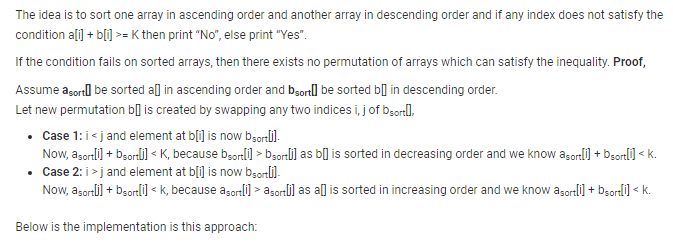

In [101]:
// Check whether any permutation  
// exists which satisfy the condition. 
static boolean isPossible(Integer a[], int b[], 
                                  int n, int k)  
{ 
    // Sort the array a[] in decreasing order. 
    Arrays.sort(a, Collections.reverseOrder()); 
  
    // Sort the array b[] in increasing order. 
    Arrays.sort(b); 
  
    // Checking condition on each index. 
    for (int i = 0; i < n; i++) 
    if (a[i] + b[i] < k) 
        return false; 
  
    return true; 
} 
  
// Driver code 
public static void main(String[] args) { 
    Integer a[] = {2, 1, 3}; 
    int b[] = {7, 8, 9}; 
    int k = 10; 
    int n = a.length; 
  
    if (isPossible(a, b, n, k)) 
    System.out.print("Yes"); 
    else
    System.out.print("No"); 
} 

main(args);

Yes

**------------------------Questions Covered-----------------------------**

***2	Searching & Sorting	https://www.geeksforgeeks.org/find-pair-with-greatest-product-in-array/	Pep_JavaIP_2SnS_76GreatestProductInArray																								
2	Searching & Sorting	https://www.geeksforgeeks.org/minimum-number-swaps-required-sort-array/	Pep_JavaIP_2SnS_77MinimumSwapsToSortArray	breaker																							
3	String	https://www.geeksforgeeks.org/print-words-together-set-characters/	Pep_JavaIP_3Strings_78GroupWordsofSameSetTogether																								
3	String	https://www.geeksforgeeks.org/generate-all-binary-strings-from-given-pattern/	Pep_JavaIP_3Strings_79GenerateAllBinaryStrings																								
3	String	https://www.geeksforgeeks.org/smallest-window-contains-characters-string/	Pep_JavaIP_3Strings_80SmallestWindow																								
3	String	https://www.geeksforgeeks.org/count-ways-increase-lcs-length-two-strings-one/	Pep_JavaIP_3Strings_81IncreaseLCSby1																								
3	String	https://www.geeksforgeeks.org/given-a-sequence-of-words-print-all-anagrams-together/	Pep_JavaIP_3Strings_82PrintAllAnagramsTogether																								
3	String	https://www.geeksforgeeks.org/anagram-substring-search-search-permutations/																									
3	String	https://www.geeksforgeeks.org/check-two-strings-k-anagrams-not/																									
3	String	https://www.geeksforgeeks.org/check-binary-representations-two-numbers-anagram/																									
3	String	https://www.geeksforgeeks.org/longest-palindromic-substring-set-2/																									
3	String	https://www.geeksforgeeks.org/find-the-smallest-window-in-a-string-containing-all-characters-of-another-string/																									
3	String	https://www.codechef.com/FEB18/problems/PERMPAL	hash																								
3	String	https://www.geeksforgeeks.org/make-largest-palindrome-changing-k-digits/	Pep_JavaIP_3Strings_89LargestPalindromeBySwappingKDigits																								
3	String	https://www.geeksforgeeks.org/lexicographically-first-palindromic-string/	Pep_JavaIP_3Strings_90LexicographicFirstPalindrome***

In [1]:
import java.util.*;
import java.io.*;
import java.util.Arrays;
String[] args =new String[0];

## **76. Find pair with greatest product in array**
https://www.geeksforgeeks.org/find-pair-with-greatest-product-in-array/

In [2]:
/*
Given an array of n elements, 
the task is to find the greatest number such that it is product of two elements of given array. 
If no such element exists, print -1. Elements are within the range of 1 to 10^5.
*/

In [3]:
/*
Examples :

Input :  arr[] = {10, 3, 5, 30, 35}
Output:  30
Explanation: 30 is the product of 10 and 3.

Input :  arr[] = {2, 5, 7, 8}
Output:  -1
Explanation: Since, no such element exists.

Input :  arr[] = {10, 2, 4, 30, 35}
Output:  -1

Input :  arr[] = {10, 2, 2, 4, 30, 35}
Output:  4

Input  : arr[] = {17, 2, 1, 35, 30}
Output : 35
*/

In [4]:
/*
A naive approach is to pick an element and then check for each pair product 
if equal to that number and update the max 
if the number is maximum,repeat until whole array gets traversed takes O(n^3) time.
*/

In [5]:
static int findGreatest( int []arr , int n) 
{ 
int result = -1; 
for (int i = 0; i < n ; i++) 
    for (int j = 0; j < n-1; j++) 
        for (int k = j+1 ; k < n ; k++) 
            if (arr[j] * arr[k] == arr[i]) 
                result = Math.max(result, arr[i]); 
return result; 
} 

// Driver code 
static public void main (String[] args) 
{ 
    int []arr = {30, 10, 9, 3, 35}; 
    int n = arr.length; 

    System.out.println(findGreatest(arr, n)); 
} 
main(args)

30


In [6]:
/*
Time Complexity : O(nlogn)

An efficient method follows below implementation:-

1. Create an empty hash table and store all array elements in it.
2. Sort the array in ascending order.
3. Pick elements one by one from end of the array.
4. And check if there exists a pair whose product is equal to that number. 
   In this efficiency can be achieved. 
   The idea is to reach till sqrt of that number. 
   If we don’t get the pair till sqrt that means no such pair exists. 
   We use hash table to make sure that we can find other element of pair in O(1) time.
5. Repeat steps 2 to 3 until we get the element or whole array gets traversed.
*/

In [7]:
// Function to find greatest number 
static int findGreatest(int arr[], int n)  
{ 
    // Store occurrences of all  
    // elements in hash array 
    Map<Integer, Integer> m = new HashMap<>(); 
    for (int i = 0; i < n; i++)  
    { 
        if (m.containsKey(arr[i]))  
        { 
            m.put(arr[i], m.get(arr[i]) + 1); 
        }  
        else 
        { 
            m.put(arr[i], m.get(arr[i])); 
        } 
    } 

    // m[arr[i]]++; 
    // Sort the array and traverse  
    // all elements from end. 
    Arrays.sort(arr); 

    for (int i = n - 1; i > 1; i--)  
    { 
        // For every element, check if there is another 
        // element which divides it. 
        for (int j = 0; j < i &&  
            arr[j] <= Math.sqrt(arr[i]); j++)  
        { 
            if (arr[i] % arr[j] == 0)  
            { 
                int result = arr[i] / arr[j]; 

                // Check if the result value exists in array 
                // or not if yes the return arr[i] 
                if (result != arr[j] &&  
                    m.get(result) == null|| m.get(result) > 0) 
                { 
                    return arr[i]; 
                }  

                // To handle the case like arr[i] = 4 
                // and arr[j] = 2 
                else if (result == arr[j] && m.get(result) > 1)  
                { 
                    return arr[i]; 
                } 
            } 
        } 
    } 
    return -1; 
} 

In [8]:
// Driver code 
public static void main(String[] args)  
{ 
    int arr[] = {17, 2, 1, 15, 30}; 
    int n = arr.length; 
    System.out.println(findGreatest(arr, n)); 
} 
main(args);

30


## **77. Minimum number of swaps required to sort an array**
https://www.geeksforgeeks.org/minimum-number-swaps-required-sort-array/

In [9]:
/*
Given an array of n distinct elements, 
find the minimum number of swaps required to sort the array.

Time Complexity: O(n Log n)
Auxiliary Space: O(n)
*/

In [10]:
/*
Examples:

Input : {4, 3, 2, 1}
Output : 2
Explanation : Swap index 0 with 3 and 1 with 2 to 
              form the sorted array {1, 2, 3, 4}.

Input : {1, 5, 4, 3, 2}
Output : 2
*/

In [11]:
/*
This can be easily done by visualizing the problem as a graph. 
We will have n nodes and an edge directed from node i to node j 
    if the element at i’th index must be present at j’th index in the sorted array.
    
Graph for {4, 3, 2, 1}
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/a-1.png"/>

In [12]:
/*
The graph will now contain many non-intersecting cycles. 
Now a cycle with 2 nodes will only require 1 swap to reach the correct ordering, 
similarly a cycle with 3 nodes will only require 2 swap to do so.

Graph for {4, 5, 2, 1, 5}
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/b-1.png"/>

In [13]:
/*
Hence,

ans = Σi = 1^k(cycle_size – 1)
where k is the number of cycles
*/

In [14]:
import javafx.util.Pair;

// Function returns the minimum number of swaps 
// required to sort the array 
public int minSwaps(int[] arr) 
{ 
    int n = arr.length; 

    // Create two arrays and use as pairs where first 
    // array is element and second array 
    // is position of first element 
    ArrayList <Pair <Integer, Integer> > arrpos = 
              new ArrayList <Pair <Integer, Integer> > (); 
    for (int i = 0; i < n; i++) 
         arrpos.add(new Pair <Integer, Integer> (arr[i], i)); 

    // Sort the array by array element values to 
    // get right position of every element as the 
    // elements of second array. 
    arrpos.sort(new Comparator<Pair<Integer, Integer>>() 
    { 
        @Override
        public int compare(Pair<Integer, Integer> o1, 
                           Pair<Integer, Integer> o2) 
        { 
            if (o1.getKey() > o2.getKey()) 
                return -1; 

            // We can change this to make it then look at the 
            // words alphabetical order 
            else if (o1.getKey().equals(o2.getKey())) 
                return 0; 

            else
                return 1; 
        } 
    }); 

    // To keep track of visited elements. Initialize 
    // all elements as not visited or false. 
    Boolean[] vis = new Boolean[n]; 
    Arrays.fill(vis, false); 

    // Initialize result 
    int ans = 0; 

    // Traverse array elements 
    for (int i = 0; i < n; i++) 
    { 
        // already swapped and corrected or 
        // already present at correct pos 
        if (vis[i] || arrpos.get(i).getValue() == i) 
            continue; 

        // find out the number of  node in 
        // this cycle and add in ans 
        int cycle_size = 0; 
        int j = i; 
        while (!vis[j]) 
        { 
            vis[j] = true; 

            // move to next node 
            j = arrpos.get(j).getValue(); 
            cycle_size++; 
        } 

        // Update answer by adding current cycle. 
        if(cycle_size > 0) 
        { 
            ans += (cycle_size - 1); 
        } 
    } 

    // Return result 
    return ans; 
} 

CompilationException: 

In [15]:
// Driver program to test the above function 
public static void main(String[] args) 
{ 
    int []a = {1, 5, 4, 3, 2}; 
    System.out.println(minSwaps(a)); 
}


**Additional Link**
***https://stackoverflow.com/questions/15152322/compute-the-minimal-number-of-swaps-to-order-a-sequence/15152602#15152602***

## **78. Minimum number of swaps required to sort an array**
https://www.geeksforgeeks.org/print-words-together-set-characters/

In [16]:
/*
Given a list of words with lower cases. 
Implement a function to find all Words that have the same unique character set .
*/

In [17]:
/*
Example:

Input: words[] = { "may", "student", "students", "dog",
                 "studentssess", "god", "cat", "act",
                 "tab", "bat", "flow", "wolf", "lambs",
                 "amy", "yam", "balms", "looped", 
                 "poodle"};
Output : 
looped, poodle, 
lambs, balms, 
flow, wolf, 
tab, bat, 
may, amy, yam, 
student, students, studentssess, 
dog, god, 
cat, act, 

All words with same set of characters are printed 
together in a line.
*/

In [18]:
/*
The idea is to use hashing. 
We generate a key for all words. 
The key contains all unique character (Size of key is at most 26 for lower case alphabets). 
We store indexes of words as values for a key. 
Once we have filled all keys and values in hash table, we can print the result by traversing the table.

Time complexity : O(n*k) where n is number of words in dictionary and k is maximum length of a word.
*/

In [19]:
import java.util.Map.*;

static final int MAX_CHAR = 26; 

// Generates a key from given string. The key 
// contains all unique characters of given string 
// in sorted order consisting of only distinct elements. 
static String getKey(String str) 
{ 
    boolean[] visited = new boolean[MAX_CHAR]; 
    Arrays.fill(visited, false); 

    // store all unique characters of current 
    // word in key 
    for (int j = 0; j < str.length(); j++) 
        visited[str.charAt(j) - 'a'] = true ; 
    String key = ""; 
    for (int j=0; j < MAX_CHAR; j++) 
        if (visited[j]) 
            key = key + (char)('a'+j); 
    return key; 
} 

// Print all words together with same character sets. 
static void wordsWithSameCharSet(String words[], int n) 
{ 
    // Stores indexes of all words that have same 
    // set of unique characters. 
    //unordered_map <string, vector <int> > Hash; 
    HashMap<String, ArrayList<Integer>> Hash = new HashMap<>(); 

    // Traverse all words 
    for (int i=0; i<n; i++) 
    { 
        String key = getKey(words[i]); 

        // if the key is already in the map 
        // then get its corresponding value 
        // and update the list and put it in the map 
        if(Hash.containsKey(key)) 
        { 
            ArrayList<Integer> get_al = Hash.get(key); 
            get_al.add(i); 
            Hash.put(key, get_al); 
        } 

        // if key is not present in the map 
        // then create a new list and add 
        // both key and the list 
        else
        { 
            ArrayList<Integer> new_al = new ArrayList<>(); 
            new_al.add(i); 
            Hash.put(key, new_al); 
        } 
    } 

    // print all words that have the same unique character set 
    for (Entry<String, ArrayList<Integer>> it : Hash.entrySet()) 
    { 
        ArrayList<Integer> get =it.getValue(); 
        for (Integer v:get) 
            System.out.print( words[v] + ", "); 
        System.out.println(); 
    } 
} 

In [20]:
// Driver program to test above function 
public static void main(String args[]) 
{ 
    String words[] = { "may", "student", "students", "dog", 
                 "studentssess", "god", "cat", "act", "tab", 
                 "bat", "flow", "wolf", "lambs", "amy", "yam", 
                 "balms", "looped", "poodle"}; 
    int n = words.length; 
    wordsWithSameCharSet(words, n); 
} 
main(args);

student, students, studentssess, 
tab, bat, 
cat, act, 
lambs, balms, 
may, amy, yam, 
looped, poodle, 
dog, god, 
flow, wolf, 


## **79. Generate all binary strings from given pattern**
https://www.geeksforgeeks.org/generate-all-binary-strings-from-given-pattern/

In [21]:
/*
Given a string containing of ‘0’, ‘1’ and ‘?’ wildcard characters, 
generate all binary strings that can be formed by replacing each wildcard character by ‘0’ or ‘1’.
*/

In [22]:
/*
Example :

Input str = "1??0?101"
Output: 
        10000101
        10001101
        10100101
        10101101
        11000101
        11001101
        11100101
        11101101
*/

In [23]:
/*
Method 1 (Using Recursion)
We pass index of next character to the recursive function. 
If the current character is a wildcard character ‘?’, 
we replace it by ‘0’ or ‘1’ and recurse for remaining characters. 
We print the string if we reaches its end.

Below is recursive the implementation.
*/

In [24]:
// Recursive function to generate all binary 
// strings formed by replacing each wildcard 
// character by 0 or 1  
public static void print(char str[], int index) 
{ 
    if (index == str.length) 
    { 
        System.out.println(str); 
        return; 
    } 

    if (str[index] == '?') 
    { 
        // replace '?' by '0' and recurse 
        str[index] = '0'; 
        print(str, index + 1); 

        // replace '?' by '1' and recurse 
        str[index] = '1'; 
        print(str, index + 1); 

        // NOTE: Need to backtrack as string 
        // is passed by reference to the 
        // function 
        str[index] = '?'; 
    } 
    else
        print(str, index + 1); 
} 

In [25]:
// driver code 
public static void main (String[] args) 
{ 
    String input = "1??0?101"; 
    char[] str = input.toCharArray(); 
    print(str, 0); 
} 
main(args);

10000101
10001101
10100101
10101101
11000101
11001101
11100101
11101101


In [26]:
/*
Method 2 (Using Queue)
We can also achieve this by using iteration. 
The idea is to use queue. 
We find position of first occurrence of wildcard character in the input string and replace it by ‘0’ , then ‘1’ and push both strings into the queue. 
Then we pop next string from the queue, and repeat the process till queue is empty. 
If no wildcard characters are left, we simply print the string.
*/

***https://ideone.com/EsIyEH***

## **80. Smallest window that contains all characters of string itself**
https://www.geeksforgeeks.org/smallest-window-contains-characters-string/

In [27]:
/*
Given a string, find the smallest window length with all distinct characters of the given string. 
For eg. str = “aabcbcdbca”, then the result would be 4 as of the smallest window will be “dbca” 
*/

In [28]:
/*
Examples:

Input  : aabcbcdbca
Output : dbca
Explanation : 
dbca of length 4 is the smallest 
window with highest number of distinct
characters.         

Input : aaab
Output : ab
Explanation : 
ab of length 2 is the smallest window 
with highest number of distinct characters.  
*/

In [29]:
/*
Above problem states that we have to find the smallest window that contains all the distinct characters of the given string 
even if the smallest string contains repeating elements.
*/

In [30]:
/*
For example, in “aabcbcdb”, the smallest string that contains all the characters is “abcbcd”.

This problem reduces to Find the smallest window in a string containing all characters of another string.

In that problem we find the smallest window that contains all the characters of given pattern.

1- Count all distinct characters in given string.

2- Now follow the algorithm discussed in below post.

https://www.geeksforgeeks.org/find-the-smallest-window-in-a-string-containing-all-characters-of-another-string/

We basically maintain a window of characters. 
Whenever the window contains all characters of given string, 
we shrink the window from left side to remove extra characters and then compare its length with smallest window fount so far.
*/

In [31]:
static final int MAX_CHARS = 256; 

// Function to find smallest window containing 
// all distinct characters 
static String findSubString(String str) 
{ 
    int n = str.length(); 

    // Count all distinct characters. 
    int dist_count = 0; 

    boolean[] visited = new boolean[MAX_CHARS]; 
    Arrays.fill(visited, false); 
    for (int i=0; i<n; i++) 
    { 
        if (visited[str.charAt(i)] == false) 
        { 
            visited[str.charAt(i)] = true; 
            dist_count++; 
        } 
    } 

    // Now follow the algorithm discussed in below 
    // post. We basically maintain a window of characters 
    // that contains all characters of given string. 
    // https://www.geeksforgeeks.org/find-the-smallest-window-in-a-string-containing-all-characters-of-another-string/  
    int start = 0, start_index = -1; 
    int min_len = Integer.MAX_VALUE; 

    int count = 0; 
    int[] curr_count =  new int[MAX_CHARS]; 
    for (int j=0; j<n; j++) 
    { 
        // Count occurrence of characters of string 
        curr_count[str.charAt(j)]++; 

        // If any distinct character matched, 
        // then increment count 
        if (curr_count[str.charAt(j)] == 1 ) 
            count++; 

        // if all the characters are matched 
        if (count == dist_count) 
        { 
            // Try to minimize the window i.e., check if 
            // any character is occurring more no. of times 
            // than its occurrence in pattern, if yes 
            // then remove it from starting and also remove 
            // the useless characters. 
            while (curr_count[str.charAt(start)] > 1) 
            { 
                if (curr_count[str.charAt(start)] > 1) 
                    curr_count[str.charAt(start)]--; 
                start++; 
            } 

            // Update window size 
            int len_window = j - start + 1; 
            if (min_len > len_window) 
            { 
                min_len = len_window; 
                start_index = start; 
            } 
        } 
    } 
    // Return substring starting from start_index 
    // and length min_len 
    return str.substring(start_index, start_index+min_len); 
} 

In [32]:
// Driver code 
public static void main(String args[]) 
{ 
    String str = "aabcbcdbca"; 
    System.out.println("Smallest window containing all distinct"
           + " characters is " + findSubString(str)); 
} 
main(args);

Smallest window containing all distinct characters is dbca


## **81. Count ways to increase LCS length of two strings by one**
https://www.geeksforgeeks.org/count-ways-increase-lcs-length-two-strings-one/

In [33]:
/*
Given two strings of lower alphabet characters, 
we need to find the number of ways to insert a character in the first string 
such that length of LCS of both strings increases by one.
*/

In [34]:
/*
Examples:

Input : str1 = “abab”, str2 = “abc”
Output : 3
LCS length of given two strings is 2.
There are 3 ways of insertion in str1, 
to increase the LCS length by one which 
are enumerated below, 
str1 = “abcab”    str2 = “abc”  LCS length = 3
str1 = “abacb”    str2 = “abc”  LCS length = 3
str1 = “ababc”    str2 = “abc”  LCS length = 3

Input : str1 = “abcabc”, str2 = “abcd”
Output : 4
*/

In [35]:
/*
The idea is try all 26 possible characters at each position of first string, 
if length of str1 is m then a new character can be inserted in (m + 1) positions, 
now suppose at any time character c is inserted at ith position in str1 
then we will match it with all positions having character c in str2. 
Suppose one such position is j, then for total LCS length to be one more than previous, 
below condition should satisfy,

Time Complexity : O(mn)
Auxiliary Space : O(mn)
*/

In [36]:
/*
LCS(str1[1, m], str2[1, n]) = LCS(str1[1, i],  str2[1, j-1]) + 
                              LCS(str1[i+1, m], str2[j+1, n])  
*/

In [37]:
/*
Above equation states that sum of LCS of the suffix and prefix substrings at inserted character must be same as total LCS of strings, 
so that when the same character is inserted in first string it will increase the length of LCS by one.

In below code two 2D arrays, lcsl and lcsr are used for storing LCS of prefix and suffix of strings respectively. 
Method for filling these 2D arrays can be found here.
*/

In [38]:
static int M = 26; 

// Method returns total ways to increase  
// LCS length by 1 
static int waysToIncreaseLCSBy1(String str1, 
                                String str2)  
{ 
    int m = str1.length(), n = str2.length(); 

    // Fill positions of each character in vector 
    Vector<Integer>[] position = new Vector[M]; 
    for (int i = 0; i < M; i++) 
        position[i] = new Vector<>(); 

    for (int i = 1; i <= n; i++) 
        position[str2.charAt(i - 1) - 'a'].add(i); 

    int[][] lcsl = new int[m + 2][n + 2]; 
    int[][] lcsr = new int[m + 2][n + 2]; 

    // Initializing 2D array by 0 values 
    for (int i = 0; i <= m + 1; i++) 
        for (int j = 0; j <= n + 1; j++) 
            lcsl[i][j] = lcsr[i][j] = 0; 

    // Filling LCS array for prefix substrings 
    for (int i = 1; i <= m; i++)  
    { 
        for (int j = 1; j <= n; j++) 
        { 
            if (str1.charAt(i - 1) == str2.charAt(j - 1)) 
                lcsl[i][j] = 1 + lcsl[i - 1][j - 1]; 
            else
                lcsl[i][j] = Math.max(lcsl[i - 1][j],  
                                      lcsl[i][j - 1]); 
        } 
    } 

    // Filling LCS array for suffix substrings 
    for (int i = m; i >= 1; i--)  
    { 
        for (int j = n; j >= 1; j--)  
        { 
            if (str1.charAt(i - 1) == str2.charAt(j - 1)) 
                lcsr[i][j] = 1 + lcsr[i + 1][j + 1]; 
            else
                lcsr[i][j] = Math.max(lcsr[i + 1][j], 
                                      lcsr[i][j + 1]); 
        } 
    } 

    // Looping for all possible insertion positions 
    // in first string 
    int ways = 0; 
    for (int i = 0; i <= m; i++)  
    { 

        // Trying all possible lower case characters 
        for (char d = 0; d < 26; d++)  
        { 

            // Now for each character, loop over same 
            // character positions in second string 
            for (int j = 0; j < position[d].size(); j++) 
            { 
                int p = position[d].elementAt(j); 

                // If both, left and right substrings make 
                // total LCS then increase result by 1 
                if (lcsl[i][p - 1] + 
                    lcsr[i + 1][p + 1] == lcsl[m][n]) 
                    ways++; 
            } 
        } 
    } 
    return ways; 
} 

In [39]:
// Driver Code 
public static void main(String[] args)  
{ 
    String str1 = "abcabc"; 
    String str2 = "abcd"; 
    System.out.println(waysToIncreaseLCSBy1(str1, str2)); 
} 
main(args);

4


## **82. Given a sequence of words, print all anagrams together | Set 1**
https://www.geeksforgeeks.org/given-a-sequence-of-words-print-all-anagrams-together/

**Related Link:** 

***Given a sequence of words, print all anagrams together | Set 2 https://www.geeksforgeeks.org/given-a-sequence-of-words-print-all-anagrams-together-set-2/***

In [40]:
/*
A simple method is to create a Hash Table. 
Calculate the hash value of each word in such a way that all anagrams have the same hash value. 
Populate the Hash Table with these hash values. 
Finally, print those words together with same hash values. 
A simple hashing mechanism can be modulo sum of all characters. 
With modulo sum, two non-anagram words may have same hash value. 
This can be handled by matching individual characters.
*/

In [41]:
/*
Following is another method to print all anagrams together. 
Take two auxiliary arrays, 
    index array and word array. 
Populate the word array with the given sequence of words. 
Sort each individual word of the word array. 

Finally, sort the word array and keep track of the corresponding indices. 
After sorting, all the anagrams cluster together. 

Use the index array to print the strings from the original array of strings.
*/

In [42]:
/*
Let us understand the steps with following input Sequence of Words:

"cat", "dog", "tac", "god", "act"
1) Create two auxiliary arrays index[] and words[]. 
   Copy all given words to words[] and store the original indexes in index[]

index[]:  0   1   2   3   4
words[]: cat dog tac god act
2) Sort individual words in words[]. Index array doesn’t change.

index[]:   0    1    2    3    4
words[]:  act  dgo  act  dgo  act
3) Sort the words array. Compare individual words using strcmp() to sort

index:     0    2    4    1    3
words[]:  act  act  act  dgo  dgo
4) All anagrams come together. But words are changed in words array. 
   To print the original words, take index from the index array and use it in the original array. We get

"cat tac act dog god"

Following are the implementations of the above algorithm. 
In the following program, an array of structure “Word” is used to store both index and word arrays. 
DupArray is another structure that stores array of structure “Word”.
*/

In [43]:
// class for each word of duplicate array 
static class Word { 
    String str; // to store word itself 
    int index; // index of the word in the 
    // original array 

    // constructor 
    Word(String str, int index) 
    { 
        this.str = str; 
        this.index = index; 
    } 
} 

// class to represent duplicate array. 
static class DupArray { 
    Word[] array; // Array of words 
    int size; // Size of array 

    // constructor 
    public DupArray(String str[], int size) 
    { 
        this.size = size; 
        array = new Word[size]; 

        // One by one copy words from the 
        // given wordArray to dupArray 
        int i; 
        for (i = 0; i < size; ++i) { 
            // create a word Object with the 
            // str[i] as str and index as i 
            array[i] = new Word(str[i], i); 
        } 
    } 
} 

// Compare two words. Used in Arrays.sort() for 
// sorting an array of words 
static class compStr implements Comparator<Word> { 
    public int compare(Word a, Word b) 
    { 
        return a.str.compareTo(b.str); 
    } 
} 

// Given a list of words in wordArr[], 
static void printAnagramsTogether(String wordArr[], 
                                  int size) 
{ 
    // Step 1: Create a copy of all words present 
    // in given wordArr. The copy will also have 
    // original indexes of words 
    DupArray dupArray = new DupArray(wordArr, size); 

    // Step 2: Iterate through all words in 
    // dupArray and sort individual words. 
    int i; 
    for (i = 0; i < size; ++i) { 
        char[] char_arr = dupArray.array[i].str.toCharArray(); 
        Arrays.sort(char_arr); 
        dupArray.array[i].str = new String(char_arr); 
    } 

    // Step 3: Now sort the array of words in 
    // dupArray 
    Arrays.sort(dupArray.array, new compStr()); 

    // Step 4: Now all words in dupArray are together, 
    // but these words are changed. Use the index 
    // member of word struct to get the corresponding 
    // original word 
    for (i = 0; i < size; ++i) 
        System.out.print(wordArr[dupArray.array[i].index] + " "); 
} 

// Driver program to test above functions 
public static void main(String args[]) 
{ 
    String wordArr[] = { "cat", "dog", "tac", "god", "act" }; 
    int size = wordArr.length; 
    printAnagramsTogether(wordArr, size); 
} 
main(args);

cat tac act dog god 

In [44]:
/*
Time Complexity: Let there be N words and each word has maximum M characters. 
The upper bound is O(NMLogM + MNLogN).

Step 2 takes O(NMLogM) time. 

Sorting a word takes maximum O(MLogM) time. So sorting N words takes O(NMLogM) time. 
step 3 takes O(MNLogN) Sorting array of words takes NLogN comparisons. 

A comparison may take maximum O(M) time. 

So time to sort array of words will be O(MNLogN).
*/

In [45]:
/*
Using hashmap

Here, 
we first sort each word, use sorted word as key and then put original word in a map. 
The value of the map will be a list containing all the words which have same word after sorting.
Lastly, 
we will print all values from the hashmap where size of values will be greater than 1.
*/

In [46]:
private static void printAnagrams(String arr[]) 
{ 
    HashMap<String, List<String> > map = new HashMap<>(); 

    // loop over all words 
    for (int i = 0; i < arr.length; i++) { 

        // convert to char array, sort and 
        // then re-convert to string 
        String word = arr[i]; 
        char[] letters = word.toCharArray(); 
        Arrays.sort(letters); 
        String newWord = new String(letters); 

        // calculate hashcode of string 
        // after sorting 
        if (map.containsKey(newWord)) { 

            map.get(newWord).add(word); 
        } 
        else { 

            // This is the first time we are 
            // adding a word for a specific 
            // hashcode 
            List<String> words = new ArrayList<>(); 
            words.add(word); 
            map.put(newWord, words); 
        } 
    } 

    // print all the values where size is > 1 
    // If you want to print non-anagrams, 
    // just print the values having size = 1 
    for (String s : map.keySet()) { 
        List<String> values = map.get(s); 
        if (values.size() > 1) { 
            System.out.print(values); 
        } 
    } 
} 

public static void main(String[] args) 
{ 

    // Driver program 
    String arr[] = { "cat", "dog", "tac", "god", "act" }; 
    printAnagrams(arr); 
} 
main(args);

[cat, tac, act][dog, god]

In [47]:
/*
HashMap with O(NM) Solution

In the previous approach, 
    we were sorting every string in order to maintain a similar key, 
    but that cost extra time in this approach will take the advantage of another hashmap to maintain the frequency of the characters
    which will generate the same hash function for different string having same frequency of characters.

Here, we will take HashMap<HashMap, ArrayList>, the inner hashmap will count the frequency of the characters of each string 
    and the outer HashMap will check whether that hashmap is present or not 
    if present then it will add that string to the corresponding list.
    
Time Complexity: Let there be N words and each word has maximum M characters. The upper bound is O(NM).
Space Complexity: Let there be N words and each word has maximum M characters. The upper bound is O(N+M).
*/

In [48]:
private static ArrayList<ArrayList<String> > 
solver( 
    ArrayList<String> list) 
{ 

    // Inner hashmap counts frequency 
    // of characters in a string. 
    // Outer hashmap for if same 
    // frequency characters are present in 
    // in a string then it will add it to 
    // the arraylist. 
    HashMap<HashMap<Character, Integer>, 
            ArrayList<String> > 
        map = new HashMap<HashMap<Character, Integer>, 
                          ArrayList<String> >(); 
    for (String str : list) { 
        HashMap<Character, Integer> 
            tempMap = new HashMap<Character, Integer>(); 

        // Counting the frequency of the 
        // characters present in a string 
        for (int i = 0; i < str.length(); i++) { 
            if (tempMap.containsKey(str.charAt(i))) { 
                int x = tempMap.get(str.charAt(i)); 
                tempMap.put(str.charAt(i), ++x); 
            } 
            else { 
                tempMap.put(str.charAt(i), 1); 
            } 
        } 

        // If the same frequency of chanracters 
        // are alraedy present then add that 
        // string into that arraylist otherwise 
        // created a new arraylist and add that string 
        if (map.containsKey(tempMap)) 
            map.get(tempMap).add(str); 
        else { 
            ArrayList<String> 
                tempList = new ArrayList<String>(); 
            tempList.add(str); 
            map.put(tempMap, tempList); 
        } 
    } 

    // Stores the result in a arraylist 
    ArrayList<ArrayList<String> > 
        result = new ArrayList<>(); 
    for (HashMap<Character, Integer> 
             temp : map.keySet()) 
        result.add(map.get(temp)); 
    return result; 
} 

// Drivers Method 
public static void main(String[] args) 
{ 
    ArrayList<String> list = new ArrayList<>(); 
    list.add("cat"); 
    list.add("dog"); 
    list.add("ogd"); 
    list.add("god"); 
    list.add("atc"); 

    System.out.println(solver(list)); 
} 
main(args);

[[cat, atc], [dog, ogd, god]]


## **83. Anagram Substring Search (Or Search for all permutations)**
https://www.geeksforgeeks.org/anagram-substring-search-search-permutations/

In [49]:
/*
Given a text txt[0..n-1] and a pattern pat[0..m-1], 
write a function search(char pat[], char txt[]) that prints all occurrences of pat[] and its permutations (or anagrams) in txt[]. 
You may assume that n > m.
Expected time complexity is O(n)
*/

In [50]:
/*
Examples:

1) Input:  txt[] = "BACDGABCDA"  pat[] = "ABCD"
   Output:   Found at Index 0
             Found at Index 5
             Found at Index 6
2) Input: txt[] =  "AAABABAA" pat[] = "AABA"
   Output:   Found at Index 0
             Found at Index 1
             Found at Index 4
*/

In [51]:
/*
This problem is slightly different from standard pattern searching problem, here we need to search for anagrams as well. 
Therefore, we cannot directly apply standard pattern searching algorithms like KMP, Rabin Karp, Boyer Moore, etc.

A simple idea is to modify Rabin Karp Algorithm. 
For example we can keep the hash value as sum of ASCII values of all characters under modulo of a big prime number. 
For every character of text, we can add the current character to hash value and subtract the first character of previous window. 
This solution looks good, but like standard Rabin Karp, the worst case time complexity of this solution is O(mn). 
The worst case occurs when all hash values match and we one by one match all characters.

We can achieve O(n) time complexity under the assumption that alphabet size is fixed which is typically true as we have maximum 256 possible characters in ASCII. 

The idea is to use two count arrays:

1) The first count array store frequencies of characters in pattern.
2) The second count array stores frequencies of characters in current window of text.

The important thing to note is, time complexity to compare two count arrays is O(1) 
as the number of elements in them are fixed (independent of pattern and text sizes). 

Following are steps of this algorithm.
    1) Store counts of frequencies of pattern in first count array countP[]. 
       Also store counts of frequencies of characters in first window of text in array countTW[].

    2) Now run a loop from i = M to N-1. Do following in loop.
        …..a) If the two count arrays are identical, we found an occurrence.
        …..b) Increment count of current character of text in countTW[]
        …..c) Decrement count of first character in previous window in countWT[]

    3) The last window is not checked by above loop, so explicitly check it.

Following is the implementation of above algorithm.
*/

In [52]:
static final int MAX = 256; 

// This function returns true if contents 
// of arr1[] and arr2[] are same, otherwise 
// false. 
static boolean compare(char arr1[], char arr2[]) 
{ 
    for (int i = 0; i < MAX; i++) 
        if (arr1[i] != arr2[i]) 
            return false; 
    return true; 
} 

// This function search for all permutations 
// of pat[] in txt[] 
static void search(String pat, String txt) 
{ 
    int M = pat.length(); 
    int N = txt.length(); 

    // countP[]:  Store count of all  
    // characters of pattern 
    // countTW[]: Store count of current 
    // window of text 
    char[] countP = new char[MAX]; 
    char[] countTW = new char[MAX]; 
    for (int i = 0; i < M; i++) 
    { 
        (countP[pat.charAt(i)])++; 
        (countTW[txt.charAt(i)])++; 
    } 

    // Traverse through remaining characters 
    // of pattern 
    for (int i = M; i < N; i++) 
    { 
        // Compare counts of current window 
        // of text with counts of pattern[] 
        if (compare(countP, countTW)) 
            System.out.println("Found at Index " + 
                                      (i - M)); 

        // Add current character to current  
        // window 
        (countTW[txt.charAt(i)])++; 

        // Remove the first character of previous 
        // window 
        countTW[txt.charAt(i-M)]--; 
    } 

    // Check for the last window in text 
    if (compare(countP, countTW)) 
        System.out.println("Found at Index " +  
                                   (N - M)); 
} 

In [53]:
/* Driver program to test above function */
public static void main(String args[]) 
{ 
    String txt = "BACDGABCDA"; 
    String pat = "ABCD"; 
    search(pat, txt); 
} 
main(args);

Found at Index 0
Found at Index 5
Found at Index 6


***https://youtu.be/-rcfE1Tj2E0***

## **84. Check if two strings are k-anagrams or not**
https://www.geeksforgeeks.org/check-two-strings-k-anagrams-not/

In [54]:
/*
Given two strings of lowercase alphabets and a value k, 
the task is to find if two strings are K-anagrams of each other or not.

Two strings are called k-anagrams if following two conditions are true.

1. Both have same number of characters.
2. Two strings can become anagram by changing at most k characters in a string.
*/

In [55]:
/*
Examples :

Input:  str1 = "anagram" , str2 = "grammar" , k = 3
Output:  Yes
Explanation: We can update maximum 3 values and 
it can be done in changing only 'r' to 'n' 
and 'm' to 'a' in str2.

Input:  str1 = "geeks", str2 = "eggkf", k = 1
Output:  No
Explanation: We can update or modify only 1 
value but there is a need of modifying 2 characters. 
i.e. g and f in str 2.
*/

In [56]:
/*
Below is a solution to check if two strings are k-anagrams of each other or not.

1. Stores occurrence of all characters of both strings in separate count arrays.
2. Count number of different characters in both strings (in this if a strings has 4 a and second has 3 ‘a’ then it will be also count.
3. If count of different characters is less than or equal to k, then return true else false.
*/

In [57]:
static final int MAX_CHAR = 26; 

// Function to check that string is k-anagram or not 
static boolean arekAnagrams(String str1, String str2,  
                                             int k) 
{ 
    // If both strings are not of equal 
    // length then return false 
    int n = str1.length(); 
    if (str2.length() != n) 
        return false; 

    int[] count1 = new int[MAX_CHAR]; 
    int[] count2 = new int[MAX_CHAR]; 
    int count = 0; 

    // Store the occurrence of all characters 
    // in a hash_array 
    for (int i = 0; i < n; i++) 
        count1[str1.charAt(i) - 'a']++; 
    for (int i = 0; i < n; i++) 
        count2[str2.charAt(i) - 'a']++; 

    // Count number of characters that are 
    // different in both strings 
    for (int i = 0; i < MAX_CHAR; i++) 
        if (count1[i] > count2[i]) 
            count = count + Math.abs(count1[i] -  
                                      count2[i]); 

    // Return true if count is less than or 
    // equal to k 
    return (count <= k); 
} 

In [58]:
// Driver code 
public static void main(String args[]) 
{ 
    String str1 = "anagram"; 
    String str2 = "grammar"; 
    int k = 2; 
    if (arekAnagrams(str1, str2, k)) 
        System.out.println("Yes"); 
    else
        System.out.println("No"); 
} 
main(args);

Yes


In [59]:
/*
We can optimize above solution. 

Here we use only one count array to store counts of characters in str1. 
We traverse str2 and decrement occurrence of every character in count array that is present in str2. 
If we find a character that is not there in str1, 
    we increment count of different characters. 
If count of different character become more than k, 
    we return false.
*/

In [60]:
static final int MAX_CHAR = 26; 

// Function to check if str1 and str2 are k-anagram 
// or not 
static boolean areKAnagrams(String str1, String str2,  
                                              int k) 
{ 
    // If both strings are not of equal 
    // length then return false 
    int n = str1.length(); 
    if (str2.length() != n) 
        return false; 

    int[] hash_str1 = new int[MAX_CHAR]; 

    // Store the occurrence of all characters 
    // in a hash_array 
    for (int i = 0; i < n ; i++) 
        hash_str1[str1.charAt(i)-'a']++; 

    // Store the occurrence of all characters 
    // in a hash_array 
    int count = 0; 
    for (int i = 0; i < n ; i++) 
    { 
        if (hash_str1[str2.charAt(i)-'a'] > 0) 
            hash_str1[str2.charAt(i)-'a']--; 
        else
            count++; 

        if (count > k) 
            return false; 
    } 

    // Return true if count is less than or 
    // equal to k 
    return true; 
} 

In [61]:
// Driver code 
public static void main(String args[]) 
{ 
    String str1 = "fodr"; 
    String str2 = "gork"; 
    int k = 2; 
    if (areKAnagrams(str1, str2, k) == true) 
        System.out.println("Yes"); 
    else
        System.out.println("No"); 
} 
main(args);

Yes


## **85. Check if binary representations of two numbers are anagram**
https://www.geeksforgeeks.org/check-binary-representations-two-numbers-anagram/

In [62]:
/*
Given two numbers you are required to check whether they are anagrams of each other or not in binary representation.
*/

In [63]:
/*
Examples:

Input : a = 8, b = 4 
Output : Yes
Binary representations of both
numbers have same 0s and 1s.

Input : a = 4, b = 5
Output : No
*/

In [64]:
/*
Simple Approach:

Find Binary Representation of ‘a’ and ‘b’ using simple decimal to binary representation technique.
Check if two binary representations are anagram

Time Complexity : O (n log n)
Auxiliary Space : O (1) Although Auxiliary Space is O(1) still SIZE array spaces are getting used to store binary representation of each number.
*/

In [65]:
public static int SIZE = 8; 

// Function to check if binary representation 
// of two numbers are anagram 
static int bit_anagram_check(long a, long b) 
{ 
    // Find reverse binary representation of a 
    // and store it in binary_a[] 
    int i = 0; 
    long[] binary_a = new long[SIZE]; 
    Arrays.fill(binary_a, 0); 
    while (a > 0)  
    { 
        binary_a[i] = a%2; 
        a /= 2; 
        i++; 
    } 

    // Find reverse binary representation of b 
    // and store it in binary_a[] 
    int j = 0; 
    long[] binary_b = new long[SIZE]; 
    Arrays.fill(binary_b, 0); 
    while (b > 0)  
    { 
        binary_b[j] = b%2; 
        b /= 2; 
        j++; 
    } 

    // Sort two binary representations 
    Arrays.sort(binary_a); 
    Arrays.sort(binary_b); 

    // Compare two sorted binary representations 
    for (i = 0; i < SIZE; i++) 
        if (binary_a[i] != binary_b[i])  
            return 0; 

    return 1; 
} 

// driver program 
public static void main (String[] args)  
{ 
    long a = 8, b = 4; 
    System.out.println(bit_anagram_check(a, b)); 
} 
main(args);

1


In [66]:
/*
Efficient Approach:
Just measure the number of 1’s present in the bit representation of both the numbers, 
if number of 1’s present in their bit representation are same then they are anagrams in their bit representation 
else they are not.

Time Complexity : O (1)
Auxiliary Space : O (1) No extra space is getting used.
*/

In [67]:
// Function returns true if binary representations of 
// a and b are anagram 
static boolean bit_anagram_check(long a, long b) 
{ 
    // Long.bitCount(a) gives number of 1's present 
    // in binary representation of a 
    return (Long.bitCount(a) == Long.bitCount(b)); 
} 

// driver program 
public static void main (String[] args)  
{ 
    long a = 8, b = 4; 
    if(bit_anagram_check(a, b)) 
        System.out.println("1"); 
    else
        System.out.println("0"); 
} 
main(args);

1


**Related Link** ***https://www.geeksforgeeks.org/count-set-bits-in-an-integer/***

## **86. Longest Palindromic Substring | Set 2**
https://www.geeksforgeeks.org/longest-palindromic-substring-set-2/

In [68]:
/*
Given a string, find the longest substring which is palindrome. 
For example, 
    if the given string is “forgeeksskeegfor”, 
    the output should be “geeksskeeg”.
*/

***https://www.geeksforgeeks.org/longest-palindrome-substring-set-1/***

In [69]:
/*
Dynamic programming solution in the Above Link. 
The time complexity of the Dynamic Programming based solution is O(n^2) and it requires O(n^2) extra space. 

We can find the longest palindrome substring in (n^2) time with O(1) extra space. 
The idea is to generate all even length and odd length palindromes and keep track of the longest palindrome seen so far.

Time complexity: O ( n^2 ) where n is the length of input string.
Auxiliary Space: O ( 1 )
*/

In [70]:
/*
Step to generate odd length palindrome:
    Fix a centre and expand in both directions for longer palindromes.

Step to generate even length palindrome
    Fix two centre ( low and high ) and expand in both directions for longer palindromes.
*/

In [71]:
// A utility function to print a substring str[low..high] 
static void printSubStr(String str, int low, int high) { 
    System.out.println(str.substring(low, high + 1)); 
} 

// This function prints the longest palindrome substring  
// (LPS) of str[]. It also returns the length of the   
// longest palindrome  
static int longestPalSubstr(String str) { 
    int maxLength = 1; // The result (length of LPS) 

    int start = 0; 
    int len = str.length(); 

    int low, high; 

    // One by one consider every character as center 
    // point of even and length palindromes 
    for (int i = 1; i < len; ++i)  
    { 
        // Find the longest even length palindrome with  
        // center points as i-1 and i. 
        low = i - 1; 
        high = i; 
        while (low >= 0 && high < len 
                && str.charAt(low) == str.charAt(high)) { 
            if (high - low + 1 > maxLength) { 
                start = low; 
                maxLength = high - low + 1; 
            } 
            --low; 
            ++high; 
        } 

        // Find the longest odd length palindrome with  
        // center point as i 
        low = i - 1; 
        high = i + 1; 
        while (low >= 0 && high < len 
                && str.charAt(low) == str.charAt(high)) { 
            if (high - low + 1 > maxLength) { 
                start = low; 
                maxLength = high - low + 1; 
            } 
            --low; 
            ++high; 
        } 
    } 

    System.out.print("Longest palindrome substring is: "); 
    printSubStr(str, start, start + maxLength - 1); 

    return maxLength; 
} 

// Driver program to test above function 
public static void main(String[] args) { 

    String str = "forgeeksskeegfor"; 
    System.out.println("Length is: " +  
                       longestPalSubstr(str)); 
}
main(args);

Longest palindrome substring is: geeksskeeg
Length is: 10


## **87. Find the smallest window in a string containing all characters of another string**
https://www.geeksforgeeks.org/find-the-smallest-window-in-a-string-containing-all-characters-of-another-string/

In [72]:
/*
Given two strings string1 and string2, 
the task is to find the smallest substring in string1 containing all characters of string2 efficiently.
*/

In [73]:
/*
Examples:

Input: string = “this is a test string”, pattern = “tist”
Output: Minimum window is “t stri”
Explanation: “t stri” contains all the characters of pattern.

Input: string = “geeksforgeeks”, pattern = “ork”
Output: Minimum window is “ksfor”
*/

In [74]:
/*
Method 1 ( Brute force solution )
    1- Generate all substrings of string1 (“this is a test string”)
    2- For each substring, check whether the substring contains all characters of string2 (“tist”)
    3- Finally, print the smallest substring containing all characters of string2.
*/

In [75]:
/*
Method 2 ( Efficient Solution )

    1. First check if the length of string is less than the length of the given pattern, 
       if yes then “no such window can exist “.
    2. Store the occurrence of characters of the given pattern in a hash_pat[].
    3. Start matching the characters of pattern with the characters of string 
       i.e. increment count if a character matches.
    4. Check if (count == length of pattern ) this means a window is found.
    5. If such window found, 
       try to minimize it by removing extra characters from the beginning of the current window.
    6. Update min_length.
    7. Print the minimum length window.
*/

**Diagram to explain the above algorithm:**

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/smallest-window.png"/>

In [76]:
static final int no_of_chars = 256; 

// Function to find smallest window containing 
// all characters of 'pat' 
static String findSubString(String str, String pat) 
{ 
    int len1 = str.length(); 
    int len2 = pat.length(); 

    // check if string's length is less than pattern's 
    // length. If yes then no such window can exist 
    if (len1 < len2) 
    { 
        System.out.println("No such window exists"); 
        return ""; 
    } 

    int hash_pat[] = new int[no_of_chars]; 
    int hash_str[] = new int[no_of_chars]; 

    // store occurrence ofs characters of pattern 
    for (int i = 0; i < len2; i++) 
        hash_pat[pat.charAt(i)]++; 

    int start = 0, start_index = -1, min_len = Integer.MAX_VALUE; 

    // start traversing the string 
    int count = 0; // count of characters 
    for (int j = 0; j < len1 ; j++) 
    { 
        // count occurrence of characters of string 
        hash_str[str.charAt(j)]++; 

        // If string's char matches with pattern's char 
        // then increment count 
        if (hash_pat[str.charAt(j)] != 0 && 
            hash_str[str.charAt(j)] <= hash_pat[str.charAt(j)] ) 
            count++; 

        // if all the characters are matched 
        if (count == len2) 
        { 
            // Try to minimize the window i.e., check if 
            // any character is occurring more no. of times 
            // than its occurrence in pattern, if yes 
            // then remove it from starting and also remove 
            // the useless characters. 
            while ( hash_str[str.charAt(start)] > hash_pat[str.charAt(start)] 
                || hash_pat[str.charAt(start)] == 0) 
            { 

                if (hash_str[str.charAt(start)] > hash_pat[str.charAt(start)]) 
                    hash_str[str.charAt(start)]--; 
                start++; 
            } 

            // update window size 
            int len_window = j - start + 1; 
            if (min_len > len_window) 
            { 
                min_len = len_window; 
                start_index = start; 
            } 
        } 
    } 

    // If no window found 
    if (start_index == -1) 
    { 
    System.out.println("No such window exists"); 
    return ""; 
    } 

    // Return substring starting from start_index 
    // and length min_len 
    return str.substring(start_index, start_index + min_len); 
} 

In [77]:
// Driver Method 
public static void main(String[] args) 
{ 
    String str = "this is a test string"; 
    String pat = "tist"; 

    System.out.print("Smallest window is :\n " + 
                    findSubString(str, pat)); 
}
main(args);

Smallest window is :
 t stri

## **88. Permutation and Palindrome**
https://www.codechef.com/FEB18/problems/PERMPAL

In [78]:
/*
You are given a string s with length n. 
You should find a permutation P of numbers 1 through n such that if you apply this permutation on the string s, 
you will get a palindromic string.

The result of applying a permutation P on the string s is a string t with length n 
such that for each i (1 ≤ i ≤ n), the i-th character of t is given as as t[i] = s[Pi].
*/

In [79]:
/*
Example
Input

4
aa
baa
abc
abab

Output

1 2
2 1 3
-1
1 2 4 3
*/

In [80]:
/*
Explanation
Example case 1: The string t obtained using the identity permutation will have t[1] = s[1] and t[2] = s[2]. 
                That means t = "aa", which is a palindrome.

Example case 2: The characters of the string t obtained by applying the permutation 2, 1, 3 are t[1] = s[2], t[2] = s[1] and t[3] = s[3]. 
                Therefore, t = "aba", which is a palindrome.

Example case 3: There is no way to find a permutation P such that we can obtain a palindrome from s using it.

Example case 4: Applying the permutation 1, 2, 4, 3 on s results in t = "abba", which is a palindrome. 
                Another permutation that you may apply is 2, 1, 3, 4; this results in t = "baab", which is also a palindrome.
*/

In [81]:
public static void main (String[] args) throws java.lang.Exception
{
    int t = 4;
    String[] str = new String[t];
    str[0] = "aa";
    str[1] = "baa";
    str[2] = "abc";
    str[3] = "abab";
    int xx = 0;
    while(t>0)
    {
        char c[] = str[xx++].toCharArray();
        int i=0;
        int a[] = new int[26];
        Map<Character,ArrayList<Integer>> map = new HashMap<>();
        for(i=0;i<c.length;i++)
        {
            a[c[i]-'a']++;
            if(map.get(c[i])==null)
            {
                ArrayList<Integer> al = new ArrayList<>();
                al.add(i+1);
                map.put(c[i], al);
            }
            else
            {
                ArrayList<Integer> al = map.get(c[i]);
                al.add(i+1);
                map.put(c[i], al);
            }

        }
//			System.out.println(Arrays.toString(a));
        int oddcount = 0;
        char oddchar = 0;
        for(i=0;i<26;i++)
        {
            if(a[i]%2==1)
            {
                oddcount++;
                oddchar = (char)(i+'a');
            }
        }
        if (oddcount > 1 || oddcount == 1 &&  c.length % 2 == 0)
        {
            System.out.println("-1");
        }
        else
        {
            StringBuilder first = new StringBuilder();
            StringBuilder second = new StringBuilder();
            for(i=0;i<26;i++)
            {
                if(a[i]>0)
                {
                    char[] array = new char[a[i]/2];
                    Arrays.fill(array, (char)(i+'a'));
                    StringBuilder sb = new StringBuilder(new String(array));
                    first = first.append(sb);
                    second = sb.append(second);
                }

            }
            String pal = "";
            if(oddcount==1)
            {
                 pal = first.toString()+oddchar+second.toString();
            }
            else
            {
                 pal = first.toString()+second.toString();
            }
            int[] counter = new int[26];
            for(char cc: pal.toCharArray())
            {
                System.out.print(map.get(cc).get(counter[cc-'a'])+" ");
                counter[cc-'a']++;
            }
//				System.out.println(Arrays.toString(counter));
                System.out.println();
        }
        t--;
    }
}
main(args);

1 2 
2 1 3 
-1
1 2 4 3 


## **89. Make largest palindrome by changing at most K-digits**
https://www.geeksforgeeks.org/make-largest-palindrome-changing-k-digits/

In [82]:
/*
Given a string containing all digits, 
we need to convert this string to a palindrome by changing at most K digits. 
If many solutions are possible then print lexicographically largest one.
*/

In [83]:
/*
Examples:

Input   : str = “43435”    
          k = 3
Output  : "93939" 
Lexicographically largest palindrome 
after 3 changes is "93939" 

Input :  str = “43435”    
         k = 1
Output : “53435”
Lexicographically largest palindrome 
after 3 changes is “53435”

Input  : str = “12345”    
         k = 1
Output : "Not Possible"
It is not possible to make str palindrome
after 1 change.
*/

In [84]:
/*
We can solve this problem using two pointers method. 
We start from left and right and if both digits are not equal then we replace the smaller value with larger value and decrease k by 1. 
We stop when the left and right pointers cross each other, 
    after they stop if value of k is negative, 
    then it is not possible to make string palindrome using k changes. 
If k is positive, then we can further maximize the string by looping once again in the same manner from left and right 
and converting both the digits to 9 and decreasing k by 2. 
If k value remains to 1 and string length is odd then we make the middle character as 9 to maximize whole value.
*/

In [85]:
// Returns maximum possible palindrome using k changes  
static String maximumPalinUsingKChanges(String str, int k) { 
    char palin[] = str.toCharArray(); 
    String ans = ""; 
    // Iinitialize l and r by leftmost and  
    // rightmost ends  
    int l = 0; 
    int r = str.length() - 1; 

    // first try to make String palindrome  
    while (l < r) { 
        // Replace left and right character by  
        // maximum of both  
        if (str.charAt(l) != str.charAt(r)) { 
            palin[l] = palin[r] = (char) Math.max(str.charAt(l), 
                                      str.charAt(r)); 
            k--; 
        } 
        l++; 
        r--; 
    } 

    // If k is negative then we can't make  
    // String palindrome  
    if (k < 0) { 
        return "Not possible"; 
    } 

    l = 0; 
    r = str.length() - 1; 

    while (l <= r) { 
        // At mid character, if K>0 then change  
        // it to 9  
        if (l == r) { 
            if (k > 0) { 
                palin[l] = '9'; 
            } 
        } 

        // If character at lth (same as rth) is  
        // less than 9  
        if (palin[l] < '9') { 
            /* If none of them is changed in the  
        previous loop then subtract 2 from K  
        and convert both to 9 */
            if (k >= 2 && palin[l] == str.charAt(l) 
                    && palin[r] == str.charAt(r)) { 
                k -= 2; 
                palin[l] = palin[r] = '9'; 
            } /* If one of them is changed in the previous  
            loop then subtract 1 from K (1 more is  
            subtracted already) and make them 9 */ 
           else if (k >= 1 && (palin[l] != str.charAt(l) 
                    || palin[r] != str.charAt(r))) { 
                k--; 
                palin[l] = palin[r] = '9'; 
            } 
        } 
        l++; 
        r--; 
    } 
    for(int i = 0;i<palin.length;i++) 
        ans+=palin[i]; 
    return ans; 
} 

In [86]:
// Driver code to test above methods  
public void main(String[] args) { 
    String str = "43435"; 
    int k = 3; 
    System.out.println(maximumPalinUsingKChanges(str, k)); 

} 
main(args);

93939


## **90. Lexicographically first palindromic string**
https://www.geeksforgeeks.org/lexicographically-first-palindromic-string/

In [87]:
/*
Rearrange the characters of the given string to form a lexicographically first palindromic string. 
If no such string exists display message “no palindromic string”.
*/

In [88]:
/*
Examples:

Input : malayalam
Output : aalmymlaa

Input : apple
Output : no palindromic string
*/

In [89]:
/*
Simple Approach:
    1. Sort the string characters in alphabetical(ascending) order.
    2. One be one find lexicographically next permutation of the given string.
    3. The first permutation which is palindrome is the answer.
*/

In [90]:
/*
Efficient Approach: Properties for palindromic string:
    1. If length of string is even, then the frequency of each character in the string must be even.
    2. If the length is odd then there should be one character whose frequency is odd 
       and all other chars must have even frequency and at-least one occurrence of the odd character must be present in the middle of the string.
*/

In [91]:
/*
Algorithm
1. Store frequency of each character in the given string
2. Check whether a palindromic string can be formed or not using the properties of palindromic string mentioned above.
3. If palindromic string cannot be formed, return “No Palindromic String”.
4. Else we create three strings and then return front_str + odd_str + rear_str.
    --odd_str : It is empty if there is no character with odd frequency. Else it contains all occurrences of odd character.
    --front_str : Contains half occurrences of all even occurring characters of string in increasing order.
    --rear_str Contains half occurrences of all even occurring characters of string in reverse order of front_str.
    
Time Complexity : O(n) where n is length of input string. Assuming that size of string alphabet is constant.
*/

In [92]:
static char MAX_CHAR = 26; 

// Function to count frequency of each char in the 
// string. freq[0] for 'a',...., freq[25] for 'z' 
static void countFreq(String str, int freq[], int len) 
{ 
    for (int i = 0; i < len; i++) 
    { 
        freq[str.charAt(i) - 'a']++; 
    } 
} 

// Cases to check whether a palindr0mic 
// string can be formed or not 
static boolean canMakePalindrome(int freq[], int len)  
{ 
    // count_odd to count no of 
    // chars with odd frequency 
    int count_odd = 0; 
    for (int i = 0; i < MAX_CHAR; i++) 
    { 
        if (freq[i] % 2 != 0) 
        { 
            count_odd++; 
        } 
    } 

    // For even length string 
    // no odd freq character 
    if (len % 2 == 0) 
    { 
        if (count_odd > 0)  
        { 
            return false; 
        }  
        else
        { 
            return true; 
        } 
    } 

    // For odd length string 
    // one odd freq character 
    if (count_odd != 1)  
    { 
        return false; 
    } 

    return true; 
} 

// Function to find odd freq char and 
// reducing its freq by 1returns "" if odd freq 
// char is not present 
static String findOddAndRemoveItsFreq(int freq[])  
{ 
    String odd_str = ""; 
    for (int i = 0; i < MAX_CHAR; i++) 
    { 
        if (freq[i] % 2 != 0) 
        { 
            freq[i]--; 
            odd_str = odd_str + (char) (i + 'a'); 
            return odd_str; 
        } 
    } 
    return odd_str; 
} 

// To find lexicographically first palindromic 
// string. 
static String findPalindromicString(String str)  
{ 
    int len = str.length(); 
    int freq[] = new int[MAX_CHAR]; 
    countFreq(str, freq, len); 

    if (!canMakePalindrome(freq, len)) 
    { 
        return "No Palindromic String"; 
    } 

    // Assigning odd freq character if present 
    // else empty string. 
    String odd_str = findOddAndRemoveItsFreq(freq); 

    String front_str = "", rear_str = " "; 

    // Traverse characters in increasing order 
    for (int i = 0; i < MAX_CHAR; i++) 
    { 
        String temp = ""; 
        if (freq[i] != 0) 
        { 
            char ch = (char) (i + 'a'); 

            // Divide all occurrences into two 
            // halves. Note that odd character 
            // is removed by findOddAndRemoveItsFreq() 
            for (int j = 1; j <= freq[i] / 2; j++)  
            { 
                temp = temp + ch; 
            } 

            // creating front string 
            front_str = front_str + temp; 

            // creating rear string 
            rear_str = temp + rear_str; 
        } 
    } 

    // Final palindromic string which is 
    // lexicographically first 
    return (front_str + odd_str + rear_str); 
} 

// Driver program 
public static void main(String[] args)  
{ 
    String str = "malayalam"; 
    System.out.println(findPalindromicString(str)); 
} 
main(args);

aalmymlaa 


**------------------------Questions Covered-----------------------------**

***3	String	https://www.geeksforgeeks.org/longest-non-palindromic-substring/	Pep_JavaIP_3Strings_91LongestNonPalindromicSubString																								
3	String	https://www.codechef.com/JAN18/problems/STRMRG	Pep_JavaIP_3Strings_92STRMRG	breaker																							
3	String	https://www.geeksforgeeks.org/find-kth-character-of-decrypted-string/	Pep_JavaIP_3Strings_93EncodedString																								
3	String	https://www.geeksforgeeks.org/count-words-whose-th-letter-either-1-th-th-i1-th-letter-given-word/	Pep_JavaIP_3Strings_94CountWordsWithSpecialArrangement																								
3	String	https://www.geeksforgeeks.org/find-number-distinct-palindromic-sub-strings-given-string/	Pep_JavaIP_3Strings_95DistinctPalindromicSubStrings																								
3	String	https://www.geeksforgeeks.org/print-all-distinct-characters-of-a-string-in-order-3-methods/	Pep_JavaIP_3Strings_96PrintDistinctCharacters																								
3	String	https://www.geeksforgeeks.org/count-total-anagram-substrings/	Pep_JavaIP_3Strings_97CountOfAllAnagramsSubStringPairs																								
3	String	https://www.geeksforgeeks.org/min-flips-of-continuous-characters-to-make-all-characters-same-in-a-string/																									
3	String	https://www.geeksforgeeks.org/count-binary-strings-k-times-appearing-adjacent-two-set-bits/	Pep_JavaIP_3Strings_99CountBinaryStringsWithKAdjacentOnes																								
3	String	https://www.geeksforgeeks.org/binary-representation-next-greater-number-number-1s-0s/	Pep_JavaIP_3Strings_100BinaryRepresentationNextGreaterNumber	breaker																							
3	String	https://www.geeksforgeeks.org/print-longest-common-sub-sequences-lexicographical-order/	Pep_JavaIP_3Strings_101PrintAllLongestCommonSubSequencesinLexicoOrder																								
3	String	https://www.geeksforgeeks.org/print-shortest-common-supersequence/	Pep_JavaIP_3Strings_102PrintShortestCommonSuperSequence																								
3	String	https://www.geeksforgeeks.org/given-two-strings-find-first-string-subsequence-second/	Pep_JavaIP_3Strings_103FirstStringSubsequenceofOther																								
3	String	https://www.geeksforgeeks.org/find-largest-word-dictionary-deleting-characters-given-string/	Pep_JavaIP_3Strings_104LargestWordinDictionary																								
3	String	https://www.geeksforgeeks.org/search-a-word-in-a-2d-grid-of-characters/	Pep_JavaIP_3Strings_105SearchAWordInGrid***

In [1]:
import java.util.*;
import java.io.*;
import java.util.Arrays;
String[] args =new String[0];

## **91. Longest Non-palindromic substring**
https://www.geeksforgeeks.org/longest-non-palindromic-substring/

In [2]:
/*
Given a string of size n. 
The task is to find the length of the largest substring which is not palindrome.
*/

In [3]:
/*
Examples:

Input : abba 
Output : 3
Here maximum length non-palindromic substring is
'abb' which is of length '3'. There could be other
non-palindromic sub-strings also of length three 
like 'bba' in this case.

Input : a
Output : 0
*/

In [4]:
/*
A simple solution is to consider every substring and check if it is palindrome or not. 
Finally return length of the longest non-palindromic substring.
*/

In [5]:
/*
An efficient solution is based on below approach.
Time Complexity: O(n)

--Check for the case where all characters of
  the string are same or not.
    -If yes, 
        -then answer will be '0'.
    -Else 
        -check whether the given string of size 
         'n' is palindrome or not. 
            -If yes, 
                -then answer will be 'n-1'
            -Else 
                -answer will be 'n' 
*/

In [6]:
// utility function to check whether 
// a string is palindrome or not 
static Boolean isPalindrome(String str) 
{ 
    int n = str.length(); 

    // Check for palindrome. 
    for (int i = 0; i < n/2; i++) 
        if (str.charAt(i) != str.charAt(n-i-1)) 
            return false; 

    // palindrome string 
    return true; 
} 

// function to find maximum length 
// substring which is not palindrome 
static int maxLengthNonPalinSubstring(String str) 
{ 
    int n = str.length(); 
    char ch = str.charAt(0); 

    // to check whether all characters 
    // of the string are same or not 
    int i = 1; 
    for (i = 1; i < n; i++) 
        if(str.charAt(i) != ch) 
            break; 

    // All characters are same, we can't 
    // make a non-palindromic string. 
    if (i == n) 
        return 0; 

    // If string is palindrome, we can make 
    // it non-palindrome by removing any 
    // corner character 
    if (isPalindrome(str)) 
        return n-1; 

    // Complete string is not a palindrome. 
    return n; 
} 

In [7]:
// Driver Program to test above function 
public static void main(String args[]) 
{ 
    String str = "abba"; 
    System.out.println("Maximum Length = "
         + maxLengthNonPalinSubstring(str)); 
} 
main(args);

Maximum Length = 3


## **92. String Merging**
https://www.codechef.com/JAN18/problems/STRMRG

In [8]:
/*
For a string S, 
let's define a function F(S) as the minimum number of blocks consisting of consecutive identical characters in S. 
In other words, F(S) is equal to 1 plus the number of valid indices i such that Si ≠ Si+1.

You are given two strings A and B with lengths N and M respectively. 
You should merge these two strings into one string C with length N+M. 
Specifically, each character of C should come either from A or B; 
all characters from A should be in the same relative order in C as in A 
and all characters from B should be in the same relative order in C as in B.

Compute the minimum possible value of F(C).
*/

In [9]:
/*
Example
Input:
1
4 4
abab
baba

Output:
5

Explanation
Example case 1: One possible way to choose the string C to get the desired answer is "abbaabba".
*/

In [10]:
public static String compressString(String s) {
    StringBuilder sb = new StringBuilder();
    sb.append(s.charAt(0));
    int i = 1;
    while (i < s.length()) {
        if (s.charAt(i - 1) != s.charAt(i)) {
            sb.append(s.charAt(i));
        }
        i++;
    }
    return sb.toString();
}

In [11]:
public static int lcsmer(String a, String b) {
    int[][] m = new int[a.length() + 1][b.length() + 1];

    for (int row = 0; row < m.length; row++) {
        m[row][0] = row;
    }

    for (int col = 0; col < m[0].length; col++) {
        m[0][col] = col;
    }

    for (int row = 1; row < m.length; row++) {
        for (int col = 1; col < m[0].length; col++) {
            if (a.charAt(row - 1) == b.charAt(col - 1)) {
                m[row][col] = 1 + m[row - 1][col - 1];
            } else {
                m[row][col] = 1 + ((m[row - 1][col] < m[row][col - 1]) ? (m[row - 1][col]) : (m[row][col - 1]));
            }
        }
    }

    return (m[(m.length - 1)][(m[0].length - 1)]);
}

In [12]:
public static void main(String[] args){
    int t = 1;
    for (int i = 0; i < t; i++) {
        int n = 4;
        int m = 4;
        String s = "abab";
        String st = "baba";
        s = compressString(s);
        st = compressString(st);
        String temps = (s.length() <= st.length()) ? s : st;
        String templ = (s.length() > st.length()) ? s : st;
        // int min = strMerge(temps, templ);
        // int min = mer(temps, templ, 0, 0, 0);
        int min = lcsmer(temps, templ);
        System.out.println(""+min);
    }

}
main(args);

5


## **93. Find k’th character of decrypted string | Set 1**
https://www.geeksforgeeks.org/find-kth-character-of-decrypted-string/

In [13]:
/*
Given an encoded string where repetitions of substrings are represented as substring followed by count of substrings. 
For example, 
    if encrypted string is “ab2cd2” and k=4 , 
    so output will be ‘b’ because decrypted string is “ababcdcd” and 4th character is ‘b’.
*/

**Related Link** ***https://www.geeksforgeeks.org/find-k-th-character-of-decrypted-string-set-2/***

In [14]:
/*
Note: 
    Frequency of encrypted substring can be of more than one digit. 
    For example, in “ab12c3”, ab is repeated 12 times. No leading 0 is present in frequency of substring.
*/

In [15]:
/*
Examples:

Input: "a2b2c3", k = 5
Output: c
Decrypted string is "aabbccc"

Input : "ab4c2ed3", k = 9
Output : c
Decrypted string is "ababababccededed"

Input: "ab4c12ed3", k = 21
Output: e
Decrypted string is "ababababccccccccccccededed"
*/

In [16]:
/*
The idea is simple. 
Initially take empty decrypted string then decompress the string by reading substring and it’s frequency one by one 
and append current substring in decrypted string by it’s frequency. 
Repeat the process till the end of string and print the K’th character from decrypted string.
*/

In [17]:
// Function to find K'th character in  
// Encoded String 
static char encodedChar(String str,int k) 
{ 
    // expand string variable is used to 
    // store final string after decompressing  
    // string str 
    String expand = ""; 

    String temp = "";  // Current substring 
    int freq = 0; // Count of current substring 

    for (int i=0; i < str.length() ; ) 
    { 
        temp = ""; // Current substring 
        freq = 0; // count frequency of current 
                  // substring 

        // read characters until you find a number 
        // or end of string 
        while (i < str.length() && str.charAt(i)>='a'
                            && str.charAt(i)<='z') 
        { 
            // push character in temp 
            temp += str.charAt(i); 
            i++; 
        } 

        // read number for how many times string temp 
        // will be repeated in decompressed string 
        while (i < str.length() && str.charAt(i)>='1'
                            && str.charAt(i)<='9') 
        { 
            // generating frequency of temp 
            freq = freq*10 + str.charAt(i) - '0'; 
            i++; 
        } 

        // now append string temp into expand 
        // equal to its frequency 
        for (int j=1; j<=freq; j++) 
             expand += temp; 
    } 

    // this condition is to handle the case 
    // when string str is ended with alphabets 
    // not with numeric value 
    if (freq==0) 
        expand += temp; 

    return expand.charAt(k-1); 
} 

In [18]:
// Driver program to test the string 
public static void main(String args[]) 
{ 
    String str = "ab4c12ed3"; 
    int k = 21; 
    System.out.println(encodedChar(str, k)); 
} 
main(args);

e


***https://youtu.be/OrU84a6cdGI***

## **94. Count of words whose i-th letter is either (i-1)-th, i-th, or (i+1)-th letter of given word**
https://www.geeksforgeeks.org/count-words-whose-th-letter-either-1-th-th-i1-th-letter-given-word/

In [19]:
/*
Given a string str. 
The task is to count the words having the same length as str 
and each letter at the i-th position is either (i-1)-th, i-th, or (i+1)-th position letter of str.

Note: 
    For the first letter consider i-th and (i+1)-th position letter of W. 
    And for last letter consider (i-1)-th and i-th position letter of str.
*/

In [20]:
/*
Examples:

Input : str[] = "ab"
Output : 4
Words that can be formed: aa, ab, ba, bb.

Input : str[] = "x"
Output : 1
*/

In [21]:
/*
Time complexity : O(length of string).

For any letter at index i, except first and last letter, 
    there are three possible letter i.e (i-1)th, ith or (i+1)th letter of given words. 
        So, if three of them are distinct, we have 3 possibilities. 
        If two of them are same, we have 2 possibilities. 
        And if all are same we have only 1 possibility.
So, traverse the given words and find the possibility of each letter and multiply them.

Similarly, 
for first letter check the distinct letter at first and second position. 
And for last position check the distinct letter at last and second last position.
*/

In [22]:
// Return the count of words. 
static int countWords(String str, int len) 
{ 
    int count = 1; 

    // If word contain single letter, return 1. 
    if (len == 1) 
        return count; 

    // Checking for first letter. 
    if (str.charAt(0) == str.charAt(1)) 
        count *= 1; 
    else
        count *= 2; 

    // Traversing the string and multiplying 
    // for combinations. 
    for (int j = 1; j < len - 1; j++) 
    { 
        // If all three letters are same. 
        if (str.charAt(j) == str.charAt(j - 1) &&  
                str.charAt(j) == str.charAt(j + 1)) 
            count *= 1; 

        // If two letter are distinct. 
        else if (str.charAt(j) == str.charAt(j - 1)|| 
                str.charAt(j) == str.charAt(j + 1) || 
               str.charAt(j - 1) == str.charAt(j + 1)) 
            count *= 2; 

        // If all three letter are distinct. 
        else
            count *= 3; 
    } 

    // Checking for last letter. 
    if (str.charAt(len - 1) == str.charAt(len - 2)) 
        count *= 1; 
    else
        count *= 2; 

    return count; 
} 

In [23]:
// Driven Program 
public static void main(String args[]) 
{ 
    String str = "abc"; 
    int len = str.length(); 

    System.out.println(countWords(str, len)); 
} 
main(args);

12


## **95. Find all distinct palindromic sub-strings of a given string**
https://www.geeksforgeeks.org/find-number-distinct-palindromic-sub-strings-given-string/

In [24]:
/*
Given a string of lowercase ASCII characters, find all distinct continuous palindromic sub-strings of it.
*/

In [25]:
/*
Examples:

Input: str = "abaaa"
Output:  Below are 5 palindrome sub-strings
a
aa
aaa
aba
b


Input: str = "geek"
Output:  Below are 4 palindrome sub-strings
e
ee
g
k
*/

In [26]:
/*
Step 1: 
Finding all palindromes using modified Manacher’s algorithm:
-Considering each character as a pivot, 
    expand on both sides to find the length of both even and odd length palindromes centered at the pivot character under consideration 
    and store the length in the 2 arrays (odd & even).
-Time complexity for this step is O(n^2)
*/

In [27]:
/*
Step 2: 
-Inserting all the found palindromes in a HashMap:
-Insert all the palindromes found from the previous step into a HashMap. 
-Also insert all the individual characters from the string into the HashMap (to generate distinct single letter palindromic sub-strings).
-Time complexity of this step is O(n^3) assuming that the hash insert search takes O(1) time. 
-Note that there can be at most O(n^2) palindrome sub-strings of a string. 

In C++ code ordered hashmap is used where the time complexity of insert and search is O(Logn). 
In C++, ordered hashmap is implemented using Red Black Tree.
*/

In [28]:
/*
Step 3: Printing the distinct palindromes and number of such distinct palindromes:
-The last step is to print all values stored in the HashMap (only distinct elements will be hashed due to the property of HashMap). 
-The size of the map gives the number of distinct palindromic continuous sub-strings.
*/

In [29]:

// Function to print all distinct palindrome 
// sub-strings of s 
static void palindromeSubStrs(String s) 
{ 
    //map<string, int> m; 
    TreeMap<String , Integer> m = new TreeMap<>(); 
    int n = s.length(); 

    // table for storing results (2 rows for odd- 
    // and even-length palindromes 
    int[][] R = new int[2][n+1]; 

    // Find all sub-string palindromes from the 
    // given input string insert 'guards' to 
    // iterate easily over s 
    s = "@" + s + "#"; 

    for (int j = 0; j <= 1; j++) 
    { 
        int rp = 0; // length of 'palindrome radius' 
        R[j][0] = 0; 

        int i = 1; 
        while (i <= n) 
        { 
            // Attempt to expand palindrome centered 
            // at i 
            while (s.charAt(i - rp - 1) == s.charAt(i + 
                                            j + rp)) 
                rp++; // Incrementing the length of 
                    // palindromic radius as and 
                    // when we find vaid palindrome 

            // Assigning the found palindromic length 
            // to odd/even length array 
            R[j][i] = rp; 
            int k = 1; 
            while ((R[j][i - k] != rp - k) && (k < rp)) 
            { 
                R[j][i + k] = Math.min(R[j][i - k], 
                                        rp - k); 
                k++; 
            } 
            rp = Math.max(rp - k,0); 
            i += k; 
        } 
    } 

    // remove 'guards' 
    s = s.substring(1, s.length()-1); 

    // Put all obtained palindromes in a hash map to 
    // find only distinct palindromess 
    m.put(s.substring(0,1), 1); 
    for (int i = 1; i < n; i++) 
    { 
        for (int j = 0; j <= 1; j++) 
            for (int rp = R[j][i]; rp > 0; rp--) 
                m.put(s.substring(i - rp - 1, i - rp - 1
                                + 2 * rp + j), 1); 
        m.put(s.substring(i, i + 1), 1); 
    } 

    // printing all distinct palindromes from 
    // hash map 
    System.out.println("Below are " + (m.size()) 
                    + " palindrome sub-strings"); 

    for (Map.Entry<String, Integer> ii:m.entrySet()) 
        System.out.println(ii.getKey()); 
} 


In [30]:
// Driver program 
public static void main(String args[]) 
{ 
    palindromeSubStrs("abaaa"); 
} 
main(args);

Below are 5 palindrome sub-strings
a
aa
aaa
aba
b


## **96. Print all distinct characters of a string in order (3 Methods)**
https://www.geeksforgeeks.org/print-all-distinct-characters-of-a-string-in-order-3-methods/

In [31]:
/*
Given a string, 
find the all distinct (or non-repeating characters) in it. 

For example, 
    if the input string is “Geeks for Geeks”, 
    then output should be ‘for’ 
and if input string is “Geeks Quiz”, 
    then output should be ‘GksQuiz’.

The distinct characters should be printed in same order as they appear in input string.
*/

In [32]:
/*
Examples:

Input  : Geeks for Geeks
Output : for

Input  : Hello Geeks
Output : HoGks
*/

In [33]:
/*
Method 1 (Simple : O(n2))

A Simple Solution is to run two loops. 
Start traversing from left side. 
For every character, check if it repeats or not. 
If the character doesn’t repeat, increment count of non-repeating characters. 
When the count becomes 1, return each character.
*/

In [34]:
/*
Method 2 (Efficient but requires two traversals: O(n))

1. Create an array count[] to store counts of characters.
2. Traverse the input string str and do following for every character x = str[i].
   Increment count[x].
3. Traverse the input string again and do following for every character str[i]
    -If count[x] is 1, then print the unique character
    -If count[x] is greater than 1, then ignore the repeated character.
*/

In [35]:
static final int NO_OF_CHARS = 256; 

/* Print duplicates present in the passed string */
static void printDistinct(String str) 
{ 
    // Create an array of size 256 and count of 
    // every character in it 
    int[] count = new int[NO_OF_CHARS]; 

    /* Count array with frequency of characters */
    int i; 
    for (i = 0; i < str.length(); i++) 
        if(str.charAt(i)!=' ') 
            count[(int)str.charAt(i)]++; 
    int n = i; 

    // Print characters having count more than 0 
    for (i = 0; i < n; i++) 
        if (count[(int)str.charAt(i)] == 1) 
            System.out.print(str.charAt(i)); 
} 

/* Driver program*/
public static void main(String args[]) 
{ 
    String str = "GeeksforGeeks"; 
    printDistinct(str); 
} 

main(args);

for

In [36]:
/*
Method 3 (O(n) and requires one traversal)

The idea is to use two auxiliary arrays of size 256 (Assuming that characters are stored using 8 bits).

1. Initialize all values in count[] as 0 and all values in index[] as n where n is length of string.
2. Traverse the input string str and do following for every character c = str[i].
    -Increment count[x].
    -If count[x] is 1, then store index of x in index[x], i.e., index[x] = i
    -If count[x] is 2, then remove x from index[], i.e., index[x] = n
3. Now index[] has indexes of all distinct characters. 

Sort indexes and print characters using it. 

Note that this step takes O(1) time assuming number of characters are fixed (typically 256)
*/

In [37]:
static final int MAX_CHAR = 256; 

// Function to print distinct characters in 
// given string str[] 
static void printDistinct(String str) 
{ 
    int n = str.length(); 

    // count[x] is going to store count of 
    // character 'x' in str. If x is not present, 
    // then it is going to store 0. 
    int[] count = new int[MAX_CHAR]; 

    // index[x] is going to store index of character 
    // 'x' in str. If x is not present or x is 
    // more than once, then it is going to store a  
    // value (for example, length of string) that  
    // cannot be a valid index in str[] 
    int[] index = new int[MAX_CHAR]; 

    // Initialize counts of all characters and  
    // indexes of distinct characters. 
    for (int i = 0; i < MAX_CHAR; i++) 
    { 
        count[i] = 0; 
        index[i] = n; // A value more than any  
                      // index in str[] 
    } 

    // Traverse the input string 
    for (int i = 0; i < n; i++) 
    { 
        // Find current character and increment  
        // its count 
        char x = str.charAt(i); 
        ++count[x]; 

        // If this is first occurrence, then set  
        // value in index as index of it. 
        if (count[x] == 1 && x !=' ') 
            index[x] = i; 

        // If character repeats, then remove it  
        // from index[] 
        if (count[x] == 2) 
            index[x] = n; 
    } 

    // Since size of index is constant, below  
    // operations take constant time. 
    Arrays.sort(index); 

    for (int i = 0; i < MAX_CHAR && index[i] != n; 
                                              i++) 
       System.out.print(str.charAt(index[i])); 
} 

In [38]:
// Driver code 
public static void main(String args[]) 
{ 
    String str = "GeeksforGeeks"; 
    printDistinct(str); 
} 
main(args);

for

## **97. Count of total anagram substrings**
https://www.geeksforgeeks.org/count-total-anagram-substrings/

In [39]:
/*
Given a string of lower alphabet characters, 
count total substring of this string which are anagram to each other.
*/

In [40]:
/*
Examples:

Input  : str = “xyyx”
Output : 4
Total substrings of this string which
are anagram to each other are 4 which 
can be enumerated as,
{“x”, “x”}, {"y", "y"}, {“xy”, “yx”}, 
{“xyy”, “yyx”}

Input  : str = "geeg"
Output : 4
*/

In [41]:
/*
The idea is to create a map. 
We use character frequencies as keys and corresponding counts as values. 
We can solve this problem by iterating over all substrings and counting frequencies of characters in every substring. 
We can update frequencies of characters while looping over substrings 
    i.e. there won’t be an extra loop for counting frequency of characters.
In below code, 
    a map of key ‘vector type’ and value ‘int type’ is taken for storing occurrence of ‘frequency array of length 26’ of substring characters. 
Once occurrence ‘o’ of each frequency array is stored, 
    total anagrams will be the sum of o*(o-1)/2 for all different frequency arrays 
    because if a particular substring has ‘o’ anagrams in string total o*(o-1)/2 anagram pairs can be formed.
*/

***https://ideone.com/cjBbEX***

## **98. Min flips of continuous characters to make all characters same in a string**
https://www.geeksforgeeks.org/min-flips-of-continuous-characters-to-make-all-characters-same-in-a-string/

In [42]:
/*
Given a string consisting only of 1’s and 0’s. 
In one flip we can change any continuous sequence of this string. 
Find this minimum number of flips so the string consist of same characters only.
*/

In [43]:
/*
Examples:

Input : 00011110001110
Output : 2
We need to convert 1's sequence
so string consist of all 0's.

Input : 010101100011
Output : 4
*/

In [44]:
/*
Time Complexity: O(n)

We need to find the min flips in string so all characters are equal. 
All we have to find numbers of sequence which consisting of 0’s or 1’s only. 
Then number of flips required will be half of this number as we can change all 0’s or all 1’s.
*/

In [45]:
// To find min number of flips in binary string 
static int findFlips(String str, int n) 
{ 
    char last = ' '; int res = 0; 

    for (int i = 0; i < n; i++) { 

        // If last character is not equal 
        // to str[i] increase res 
        if (last != str.charAt(i)) 
            res++; 
        last = str.charAt(i); 
    } 

    // To return min flips 
    return res / 2; 
}

In [46]:
// Driver program to check findFlips() 
public static void main(String[] args) 
{ 
    String str = "00011110001110"; 
    int n = str.length(); 

    System.out.println(findFlips(str, n)); 
} 
main(args);

2


***https://youtu.be/ZYqT5pDnQt8***

## **99. Count binary strings with k times appearing adjacent two set bits**
https://www.geeksforgeeks.org/count-binary-strings-k-times-appearing-adjacent-two-set-bits/

In [47]:
/*
Given two integers n and k, 
count the number of binary strings of length n with k as number of times adjacent 1’s appear.
*/

In [48]:
/*
Examples:

Input  : n = 5, k = 2
Output : 6
Explanation:
Binary strings of length 5 in which k number of times
two adjacent set bits appear.
00111  
01110
11100
11011
10111
11101

Input  : n = 4, k = 1
Output : 3
Explanation:
Binary strings of length 3 in which k number of times
two adjacent set bits appear.
0011  
1100
0110
*/

In [49]:
/*
Lets try writing the recursive function for the above problem statement:

1) n = 1, only two binary strings exist with length 1, not having any adjacent 1’s
      String 1 : “0”
      String 2 : “1”

2) For all n > 1 and all k, two cases arise
      a) Strings ending with 0 : 
            String of length n can be created by appending 0 to all strings of length n-1 having k times two adjacent 1’s ending with both 0 and 1 (Having 0 at n’th position will not change the count of adjacent 1’s).
      b) Strings ending with 1 : 
            String of length n can be created by appending 1 to all strings of length n-1 having k times adjacent 1’s and ending with 0 and to all strings of length n-1 having k-1 adjacent 1’s and ending with 1.
*/

In [50]:
/*
Example: 
    let s = 011 
    i.e. a string ending with 1 having adjacent count as 1. 
    Adding 1 to it, s = 0111 increase the count of adjacent 1.
*/

In [51]:
/*
Time Complexity : O(n2)

Let there be an array dp[i][j][2] where dp[i][j][0]
denotes number of binary strings with length i having
j number of two adjacent 1's and ending with 0.
Similarly dp[i][j][1] denotes the same binary strings
with length i and j adjacent 1's but ending with 1.
Then: 
    dp[1][0][0] = 1 and dp[1][0][1] = 1
    For all other i and j,
        dp[i][j][0] = dp[i-1][j][0] + dp[i-1][j][1]
        dp[i][j][1] = dp[i-1][j][0] + dp[i-1][j-1][1]

Then, output dp[n][k][0] + dp[n][k][1]
*/

In [52]:
static int countStrings(int n, int k) 
{ 
    // dp[i][j][0] stores count of binary 
    // strings of length i with j consecutive 
    // 1's and ending at 0. 
    // dp[i][j][1] stores count of binary 
    // strings of length i with j consecutive 
    // 1's and ending at 1. 
    int dp[][][] = new int[n + 1][k + 1][2]; 

    // If n = 1 and k = 0. 
    dp[1][0][0] = 1; 
    dp[1][0][1] = 1; 

    for (int i = 2; i <= n; i++) { 
        // number of adjacent 1's can not exceed i-1 
        for (int j = 0; j < i && j < k + 1; j++) { 
            dp[i][j][0] = dp[i - 1][j][0] + dp[i - 1][j][1]; 
            dp[i][j][1] = dp[i - 1][j][0]; 

            if (j - 1 >= 0) { 
                dp[i][j][1] += dp[i - 1][j - 1][1]; 
            } 
        } 
    } 

    return dp[n][k][0] + dp[n][k][1]; 
} 

In [53]:
// Driver code 
public static void main(String[] args) 
{ 
    int n = 5, k = 2; 
    System.out.println(countStrings(n, k)); 
} 
main(args);

6


## **100. Binary representation of next greater number with same number of 1’s and 0’s**
https://www.geeksforgeeks.org/binary-representation-next-greater-number-number-1s-0s/

In [54]:
/*
Given a binary input that represents binary representation of positive number n, 
find binary representation of smallest number greater than n with same number of 1’s and 0’s as in binary representation of n. 
If no such number can be formed, print “no greater number”.

The binary input may be and may not fit even in unsigned long long int.
*/

In [55]:
/*
Examples:

Input : 10010
Output : 10100
Here n = (18)10 = (10010)2
next greater = (20)10 = (10100)2
Binary representation of 20 contains same number of
1's and 0's as in 18.

Input : 111000011100111110
Output :  111000011101001111
*/

**Related Link** ***https://www.geeksforgeeks.org/find-the-next-lexicographically-greater-word-than-a-given-word/***

In [56]:
/*
Time Complexity : O(n) where n is number of bits in input.

This problem simply boils down to finding next permutation of a given string. 
We can find the next_permutation() of the input binary number.

Below is an algorithm to find next permutation in binary string.

-Traverse the binary string bstr from the right.
-While traversing find the first index i such that bstr[i] = ‘0’ and bstr[i+1] = ‘1’.
-Exchange character of at index ‘i’ and ‘i+1’.
-Since we need smallest next value, 
    consider substring from index i+2 to end and move all 1’s in the substring in the end.
*/

In [57]:
// Function to find the next greater number 
// with same number of 1's and 0's 
static String nextGreaterWithSameDigits(char[] bnum) 
{ 
    int l = bnum.length; 
    int i; 
    for (i = l - 2; i >= 1; i--) 
    { 
        // locate first 'i' from end such that 
        // bnum[i]=='0' and bnum[i+1]=='1' 
        // swap these value and break; 
        if (bnum[i] == '0' && 
        bnum[i+1] == '1') 
        { 
            char ch = bnum[i]; 
            bnum[i] = bnum[i+1]; 
            bnum[i+1] = ch; 
            break; 
        } 
    } 
  
    // if no swapping performed 
    if (i == 0) 
        System.out.println("no greater number"); 
  
    // Since we want the smallest next value, 
    // shift all 1's at the end in the binary 
    // substring starting from index 'i+2' 
    int j = i + 2, k = l - 1; 
    while (j < k) 
    { 
        if (bnum[j] == '1' && bnum[k] == '0') 
        { 
            char ch = bnum[j]; 
            bnum[j] = bnum[k]; 
            bnum[k] = ch; 
            j++; 
            k--; 
        } 
  
        // special case while swapping if '0' 
        // occurs then break 
        else if (bnum[i] == '0') 
            break; 
  
        else
            j++; 
  
    } 
  
    // required next greater number 
    return String.valueOf(bnum); 
} 

In [58]:
// Driver program to test above 
public static void main(String[] args) 
{ 
    char[] bnum = "10010".toCharArray(); 
    System.out.println("Binary representation of next greater number = "
        + nextGreaterWithSameDigits(bnum)); 
}
main(args);

Binary representation of next greater number = 10100


## **101. Print all longest common sub-sequences in lexicographical order**
https://www.geeksforgeeks.org/print-longest-common-sub-sequences-lexicographical-order/

In [59]:
/*
You are given two strings.
Now you have to print all longest common sub-sequences in lexicographical order.
*/

In [60]:
/*
Examples:

Input : str1 = "abcabcaa", str2 = "acbacba"
Output: ababa
        abaca
        abcba
        acaba
        acaca
        acbaa
        acbca
*/

In [61]:
/*
This problem is an extension of longest common subsequence. 
We first find length of LCS and store all LCS in 2D table using Memoization (or Dynamic Programming). 
Then we search all characters from ‘a’ to ‘z’ (to output sorted order) in both strings. 
If a character is found in both strings and current positions of character lead to LCS, we recursively search all occurrences with current LCS length plus 1.
*/

***https://ideone.com/8fAHOW***

## **102. Printing Shortest Common Supersequence**
https://www.geeksforgeeks.org/print-shortest-common-supersequence/

In [62]:
/*
Given two strings X and Y, 
print the shortest string that has both X and Y as subsequences. 
If multiple shortest supersequence exists, print any one of them.
*/

In [63]:
/*
Examples:

Input: X = "AGGTAB",  Y = "GXTXAYB"
Output: "AGXGTXAYB" OR "AGGXTXAYB" 
OR Any string that represents shortest
supersequence of X and Y

Input: X = "HELLO",  Y = "GEEK"
Output: "GEHEKLLO" OR "GHEEKLLO"
OR Any string that represents shortest 
supersequence of X and Y
*/

***https://www.geeksforgeeks.org/shortest-common-supersequence/***

In [64]:
/*
We have discussed how to print length of shortest possible supersequence for two given strings in above link. 
In this post, we print the shortest supersequence.
*/

In [65]:
/*
We have already discussed below algorithm to find length of shortest supersequence in previous post-

Let X[0..m-1] and Y[0..n-1] be two strings and m and be respective 
lengths.

if (m == 0) return n;
if (n == 0) return m;

// If last characters are same, then add 1 to result and
// recur for X[]
if (X[m-1] == Y[n-1]) 
    return 1 + SCS(X, Y, m-1, n-1);

// Else find shortest of following two
//  a) Remove last character from X and recur
//  b) Remove last character from Y and recur
else return 1 + min( SCS(X, Y, m-1, n), SCS(X, Y, m, n-1) );
*/

In [66]:
/*
The following table shows steps followed by the above algorithm 
if we solve it in bottom-up manner using Dynamic Programming for strings X = “AGGTAB” and Y = “GXTXAYB”,
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/Shortest-Supersequence.jpg"/>

In [67]:
/*
Using the DP solution matrix, we can easily print shortest supersequence of two strings by following below steps –
*/

In [68]:
/*
We start from the bottom-right most cell of the matrix and 
push characters in output string based on below rules-

 1. If the characters corresponding to current cell (i, j) 
    in X and Y are same, then the character is part of shortest 
    supersequence. We append it in output string and move 
    diagonally to next cell (i.e. (i - 1, j - 1)).

 2. If the characters corresponding to current cell (i, j)
    in X and Y are different, we have two choices -

    If matrix[i - 1][j] > matrix[i][j - 1],
    we add character corresponding to current 
    cell (i, j) in string Y in output string 
    and move to the left cell i.e. (i, j - 1)
    else
    we add character corresponding to current 
    cell (i, j) in string X in output string 
    and move to the top cell i.e. (i - 1, j)

 3. If string Y reaches its end i.e. j = 0, we add remaining
    characters of string X in the output string
    else if string X reaches its end i.e. i = 0, we add 
    remaining characters of string Y in the output string.
*/

In [69]:
// returns shortest supersequence of X and Y  
static String printShortestSuperSeq(String X, String Y) 
{ 
    int m = X.length(); 
    int n = Y.length(); 

    // dp[i][j] contains length of  
    // shortest supersequence  
    // for X[0..i-1] and Y[0..j-1]  
    int dp[][] = new int[m + 1][n + 1]; 

    // Fill table in bottom up manner  
    for (int i = 0; i <= m; i++)  
    { 
        for (int j = 0; j <= n; j++)  
        { 

            // Below steps follow recurrence relation  
            if (i == 0)  
            { 
                dp[i][j] = j; 
            }  
            else if (j == 0)  
            { 
                dp[i][j] = i; 
            }  
            else if (X.charAt(i - 1) == Y.charAt(j - 1))  
            { 
                dp[i][j] = 1 + dp[i - 1][j - 1]; 
            } 
            else 
            { 
                dp[i][j] = 1 + Math.min(dp[i - 1][j], dp[i][j - 1]); 
            } 
        } 
    } 

    // Following code is used to print  
    // shortest supersequence dp[m][n] s 
    // tores the length of the shortest 
    // supersequence of X and Y  
    int index = dp[m][n]; 

    // string to store the shortest supersequence  
    String str = ""; 

    // Start from the bottom right corner and one by one  
    // push characters in output string  
    int i = m, j = n; 
    while (i > 0 && j > 0) 

    { 
        // If current character in X and Y are same, then  
        // current character is part of shortest supersequence  
        if (X.charAt(i - 1) == Y.charAt(j - 1))  

        { 
            // Put current character in result  
            str += (X.charAt(i - 1)); 

            // reduce values of i, j and index  
            i--; 
            j--; 
            index--; 
        }  

        // If current character in X and Y are different  
        else if (dp[i - 1][j] > dp[i][j - 1]) 
        { 

            // Put current character of Y in result  
            str += (Y.charAt(j - 1)); 

            // reduce values of j and index  
            j--; 
            index--; 
        }  
        else 
        { 

            // Put current character of X in result  
            str += (X.charAt(i - 1)); 

            // reduce values of i and index  
            i--; 
            index--; 
        } 
    } 

    // If Y reaches its end, put remaining characters  
    // of X in the result string  
    while (i > 0)  
    { 
        str += (X.charAt(i - 1)); 
        i--; 
        index--; 
    } 

    // If X reaches its end, put remaining characters  
    // of Y in the result string  
    while (j > 0) 
    { 
        str += (Y.charAt(j - 1)); 
        j--; 
        index--; 
    } 

    // reverse the string and return it  
    str = reverse(str); 
    return str; 
} 

In [70]:
static String reverse(String input)  
{ 
    char[] temparray = input.toCharArray(); 
    int left, right = 0; 
    right = temparray.length - 1; 

    for (left = 0; left < right; left++, right--) 
    { 
        // Swap values of left and right  
        char temp = temparray[left]; 
        temparray[left] = temparray[right]; 
        temparray[right] = temp; 
    } 
    return String.valueOf(temparray); 
} 

In [71]:
// Driver code 
public static void main(String[] args)  
{ 
    String X = "AGGTAB"; 
    String Y = "GXTXAYB"; 
    System.out.println(printShortestSuperSeq(X, Y)); 
} 
main(args);

AGXGTXAYB


In [72]:
/*
Time complexity of above solution is O(n^2).
Auxiliary space used by the program is O(n^2).
*/

## **103. Given two strings, find if first string is a subsequence of second**
https://www.geeksforgeeks.org/given-two-strings-find-first-string-subsequence-second/

In [73]:
/*
Given two strings str1 and str2, 
find if str1 is a subsequence of str2. 

A subsequence is a sequence that can be derived from another sequence by deleting some elements without changing the order of the remaining elements (source: wiki). 
Expected time complexity is linear.
*/

In [74]:
/*
Examples :

Input: str1 = "AXY", str2 = "ADXCPY"
Output: True (str1 is a subsequence of str2)

Input: str1 = "AXY", str2 = "YADXCP"
Output: False (str1 is not a subsequence of str2)

Input: str1 = "gksrek", str2 = "geeksforgeeks"
Output: True (str1 is a subsequence of str2)
*/

In [75]:
/*
The idea is simple, 
    we traverse both strings from one side to other side (say from rightmost character to leftmost). 
    If we find a matching character, we move ahead in both strings. 
    Otherwise we move ahead only in str2.
*/

**Recursive Approach**

In [76]:
// Returns true if str1[] is a subsequence of str2[] 
// m is length of str1 and n is length of str2 
static boolean isSubSequence(String str1, String str2, int m, int n) 
{ 
    // Base Cases 
    if (m == 0)  
        return true; 
    if (n == 0)  
        return false; 

    // If last characters of two strings are matching 
    if (str1.charAt(m-1) == str2.charAt(n-1)) 
        return isSubSequence(str1, str2, m-1, n-1); 

    // If last characters are not matching 
    return isSubSequence(str1, str2, m, n-1); 
} 

In [77]:
// Driver program 
public static void main (String[] args)  
{ 
    String str1 = "gksrek"; 
    String str2 = "geeksforgeeks"; 
    int m = str1.length(); 
    int n = str2.length(); 
    boolean res = isSubSequence(str1, str2, m, n); 
    if(res) 
        System.out.println("Yes"); 
    else
        System.out.println("No"); 
} 
main(args);

Yes


**Iterative Approach**

In [78]:
// Returns true if str1[] is a subsequence  
// of str2[] m is length of str1 and n is 
// length of str2 
static boolean isSubSequence(String str1,  
                String str2, int m, int n) 
{ 
    int j = 0; 

    // Traverse str2 and str1, and compare  
    // current character of str2 with first 
    // unmatched char of str1, if matched  
    // then move ahead in str1 
    for (int i = 0; i < n && j < m; i++) 
        if (str1.charAt(j) == str2.charAt(i)) 
            j++; 

    // If all characters of str1 were found 
    // in str2 
    return (j == m);  
} 

In [79]:
// Driver program to test methods of 
// graph class 
public static void main (String[] args)  
{ 
    String str1 = "gksrek"; 
    String str2 = "geeksforgeeks"; 
    int m = str1.length(); 
    int n = str2.length(); 
    boolean res = isSubSequence(str1, str2, m, n); 

    if(res) 
        System.out.println("Yes"); 
    else
        System.out.println("No"); 
}
main(args);

Yes


In [80]:
/*
Time Complexity of both implementations above is O(n) where n is the length of str2.
*/

## **104. Find largest word in dictionary by deleting some characters of given string**
https://www.geeksforgeeks.org/find-largest-word-dictionary-deleting-characters-given-string/

In [81]:
/*
Giving a dictionary and a string ‘str’, 
find the longest string in dictionary which can be formed by deleting some characters of the given ‘str’.
*/

In [82]:
/*
Examples:

Input : dict = {"ale", "apple", "monkey", "plea"}   
        str = "abpcplea"  
Output : apple 

Input  : dict = {"pintu", "geeksfor", "geeksgeeks", 
                                        " forgeek"} 
         str = "geeksforgeeks"
Output : geeksgeeks
*/

In [83]:
/*
This problem reduces to finding 
if a string is subsequence of another string or not.
(https://www.geeksforgeeks.org/dynamic-programming-set-4-longest-common-subsequence/) 

We traverse all dictionary words and for every word, 
    we check if it is subsequence of given string and is largest of all such words. 
    We finally return the longest word with given string as subsequence.

Below is the implementation of above idea
*/

In [84]:
// Returns true if str1[] is a  
// subsequence of str2[]. m is  
// length of str1 and n is length of str2  
static boolean isSubSequence(String str1, 
                            String str2)  
{ 
    int m = str1.length(), n = str2.length(); 

    int j = 0; // For index of str1 (or subsequence)  

    // Traverse str2 and str1, and compare current  
    // character of str2 with first unmatched char  
    // of str1, if matched then move ahead in str1  
    for (int i = 0; i < n && j < m; i++) 
    { 
        if (str1.charAt(j) == str2.charAt(i))  
        { 
            j++; 
        } 
    } 

    // If all characters of str1  
    // were found in str2  
    return (j == m); 
} 

In [85]:
// Returns the longest String  
// in dictionary which is a  
// subsequence of str.  
static String findLongestString(Vector<String> dict,  
                                        String str) 
{ 
    String result = ""; 
    int length = 0; 

    // Traverse through all words of dictionary  
    for (String word : dict) 
    { 

        // If current word is subsequence of str  
        // and is largest such word so far.  
        if (length < word.length() && 
            isSubSequence(word, str)) 
        { 
            result = word; 
            length = word.length(); 
        } 
    } 

    // Return longest String  
    return result; 
} 

In [86]:
// Driver code 
public static void main(String[] args)  
{ 
    String[] arr = {"ale", "apple", "monkey", "plea"}; 
    Vector dict = new Vector(Arrays.asList(arr)); 
    String str = "abpcplea"; 
    System.out.println(findLongestString(dict, str)); 
} 
main(args);

apple


In [87]:
/*
Time Complexity : O(N*K*n) 
    Here N is the length of dictionary 
    and n is the length of given string ‘str’ 
    and K – maximum length of words in the dictionary.

Auxiliary Space : O(1)
*/

## **105. Search a Word in a 2D Grid of characters**
https://www.geeksforgeeks.org/search-a-word-in-a-2d-grid-of-characters/

In [88]:
/*
Given a 2D grid of characters and a word, 
find all occurrences of given word in grid. 

A word can be matched in all 8 directions at any point. 
Word is said be found in a direction if all characters match in this direction (not in zig-zag form).

The 8 directions are, Horizontally Left, Horizontally Right, Vertically Up and 4 Diagonal directions.
*/

In [89]:
/*
Example:

Input:  grid[][] = {"GEEKSFORGEEKS",
                    "GEEKSQUIZGEEK",
                    "IDEQAPRACTICE"};
        word = "GEEKS"

Output: pattern found at 0, 0
        pattern found at 0, 8
        pattern found at 1, 0

Input:  grid[][] = {"GEEKSFORGEEKS",
                    "GEEKSQUIZGEEK",
                    "IDEQAPRACTICE"};
        word = "EEE"

Output: pattern found at 0, 2
        pattern found at 0, 10
        pattern found at 2, 2
        pattern found at 2, 12
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/Search_a_Word.png"/>

In [90]:
/*
The idea used here is simple, 
    we check every cell. 
    If cell has first character, then we one by one try all 8 directions from that cell for a match. 
    Implementation is interesting though. 
    We use two arrays x[] and y[] to find next move in all 8 directions.
*/

In [91]:
// Rows and columns in given grid 
static int R, C; 

// For searching in all 8 direction  
static int[] x = { -1, -1, -1, 0, 0, 1, 1, 1 };  
static int[] y = { -1, 0, 1, -1, 1, -1, 0, 1 };  

// This function searches in all 8-direction from point  
// (row, col) in grid[][]  
static boolean search2D(char[][] grid, int row, 
                        int col, String word) 
{ 
        // If first character of word doesn't match with  
        // given starting point in grid.  
        if (grid[row][col] != word.charAt(0)) 
            return false; 

        int len = word.length(); 

        // Search word in all 8 directions 
        // starting from (row,col) 
        for (int dir = 0; dir < 8; dir++) 
        { 
            // Initialize starting point 
            // for current direction  
            int k, rd = row + x[dir], cd = col + y[dir]; 

            // First character is already checked,  
            //  match remaining characters 
            for (k = 1; k < len; k++) 
            { 
                // If out of bound break  
                if (rd >= R || rd < 0 || cd >= C || cd < 0) 
                    break; 

                // If not matched, break  
                if (grid[rd][cd] != word.charAt(k)) 
                    break; 

                // Moving in particular direction  
                rd += x[dir]; 
                cd += y[dir]; 
            }  

            // If all character matched, then value of must  
            // be equal to length of word 
            if (k == len) 
                return true;  
        } 
    return false; 
} 

In [92]:
// Searches given word in a given 
// matrix in all 8 directions 
static void patternSearch(char[][] grid, String word) 
{ 
        // Consider every point as starting  
        // point and search given word  
        for (int row = 0; row < R; row++)  
        { 
            for (int col = 0; col < C; col++)  
            { 
                if (search2D(grid, row, col, word)) 
                    System.out.println("pattern found at " + row +  
                                                        ", " + col); 
            } 
        } 
} 

In [93]:
// Driver code 
public static void main(String args[]) 
{ 
        R = 3; 
        C = 13; 
        char[][] grid = {{'G','E','E','K','S','F','O','R','G','E','E','K','S'}, 
                            {'G','E','E','K','S','Q','U','I','Z','G','E','E','K'}, 
                            {'I','D','E','Q','A','P','R','A','C','T','I','C','E'}}; 
        patternSearch(grid, "GEEKS"); 
        System.out.println(); 
        patternSearch(grid, "EEE"); 
} 
main(args);

pattern found at 0, 0
pattern found at 0, 8
pattern found at 1, 0

pattern found at 0, 2
pattern found at 0, 10
pattern found at 2, 2
pattern found at 2, 12


**------------------------Questions Covered-----------------------------**

***3	String	https://www.geeksforgeeks.org/number-subsequences-form-ai-bj-ck/		breaker																							
3	String	https://www.geeksforgeeks.org/number-subsequences-string-divisible-n/	Pep_JavaIP_3Strings_107CountSubsequencesDivisibleByN																								
3	String	https://www.geeksforgeeks.org/find-number-times-string-occurs-given-string/	Pep_JavaIP_3Strings_108NumbersofTimesStringOccursInString																								
3	String	https://www.geeksforgeeks.org/count-distinct-subsequences/																									
3	String	https://www.geeksforgeeks.org/find-patterns-101-given-string/	Pep_JavaIP_3Strings_110FindPattern																								
3	String	https://www.geeksforgeeks.org/given-a-string-find-its-first-non-repeating-character/	Pep_JavaIP_3Strings_111FindFirstNonRepeatingCharacterInOneTraversal																								
3	String	https://www.geeksforgeeks.org/rearrange-a-string-so-that-all-same-characters-become-at-least-d-distance-away/	Pep_JavaIP_3Strings_112RearrangeCharacters																								
3	String	https://www.geeksforgeeks.org/recursively-remove-adjacent-duplicates-given-string/	Pep_JavaIP_3Strings_113RemoveDuplicates																								
3	String	https://www.geeksforgeeks.org/wildcard-character-matching/																									
3	String	https://www.geeksforgeeks.org/lexicographic-rank-of-a-string/	Pep_JavaIP_3Strings_115LexicoRank																								
3	String	https://www.geeksforgeeks.org/print-number-ascending-order-contains-1-2-3-digits/	Pep_JavaIP_3Strings_116SortNumbersContaining123Only																								
3	String	https://www.geeksforgeeks.org/given-sorted-dictionary-find-precedence-characters/																									
3	String	https://www.geeksforgeeks.org/find-excel-column-name-given-number/	Pep_JavaIP_3Strings_118FindCorrespondingExcelColumnName																								
3	String	https://www.geeksforgeeks.org/find-the-longest-substring-with-k-unique-characters-in-a-given-string/	Pep_JavaIP_3Strings_119LongestSubstringsContainingKUniqueElements																								
3	String	https://www.geeksforgeeks.org/function-to-find-number-of-customers-who-could-not-get-a-computer/	Pep_JavaIP_3Strings_120ComputerCafeCustomers***

In [1]:
import java.util.*;
import java.io.*;
import java.util.Arrays;
String[] args =new String[0];

## **106. Number of subsequences of the form a^i b^j c^k**
https://www.geeksforgeeks.org/number-subsequences-form-ai-bj-ck/

In [2]:
/*
Given a string, 
    count number of subsequences of the form aibjck, 
    i.e., it consists of i ’a’ characters, 
             followed by j ’b’ characters, 
             followed by k ’c’ characters where i >= 1, j >=1 and k >= 1.

Note: Two subsequences are considered different if the set of array indexes picked for the 2 subsequences are different.

Expected Time Complexity : O(n)
*/

In [3]:
/*
Examples:

Input  : abbc
Output : 3
Subsequences are abc, abc and abbc

Input  : abcabc
Output : 7
Subsequences are abc, abc, abbc, aabc
abcc, abc and abc
*/

In [4]:
/*
Time Complexity : O(n)

Approach:
We traverse given string. For every character encounter, we do the following:

1) Initialize counts of different subsequences caused by different combination of ‘a’. Let this count be aCount.

2) Initialize counts of different subsequences caused by different combination of ‘b’. Let this count be bCount.

3) Initialize counts of different subsequences caused by different combination of ‘c’. Let this count be cCount.

4) Traverse all characters of given string. Do following for current character s[i]
    If current character is ‘a’, then there are following possibilities :
    a) Current character begins a new subsequence.
    b) Current character is part of aCount subsequences.
    c) Current character is not part of aCount subsequences.
    Therefore we do aCount = (1 + 2 * aCount);

    If current character is ‘b’, then there are following possibilities :
    a) Current character begins a new subsequence of b’s with aCount subsequences.
    b) Current character is part of bCount subsequences.
    c) Current character is not part of bCount subsequences.
    Therefore we do bCount = (aCount + 2 * bCount);

    If current character is ‘c’, then there are following possibilities :
    a) Current character begins a new subsequence of c’s with bCount subsequences.
    b) Current character is part of cCount subsequences.
    c) Current character is not part of cCount subsequences.
    Therefore we do cCount = (bCount + 2 * cCount);

5) Finally we return cCount;
*/

In [5]:
/*
Explanation of approach with help of example:

- aCount is the number of subsequences of the letter ‘a’.
- Consider this example: aa.
- We can see that aCount for this is 3, 
        because we can choose these possibilities: (xa,ax,aa) (x means we did not use that character). 
    Note also that this is independent of characters in between, 
        i.e. the aCount of aa and ccbabbbcac are the same because both have exactly 2 a’s.
- Now, adding 1 a, we now have the following new subsequences: 
        each of the old subsequences, each of the old subsequences + the new a, and the new letter a, alone. 
        So a total of aCount + aCount + 1 subsequences.
- Now, let’s consider bCount, the number of subsequences with some a’s and then some b’s. in ‘aab’, 
        we see that bCount should be 3 (axb,xab,aab) 
            because it is just the number of ways we can choose subsequences of the first two a’s, and then b. 
            So every time we add a b, the number of ways increases by aCount.
- Let’s find bCount for ‘aabb’. 
        We have already determined that aab has 3 subsequences, so certainly we still have those. 
        Additionally, we can add the new b onto any of these subsequences, to get 3 more. 
        Finally, we have to count the subsequences that are made without using any other b’s, 
            and by the logic in the last paragraph, that is just aCount. 
        So, bCount after this is just the old bCount*2 + aCount;
- cCount is similar.
*/

In [6]:
// Returns count of subsequences of the form 
// a^i b^j c^k 
static int countSubsequences(String s) 
{ 
    // Initialize counts of different subsequences 
    // caused by different combination of 'a' 
    int aCount = 0; 

    // Initialize counts of different subsequences 
    // caused by different combination of 'a' and 
    // different combination of 'b' 
    int bCount = 0; 

    // Initialize counts of different subsequences 
    // caused by different combination of 'a', 'b' 
    // and 'c'. 
    int cCount = 0; 

    // Traverse all characters of given string 
    for (int i=0; i< s.length(); i++) 
    { 
        /* If current character is 'a', then 
           there are following possibilities : 
             a) Current character begins a new 
                subsequence. 
             b) Current character is part of aCount 
                subsequences. 
             c) Current character is not part of 
                aCount subsequences. */
        if (s.charAt(i) == 'a') 
            aCount = (1 + 2 * aCount); 

        /* If current character is 'b', then 
           there are following possibilities : 
             a) Current character begins a new 
                subsequence of b's with aCount 
                subsequences. 
             b) Current character is part of bCount 
                subsequences. 
             c) Current character is not part of 
                bCount subsequences. */
        else if (s.charAt(i) == 'b') 
            bCount = (aCount + 2 * bCount); 

        /* If current character is 'c', then 
           there are following possibilities : 
             a) Current character begins a new 
                subsequence of c's with bCount 
                subsequences. 
             b) Current character is part of cCount 
                subsequences. 
             c) Current character is not part of 
                cCount subsequences. */
        else if (s.charAt(i) == 'c') 
            cCount = (bCount + 2 * cCount); 
    } 

    return cCount; 
} 

In [7]:
// Driver code 
public static void main(String args[]) 
{ 
    String s = "abbc"; 
    System.out.println(countSubsequences(s)); 
} 
main(args);

3


## **107. Number of subsequences in a string divisible by n**
https://www.geeksforgeeks.org/number-subsequences-string-divisible-n/

In [8]:
/*
Given a string consisting of digits 0-9, 
count the number of subsequences in it divisible by m.
*/

In [9]:
/*
Examples:

Input  : str = "1234", n = 4
Output : 4
The subsequences 4, 12, 24 and 124 are 
divisible by 4.
 
Input  : str = "330", n = 6
Output : 4
The subsequences 30, 30, 330 and 0 are 
divisible by n.

Input  : str = "676", n = 6
Output : 3
The subsequences 6, 6 and 66
*/

In [10]:
/*
This problem can be recursively defined. 
Let remainder of a string with value x be ‘r’ when divided with n. 
Adding one more character to this string changes its remainder to (r*10 + newdigit) % n. 
For every new character, 
    -we have two choices, either add it in all current subsequences or ignore it. 
Thus, we have an optimal substructure. 
Following shows the brute force version of this:
*/

In [11]:
/*
string str = "330";
int n = 6;

// idx is value of current index in str
// rem is current remainder
int count(int idx, int rem)
{
    // If last character reached
    if (idx == n)
        return (rem == 0)? 1 : 0;

    int ans = 0;

    // we exclude it, thus remainder
    // remains the same
    ans += count(idx+1, rem);

    // we include it and thus new remainder
    ans += count(idx+1, (rem*10 + str[idx]-'0')%n);

    return ans;
}
*/

In [12]:
/*
The above recursive solution has overlapping subproblems as shown in below recursion tree.
*/

In [13]:
/*
input string = "330"
             (0,0) ===> at 0th index with 0 remainder
(exclude 0th /      (include 0th character)
 character) /      
       (1,0)      (1,3) ======> at index 1 with 3 as 
      (E)/  (I)     /(E)       the current remainder
     (2,0)  (2,3)   (2,3)
             |-------|
     These two subproblems overlap 
     
Thus, we can apply Dynamic Programming

Time Complexity : O(len * n)
Auxiliary Space : O(len * n)
*/

In [14]:
// Returns count of subsequences of str 
// divisible by n. 
static int countDivisibleSubseq(String str, int n) { 
    int len = str.length(); 

    // division by n can leave only n remainder 
    // [0..n-1]. dp[i][j] indicates number of 
    // subsequences in string [0..i] which leaves 
    // remainder j after division by n. 
    int dp[][] = new int[len][n]; 

    // Filling value for first digit in str 
    dp[0][(str.charAt(0) - '0') % n]++; 

    for (int i = 1; i < len; i++) { 
        // start a new subsequence with index i 
        dp[i][(str.charAt(i) - '0') % n]++; 

        for (int j = 0; j < n; j++) { 
            // exclude i'th character from all the 
            // current subsequences of string [0...i-1] 
            dp[i][j] += dp[i - 1][j]; 

            // include i'th character in all the current 
            // subsequences of string [0...i-1] 
            dp[i][(j * 10 + (str.charAt(i) - '0')) % n] += dp[i - 1][j]; 
        } 
    } 

    return dp[len - 1][0]; 
} 

In [15]:
// Driver code 
public static void main(String[] args) { 
    String str = "1234"; 
    int n = 4; 
    System.out.print(countDivisibleSubseq(str, n)); 
} 
main(args);

4

## **108. Find number of times a string occurs as a subsequence in given string**
https://www.geeksforgeeks.org/find-number-times-string-occurs-given-string/

In [16]:
/*
Given two strings, 
    find the number of times the second string occurs in the first string, whether continuous or discontinuous.
*/

In [17]:
/*
Examples:

Input:  
string a = "GeeksforGeeks"
string b = "Gks"

Output: 4

Explanation:  
The four strings are - (Check characters marked in bold)
GeeksforGeeks
GeeksforGeeks
GeeksforGeeks
GeeksforGeeks
*/

In [18]:
/*
If we carefully analyze the given problem, we can see that it can be easily divided into sub-problems. 
The idea is to process all characters of both strings one by one staring from either from left or right side. 
Let us traverse from right corner, 
    there are two possibilities for every pair of character being traversed.
*/

In [19]:
/*
m: Length of str1 (first string)
n: Length of str2 (second string)

If last characters of two strings are same, 
   1. We consider last characters and get count for remaining 
      strings. So we recur for lengths m-1 and n-1. 
   2. We can ignore last character of first string and 
      recurse for lengths m-1 and n.
else 
If last characters are not same, 
   We ignore last character of first string and 
   recurse for lengths m-1 and n.
*/

In [20]:
// Recursive function to find the number of times 
// the second string occurs in the first string, 
// whether continuous or discontinuous 
static int count(String a, String b, int m, int n) 
{ 
    // If both first and second string is empty, 
    // or if second string is empty, return 1 
    if ((m == 0 && n == 0) || n == 0) 
        return 1; 

    // If only first string is empty and  
    // second string is not empty, return 0 
    if (m == 0) 
        return 0; 

    // If last characters are same 
    // Recur for remaining strings by 
    // 1. considering last characters of  
    // both strings 
    // 2. ignoring last character of  
    // first string 
    if (a.charAt(m - 1) == b.charAt(n - 1)) 
        return count(a, b, m - 1, n - 1) + 
               count(a, b, m - 1, n); 
    else
        // If last characters are different,   
        // ignore last char of first string  
        // and recur for  remaining string 
        return count(a, b, m - 1, n); 
} 

In [21]:
// Driver code 
public static void main (String[] args)  
{ 
    String a = "GeeksforGeeks"; 
    String b = "Gks"; 
    System.out.println( count(a, b, a.length(), b.length())) ; 

} 
main(args);

4


In [22]:
/*
The time complexity of above solution is exponential. 
If we carefully analyze, we can see that many sub-problems are solved again and again. 
Since same sub-problems are called again, this problem has Overlapping sub-problems property. 

Like other typical Dynamic Programming problems, 
    re-computations of same sub-problems can be avoided by constructing a temporary array that stores results of sub-problems.
*/

In [23]:
// Iterative DP function to  
// find the number of times  
// the second string occurs 
// in the first string, whether 
// continuous or discontinuous 
static int count(String a, String b) 
{ 
    int m = a.length(); 
    int n = b.length(); 
  
    // Create a table to store 
    // results of sub-problems 
    int lookup[][] = new int[m + 1][n + 1]; 
  
    // If first string is empty 
    for (int i = 0; i <= n; ++i) 
        lookup[0][i] = 0; 
  
    // If second string is empty 
    for (int i = 0; i <= m; ++i) 
        lookup[i][0] = 1; 
  
    // Fill lookup[][] in  
    // bottom up manner 
    for (int i = 1; i <= m; i++) 
    { 
        for (int j = 1; j <= n; j++) 
        { 
            // If last characters are  
            // same, we have two options - 
            // 1. consider last characters  
            //    of both strings in solution 
            // 2. ignore last character 
            //    of first string 
            if (a.charAt(i - 1) == b.charAt(j - 1)) 
                lookup[i][j] = lookup[i - 1][j - 1] +  
                               lookup[i - 1][j]; 
                  
            else
                // If last character are  
                // different, ignore last 
                // character of first string 
                lookup[i][j] = lookup[i - 1][j]; 
        } 
    } 
  
    return lookup[m][n]; 
} 

In [24]:
// Driver Code 
public static void main (String[] args) 
{ 
    String a = "GeeksforGeeks"; 
    String b = "Gks"; 
      
    System.out.println(count(a, b)); 
} 
main(args);

4


In [25]:
/*
Time complexity of above solutions is O(MN).
Auxiliary space used by the program is O(MN).
*/

## **109. Count Distinct Subsequences**
https://www.geeksforgeeks.org/count-distinct-subsequences/

In [26]:
/*
Given a string, find the count of distinct subsequences of it.
*/

In [27]:
/*
Examples:

Input  : str = "gfg"
Output : 7
The seven distinct subsequences are "", "g", "f",
"gf", "fg", "gg" and "gfg" 

Input  : str = "ggg"
Output : 4
The four distinct subsequences are "", "g", "gg"
and "ggg" 
*/

In [28]:
/*
The problem of counting distinct subsequences is easy if all characters of input string are distinct. 
The count is equal to nC0 + nC1 + nC2 + … nCn = 2n.

How to count distinct subsequences when there can be repetition in input string?
    -A Simple Solution to count distinct subsequences in a string with duplicates is to generate all subsequences. 
     For every subsequence, store it in a hash table if it doesn’t exist already. 
     Time complexity of this solution is exponential and it requires exponential extra space.
*/

In [29]:
/*
Method 1(Naive Approach): Using a set (without Dynamic Programming)
Time Complexity : O(2^n)
Auxillary Space : O(n)
where n is the length of the string.

Approach : Generate all the possible subsequences of a given string. 
    The subsequences of a string can be generated in the following manner:
        a) Include a particular element(say ith) in the output array and recursively call the function for the rest of the input string. 
           This results in the subsequences of a string having ith character.
        b) Exclude a particular element(say ith) and recursively call the function for the rest of the input string. 
           This contains all the subsequences which don’t have the ith character.
           
    Once we have generated a subsequence, 
        in the base case of the function we insert that generated subsequence in an unordered set. 
        Unordered Set is a Data structure, that stores distinct elements in an unordered manner. 
        This way we insert all the generated subsequences in the set and print the size of the set as our answer 
            -because at last, the set will contain only distinct subsequences.
*/

***https://ideone.com/IrvPGh***

In [30]:
/*
Method 2(Efficient Approach): Using Dynamic Programming
Time Complexity : O(n)
Auxiliary Space : O(n)

An Efficient Solution doesn’t require the generation of subsequences.

Let countSub(n) be count of subsequences of 
first n characters in input string. We can
recursively write it as below. 

countSub(n) = 2*Count(n-1) - Repetition

If current character, i.e., str[n-1] of str has
not appeared before, then 
   Repetition = 0

Else:
   Repetition  =  Count(m)
   Here m is index of previous occurrence of
   current character. We basically remove all
   counts ending with previous occurrence of
   current character.
   
How does this work?
If there are no repetitions, 
    -then count becomes double of count for n-1 
        -because we get count(n-1) more subsequences by adding current character at the end of all subsequences possible with n-1 length.
        -If there repetitions, 
                -then we find count of all distinct subsequences ending with previous occurrence. 
                     This count can be obtained be recursively calling for index of previous occurrence.

Since above recurrence has overlapping subproblems, we can solve it using Dynamic Programming.
*/

In [31]:
static final int MAX_CHAR = 256; 

// Returns count of distinct sunsequences of str. 
static int countSub(String str) 
{ 
    // Create an array to store index 
    // of last 
    int[] last = new int[MAX_CHAR]; 
    Arrays.fill(last, -1); 

    // Length of input string 
    int n = str.length(); 

    // dp[i] is going to store count of distinct 
    // subsequences of length i. 
    int[] dp = new int[n + 1]; 

    // Empty substring has only one subsequence 
    dp[0] = 1; 

    // Traverse through all lengths from 1 to n. 
    for (int i = 1; i <= n; i++) { 
        // Number of subsequences with substring 
        // str[0..i-1] 
        dp[i] = 2 * dp[i - 1]; 

        // If current character has appeared 
        // before, then remove all subsequences 
        // ending with previous occurrence. 
        if (last[(int)str.charAt(i - 1)] != -1) 
            dp[i] = dp[i] - dp[last[(int)str.charAt(i - 1)]]; 

        // Mark occurrence of current character 
        last[(int)str.charAt(i - 1)] = (i - 1); 
    } 

    return dp[n]; 
}

In [32]:
System.out.println(countSub("gfg"));

7


## **110. Find all the patterns of “1(0+)1” in a given string | SET 1(General Approach)**
https://www.geeksforgeeks.org/find-patterns-101-given-string/

**Related Link** ***https://www.geeksforgeeks.org/find-patterns-101-given-string-set-2regular-expression-approach/*** 

In [33]:
/*
A string contains patterns of the form 1(0+)1 where (0+) represents any non-empty consecutive sequence of 0’s. 
Count all such patterns. 
The patterns are allowed to overlap.
*/

In [34]:
/*
Note : It contains digits and lowercase characters only. 
       The string is not necessarily a binary. 100201 is not a valid pattern.
        One approach to solve the problem is discussed here, other using Regular expressions is given in above Related Link
*/

In [35]:
/*
Examples:

Input : 1101001
Output : 2

Input : 100001abc101
Output : 2
*/

In [36]:
/*
Let size of input string be n.
1. Iterate through index ‘0’ to ‘n-1’.
2. If we encounter a ‘1’, we iterate till the elements are ‘0’.
3. After the stream of zeros ends, we check whether we encounter a ‘1’ or not.
4. Keep on doing this till we reach the end of string.
*/

In [37]:
// Function to count patterns  
static int patternCount(String str) 
{ 
    /* Variable to store the last character*/
    char last = str.charAt(0); 

    int i = 1, counter = 0; 
    while (i < str.length()) 
    { 
        /* We found 0 and last character was '1', 
        state change*/
        if (str.charAt(i) == '0' && last == '1') 
        { 
            while (str.charAt(i) == '0') 
                i++; 

            // After the stream of 0's, we  
            // got a '1',counter incremented 
            if (str.charAt(i) == '1') 
                counter++; 
        } 

        /* Last character stored */
        last = str.charAt(i); 
        i++; 
    } 

    return counter; 
} 

In [38]:
// Driver Code  
public static void main (String[] args) 
{ 
    String str = "1001ab010abc01001"; 
    System.out.println(patternCount(str)); 

}
main(args);

2


## **111. Given a string, find its first non-repeating character**
https://www.geeksforgeeks.org/given-a-string-find-its-first-non-repeating-character/

In [39]:
/*
Given a string, find the first non-repeating character in it. 
For example, 
    if the input string is “GeeksforGeeks”, 
        then output should be ‘f’ and 
    if input string is “GeeksQuiz”, 
        then output should be ‘G’.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/find-first-non-repeated-character-in-a-string.png"/>

In [40]:
/*
We can use string characters as index and build a count array. Following is the algorithm.

1) Scan the string from left to right and construct the count array.
2) Again, scan the string from left to right and check for count of eachcharacter, 
        if you find an element who's count is 1, return it.
*/

In [41]:
/*
Example:

Input string: str = geeksforgeeks
1: Construct character count array from the input string.
   ....
  count['e'] = 4
  count['f'] = 1
  count['g'] = 2
  count['k'] = 2
  ……
2: Get the first character who's count is 1 ('f').
*/

In [42]:
static final int NO_OF_CHARS = 256; 
static char count[] = new char[NO_OF_CHARS]; 

/* calculate count of characters  
   in the passed string */
 static void getCharCountArray(String str)  
 { 
     for (int i = 0; i < str.length();  i++) 
          count[str.charAt(i)]++; 
 } 

/* The method returns index of first non-repeating 
   character in a string. If all characters are repeating  
   then returns -1 */
static int firstNonRepeating(String str) 
{ 
    getCharCountArray(str); 
    int index = -1, i; 

    for (i = 0; i < str.length();  i++) 
    { 
        if (count[str.charAt(i)] == 1) 
        { 
            index = i; 
            break; 
        }    
    }   

  return index; 
} 

In [43]:
// Driver method 
public static void main (String[] args) 
{ 
    String str = "geeksforgeeks"; 
    int index =  firstNonRepeating(str); 

    System.out.println(index == -1 ? "Either all characters are repeating or string " + 
               "is empty" : "First non-repeating character is " +  str.charAt(index)); 
} 
main(args);

First non-repeating character is f


In [44]:
/*
Can we do it by traversing the string only once?

The above approach takes O(n) time, but in practice it can be improved. 
The first part of the algorithm runs through the string to construct the count array (in O(n) time). 

This is reasonable. 
    But the second part about running through the string again just to find the first non-repeater is not good in practice. 
    In real situations, your string is expected to be much larger than your alphabet. 
    
Take DNA sequences for example: 
    they could be millions of letters long with an alphabet of just 4 letters. 
    
    What happens if the non-repeater is at the end of the string? 
        Then we would have to scan for a long time (again).

We can augment the count array by storing not just counts but also the index of the first time you encountered the character 
    e.g. (3, 26) for ‘a’ meaning that ‘a’ got counted 3 times and the first time it was seen is at position 26. 
       So when it comes to finding the first non-repeater, we just have to scan the count array, instead of the string. 
*/

In [45]:
class CountIndex 
{ 
    int count,index; 
      
    // constructor for first occurrence 
    public CountIndex(int index) { 
        this.count = 1; 
        this.index = index; 
    } 
      
    // method for updating count 
    public void incCount() { 
        this.count++; 
    } 
} 

In [46]:
static final int NO_OF_CHARS = 256; 

static HashMap<Character, CountIndex> hm = new HashMap<Character, CountIndex>(NO_OF_CHARS); 

/* calculate count of characters  
   in the passed string */
static void getCharCountArray(String str)  
{ 
     for (int i = 0; i < str.length();  i++) 
     { 
        // If character already occurred,  
         if(hm.containsKey(str.charAt(i))) 
         { 
             // updating count 
             hm.get(str.charAt(i)).incCount(); 
         } 

        // If it's first occurrence, then store the index and count = 1 
         else
         { 
             hm.put(str.charAt(i), new CountIndex(i)); 
         } 

     }     
} 

In [47]:
/* The method returns index of first non-repeating 
   character in a string. If all characters are repeating  
   then returns -1 */
static int firstNonRepeating(String str) 
{ 
    getCharCountArray(str); 
    int result = Integer.MAX_VALUE, i; 

    for (i = 0; i < str.length();  i++) 
    { 
         // If this character occurs only once and appears 
        // before the current result, then update the result 
        if (hm.get(str.charAt(i)).count == 1 && result > hm.get(str.charAt(i)).index){ 
             result = hm.get(str.charAt(i)).index; 
        } 

    }   

  return result; 
} 

In [48]:
// Driver method 
public static void main (String[] args) 
{ 
    String str = "geeksforgeeks"; 
    int index =  firstNonRepeating(str); 

    System.out.println(index == Integer.MAX_VALUE ? "Either all characters are repeating " + 
          " or string is empty" : "First non-repeating character is " +  str.charAt(index)); 
} 
main(args);

First non-repeating character is f


**Related Link :** ***https://www.geeksforgeeks.org/kth-non-repeating-character/***

## **112. Rearrange a string so that all same characters become d distance away**
https://www.geeksforgeeks.org/rearrange-a-string-so-that-all-same-characters-become-at-least-d-distance-away/

In [49]:
/*
Given a string and a positive integer d. 
Some characters may be repeated in the given string. 

Rearrange characters of the given string such that the same characters become d distance away from each other. 
Note that there can be many possible rearrangements, the output should be one of the possible rearrangements. 

If no such arrangement is possible, that should also be reported.

Expected time complexity is O(n) where n is length of input string.
*/

In [50]:
/*
Examples:
Input:  "abb", d = 2
Output: "bab"

Input:  "aacbbc", d = 3
Output: "abcabc"

Input: "geeksforgeeks", d = 3
Output: egkegkesfesor

Input:  "aaa",  d = 2
Output: Cannot be rearranged
*/

In [51]:
/*
Hint: Alphabet size may be assumed as constant (256) and extra space may be used.
*/

In [52]:
/*
Solution: 

The idea is to count frequencies of all characters 
and consider the most frequent character first and place all occurrences of it as close as possible. 
After the most frequent character is placed, repeat the same process for remaining characters.

1) Let the given string be str and size of string be n

2) Traverse str, store all characters and their frequencies in a Max Heap MH. 
        The value of frequency decides the order in MH, i.e., the most frequent character is at the root of MH.

3) Make all characters of str as ‘\0’.

4) Do following while MH is not empty.

    …a) Extract the Most frequent character. Let the extracted character be x and its frequency be f.
    …b) Find the first available position in str, i.e., find the first ‘\0’ in str.
    …c) Let the first position be p. Fill x at p, p+d,.. p+(f-1)d
*/

In [53]:
/*
Time Complexity: 
    Time complexity of above implementation is O(n + mLog(MAX)). 
    Here n is the length of str, 
         m is count of distinct characters in str[] 
     and MAX is maximum possible different characters. 
    MAX is typically 256 (a constant) and m is smaller than MAX. 
So the time complexity can be considered as O(n).
*/

***https://ideone.com/fxfKfq***

## **113. Recursively remove all adjacent duplicates**
https://www.geeksforgeeks.org/recursively-remove-adjacent-duplicates-given-string/

In [54]:
/*
Given a string, recursively remove adjacent duplicate characters from the string. 
The output string should not have any adjacent duplicates. See following examples.
*/

In [55]:
/*
Examples:

Input: azxxzy
Output: ay
First “azxxzy” is reduced to “azzy”.
The string “azzy” contains duplicates,
so it is further reduced to “ay”.



Input: geeksforgeeg
Output: gksfor
First “geeksforgeeg” is reduced to
“gksforgg”. The string “gksforgg”
contains duplicates, so it is further
reduced to “gksfor”.

Input: caaabbbaacdddd
Output: Empty String

Input: acaaabbbacdddd
Output: acac
*/

In [56]:
/*
The following approach can be followed to remove duplicates in O(N) time:

1. Start from the leftmost character and remove duplicates at left corner if there are any.
2. The first character must be different from its adjacent now. 
   Recur for string of length n-1 (string without first character).
3. Let the string obtained after reducing right substring of length n-1 be rem_str. 
   There are three possible cases
    i.   If first character of rem_str matches with the first character of original string, remove the first character from rem_str.
    ii.  If remaining string becomes empty and last removed character is same as first character of original string. Return empty string.
    iii. Else, append the first character of the original string at the beginning of rem_str.
4. Return rem_str.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190620140514/Recursively-remove-all-adjacent-duplicates--768x260.png"/>

In [57]:
// Recursively removes adjacent duplicates from str and returns  
// new string. las_removed is a pointer to last_removed character 
static String removeUtil(String str, char last_removed) 
{ 
     // If length of string is 1 or 0  
     if (str.length() == 0 || str.length() == 1) 
         return str; 

     // Remove leftmost same characters and recur for remaining   
     // string  
     if (str.charAt(0) == str.charAt(1)) 
     { 
         last_removed = str.charAt(0); 
         while (str.length() > 1 && str.charAt(0) == str.charAt(1)) 
               str = str.substring(1, str.length()); 
         str = str.substring(1, str.length()); 
         return removeUtil(str, last_removed);  
     } 

     // At this point, the first character is definiotely different   
     // from its adjacent. Ignore first character and recursively   
     // remove characters from remaining string  
     String rem_str = removeUtil(str.substring(1,str.length()), last_removed); 

     // Check if the first character of the rem_string matches with   
     // the first character of the original string 
     if (rem_str.length() != 0 && rem_str.charAt(0) == str.charAt(0)) 
     { 
        last_removed = str.charAt(0); 
        return rem_str.substring(1,rem_str.length()); // Remove first character 
     }  


     // If remaining string becomes empty and last removed character  
     // is same as first character of original string. This is needed  
     // for a string like "acbbcddc"  
     if (rem_str.length() == 0 && last_removed == str.charAt(0)) 
         return rem_str; 

     // If the two first characters of str and rem_str don't match,   
     // append first character of str before the first character of  
     // rem_str 
     return (str.charAt(0) + rem_str); 
}

In [58]:
static String remove(String str)   
{ 
     char last_removed = '\0'; 
     return removeUtil(str, last_removed);        
} 

In [59]:
// Driver code 
public static void main(String args[]) 
{ 
     String str1 = "geeksforgeeg"; 
     System.out.println(remove(str1)); 

     String str2 = "azxxxzy"; 
     System.out.println(remove(str2)); 

     String str3 = "caaabbbaac"; 
     System.out.println(remove(str3)); 

     String str4 = "gghhg"; 
     System.out.println(remove(str4)); 

     String str5 = "aaaacddddcappp"; 
     System.out.println(remove(str5)); 

     String str6 = "aaaaaaaaaa"; 
     System.out.println(remove(str6)); 

     String str7 = "qpaaaaadaaaaadprq"; 
     System.out.println(remove(str7)); 

     String str8 = "acaaabbbacdddd"; 
     System.out.println(remove(str8)); 

} 
main(args);

gksfor
ay

g
a

qrq
acac


In [60]:
/*
Time Complexity: 
    The time complexity of the solution can be written as T(n) = T(n-k) + O(k) 
    where n is length of the input string 
    and   k is the number of first characters which are same. 
Solution of the recurrence is O(n)
*/

## **114. String matching where one string contains wildcard characters**
https://www.geeksforgeeks.org/wildcard-character-matching/

In [61]:
/*
Given two strings where first string may contain wild card characters and second string is a normal string. 
Write a function that returns true if the two strings match. 

The following are allowed wild card characters in first string.

* --> Matches with 0 or more instances of any character or set of characters.
? --> Matches with any one character.
*/

In [62]:
/*
For example, 

“g*ks” matches with “geeks” match. 
And string “ge?ks*” matches with “geeksforgeeks” (note ‘*’ at the end of first string). 
But “g*k” doesn’t match with “gee” as character ‘k’ is not present in second string.
*/

In [63]:
// The main function that checks if  
// two given strings match. The first string  
// may contain wildcard characters 
static boolean match(String first, String second)  
{ 
  
    // If we reach at the end of both strings,  
    // we are done 
    if (first.length() == 0 && second.length() == 0) 
        return true; 
  
    // Make sure that the characters after '*'  
    // are present in second string.  
    // This function assumes that the first 
    // string will not contain two consecutive '*' 
    if (first.length() > 1 && first.charAt(0) == '*' &&  
                              second.length() == 0) 
        return false; 
  
    // If the first string contains '?',  
    // or current characters of both strings match 
    if ((first.length() > 1 && first.charAt(0) == '?') ||  
        (first.length() != 0 && second.length() != 0 &&  
         first.charAt(0) == second.charAt(0))) 
        return match(first.substring(1),  
                     second.substring(1)); 
  
    // If there is *, then there are two possibilities 
    // a) We consider current character of second string 
    // b) We ignore current character of second string. 
    if (first.length() > 0 && first.charAt(0) == '*') 
        return match(first.substring(1), second) ||  
               match(first, second.substring(1)); 
    return false; 
} 

In [64]:
// A function to run test cases 
static void test(String first, String second) 
{ 
    if (match(first, second)) 
        System.out.println("Yes"); 
    else
        System.out.println("No"); 
} 

In [65]:
// Driver Code 
public static void main(String[] args)  
{ 
    test("g*ks", "geeks"); // Yes 
    test("ge?ks*", "geeksforgeeks"); // Yes 
    test("g*k", "gee"); // No because 'k' is not in second 
    test("*pqrs", "pqrst"); // No because 't' is not in first 
    test("abc*bcd", "abcdhghgbcd"); // Yes 
    test("abc*c?d", "abcd"); // No because second must have 2 
                            // instances of 'c' 
    test("*c*d", "abcd"); // Yes 
    test("*?c*d", "abcd"); // Yes 
} 
main(args);

Yes
Yes
No
No
Yes
No
Yes
Yes


***https://youtu.be/Q6ZX95GadA8***

## **115. Lexicographic rank of a string**
https://www.geeksforgeeks.org/lexicographic-rank-of-a-string/

In [66]:
/*
Given a string, 
find its rank among all its permutations sorted lexicographically. 

For example, 
    rank of “abc” is 1, 
    rank of “acb” is 2, 
    and rank of “cba” is 6.
    
For simplicity, let us assume that the string does not contain any duplicated characters.
*/

In [67]:
/*
Examples:

Input : str[] = "acb"
Output : Rank = 2

Input : str[] = "string"
Output : Rank = 598

Input : str[] = "cba"
Output : Rank = 6
*/

In [68]:
/*
One simple solution is to initialize rank as 1, 
generate all permutations in lexicographic order. 

After generating a permutation, 
check if the generated permutation is same as given string, 
        if same, 
            then return rank, 
        if not, 
            then increment the rank by 1. 
            
The time complexity of this solution will be exponential in worst case.
*/

In [69]:
/*
Let the given string be “STRING”. 
In the input string, ‘S’ is the first character. 
There are total 6 characters and 4 of them are smaller than ‘S’. 
So there can be 4 * 5! smaller strings where first character is smaller than ‘S’, like following

R X X X X X
I X X X X X
N X X X X X
G X X X X X

Now let us Fix S’ and find the smaller strings starting with ‘S’.

Repeat the same process for T, rank is 4*5! + 4*4! +…

Now fix T and repeat the same process for R, rank is 4*5! + 4*4! + 3*3! +…

Now fix R and repeat the same process for I, rank is 4*5! + 4*4! + 3*3! + 1*2! +…

Now fix I and repeat the same process for N, rank is 4*5! + 4*4! + 3*3! + 1*2! + 1*1! +…

Now fix N and repeat the same process for G, rank is 4*5! + 4*4! + 3*3! + 1*2! + 1*1! + 0*0!

Rank = 4*5! + 4*4! + 3*3! + 1*2! + 1*1! + 0*0! = 597


Note that the above computations find count of smaller strings. 
Therefore rank of given string is count of smaller strings plus 1. 
The final rank = 1 + 597 = 598
*/

In [70]:
// A utility function to find factorial of n 
static int fact(int n) 
{ 
    return (n <= 1) ? 1 : n * fact(n - 1); 
} 

In [71]:
// A utility function to count smaller 
// characters on right of arr[low] 
static int findSmallerInRight(String str, int low, 
                              int high) 
{ 
    int countRight = 0, i; 

    for (i = low + 1; i <= high; ++i) 
        if (str.charAt(i) < str.charAt(low)) 
            ++countRight; 

    return countRight; 
}

In [72]:
// A function to find rank of a string in 
// all permutations of characters 
static int findRank(String str) 
{ 
    int len = str.length(); 
    int mul = fact(len); 
    int rank = 1; 
    int countRight; 

    for (int i = 0; i < len; ++i) { 
        mul /= len - i; 

        // count number of chars smaller 
        // than str[i] from str[i+1] to 
        // str[len-1] 
        countRight = findSmallerInRight(str, i, len - 1); 

        rank += countRight * mul; 
    } 

    return rank; 
} 

In [73]:
// Driver program to test above function 
public static void main(String[] args) 
{ 
    String str = "string"; 
    System.out.println(findRank(str)); 
} 
main(args);

598


In [74]:
/*
The time complexity of the above solution is O(n^2). 
We can reduce the time complexity to O(n) by creating an auxiliary array of size 256. 
*/

In [75]:
static int MAX_CHAR = 256; 

// A utility function to find factorial of n 
static int fact(int n) 
{ 
    return (n <= 1) ? 1 : n * fact(n - 1); 
} 

In [76]:
// Construct a count array where value at every index 
// contains count of smaller characters in whole string 
static void populateAndIncreaseCount(int[] count, char[] str) 
{ 
    int i; 

    for (i = 0; i < str.length; ++i) 
        ++count[str[i]]; 

    for (i = 1; i < MAX_CHAR; ++i) 
        count[i] += count[i - 1]; 
}

In [77]:
// Removes a character ch from count[] array 
// constructed by populateAndIncreaseCount() 
static void updatecount(int[] count, char ch) 
{ 
    int i; 
    for (i = ch; i < MAX_CHAR; ++i) 
        --count[i]; 
} 

In [78]:
// A function to find rank of a string in all permutations 
// of characters 
static int findRank(char[] str) 
{ 
    int len = str.length; 
    int mul = fact(len); 
    int rank = 1, i; 

    // all elements of count[] are initialized with 0 
    int count[] = new int[MAX_CHAR]; 

    // Populate the count array such that count[i] 
    // contains count of characters which are present 
    // in str and are smaller than i 
    populateAndIncreaseCount(count, str); 

    for (i = 0; i < len; ++i) { 
        mul /= len - i; 

        // count number of chars smaller than str[i] 
        // fron str[i+1] to str[len-1] 
        rank += count[str[i] - 1] * mul; 

        // Reduce count of characters greater than str[i] 
        updatecount(count, str[i]); 
    } 

    return rank; 
} 

In [79]:
// Driver code 
public static void main(String args[]) 
{ 
    char str[] = "string".toCharArray(); 
    System.out.println(findRank(str)); 
} 
main(args);

598


## **116. Print number in ascending order which contains 1, 2 and 3 in their digits.**
https://www.geeksforgeeks.org/print-number-ascending-order-contains-1-2-3-digits/

In [80]:
/*
Given an array of numbers, 
    the task is to print those numbers in ascending order separated by commas which have 1, 2 and 3 in their digits. 
    If no number containing digits 1, 2, and 3 present then print -1.
    
Time Complexity: Time complexity of the above approach is O(nlg(n)).
*/

In [81]:
/*
Examples:

Input : numbers[] = {123, 1232, 456, 234, 32145}
Output : 123, 1232, 32145

Input : numbers[] = {9821, 627183, 12, 1234}
Output : 1234, 627183

Input : numbers[] = {12, 232, 456, 234}
Output : -1
*/

In [82]:
/*
Approach: 

First finding all the number in from of array which contains 1, 2 & 3 
then sort the number according to 1, 2 and 3 
and then print it.
*/

In [83]:
// convert the number to string and find  
// if it contains 1, 2 & 3. 
private static boolean findContainsOneTwoThree( 
                                     int number) 
{ 

    String str = Integer.toString(number);         
    return (str.contains("1") && str.contains("2") &&  
                                str.contains("3")); 
} 

In [84]:
// prints all the number containing 1, 2, 3  
// in any order 
private String printNumbers(int[] numbers) 
{ 

    ArrayList<Integer> array = new ArrayList<>(); 
    for (int number : numbers) { 

        // check if the number contains 1,  
        // 2 & 3 in any order 
        if (findContainsOneTwoThree(number)) 
            array.add(number); 
    } 

    // sort all the numbers 
    Collections.sort(array); 

    StringBuffer strbuf = new StringBuffer(); 
    Iterator it = array.iterator();         
    while (it.hasNext()) { 

        int value = (int)it.next(); 
        if (strbuf.length() > 0) 
            strbuf.append(", "); 

        strbuf.append(Integer.toString(value)); 
    } 

    return (strbuf.length() > 0) ?  
                 strbuf.toString() : "-1"; 
} 

In [85]:
public static void main(String[] args)  
{         
    int[] numbers = { 123, 1232, 456, 234, 32145 };         
    System.out.println(printNumbers(numbers)); 
} 
main(args);

123, 1232, 32145


## **117. Given a sorted dictionary of an alien language, find order of characters**
https://www.geeksforgeeks.org/given-sorted-dictionary-find-precedence-characters/

In [86]:
/*
Given a sorted dictionary (array of words) of an alien language, find order of characters in the language.
*/

In [87]:
/*
Examples:

Input:  words[] = {"baa", "abcd", "abca", "cab", "cad"}
Output: Order of characters is 'b', 'd', 'a', 'c'
Note that words are sorted and in the given language "baa" 
comes before "abcd", therefore 'b' is before 'a' in output.
Similarly we can find other orders.

Input:  words[] = {"caa", "aaa", "aab"}
Output: Order of characters is 'c', 'a', 'b'
*/

In [88]:
/*
The idea is to create a graph of characters and then find topological sorting of the created graph. 

Following are the detailed steps.
1) Create a graph g with number of vertices equal to the size of alphabet in the given alien language. 
    For example, 
        if the alphabet size is 5, 
        then there can be 5 characters in words. 
        
        Initially there are no edges in graph.

2) Do following for every pair of adjacent words in given sorted array.

…..a) Let the current pair of words be word1 and word2. 
      One by one compare characters of both words and find the first mismatching characters.
…..b) Create an edge in g from mismatching character of word1 to that of word2.

3) Print topological sorting of the above created graph.

Following is the implementation of the above algorithm.
*/

**Topological Sorting** ***https://www.geeksforgeeks.org/topological-sorting/***

In [89]:
// Class to represent a graph 
class Graph 
{ 
  
    // An array representing the graph as an adjacency list 
    private final LinkedList<Integer>[] adjacencyList; 
  
    Graph(int nVertices) 
    { 
        adjacencyList = new LinkedList[nVertices]; 
        for (int vertexIndex = 0; vertexIndex < nVertices; vertexIndex++) 
        { 
            adjacencyList[vertexIndex] = new LinkedList<>(); 
        } 
    } 
  
    // function to add an edge to graph 
    void addEdge(int startVertex, int endVertex) 
    { 
        adjacencyList[startVertex].add(endVertex); 
    } 
  
    private int getNoOfVertices() 
    { 
        return adjacencyList.length; 
    } 
  
    // A recursive function used by topologicalSort 
    private void topologicalSortUtil(int currentVertex, boolean[] visited, 
                                     Stack<Integer> stack) 
    { 
        // Mark the current node as visited. 
        visited[currentVertex] = true; 
  
        // Recur for all the vertices adjacent to this vertex 
        for (int adjacentVertex : adjacencyList[currentVertex]) 
        { 
            if (!visited[adjacentVertex]) 
            { 
                topologicalSortUtil(adjacentVertex, visited, stack); 
            } 
        } 
  
        // Push current vertex to stack which stores result 
        stack.push(currentVertex); 
    } 
  
    // prints a Topological Sort of the complete graph 
    void topologicalSort() 
    { 
        Stack<Integer> stack = new Stack<>(); 
  
        // Mark all the vertices as not visited 
        boolean[] visited = new boolean[getNoOfVertices()]; 
        for (int i = 0; i < getNoOfVertices(); i++) 
        { 
            visited[i] = false; 
        } 
  
        // Call the recursive helper function to store Topological  
        // Sort starting from all vertices one by one 
        for (int i = 0; i < getNoOfVertices(); i++) 
        { 
            if (!visited[i]) 
            { 
                topologicalSortUtil(i, visited, stack); 
            } 
        } 
  
        // Print contents of stack 
        while (!stack.isEmpty()) 
        { 
            System.out.print((char)('a' + stack.pop()) + " "); 
        } 
    } 
} 

In [90]:
// This function fidns and prints order 
// of characer from a sorted array of words. 
// alpha is number of possible alphabets  
// starting from 'a'. For simplicity, this 
// function is written in a way that only 
// first 'alpha' characters can be there  
// in words array. For example if alpha 
//  is 7, then words[] should contain words 
// having only 'a', 'b','c' 'd', 'e', 'f', 'g' 
private static void printOrder(String[] words, int alpha) 
{ 
    // Create a graph with 'aplha' edges 
    Graph graph = new Graph(alpha); 

    for (int i = 0; i < words.length - 1; i++) 
    { 
        // Take the current two words and find the first mismatching 
        // character 
        String word1 = words[i]; 
        String word2 = words[i+1]; 
        for (int j = 0; j < Math.min(word1.length(), word2.length()); j++) 
        { 
            // If we find a mismatching character, then add an edge 
            // from character of word1 to that of word2 
            if (word1.charAt(j) != word2.charAt(j)) 
            { 
                graph.addEdge(word1.charAt(j) - 'a', word2.charAt(j)- 'a'); 
                break; 
            } 
        } 
    } 

    // Print topological sort of the above created graph 
    graph.topologicalSort(); 
} 

In [91]:
// Driver program to test above functions 
public static void main(String[] args) 
{ 
    String[] words = {"caa", "aaa", "aab"}; 
    printOrder(words, 3); 
} 
main(args);

c a b 

In [92]:
/*
Time Complexity: 
    The first step to create a graph takes O(n + alhpa) time 
        where n is number of given words 
        and alpha is number of characters in given alphabet. 
    
    The second step is also topological sorting. 
    
    Note that there would be alpha vertices and at-most (n-1) edges in the graph. 
    
    The time complexity of topological sorting is O(V+E) which is O(n + aplha) here. 
    
So overall time complexity is O(n + aplha) + O(n + aplha) which is O(n + aplha).
*/

## **118. Find Excel column name from a given column number**
https://www.geeksforgeeks.org/find-excel-column-name-given-number/

In [93]:
/*
MS Excel columns has a pattern like A, B, C, … ,Z, AA, AB, AC,…. ,AZ, BA, BB, … ZZ, AAA, AAB ….. etc. 
In other words, column 1 is named as “A”, column 2 as “B”, column 27 as “AA”.
Given a column number, find its corresponding Excel column name.
*/

In [94]:
/*
Following are more examples.

Input          Output
 26             Z
 51             AY
 52             AZ
 80             CB
 676            YZ
 702            ZZ
 705            AAC
 */

In [95]:
/*
Suppose we have a number n, let’s say 28. 
    so corresponding to it we need to print the column name. We need to take remainder with 26.

If remainder with 26 comes out to be 0 (meaning 26, 52 and so on) 
    then we put ‘Z’ in the output string 
    and new n becomes n/26 -1 because here we are considering 26 to be ‘Z’ while in actual it’s 25th with respect to ‘A’.

Similarly,
if the remainder comes out to be non zero. (like 1, 2, 3 and so on) 
    then we need to just insert the char accordingly in the string and do n = n/26.

Finally we reverse the string and print.
*/

In [96]:
/*
Example:
n = 700

Remainder (n%26) is 24. 
    So we put ‘X’ in output string and n becomes n/26 which is 26.

Remainder (26%26) is 0. 
    So we put ‘Z’ in output string and n becomes n/26 -1 which is 0.
*/

In [97]:
// Function to print Excel column 
// name for a given column number 
private static void printString(int columnNumber) 
{ 
    // To store result (Excel column name) 
    StringBuilder columnName = new StringBuilder(); 

    while (columnNumber > 0) 
    { 
        // Find remainder 
        int rem = columnNumber % 26; 

        // If remainder is 0, then a  
        // 'Z' must be there in output 
        if (rem == 0) 
        { 
            columnName.append("Z"); 
            columnNumber = (columnNumber / 26) - 1; 
        } 
        else // If remainder is non-zero 
        { 
            columnName.append((char)((rem - 1) + 'A')); 
            columnNumber = columnNumber / 26; 
        } 
    } 

    // Reverse the string and print result 
    System.out.println(columnName.reverse()); 
} 

In [98]:
// Driver program to test above function 
public static void main(String[] args) 
{ 
    printString(26); 
    printString(51); 
    printString(52); 
    printString(80); 
    printString(676); 
    printString(702); 
    printString(705); 
} 
main(args);

Z
AY
AZ
CB
YZ
ZZ
AAC


**Related Link :** ***https://www.geeksforgeeks.org/find-excel-column-number-column-title/***

## **119. Find the longest substring with k unique characters in a given string**
https://www.geeksforgeeks.org/find-the-longest-substring-with-k-unique-characters-in-a-given-string/

In [99]:
/*
Given a string you need to print longest possible substring that has exactly M unique characters. 
If there are more than one substring of longest possible length, then print any one of them.
*/

In [100]:
/*
Examples:

"aabbcc", k = 1
Max substring can be any one from {"aa" , "bb" , "cc"}.

"aabbcc", k = 2
Max substring can be any one from {"aabb" , "bbcc"}.

"aabbcc", k = 3
There are substrings with exactly 3 unique characters
{"aabbcc" , "abbcc" , "aabbc" , "abbc" }
Max is "aabbcc" with length 6.

"aaabbb", k = 3
There are only two unique characters, thus show error message. 
*/

In [101]:
/*
Method 1 (Brute Force)

If the length of string is n, 
    then there can be n*(n+1)/2 possible substrings. 

A simple way is to generate all the substring and check each one whether it has exactly k unique characters or not. 
If we apply this brute force, it would take O(n^2) to generate all substrings and O(n) to do a check on each one. 
Thus overall it would go O(n^3).


We can further improve this solution by creating a hash table and while generating the substrings, 
check the number of unique characters using that hash table. 
Thus it would improve up to O(n^2).
*/

In [102]:
/*
Method 2 (Linear Time)
Time Complexity: Considering function “isValid()” takes constant time, time complexity of above solution is O(n).

The problem can be solved in O(n). 

Idea is to maintain a window and add elements to the window till it contains less or equal k, 
update our result if required while doing so. 
If unique elements exceeds than required in window, start removing the elements from left side.

Below are the implementations of above. 
The implementations assume that the input string alphabet contains only 26 characters (from ‘a’ to ‘z’). 
The code can be easily extended to 256 characters.
*/

In [103]:
final static int MAX_CHARS = 26; 

// This function calculates number of unique characters 
// using a associative array count[]. Returns true if 
// no. of characters are less than required else returns 
// false. 
static boolean isValid(int count[], int k) { 
    int val = 0; 
    for (int i = 0; i < MAX_CHARS; i++) { 
        if (count[i] > 0) { 
            val++; 
        } 
    } 

    // Return true if k is greater than or equal to val 
    return (k >= val); 
} 

In [104]:
// Finds the maximum substring with exactly k unique chars 
static void kUniques(String s, int k) { 
    int u = 0; // number of unique characters 
    int n = s.length(); 

    // Associative array to store the count of characters 
    int count[] = new int[MAX_CHARS]; 
    Arrays.fill(count, 0); 
    // Traverse the string, Fills the associative array 
    // count[] and count number of unique characters 
    for (int i = 0; i < n; i++) { 
        if (count[s.charAt(i) - 'a'] == 0) { 
            u++; 
        } 
        count[s.charAt(i) - 'a']++; 
    } 

    // If there are not enough unique characters, show 
    // an error message. 
    if (u < k) { 
        System.out.print("Not enough unique characters"); 
        return; 
    } 

    // Otherwise take a window with first element in it. 
    // start and end variables. 
    int curr_start = 0, curr_end = 0; 

    // Also initialize values for result longest window 
    int max_window_size = 1, max_window_start = 0; 

    // Initialize associative array count[] with zero 
    Arrays.fill(count, 0); 

    count[s.charAt(0) - 'a']++;  // put the first character 

    // Start from the second character and add 
    // characters in window according to above 
    // explanation 
    for (int i = 1; i < n; i++) { 
        // Add the character 's[i]' to current window 
        count[s.charAt(i) - 'a']++; 
        curr_end++; 

        // If there are more than k unique characters in 
        // current window, remove from left side 
        while (!isValid(count, k)) { 
            count[s.charAt(curr_start) - 'a']--; 
            curr_start++; 
        } 

        // Update the max window size if required 
        if (curr_end - curr_start + 1 > max_window_size) { 
            max_window_size = curr_end - curr_start + 1; 
            max_window_start = curr_start; 
        } 
    } 

    System.out.println("Max sustring is : "
            + s.substring(max_window_start, max_window_size) 
            + " with length " + max_window_size); 
} 

In [105]:
// Driver function 
static public void main(String[] args) { 
    String s = "aabacbebebe"; 
    int k = 3; 
    kUniques(s, k); 
} 
main(args);

Max sustring is : cbe with length 7


## **120. Function to find Number of customers who could not get a computer**
https://www.geeksforgeeks.org/function-to-find-number-of-customers-who-could-not-get-a-computer/

In [106]:
/*
Write a function “runCustomerSimulation” that takes following two inputs
a) An integer ‘n’: total number of computers in a cafe and
b) a string A sequence of uppercase letters ‘seq’.
    Letters in the sequence occur in pairs. 
        The first occurrence indicates the arrival of a customer; 
        The second indicates the departure of that same customer.
        
A customer will be serviced if there is an unoccupied computer. No letter will occur more than two times.
Customers who leave without using a computer always depart before customers who are currently using the computers. 
There are at most 20 computers per cafe.

For each set of input the function should output a number telling how many customers, if any walked away without using a computer. 
Return 0 if all the customers were able to use a computer.
*/


In [107]:
/*
runCustomerSimulation (2, “ABBAJJKZKZ”) should return 0

runCustomerSimulation (3, “GACCBDDBAGEE”) should return 1 as ‘D’ was not able to get any computer

runCustomerSimulation (3, “GACCBGDDBAEE”) should return 0

runCustomerSimulation (1, “ABCBCA”) should return 2 as ‘B’ and ‘C’ were not able to get any computer.

runCustomerSimulation(1, “ABCBCADEED”) should return 3 as ‘B’, ‘C’ and ‘E’ were not able to get any computer.
*/

In [108]:
/*
Below are simple steps to find number of customers who could not get any computer.

1) Initialize result as 0.

2) Traverse the given sequence. 
    While traversing, keep track of occupied computers (this can be done by keeping track of characters which have appeared only once and a computer was available when they appeared). 
    At any point, if count of occupied computers is equal to ‘n’, and there is a new customer, increment result by 1.
*/

In [109]:
/*
The important thing is to keep track of existing customers in cafe in a way that can indicate whether the customer has got a computer or not. 

Note that in sequence “ABCBCADEED”, customer ‘B’ did not get a seat, but still in cafe as a new customer ‘C’ is next in sequence.
*/

In [110]:
static int MAX_CHAR = 26;  
  
// n is number of computers in cafe.  
// 'seq' is given sequence of customer entry, exit events  
static int runCustomerSimulation(int n, char []seq)  
{  
    // seen[i] = 0, indicates that customer 'i' is not in cafe  
    // seen[1] = 1, indicates that customer 'i' is in cafe but  
    //         computer is not assigned yet.  
    // seen[2] = 2, indicates that customer 'i' is in cafe and  
    //         has occupied a computer.  
    char []seen = new char[MAX_CHAR];  
  
    // Initialize result which is number of customers who could  
    // not get any computer.  
    int res = 0;  
  
    int occupied = 0; // To keep track of occupied computers  
  
    // Traverse the input sequence  
    for (int i=0; i< seq.length; i++)  
    {  
        // Find index of current character in seen[0...25]  
        int ind = seq[i] - 'A';  
  
        // If First occurrence of 'seq[i]'  
        if (seen[ind] == 0)  
        {  
            // set the current character as seen  
            seen[ind] = 1;  
  
            // If number of occupied computers is less than  
            // n, then assign a computer to new customer  
            if (occupied < n)  
            {  
                occupied++;  
  
                // Set the current character as occupying a computer  
                seen[ind] = 2;  
            }  
  
            // Else this customer cannot get a computer,  
            // increment result  
            else
                res++;  
        }  
  
        // If this is second occurrence of 'seq[i]'  
        else
        {  
              
        // Decrement occupied only if this customer  
        // was using a computer  
        if (seen[ind] == 2)  
            occupied--;  
        seen[ind] = 0;  
        }  
    }  
    return res;  
}  

In [111]:
// Driver program  
public static void main(String[] args) 
{ 
    System.out.println(runCustomerSimulation(2, "ABBAJJKZKZ".toCharArray()));  
    System.out.println(runCustomerSimulation(3, "GACCBDDBAGEE".toCharArray()));  
    System.out.println(runCustomerSimulation(3, "GACCBGDDBAEE".toCharArray()));  
    System.out.println(runCustomerSimulation(1, "ABCBCA".toCharArray()));  
    System.out.println(runCustomerSimulation(1, "ABCBCADEED".toCharArray()));  
} 
main(args);

0
1
0
2
3


In [112]:
/*
Time complexity of above solution is O(n) and 
extra space required is O(CHAR_MAX) 
    where CHAR_MAX is total number of possible characters in given sequence.
*/

  **------------------------Questions Covered-----------------------------**

***3	String	https://www.geeksforgeeks.org/check-given-sentence-given-set-simple-grammer-rules/	Pep_JavaIP_3Strings_121ValidityOfSentences																								
3	String	https://www.geeksforgeeks.org/length-of-the-longest-valid-substring/																									
3	String	https://www.geeksforgeeks.org/print-ways-break-string-bracket-form/	Pep_JavaIP_3Strings_123PrintStringInBracketForm																								
3	String	https://www.geeksforgeeks.org/print-concatenation-of-zig-zag-string-form-in-n-rows/	Pep_JavaIP_3Strings_124PrintZigZagFashion																								
3	String	https://www.geeksforgeeks.org/searching-for-patterns-set-2-kmp-algorithm/																									
3	String	https://www.geeksforgeeks.org/transform-one-string-to-another-using-minimum-number-of-given-operation/	Pep_JavaIP_3Strings_126TransformOneStringToAnother																								
3	String	https://www.geeksforgeeks.org/repeated-subsequence-length-2/	Pep_JavaIP_3Strings_127RepeatedSubsequenceOfLength2OrMore																								
3	String	https://www.geeksforgeeks.org/check-if-two-given-strings-are-isomorphic-to-each-other/																									
3	String	https://www.geeksforgeeks.org/find-given-string-can-represented-substring-iterating-substring-n-times/																									
3	String	https://www.geeksforgeeks.org/recursively-print-all-sentences-that-can-be-formed-from-list-of-word-lists/	Pep_JavaIP_3Strings_130PrintAllSentencesPossible																								
3	String	https://www.geeksforgeeks.org/searching-for-patterns-set-3-rabin-karp-algorithm/	Pep_JavaIP_3Strings_131RabinKarpAlgo																								
4	Matrix	https://www.geeksforgeeks.org/zigzag-or-diagonal-traversal-of-matrix/	Pep_JavaIP_4Matrix_132ZigZagTraversal																								
4	Matrix	https://www.geeksforgeeks.org/create-a-matrix-with-alternating-rectangles-of-0-and-x/	Pep_JavaIP_4Matrix_133AlternateXOMatrix																								
4	Matrix	https://www.geeksforgeeks.org/print-elements-sorted-order-row-column-wise-sorted-matrix/	Pep_JavaIP_4Matrix_134SortedRowColumnWiseSortedMatrix																								
4	Matrix	https://www.geeksforgeeks.org/inplace-rotate-square-matrix-by-90-degrees/	famous	breaker***

In [1]:
import java.util.*;
import java.io.*;
import java.util.Arrays;
String[] args =new String[0];

## **121. Check a given sentence for a given set of simple grammer rules**
https://www.geeksforgeeks.org/check-given-sentence-given-set-simple-grammer-rules/

In [5]:
/*
A simple sentence if syntactically correct if it fulfills given rules. The following are given rules.

1. Sentence must start with a Uppercase character (e.g. Noun/ I/ We/ He etc.)
2. Then lowercase character follows.
3. There must be spaces between words.
4. Then the sentence must end with a full stop(.) after a word.
5. Two continuous spaces are not allowed.
6. Two continuous upper case characters are not allowed.
7. However, the sentence can end after an upper case character.

Question: Given a sentence, validate the given sentence for above given rules.
*/

In [6]:
/*
Examples:

Correct sentences -
   "My name is Ram."
   "The vertex is S."
   "I am single."
   "I love Geeksquiz and Geeksforgeeks."

Incorrect sentence - 
   "My name is KG."
   "I lovE cinema."
   "GeeksQuiz. is a quiz site."
   "  You are my friend."
   "I love cinema"
*/

In [13]:
/*
Time complexity – O(n), worst case as we have to traverse the full sentence where n is the length of the sentence.
Auxiliary space – O(1)

The idea is to use an automata for the given set of rules.

Algorithm :

1. Check for the corner cases
    1.a) Check if the first character is uppercase or not in the sentence.
    1.b) Check if the last character is a full stop or not.

2. For rest of the string, 
    this problem could be solved by following a state diagram. 

    Please refer to the below state diagram for that.

3. We need to maintain previous and current state of different characters in the string. 

Based on that we can always validate the sentence of every character traversed.
*/

<img src = "https://media.geeksforgeeks.org/wp-content/uploads/statediagram.png"/>

In [14]:
// Method to check a given sentence for given rules 
static boolean checkSentence(char[] str) 
{ 

    // Calculate the length of the string. 
    int len = str.length; 

    // Check that the first character lies in [A-Z]. 
    // Otherwise return false. 
    if (str[0] < 'A' || str[0] > 'Z') 
        return false; 

    // If the last character is not a full stop(.)  
    // no need to check further. 
    if (str[len - 1] != '.') 
        return false; 

    // Maintain 2 states. Previous and current state  
    // based on which vertex state you are.  
    // Initialise both with 0 = start state. 
    int prev_state = 0, curr_state = 0; 

    // Keep the index to the next character in the string. 
    int index = 1; 

    // Loop to go over the string. 
    while (index <= str.length)  
    { 

        // Set states according to the input characters  
        // in the string and the rule defined in the description. 
        // If current character is [A-Z]. Set current state as 0. 
        if (str[index] >= 'A' && str[index] <= 'Z') 
            curr_state = 0; 

        // If current character is a space.  
        // Set current state as 1. 
        else if (str[index] == ' ') 
            curr_state = 1; 

        // If current character is [a-z].  
        // Set current state as 2. 
        else if (str[index] >= 'a' && str[index] <= 'z') 
            curr_state = 2; 

        // If current state is a dot(.). 
        // Set current state as 3. 
        else if (str[index] == '.') 
            curr_state = 3; 

        // Validates all current state with previous state  
        // for the rules in the description of the problem. 
        if (prev_state == curr_state && curr_state != 2) 
            return false; 

        if (prev_state == 2 && curr_state == 0) 
            return false; 

        // If we have reached last state and previous state  
        // is not 1, then check next character. If next character  
        // is '\0', then return true, else false 
        if (curr_state == 3 && prev_state != 1) 
            return (index + 1 == str.length); 

        index++; 

        // Set previous state as current state  
        // before going over to the next character. 
        prev_state = curr_state; 
    } 
    return false; 
} 

In [15]:
// Driver Code 
public static void main(String[] args) 
{ 
    String[] str = { "I love cinema.", "The vertex is S.",  
                     "I am single.", "My name is KG.",  
                     "I lovE cinema.", "GeeksQuiz. is a quiz site.",  
                     "I love Geeksquiz and Geeksforgeeks.",  
                     " You are my friend.", "I love cinema" }; 
    int str_size = str.length; 

    int i = 0; 
    for (i = 0; i < str_size; i++) 
    { 
        if (checkSentence(str[i].toCharArray())) 
            System.out.println("\"" + str[i] +  
                               "\"" + " is correct"); 
        else
            System.out.println("\"" + str[i] +  
                               "\"" + " is incorrect"); 
    } 
} 
main(args);

"I love cinema." is correct
"The vertex is S." is correct
"I am single." is correct
"My name is KG." is incorrect
"I lovE cinema." is incorrect
"GeeksQuiz. is a quiz site." is incorrect
"I love Geeksquiz and Geeksforgeeks." is correct
" You are my friend." is incorrect
"I love cinema" is incorrect


## **122. Length of the longest valid substring**
https://www.geeksforgeeks.org/length-of-the-longest-valid-substring/

In [16]:
/*
Given a string consisting of opening and closing parenthesis, 
    find length of the longest valid parenthesis substring.
*/

In [17]:
/*
Examples:

Input : ((()
Output : 2
Explanation : ()

Input: )()())
Output : 4
Explanation: ()() 

Input:  ()(()))))
Output: 6
Explanation:  ()(())
*/

In [18]:
/*
A Simple Approach 
    is to find all the substrings of given string. 
    For every string, check if it is a valid string or not. 
    If valid and length is more than maximum length so far, then update maximum length. 
    We can check whether a substring is valid or not in linear time using a stack (See this for details). 
    
Time complexity of this solution is O(n^2).
*/